<a href="https://colab.research.google.com/github/csharpshooter/EVA/blob/master/A12/A12-A/A12-A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Thu May 21 23:47:57 2020


In [2]:
from src.dataset.monocularhelper import MonocularHelper
from src.imports import *
import torch.optim.lr_scheduler
import os
# from src.train.torchvision import collate_fn, train_one_epoch, warmup_lr_scheduler, MetricLogger, SmoothedValue

%config IPCompleter.greedy=True
%reload_ext autoreload

In [3]:
%autoreload 2  # Autoreload all modules

In [4]:
# def printgpuinfo():
#     gpu_info = !nvidia-smi
#     gpu_info = '\n'.join(gpu_info)
#     if gpu_info.find('failed') >= 0:
#       print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
#       print('and then re-execute this cell.')
#     else:
#       print(gpu_info)
    
# printgpuinfo()

In [5]:
# def showsysteminfo():
#     from psutil import virtual_memory
#     ram_gb = virtual_memory().total / 1e9
#     ram_gb_avail = virtual_memory().available / 1e9
#     ram_gb_used = virtual_memory().active / 1e9
#     print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
#     print('Your runtime has {:.1f} gigabytes of free RAM\n'.format(ram_gb_avail))
#     print('Your runtime has {:.1f} gigabytes of used RAM\n'.format(ram_gb_used))    
# showsysteminfo()

In [6]:
import torch
print(torch.__version__)

1.2.0


In [7]:
helper = MonocularHelper()
# final_output = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/OverLayedImages'
# final_output_mask = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/OverLayedMask'
# final_output_dm = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/OverLayedDepthMasks'
# bg_path = r'/media/abhijit/DATA/Development/TSAI/EVA/MaskRCNN Dataset/Background'

final_output = r'C:\MonocularDS\OverLayedImages'
final_output_mask = r'C:\MonocularDS\OverLayedMask'
final_output_dm = r'C:\MonocularDS\OverLayedDepthMasks'
bg_path = r'C:\MonocularDS\Background'

train_data, train_label, test_data, test_label = helper.get_train_test_data(masks_folder=final_output_mask,
                                                                            images_folder=final_output,
                                                                            depth_masks_folder=final_output_dm,
                                                                            no_of_batches=40,
                                                                            total_images_count=400000,
                                                                            bg_folder=bg_path)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:11<00:00,  3.38it/s]


In [8]:
print(len(train_label))
print(len(test_label))

batch_size = 16

train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, 64)
ds = dst.Dataset()

train_dataset = ds.get_monocular_train_dataset(train_image_data=train_data, train_image_labels=train_label,
                                               train_transforms=train_transforms)

test_dataset = ds.get_monocular_test_dataset(test_image_labels=test_label, test_image_data=test_data,
                                             test_transforms=test_transforms)

torch.manual_seed(1)

dataloader = dl.Dataloader(traindataset=train_dataset, testdataset=test_dataset, batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

280000
120000
CUDA Available? True
16


cuda


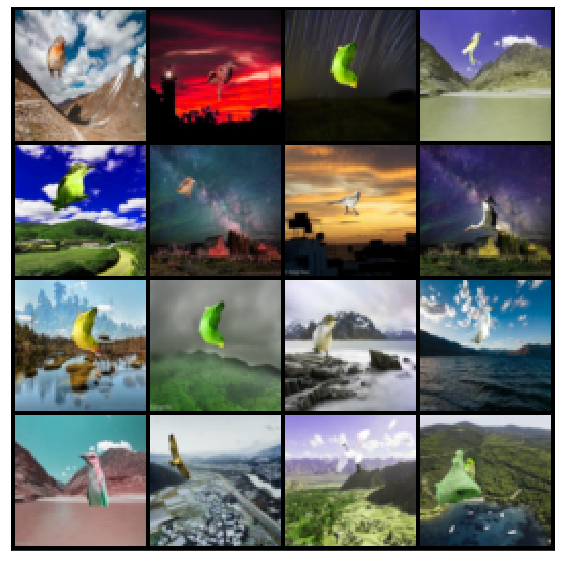

ResNet(
  (prep): Sequential(
    (DepthwiseConv2d): DepthwiseSeparableConv2d(
      (depthwise): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3, bias=False)
      (pointwise): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (BatchNorm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Relu): ReLU()
  )
  (cb1): Sequential(
    (DepthwiseConv2d): DepthwiseSeparableConv2d(
      (depthwise): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (pointwise): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (BatchNorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Relu): ReLU()
  )
  (res1): Sequential(
    (0): BasicBlock(
      (conv1): DepthwiseSeparableConv2d(
        (depthwise): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 64, kernel_size=(1, 1),

In [9]:
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")

cnn_model, device = utils.Utils.createMonocularModel()
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

# last_epoch = 1

# if os.path.exists("savedmodels/checkpoint1.pt"):
#     checkpoint, epoch, model_state_dict, optimizer_state_dict, train_losses, train_acc, test_losses, test_acc \
#         , test_losses, lr_data, class_correct, class_total = utils.Utils.loadmodel("savedmodels/checkpoint1.pt")
#     cnn_model.load_state_dict(model_state_dict)
#     # optimizer.load_state_dict(optimizer_state_dict)
#     last_epoch = last_epoch + checkpoint['epoch']

# cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=2).cuda(device)


sample = next(iter(train_loader))

imgs = sample[0][0]

# grid_tensor = torchvision.utils.make_grid(imgs, 2)
# grid_image = grid_tensor.permute(1, 2, 0)

utils.Utils.show(imgs, nrow=4)

train_model = train.TrainModel()
print(cnn_model)
# print(cnn_model.parameters())
# train_model.showmodelsummary(cnn_model)
# optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.01)

lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 20

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(cnn_model))

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 1


  0%|                                                                             | 4/17500 [00:10<37:04:30,  7.63s/it]

Train Epoch: 1 [0/280000 (0%)]	Loss: 0.726164
IOU : 0.05853271484375


  0%|▏                                                                              | 53/17500 [00:13<18:12, 15.97it/s]

Train Epoch: 1 [200/280000 (0%)]	Loss: 0.138408
IOU : 0.059051513671875


  1%|▍                                                                             | 102/17500 [00:16<19:50, 14.61it/s]

Train Epoch: 1 [400/280000 (1%)]	Loss: 0.082401
IOU : 0.0529022216796875


  1%|▋                                                                             | 152/17500 [00:20<18:55, 15.28it/s]

Train Epoch: 1 [600/280000 (1%)]	Loss: 0.094735
IOU : 0.0596466064453125


  1%|▉                                                                             | 202/17500 [00:23<19:59, 14.42it/s]

Train Epoch: 1 [800/280000 (1%)]	Loss: 0.097383
IOU : 0.0582275390625


  1%|█                                                                             | 252/17500 [00:27<18:14, 15.76it/s]

Train Epoch: 1 [1000/280000 (1%)]	Loss: 0.064008
IOU : 0.0496826171875


  2%|█▎                                                                            | 303/17500 [00:30<20:31, 13.97it/s]

Train Epoch: 1 [1200/280000 (2%)]	Loss: 0.050202
IOU : 0.0486602783203125


  2%|█▌                                                                            | 351/17500 [00:34<24:54, 11.47it/s]

Train Epoch: 1 [1400/280000 (2%)]	Loss: 0.041019
IOU : 0.0531158447265625


  2%|█▊                                                                            | 401/17500 [00:41<43:03,  6.62it/s]

Train Epoch: 1 [1600/280000 (2%)]	Loss: 0.054811
IOU : 0.05877685546875


  3%|██                                                                            | 451/17500 [00:47<42:50,  6.63it/s]

Train Epoch: 1 [1800/280000 (3%)]	Loss: 0.053319
IOU : 0.0556640625


  3%|██▏                                                                           | 501/17500 [00:54<44:04,  6.43it/s]

Train Epoch: 1 [2000/280000 (3%)]	Loss: 0.047071
IOU : 0.0516510009765625


  3%|██▍                                                                           | 551/17500 [01:00<41:30,  6.81it/s]

Train Epoch: 1 [2200/280000 (3%)]	Loss: 0.053028
IOU : 0.0570831298828125


  3%|██▋                                                                           | 601/17500 [01:07<48:55,  5.76it/s]

Train Epoch: 1 [2400/280000 (3%)]	Loss: 0.051524
IOU : 0.055633544921875


  4%|██▉                                                                           | 651/17500 [01:14<45:08,  6.22it/s]

Train Epoch: 1 [2600/280000 (4%)]	Loss: 0.062396
IOU : 0.059661865234375


  4%|███                                                                           | 701/17500 [01:21<43:28,  6.44it/s]

Train Epoch: 1 [2800/280000 (4%)]	Loss: 0.045424
IOU : 0.050079345703125


  4%|███▎                                                                          | 751/17500 [01:28<44:58,  6.21it/s]

Train Epoch: 1 [3000/280000 (4%)]	Loss: 0.046235
IOU : 0.052398681640625


  5%|███▌                                                                          | 801/17500 [01:35<47:22,  5.87it/s]

Train Epoch: 1 [3200/280000 (5%)]	Loss: 0.045003
IOU : 0.052642822265625


  5%|███▊                                                                          | 851/17500 [01:41<40:37,  6.83it/s]

Train Epoch: 1 [3400/280000 (5%)]	Loss: 0.043507
IOU : 0.0550079345703125


  5%|████                                                                          | 901/17500 [01:48<44:02,  6.28it/s]

Train Epoch: 1 [3600/280000 (5%)]	Loss: 0.053853
IOU : 0.0521087646484375


  5%|████▏                                                                         | 951/17500 [01:55<42:44,  6.45it/s]

Train Epoch: 1 [3800/280000 (5%)]	Loss: 0.067394
IOU : 0.0578765869140625


  6%|████▍                                                                        | 1001/17500 [02:01<45:59,  5.98it/s]

Train Epoch: 1 [4000/280000 (6%)]	Loss: 0.050257
IOU : 0.0518798828125


  6%|████▌                                                                      | 1051/17500 [02:09<1:14:05,  3.70it/s]

Train Epoch: 1 [4200/280000 (6%)]	Loss: 0.035141
IOU : 0.04486083984375


  6%|████▊                                                                        | 1101/17500 [02:20<43:09,  6.33it/s]

Train Epoch: 1 [4400/280000 (6%)]	Loss: 0.052396
IOU : 0.0563812255859375


  7%|█████                                                                        | 1151/17500 [02:26<39:45,  6.85it/s]

Train Epoch: 1 [4600/280000 (7%)]	Loss: 0.034756
IOU : 0.047637939453125


  7%|█████▎                                                                       | 1201/17500 [02:32<39:35,  6.86it/s]

Train Epoch: 1 [4800/280000 (7%)]	Loss: 0.059540
IOU : 0.0582122802734375


  7%|█████▌                                                                       | 1251/17500 [02:39<39:26,  6.87it/s]

Train Epoch: 1 [5000/280000 (7%)]	Loss: 0.042836
IOU : 0.05645751953125


  7%|█████▋                                                                       | 1301/17500 [02:45<39:43,  6.80it/s]

Train Epoch: 1 [5200/280000 (7%)]	Loss: 0.033933
IOU : 0.047607421875


  8%|█████▉                                                                       | 1351/17500 [02:51<39:18,  6.85it/s]

Train Epoch: 1 [5400/280000 (8%)]	Loss: 0.037071
IOU : 0.0525360107421875


  8%|██████▏                                                                      | 1402/17500 [02:57<27:42,  9.69it/s]

Train Epoch: 1 [5600/280000 (8%)]	Loss: 0.069652
IOU : 0.0568695068359375


  8%|██████▍                                                                      | 1452/17500 [03:01<22:07, 12.08it/s]

Train Epoch: 1 [5800/280000 (8%)]	Loss: 0.056072
IOU : 0.0556182861328125


  9%|██████▌                                                                      | 1502/17500 [03:06<21:26, 12.44it/s]

Train Epoch: 1 [6000/280000 (9%)]	Loss: 0.047151
IOU : 0.056976318359375


  9%|██████▊                                                                      | 1551/17500 [03:10<38:51,  6.84it/s]

Train Epoch: 1 [6200/280000 (9%)]	Loss: 0.042122
IOU : 0.04705810546875


  9%|███████                                                                      | 1601/17500 [03:17<38:42,  6.84it/s]

Train Epoch: 1 [6400/280000 (9%)]	Loss: 0.042815
IOU : 0.0558624267578125


  9%|███████▎                                                                     | 1651/17500 [03:23<38:35,  6.85it/s]

Train Epoch: 1 [6600/280000 (9%)]	Loss: 0.038620
IOU : 0.043426513671875


 10%|███████▍                                                                     | 1701/17500 [03:29<38:15,  6.88it/s]

Train Epoch: 1 [6800/280000 (10%)]	Loss: 0.037137
IOU : 0.053192138671875


 10%|███████▋                                                                     | 1751/17500 [03:36<38:43,  6.78it/s]

Train Epoch: 1 [7000/280000 (10%)]	Loss: 0.028447
IOU : 0.05352783203125


 10%|███████▉                                                                     | 1801/17500 [03:42<38:15,  6.84it/s]

Train Epoch: 1 [7200/280000 (10%)]	Loss: 0.054077
IOU : 0.0622711181640625


 11%|████████▏                                                                    | 1851/17500 [03:48<37:58,  6.87it/s]

Train Epoch: 1 [7400/280000 (11%)]	Loss: 0.039325
IOU : 0.049896240234375


 11%|████████▎                                                                    | 1901/17500 [03:54<37:59,  6.84it/s]

Train Epoch: 1 [7600/280000 (11%)]	Loss: 0.061808
IOU : 0.0526123046875


 11%|████████▌                                                                    | 1951/17500 [04:01<38:06,  6.80it/s]

Train Epoch: 1 [7800/280000 (11%)]	Loss: 0.031970
IOU : 0.04302978515625


 11%|████████▊                                                                    | 2001/17500 [04:07<37:33,  6.88it/s]

Train Epoch: 1 [8000/280000 (11%)]	Loss: 0.041274
IOU : 0.0558929443359375


 12%|█████████                                                                    | 2051/17500 [04:13<37:32,  6.86it/s]

Train Epoch: 1 [8200/280000 (12%)]	Loss: 0.039620
IOU : 0.0518951416015625


 12%|█████████▏                                                                   | 2101/17500 [04:20<37:22,  6.87it/s]

Train Epoch: 1 [8400/280000 (12%)]	Loss: 0.043116
IOU : 0.0548858642578125


 12%|█████████▍                                                                   | 2151/17500 [04:26<37:12,  6.87it/s]

Train Epoch: 1 [8600/280000 (12%)]	Loss: 0.054220
IOU : 0.0599822998046875


 13%|█████████▋                                                                   | 2201/17500 [04:32<37:02,  6.88it/s]

Train Epoch: 1 [8800/280000 (13%)]	Loss: 0.040472
IOU : 0.053192138671875


 13%|█████████▉                                                                   | 2251/17500 [04:39<37:01,  6.87it/s]

Train Epoch: 1 [9000/280000 (13%)]	Loss: 0.034380
IOU : 0.049957275390625


 13%|██████████                                                                   | 2301/17500 [04:45<36:47,  6.88it/s]

Train Epoch: 1 [9200/280000 (13%)]	Loss: 0.038588
IOU : 0.0553131103515625


 13%|██████████▎                                                                  | 2351/17500 [04:51<37:10,  6.79it/s]

Train Epoch: 1 [9400/280000 (13%)]	Loss: 0.029585
IOU : 0.0537261962890625


 14%|██████████▌                                                                  | 2401/17500 [04:58<36:55,  6.82it/s]

Train Epoch: 1 [9600/280000 (14%)]	Loss: 0.035300
IOU : 0.0518035888671875


 14%|██████████▊                                                                  | 2451/17500 [05:04<36:41,  6.84it/s]

Train Epoch: 1 [9800/280000 (14%)]	Loss: 0.030864
IOU : 0.04815673828125


 14%|███████████                                                                  | 2501/17500 [05:10<36:25,  6.86it/s]

Train Epoch: 1 [10000/280000 (14%)]	Loss: 0.049071
IOU : 0.0520172119140625


 15%|███████████▏                                                                 | 2551/17500 [05:16<36:43,  6.78it/s]

Train Epoch: 1 [10200/280000 (15%)]	Loss: 0.041897
IOU : 0.0544891357421875


 15%|███████████▍                                                                 | 2601/17500 [05:23<36:19,  6.84it/s]

Train Epoch: 1 [10400/280000 (15%)]	Loss: 0.040715
IOU : 0.055206298828125


 15%|███████████▋                                                                 | 2651/17500 [05:29<36:01,  6.87it/s]

Train Epoch: 1 [10600/280000 (15%)]	Loss: 0.032536
IOU : 0.0540313720703125


 15%|███████████▉                                                                 | 2701/17500 [05:35<35:53,  6.87it/s]

Train Epoch: 1 [10800/280000 (15%)]	Loss: 0.042052
IOU : 0.0542755126953125


 16%|████████████                                                                 | 2751/17500 [05:42<35:37,  6.90it/s]

Train Epoch: 1 [11000/280000 (16%)]	Loss: 0.033743
IOU : 0.049041748046875


 16%|████████████▎                                                                | 2801/17500 [05:48<35:49,  6.84it/s]

Train Epoch: 1 [11200/280000 (16%)]	Loss: 0.031394
IOU : 0.0490264892578125


 16%|████████████▌                                                                | 2851/17500 [05:54<35:43,  6.83it/s]

Train Epoch: 1 [11400/280000 (16%)]	Loss: 0.047124
IOU : 0.053070068359375


 17%|████████████▊                                                                | 2901/17500 [06:01<35:32,  6.85it/s]

Train Epoch: 1 [11600/280000 (17%)]	Loss: 0.037373
IOU : 0.051544189453125


 17%|████████████▉                                                                | 2951/17500 [06:07<35:13,  6.88it/s]

Train Epoch: 1 [11800/280000 (17%)]	Loss: 0.030358
IOU : 0.0483551025390625


 17%|█████████████▏                                                               | 3001/17500 [06:13<35:06,  6.88it/s]

Train Epoch: 1 [12000/280000 (17%)]	Loss: 0.032307
IOU : 0.0521392822265625


 17%|█████████████▍                                                               | 3051/17500 [06:20<34:57,  6.89it/s]

Train Epoch: 1 [12200/280000 (17%)]	Loss: 0.035824
IOU : 0.050048828125


 18%|█████████████▋                                                               | 3101/17500 [06:26<34:47,  6.90it/s]

Train Epoch: 1 [12400/280000 (18%)]	Loss: 0.040604
IOU : 0.055389404296875


 18%|█████████████▊                                                               | 3151/17500 [06:32<34:48,  6.87it/s]

Train Epoch: 1 [12600/280000 (18%)]	Loss: 0.049819
IOU : 0.0542144775390625


 18%|██████████████                                                               | 3201/17500 [06:38<34:36,  6.88it/s]

Train Epoch: 1 [12800/280000 (18%)]	Loss: 0.042174
IOU : 0.05792236328125


 19%|██████████████▎                                                              | 3251/17500 [06:45<34:37,  6.86it/s]

Train Epoch: 1 [13000/280000 (19%)]	Loss: 0.049938
IOU : 0.059051513671875


 19%|██████████████▌                                                              | 3301/17500 [06:51<34:35,  6.84it/s]

Train Epoch: 1 [13200/280000 (19%)]	Loss: 0.067642
IOU : 0.0621337890625


 19%|██████████████▋                                                              | 3351/17500 [06:57<34:20,  6.87it/s]

Train Epoch: 1 [13400/280000 (19%)]	Loss: 0.038225
IOU : 0.0536346435546875


 19%|██████████████▉                                                              | 3401/17500 [07:04<34:09,  6.88it/s]

Train Epoch: 1 [13600/280000 (19%)]	Loss: 0.039730
IOU : 0.05841064453125


 20%|███████████████▏                                                             | 3451/17500 [07:10<34:10,  6.85it/s]

Train Epoch: 1 [13800/280000 (20%)]	Loss: 0.040037
IOU : 0.0502471923828125


 20%|███████████████▍                                                             | 3501/17500 [07:16<34:22,  6.79it/s]

Train Epoch: 1 [14000/280000 (20%)]	Loss: 0.045958
IOU : 0.0616302490234375


 20%|███████████████▌                                                             | 3551/17500 [07:23<33:50,  6.87it/s]

Train Epoch: 1 [14200/280000 (20%)]	Loss: 0.032820
IOU : 0.046600341796875


 21%|███████████████▊                                                             | 3601/17500 [07:29<33:35,  6.90it/s]

Train Epoch: 1 [14400/280000 (21%)]	Loss: 0.042557
IOU : 0.051971435546875


 21%|████████████████                                                             | 3651/17500 [07:35<33:39,  6.86it/s]

Train Epoch: 1 [14600/280000 (21%)]	Loss: 0.037855
IOU : 0.0531158447265625


 21%|████████████████▎                                                            | 3701/17500 [07:41<33:21,  6.89it/s]

Train Epoch: 1 [14800/280000 (21%)]	Loss: 0.036647
IOU : 0.0507049560546875


 21%|████████████████▌                                                            | 3751/17500 [07:48<33:21,  6.87it/s]

Train Epoch: 1 [15000/280000 (21%)]	Loss: 0.040282
IOU : 0.05194091796875


 22%|████████████████▋                                                            | 3801/17500 [07:54<33:26,  6.83it/s]

Train Epoch: 1 [15200/280000 (22%)]	Loss: 0.029364
IOU : 0.0476837158203125


 22%|████████████████▉                                                            | 3851/17500 [08:00<33:09,  6.86it/s]

Train Epoch: 1 [15400/280000 (22%)]	Loss: 0.049871
IOU : 0.055999755859375


 22%|█████████████████▏                                                           | 3901/17500 [08:07<32:59,  6.87it/s]

Train Epoch: 1 [15600/280000 (22%)]	Loss: 0.040979
IOU : 0.060791015625


 23%|█████████████████▍                                                           | 3951/17500 [08:13<32:52,  6.87it/s]

Train Epoch: 1 [15800/280000 (23%)]	Loss: 0.031902
IOU : 0.04840087890625


 23%|█████████████████▌                                                           | 4001/17500 [08:19<33:06,  6.79it/s]

Train Epoch: 1 [16000/280000 (23%)]	Loss: 0.053956
IOU : 0.0595550537109375


 23%|█████████████████▊                                                           | 4051/17500 [08:25<32:41,  6.85it/s]

Train Epoch: 1 [16200/280000 (23%)]	Loss: 0.037553
IOU : 0.053314208984375


 23%|██████████████████                                                           | 4101/17500 [08:32<32:33,  6.86it/s]

Train Epoch: 1 [16400/280000 (23%)]	Loss: 0.033740
IOU : 0.05267333984375


 24%|██████████████████▎                                                          | 4151/17500 [08:38<32:18,  6.89it/s]

Train Epoch: 1 [16600/280000 (24%)]	Loss: 0.032286
IOU : 0.047149658203125


 24%|██████████████████▍                                                          | 4201/17500 [08:44<32:13,  6.88it/s]

Train Epoch: 1 [16800/280000 (24%)]	Loss: 0.042833
IOU : 0.0529937744140625


 24%|██████████████████▋                                                          | 4251/17500 [08:51<32:22,  6.82it/s]

Train Epoch: 1 [17000/280000 (24%)]	Loss: 0.042500
IOU : 0.056976318359375


 25%|██████████████████▉                                                          | 4301/17500 [08:57<32:04,  6.86it/s]

Train Epoch: 1 [17200/280000 (25%)]	Loss: 0.031825
IOU : 0.047576904296875


 25%|███████████████████▏                                                         | 4351/17500 [09:03<31:45,  6.90it/s]

Train Epoch: 1 [17400/280000 (25%)]	Loss: 0.027678
IOU : 0.0461578369140625


 25%|███████████████████▎                                                         | 4401/17500 [09:10<31:51,  6.85it/s]

Train Epoch: 1 [17600/280000 (25%)]	Loss: 0.034402
IOU : 0.05120849609375


 25%|███████████████████▌                                                         | 4451/17500 [09:16<31:34,  6.89it/s]

Train Epoch: 1 [17800/280000 (25%)]	Loss: 0.034680
IOU : 0.0541534423828125


 26%|███████████████████▊                                                         | 4501/17500 [09:22<31:37,  6.85it/s]

Train Epoch: 1 [18000/280000 (26%)]	Loss: 0.058156
IOU : 0.051116943359375


 26%|████████████████████                                                         | 4551/17500 [09:28<31:28,  6.86it/s]

Train Epoch: 1 [18200/280000 (26%)]	Loss: 0.046225
IOU : 0.047637939453125


 26%|████████████████████▏                                                        | 4601/17500 [09:35<31:16,  6.88it/s]

Train Epoch: 1 [18400/280000 (26%)]	Loss: 0.044509
IOU : 0.0526123046875


 27%|████████████████████▍                                                        | 4651/17500 [09:41<31:12,  6.86it/s]

Train Epoch: 1 [18600/280000 (27%)]	Loss: 0.043437
IOU : 0.055511474609375


 27%|████████████████████▋                                                        | 4701/17500 [09:47<30:54,  6.90it/s]

Train Epoch: 1 [18800/280000 (27%)]	Loss: 0.044948
IOU : 0.0517120361328125


 27%|████████████████████▉                                                        | 4751/17500 [09:54<30:38,  6.93it/s]

Train Epoch: 1 [19000/280000 (27%)]	Loss: 0.033139
IOU : 0.048309326171875


 27%|█████████████████████                                                        | 4801/17500 [10:00<30:44,  6.89it/s]

Train Epoch: 1 [19200/280000 (27%)]	Loss: 0.037961
IOU : 0.0569305419921875


 28%|█████████████████████▎                                                       | 4851/17500 [10:06<30:38,  6.88it/s]

Train Epoch: 1 [19400/280000 (28%)]	Loss: 0.039211
IOU : 0.055511474609375


 28%|█████████████████████▌                                                       | 4901/17500 [10:12<30:35,  6.86it/s]

Train Epoch: 1 [19600/280000 (28%)]	Loss: 0.031862
IOU : 0.050567626953125


 28%|█████████████████████▊                                                       | 4951/17500 [10:19<30:30,  6.86it/s]

Train Epoch: 1 [19800/280000 (28%)]	Loss: 0.035119
IOU : 0.0561676025390625


 29%|██████████████████████                                                       | 5001/17500 [10:25<30:25,  6.85it/s]

Train Epoch: 1 [20000/280000 (29%)]	Loss: 0.039891
IOU : 0.0577850341796875


 29%|██████████████████████▏                                                      | 5051/17500 [10:31<30:36,  6.78it/s]

Train Epoch: 1 [20200/280000 (29%)]	Loss: 0.032565
IOU : 0.0552215576171875


 29%|██████████████████████▍                                                      | 5101/17500 [10:38<30:03,  6.88it/s]

Train Epoch: 1 [20400/280000 (29%)]	Loss: 0.034763
IOU : 0.0484771728515625


 29%|██████████████████████▋                                                      | 5151/17500 [10:44<30:07,  6.83it/s]

Train Epoch: 1 [20600/280000 (29%)]	Loss: 0.044956
IOU : 0.0481719970703125


 30%|██████████████████████▉                                                      | 5203/17500 [10:50<25:46,  7.95it/s]

Train Epoch: 1 [20800/280000 (30%)]	Loss: 0.036389
IOU : 0.055511474609375


 30%|███████████████████████                                                      | 5253/17500 [10:54<14:25, 14.14it/s]

Train Epoch: 1 [21000/280000 (30%)]	Loss: 0.032178
IOU : 0.048736572265625


 30%|███████████████████████▎                                                     | 5303/17500 [10:58<16:11, 12.56it/s]

Train Epoch: 1 [21200/280000 (30%)]	Loss: 0.027388
IOU : 0.048828125


 31%|███████████████████████▌                                                     | 5351/17500 [11:05<54:44,  3.70it/s]

Train Epoch: 1 [21400/280000 (31%)]	Loss: 0.033993
IOU : 0.05267333984375


 31%|███████████████████████▊                                                     | 5404/17500 [11:14<15:12, 13.25it/s]

Train Epoch: 1 [21600/280000 (31%)]	Loss: 0.042630
IOU : 0.06402587890625


 31%|███████████████████████▉                                                     | 5454/17500 [11:17<13:15, 15.13it/s]

Train Epoch: 1 [21800/280000 (31%)]	Loss: 0.032434
IOU : 0.0538177490234375


 31%|████████████████████████▏                                                    | 5502/17500 [11:21<14:06, 14.18it/s]

Train Epoch: 1 [22000/280000 (31%)]	Loss: 0.034594
IOU : 0.0593109130859375


 32%|████████████████████████▍                                                    | 5551/17500 [11:27<29:16,  6.80it/s]

Train Epoch: 1 [22200/280000 (32%)]	Loss: 0.035464
IOU : 0.060455322265625


 32%|████████████████████████▋                                                    | 5601/17500 [11:33<29:07,  6.81it/s]

Train Epoch: 1 [22400/280000 (32%)]	Loss: 0.027326
IOU : 0.0487518310546875


 32%|████████████████████████▊                                                    | 5651/17500 [11:40<28:47,  6.86it/s]

Train Epoch: 1 [22600/280000 (32%)]	Loss: 0.037649
IOU : 0.0559234619140625


 33%|█████████████████████████                                                    | 5701/17500 [11:46<28:55,  6.80it/s]

Train Epoch: 1 [22800/280000 (33%)]	Loss: 0.027987
IOU : 0.05010986328125


 33%|█████████████████████████▎                                                   | 5751/17500 [11:52<28:59,  6.75it/s]

Train Epoch: 1 [23000/280000 (33%)]	Loss: 0.033718
IOU : 0.0555877685546875


 33%|█████████████████████████▌                                                   | 5801/17500 [11:59<28:27,  6.85it/s]

Train Epoch: 1 [23200/280000 (33%)]	Loss: 0.029339
IOU : 0.04620361328125


 33%|█████████████████████████▋                                                   | 5851/17500 [12:05<28:27,  6.82it/s]

Train Epoch: 1 [23400/280000 (33%)]	Loss: 0.030264
IOU : 0.047393798828125


 34%|█████████████████████████▉                                                   | 5901/17500 [12:11<28:15,  6.84it/s]

Train Epoch: 1 [23600/280000 (34%)]	Loss: 0.031846
IOU : 0.0551605224609375


 34%|██████████████████████████▏                                                  | 5951/17500 [12:18<28:04,  6.86it/s]

Train Epoch: 1 [23800/280000 (34%)]	Loss: 0.048021
IOU : 0.05499267578125


 34%|██████████████████████████▍                                                  | 6001/17500 [12:24<27:53,  6.87it/s]

Train Epoch: 1 [24000/280000 (34%)]	Loss: 0.054259
IOU : 0.05877685546875


 35%|██████████████████████████▌                                                  | 6051/17500 [12:30<27:47,  6.87it/s]

Train Epoch: 1 [24200/280000 (35%)]	Loss: 0.029571
IOU : 0.0465240478515625


 35%|██████████████████████████▊                                                  | 6101/17500 [12:36<27:44,  6.85it/s]

Train Epoch: 1 [24400/280000 (35%)]	Loss: 0.057907
IOU : 0.0501251220703125


 35%|███████████████████████████                                                  | 6151/17500 [12:43<27:26,  6.89it/s]

Train Epoch: 1 [24600/280000 (35%)]	Loss: 0.032642
IOU : 0.050994873046875


 35%|███████████████████████████▎                                                 | 6201/17500 [12:49<27:17,  6.90it/s]

Train Epoch: 1 [24800/280000 (35%)]	Loss: 0.028510
IOU : 0.0477142333984375


 36%|███████████████████████████▌                                                 | 6251/17500 [12:55<27:54,  6.72it/s]

Train Epoch: 1 [25000/280000 (36%)]	Loss: 0.027433
IOU : 0.0611114501953125


 36%|███████████████████████████▋                                                 | 6301/17500 [13:02<27:05,  6.89it/s]

Train Epoch: 1 [25200/280000 (36%)]	Loss: 0.036248
IOU : 0.05828857421875


 36%|███████████████████████████▉                                                 | 6351/17500 [13:08<26:56,  6.90it/s]

Train Epoch: 1 [25400/280000 (36%)]	Loss: 0.031667
IOU : 0.0522918701171875


 37%|████████████████████████████▏                                                | 6401/17500 [13:15<27:08,  6.81it/s]

Train Epoch: 1 [25600/280000 (37%)]	Loss: 0.043940
IOU : 0.05816650390625


 37%|████████████████████████████▍                                                | 6451/17500 [13:21<26:42,  6.90it/s]

Train Epoch: 1 [25800/280000 (37%)]	Loss: 0.031914
IOU : 0.0470428466796875


 37%|████████████████████████████▌                                                | 6501/17500 [13:27<26:42,  6.86it/s]

Train Epoch: 1 [26000/280000 (37%)]	Loss: 0.035573
IOU : 0.05322265625


 37%|████████████████████████████▊                                                | 6551/17500 [13:34<26:52,  6.79it/s]

Train Epoch: 1 [26200/280000 (37%)]	Loss: 0.028505
IOU : 0.0533599853515625


 38%|█████████████████████████████                                                | 6601/17500 [13:40<26:30,  6.85it/s]

Train Epoch: 1 [26400/280000 (38%)]	Loss: 0.028505
IOU : 0.0516815185546875


 38%|█████████████████████████████▎                                               | 6651/17500 [13:46<26:16,  6.88it/s]

Train Epoch: 1 [26600/280000 (38%)]	Loss: 0.038436
IOU : 0.0550689697265625


 38%|█████████████████████████████▍                                               | 6701/17500 [13:53<26:14,  6.86it/s]

Train Epoch: 1 [26800/280000 (38%)]	Loss: 0.039687
IOU : 0.05364990234375


 39%|█████████████████████████████▋                                               | 6751/17500 [13:59<25:56,  6.91it/s]

Train Epoch: 1 [27000/280000 (39%)]	Loss: 0.026684
IOU : 0.0428924560546875


 39%|█████████████████████████████▉                                               | 6801/17500 [14:05<25:56,  6.87it/s]

Train Epoch: 1 [27200/280000 (39%)]	Loss: 0.043908
IOU : 0.05816650390625


 39%|██████████████████████████████▏                                              | 6851/17500 [14:12<26:01,  6.82it/s]

Train Epoch: 1 [27400/280000 (39%)]	Loss: 0.036546
IOU : 0.0563812255859375


 39%|██████████████████████████████▎                                              | 6901/17500 [14:18<25:36,  6.90it/s]

Train Epoch: 1 [27600/280000 (39%)]	Loss: 0.040245
IOU : 0.0582427978515625


 40%|██████████████████████████████▌                                              | 6951/17500 [14:24<25:23,  6.93it/s]

Train Epoch: 1 [27800/280000 (40%)]	Loss: 0.029199
IOU : 0.05279541015625


 40%|██████████████████████████████▊                                              | 7001/17500 [14:30<25:37,  6.83it/s]

Train Epoch: 1 [28000/280000 (40%)]	Loss: 0.035236
IOU : 0.04840087890625


 40%|███████████████████████████████                                              | 7052/17500 [14:36<13:13, 13.17it/s]

Train Epoch: 1 [28200/280000 (40%)]	Loss: 0.032575
IOU : 0.054107666015625


 41%|███████████████████████████████▏                                             | 7102/17500 [14:39<12:04, 14.36it/s]

Train Epoch: 1 [28400/280000 (41%)]	Loss: 0.030732
IOU : 0.050048828125


 41%|███████████████████████████████▍                                             | 7151/17500 [14:45<46:22,  3.72it/s]

Train Epoch: 1 [28600/280000 (41%)]	Loss: 0.032489
IOU : 0.053436279296875


 41%|███████████████████████████████▋                                             | 7201/17500 [14:55<25:01,  6.86it/s]

Train Epoch: 1 [28800/280000 (41%)]	Loss: 0.027573
IOU : 0.0491943359375


 41%|███████████████████████████████▉                                             | 7251/17500 [15:01<25:00,  6.83it/s]

Train Epoch: 1 [29000/280000 (41%)]	Loss: 0.027165
IOU : 0.05706787109375


 42%|████████████████████████████████▏                                            | 7303/17500 [15:06<11:13, 15.14it/s]

Train Epoch: 1 [29200/280000 (42%)]	Loss: 0.024593
IOU : 0.0516204833984375


 42%|████████████████████████████████▎                                            | 7353/17500 [15:10<12:25, 13.61it/s]

Train Epoch: 1 [29400/280000 (42%)]	Loss: 0.039847
IOU : 0.0475006103515625


 42%|████████████████████████████████▌                                            | 7401/17500 [15:14<24:04,  6.99it/s]

Train Epoch: 1 [29600/280000 (42%)]	Loss: 0.030791
IOU : 0.052734375


 43%|████████████████████████████████▊                                            | 7451/17500 [15:22<45:00,  3.72it/s]

Train Epoch: 1 [29800/280000 (43%)]	Loss: 0.029054
IOU : 0.04876708984375


 43%|█████████████████████████████████                                            | 7503/17500 [15:31<12:46, 13.04it/s]

Train Epoch: 1 [30000/280000 (43%)]	Loss: 0.045107
IOU : 0.058807373046875


 43%|█████████████████████████████████▏                                           | 7553/17500 [15:34<12:45, 13.00it/s]

Train Epoch: 1 [30200/280000 (43%)]	Loss: 0.028939
IOU : 0.048980712890625


 43%|█████████████████████████████████▍                                           | 7601/17500 [15:41<44:32,  3.70it/s]

Train Epoch: 1 [30400/280000 (43%)]	Loss: 0.037064
IOU : 0.0485076904296875


 44%|█████████████████████████████████▋                                           | 7652/17500 [15:49<12:50, 12.79it/s]

Train Epoch: 1 [30600/280000 (44%)]	Loss: 0.028667
IOU : 0.042938232421875


 44%|█████████████████████████████████▉                                           | 7704/17500 [15:53<11:06, 14.70it/s]

Train Epoch: 1 [30800/280000 (44%)]	Loss: 0.029392
IOU : 0.0533294677734375


 44%|██████████████████████████████████                                           | 7751/17500 [16:02<43:46,  3.71it/s]

Train Epoch: 1 [31000/280000 (44%)]	Loss: 0.025987
IOU : 0.0416412353515625


 45%|██████████████████████████████████▎                                          | 7801/17500 [16:08<23:35,  6.85it/s]

Train Epoch: 1 [31200/280000 (45%)]	Loss: 0.036527
IOU : 0.0518341064453125


 45%|██████████████████████████████████▌                                          | 7853/17500 [16:13<11:33, 13.91it/s]

Train Epoch: 1 [31400/280000 (45%)]	Loss: 0.040113
IOU : 0.060516357421875


 45%|██████████████████████████████████▊                                          | 7903/17500 [16:17<12:07, 13.19it/s]

Train Epoch: 1 [31600/280000 (45%)]	Loss: 0.033876
IOU : 0.0511016845703125


 45%|██████████████████████████████████▉                                          | 7951/17500 [16:24<43:00,  3.70it/s]

Train Epoch: 1 [31800/280000 (45%)]	Loss: 0.028393
IOU : 0.050872802734375


 46%|███████████████████████████████████▏                                         | 8003/17500 [16:32<11:42, 13.51it/s]

Train Epoch: 1 [32000/280000 (46%)]	Loss: 0.039776
IOU : 0.05194091796875


 46%|███████████████████████████████████▍                                         | 8053/17500 [16:36<11:30, 13.69it/s]

Train Epoch: 1 [32200/280000 (46%)]	Loss: 0.032473
IOU : 0.0504302978515625


 46%|███████████████████████████████████▋                                         | 8103/17500 [16:40<12:36, 12.42it/s]

Train Epoch: 1 [32400/280000 (46%)]	Loss: 0.042079
IOU : 0.06103515625


 47%|███████████████████████████████████▊                                         | 8151/17500 [16:46<22:38,  6.88it/s]

Train Epoch: 1 [32600/280000 (47%)]	Loss: 0.030858
IOU : 0.0470123291015625


 47%|████████████████████████████████████                                         | 8201/17500 [16:52<22:32,  6.87it/s]

Train Epoch: 1 [32800/280000 (47%)]	Loss: 0.033016
IOU : 0.05047607421875


 47%|████████████████████████████████████▎                                        | 8251/17500 [16:58<22:38,  6.81it/s]

Train Epoch: 1 [33000/280000 (47%)]	Loss: 0.025092
IOU : 0.0408782958984375


 47%|████████████████████████████████████▌                                        | 8301/17500 [17:05<22:18,  6.87it/s]

Train Epoch: 1 [33200/280000 (47%)]	Loss: 0.024738
IOU : 0.0511474609375


 48%|████████████████████████████████████▋                                        | 8351/17500 [17:11<22:08,  6.89it/s]

Train Epoch: 1 [33400/280000 (48%)]	Loss: 0.026706
IOU : 0.0489044189453125


 48%|████████████████████████████████████▉                                        | 8401/17500 [17:17<21:57,  6.91it/s]

Train Epoch: 1 [33600/280000 (48%)]	Loss: 0.037432
IOU : 0.0539703369140625


 48%|█████████████████████████████████████▏                                       | 8451/17500 [17:23<21:53,  6.89it/s]

Train Epoch: 1 [33800/280000 (48%)]	Loss: 0.026679
IOU : 0.0464630126953125


 49%|█████████████████████████████████████▍                                       | 8501/17500 [17:30<21:49,  6.87it/s]

Train Epoch: 1 [34000/280000 (49%)]	Loss: 0.037860
IOU : 0.051055908203125


 49%|█████████████████████████████████████▌                                       | 8551/17500 [17:36<21:38,  6.89it/s]

Train Epoch: 1 [34200/280000 (49%)]	Loss: 0.029480
IOU : 0.053253173828125


 49%|█████████████████████████████████████▊                                       | 8601/17500 [17:42<21:37,  6.86it/s]

Train Epoch: 1 [34400/280000 (49%)]	Loss: 0.039573
IOU : 0.05670166015625


 49%|██████████████████████████████████████                                       | 8653/17500 [17:49<19:08,  7.71it/s]

Train Epoch: 1 [34600/280000 (49%)]	Loss: 0.029643
IOU : 0.05487060546875


 50%|██████████████████████████████████████▎                                      | 8701/17500 [17:55<21:19,  6.88it/s]

Train Epoch: 1 [34800/280000 (50%)]	Loss: 0.037109
IOU : 0.05914306640625


 50%|██████████████████████████████████████▌                                      | 8751/17500 [18:01<21:07,  6.90it/s]

Train Epoch: 1 [35000/280000 (50%)]	Loss: 0.032845
IOU : 0.0538330078125


 50%|██████████████████████████████████████▋                                      | 8802/17500 [18:07<11:35, 12.50it/s]

Train Epoch: 1 [35200/280000 (50%)]	Loss: 0.030902
IOU : 0.0453948974609375


 51%|██████████████████████████████████████▉                                      | 8853/17500 [18:10<10:11, 14.14it/s]

Train Epoch: 1 [35400/280000 (51%)]	Loss: 0.031629
IOU : 0.06292724609375


 51%|███████████████████████████████████████▏                                     | 8903/17500 [18:14<10:30, 13.64it/s]

Train Epoch: 1 [35600/280000 (51%)]	Loss: 0.032935
IOU : 0.0489349365234375


 51%|███████████████████████████████████████▍                                     | 8951/17500 [18:19<20:50,  6.84it/s]

Train Epoch: 1 [35800/280000 (51%)]	Loss: 0.041409
IOU : 0.0536956787109375


 51%|███████████████████████████████████████▌                                     | 9001/17500 [18:25<20:38,  6.86it/s]

Train Epoch: 1 [36000/280000 (51%)]	Loss: 0.040192
IOU : 0.0579376220703125


 52%|███████████████████████████████████████▊                                     | 9051/17500 [18:32<20:30,  6.87it/s]

Train Epoch: 1 [36200/280000 (52%)]	Loss: 0.029237
IOU : 0.0537872314453125


 52%|████████████████████████████████████████                                     | 9101/17500 [18:38<20:22,  6.87it/s]

Train Epoch: 1 [36400/280000 (52%)]	Loss: 0.037881
IOU : 0.057525634765625


 52%|████████████████████████████████████████▎                                    | 9151/17500 [18:44<20:18,  6.85it/s]

Train Epoch: 1 [36600/280000 (52%)]	Loss: 0.048737
IOU : 0.0554351806640625


 53%|████████████████████████████████████████▍                                    | 9201/17500 [18:51<20:09,  6.86it/s]

Train Epoch: 1 [36800/280000 (53%)]	Loss: 0.027359
IOU : 0.05035400390625


 53%|████████████████████████████████████████▋                                    | 9251/17500 [18:57<20:05,  6.84it/s]

Train Epoch: 1 [37000/280000 (53%)]	Loss: 0.027432
IOU : 0.0507049560546875


 53%|████████████████████████████████████████▉                                    | 9301/17500 [19:03<19:51,  6.88it/s]

Train Epoch: 1 [37200/280000 (53%)]	Loss: 0.029002
IOU : 0.05133056640625


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [19:09<19:45,  6.87it/s]

Train Epoch: 1 [37400/280000 (53%)]	Loss: 0.044538
IOU : 0.052764892578125


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [19:16<19:39,  6.87it/s]

Train Epoch: 1 [37600/280000 (54%)]	Loss: 0.037086
IOU : 0.051513671875


 54%|█████████████████████████████████████████▌                                   | 9451/17500 [19:22<19:29,  6.88it/s]

Train Epoch: 1 [37800/280000 (54%)]	Loss: 0.039201
IOU : 0.0541534423828125


 54%|█████████████████████████████████████████▊                                   | 9503/17500 [19:26<09:07, 14.60it/s]

Train Epoch: 1 [38000/280000 (54%)]	Loss: 0.049507
IOU : 0.0597991943359375


 55%|██████████████████████████████████████████                                   | 9553/17500 [19:30<09:56, 13.33it/s]

Train Epoch: 1 [38200/280000 (55%)]	Loss: 0.031768
IOU : 0.05804443359375


 55%|██████████████████████████████████████████▏                                  | 9601/17500 [19:40<35:31,  3.70it/s]

Train Epoch: 1 [38400/280000 (55%)]	Loss: 0.034215
IOU : 0.0577392578125


 55%|██████████████████████████████████████████▍                                  | 9651/17500 [19:47<19:03,  6.86it/s]

Train Epoch: 1 [38600/280000 (55%)]	Loss: 0.040668
IOU : 0.0544281005859375


 55%|██████████████████████████████████████████▋                                  | 9702/17500 [19:51<08:46, 14.80it/s]

Train Epoch: 1 [38800/280000 (55%)]	Loss: 0.043022
IOU : 0.0473480224609375


 56%|██████████████████████████████████████████▉                                  | 9750/17500 [19:54<08:38, 14.94it/s]

Train Epoch: 1 [39000/280000 (56%)]	Loss: 0.026777
IOU : 0.052764892578125


 56%|███████████████████████████████████████████                                  | 9800/17500 [20:00<12:51,  9.98it/s]

Train Epoch: 1 [39200/280000 (56%)]	Loss: 0.030867
IOU : 0.044525146484375


 56%|███████████████████████████████████████████▎                                 | 9851/17500 [20:07<34:15,  3.72it/s]

Train Epoch: 1 [39400/280000 (56%)]	Loss: 0.033705
IOU : 0.0561370849609375


 57%|███████████████████████████████████████████▌                                 | 9901/17500 [20:19<34:06,  3.71it/s]

Train Epoch: 1 [39600/280000 (57%)]	Loss: 0.027665
IOU : 0.0467987060546875


 57%|███████████████████████████████████████████▊                                 | 9951/17500 [20:24<13:59,  8.99it/s]

Train Epoch: 1 [39800/280000 (57%)]	Loss: 0.035778
IOU : 0.0520782470703125


 57%|███████████████████████████████████████████▍                                | 10001/17500 [20:30<12:32,  9.96it/s]

Train Epoch: 1 [40000/280000 (57%)]	Loss: 0.048944
IOU : 0.06024169921875


 57%|███████████████████████████████████████████▋                                | 10053/17500 [20:35<13:33,  9.16it/s]

Train Epoch: 1 [40200/280000 (57%)]	Loss: 0.029659
IOU : 0.0542755126953125


 58%|███████████████████████████████████████████▊                                | 10101/17500 [20:46<33:11,  3.71it/s]

Train Epoch: 1 [40400/280000 (58%)]	Loss: 0.027510
IOU : 0.0478973388671875


 58%|████████████████████████████████████████████                                | 10152/17500 [20:52<12:07, 10.10it/s]

Train Epoch: 1 [40600/280000 (58%)]	Loss: 0.024906
IOU : 0.04742431640625


 58%|████████████████████████████████████████████▎                               | 10202/17500 [20:57<14:37,  8.31it/s]

Train Epoch: 1 [40800/280000 (58%)]	Loss: 0.024512
IOU : 0.0507354736328125


 59%|████████████████████████████████████████████▌                               | 10251/17500 [21:02<12:30,  9.66it/s]

Train Epoch: 1 [41000/280000 (59%)]	Loss: 0.029036
IOU : 0.052215576171875


 59%|████████████████████████████████████████████▋                               | 10301/17500 [21:08<14:13,  8.43it/s]

Train Epoch: 1 [41200/280000 (59%)]	Loss: 0.047088
IOU : 0.0675201416015625


 59%|████████████████████████████████████████████▉                               | 10351/17500 [21:19<32:09,  3.70it/s]

Train Epoch: 1 [41400/280000 (59%)]	Loss: 0.034513
IOU : 0.05218505859375


 59%|█████████████████████████████████████████████▏                              | 10401/17500 [21:26<16:13,  7.29it/s]

Train Epoch: 1 [41600/280000 (59%)]	Loss: 0.037516
IOU : 0.0488739013671875


 60%|█████████████████████████████████████████████▍                              | 10453/17500 [21:31<12:39,  9.27it/s]

Train Epoch: 1 [41800/280000 (60%)]	Loss: 0.029332
IOU : 0.0479888916015625


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [21:38<14:43,  7.92it/s]

Train Epoch: 1 [42000/280000 (60%)]	Loss: 0.029361
IOU : 0.0494842529296875


 60%|█████████████████████████████████████████████▊                              | 10552/17500 [21:44<16:42,  6.93it/s]

Train Epoch: 1 [42200/280000 (60%)]	Loss: 0.043650
IOU : 0.053466796875


 61%|██████████████████████████████████████████████                              | 10600/17500 [21:51<14:20,  8.02it/s]

Train Epoch: 1 [42400/280000 (61%)]	Loss: 0.051197
IOU : 0.0610504150390625


 61%|██████████████████████████████████████████████▎                             | 10650/17500 [21:57<14:02,  8.13it/s]

Train Epoch: 1 [42600/280000 (61%)]	Loss: 0.030621
IOU : 0.0516357421875


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [22:04<21:54,  5.17it/s]

Train Epoch: 1 [42800/280000 (61%)]	Loss: 0.036980
IOU : 0.0568389892578125


 61%|██████████████████████████████████████████████▋                             | 10751/17500 [22:15<30:29,  3.69it/s]

Train Epoch: 1 [43000/280000 (61%)]	Loss: 0.033755
IOU : 0.053985595703125


 62%|██████████████████████████████████████████████▉                             | 10803/17500 [22:22<11:05, 10.07it/s]

Train Epoch: 1 [43200/280000 (62%)]	Loss: 0.037874
IOU : 0.0550384521484375


 62%|███████████████████████████████████████████████▏                            | 10854/17500 [22:28<10:20, 10.72it/s]

Train Epoch: 1 [43400/280000 (62%)]	Loss: 0.021941
IOU : 0.0494842529296875


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [22:33<11:16,  9.76it/s]

Train Epoch: 1 [43600/280000 (62%)]	Loss: 0.027122
IOU : 0.0536346435546875


 63%|███████████████████████████████████████████████▌                            | 10954/17500 [22:39<10:03, 10.84it/s]

Train Epoch: 1 [43800/280000 (63%)]	Loss: 0.028476
IOU : 0.0458526611328125


 63%|███████████████████████████████████████████████▊                            | 11003/17500 [22:44<11:02,  9.81it/s]

Train Epoch: 1 [44000/280000 (63%)]	Loss: 0.049705
IOU : 0.06268310546875


 63%|███████████████████████████████████████████████▉                            | 11051/17500 [22:55<29:03,  3.70it/s]

Train Epoch: 1 [44200/280000 (63%)]	Loss: 0.032920
IOU : 0.0496673583984375


 63%|████████████████████████████████████████████████▏                           | 11102/17500 [23:02<11:36,  9.18it/s]

Train Epoch: 1 [44400/280000 (63%)]	Loss: 0.036131
IOU : 0.05133056640625


 64%|████████████████████████████████████████████████▍                           | 11152/17500 [23:07<11:20,  9.33it/s]

Train Epoch: 1 [44600/280000 (64%)]	Loss: 0.028601
IOU : 0.0518951416015625


 64%|████████████████████████████████████████████████▋                           | 11201/17500 [23:13<14:22,  7.30it/s]

Train Epoch: 1 [44800/280000 (64%)]	Loss: 0.032644
IOU : 0.052001953125


 64%|████████████████████████████████████████████████▊                           | 11251/17500 [23:21<27:57,  3.73it/s]

Train Epoch: 1 [45000/280000 (64%)]	Loss: 0.021975
IOU : 0.0475616455078125


 65%|█████████████████████████████████████████████████                           | 11301/17500 [23:29<15:06,  6.84it/s]

Train Epoch: 1 [45200/280000 (65%)]	Loss: 0.037996
IOU : 0.0583038330078125


 65%|█████████████████████████████████████████████████▎                          | 11350/17500 [23:34<10:21,  9.90it/s]

Train Epoch: 1 [45400/280000 (65%)]	Loss: 0.039748
IOU : 0.0516204833984375


 65%|█████████████████████████████████████████████████▌                          | 11402/17500 [23:40<10:41,  9.51it/s]

Train Epoch: 1 [45600/280000 (65%)]	Loss: 0.029677
IOU : 0.0520172119140625


 65%|█████████████████████████████████████████████████▋                          | 11452/17500 [23:45<09:56, 10.14it/s]

Train Epoch: 1 [45800/280000 (65%)]	Loss: 0.038445
IOU : 0.0549774169921875


 66%|█████████████████████████████████████████████████▉                          | 11501/17500 [23:50<09:56, 10.07it/s]

Train Epoch: 1 [46000/280000 (66%)]	Loss: 0.027451
IOU : 0.049285888671875


 66%|██████████████████████████████████████████████████▏                         | 11551/17500 [23:57<25:01,  3.96it/s]

Train Epoch: 1 [46200/280000 (66%)]	Loss: 0.030937
IOU : 0.0538330078125


 66%|██████████████████████████████████████████████████▍                         | 11601/17500 [24:08<25:21,  3.88it/s]

Train Epoch: 1 [46400/280000 (66%)]	Loss: 0.055956
IOU : 0.0695343017578125


 67%|██████████████████████████████████████████████████▌                         | 11653/17500 [24:13<09:31, 10.24it/s]

Train Epoch: 1 [46600/280000 (67%)]	Loss: 0.030936
IOU : 0.05426025390625


 67%|██████████████████████████████████████████████████▊                         | 11701/17500 [24:18<09:41,  9.98it/s]

Train Epoch: 1 [46800/280000 (67%)]	Loss: 0.049624
IOU : 0.049041748046875


 67%|███████████████████████████████████████████████████                         | 11754/17500 [24:24<10:00,  9.57it/s]

Train Epoch: 1 [47000/280000 (67%)]	Loss: 0.036166
IOU : 0.045562744140625


 67%|███████████████████████████████████████████████████▎                        | 11802/17500 [24:30<15:31,  6.12it/s]

Train Epoch: 1 [47200/280000 (67%)]	Loss: 0.029738
IOU : 0.04522705078125


 68%|███████████████████████████████████████████████████▍                        | 11851/17500 [24:41<16:12,  5.81it/s]

Train Epoch: 1 [47400/280000 (68%)]	Loss: 0.022873
IOU : 0.0477752685546875


 68%|███████████████████████████████████████████████████▋                        | 11902/17500 [24:46<07:10, 13.00it/s]

Train Epoch: 1 [47600/280000 (68%)]	Loss: 0.030059
IOU : 0.0638885498046875


 68%|███████████████████████████████████████████████████▉                        | 11952/17500 [24:52<09:45,  9.48it/s]

Train Epoch: 1 [47800/280000 (68%)]	Loss: 0.025305
IOU : 0.047760009765625


 69%|████████████████████████████████████████████████████                        | 12000/17500 [24:57<09:29,  9.66it/s]

Train Epoch: 1 [48000/280000 (69%)]	Loss: 0.026680
IOU : 0.04364013671875


 69%|████████████████████████████████████████████████████▎                       | 12051/17500 [25:03<09:31,  9.53it/s]

Train Epoch: 1 [48200/280000 (69%)]	Loss: 0.023038
IOU : 0.05242919921875


 69%|████████████████████████████████████████████████████▌                       | 12104/17500 [25:08<08:50, 10.17it/s]

Train Epoch: 1 [48400/280000 (69%)]	Loss: 0.030678
IOU : 0.0480499267578125


 69%|████████████████████████████████████████████████████▊                       | 12151/17500 [25:18<24:01,  3.71it/s]

Train Epoch: 1 [48600/280000 (69%)]	Loss: 0.024935
IOU : 0.0437469482421875


 70%|████████████████████████████████████████████████████▉                       | 12202/17500 [25:25<09:36,  9.19it/s]

Train Epoch: 1 [48800/280000 (70%)]	Loss: 0.027119
IOU : 0.0515289306640625


 70%|█████████████████████████████████████████████████████▏                      | 12252/17500 [25:30<09:30,  9.19it/s]

Train Epoch: 1 [49000/280000 (70%)]	Loss: 0.034332
IOU : 0.05712890625


 70%|█████████████████████████████████████████████████████▍                      | 12300/17500 [25:36<08:38, 10.03it/s]

Train Epoch: 1 [49200/280000 (70%)]	Loss: 0.032937
IOU : 0.055511474609375


 71%|█████████████████████████████████████████████████████▋                      | 12352/17500 [25:41<08:19, 10.31it/s]

Train Epoch: 1 [49400/280000 (71%)]	Loss: 0.029335
IOU : 0.0436859130859375


 71%|█████████████████████████████████████████████████████▊                      | 12402/17500 [25:47<08:45,  9.70it/s]

Train Epoch: 1 [49600/280000 (71%)]	Loss: 0.030319
IOU : 0.0523223876953125


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [25:58<22:37,  3.72it/s]

Train Epoch: 1 [49800/280000 (71%)]	Loss: 0.056779
IOU : 0.06427001953125


 71%|██████████████████████████████████████████████████████▎                     | 12500/17500 [26:05<08:06, 10.28it/s]

Train Epoch: 1 [50000/280000 (71%)]	Loss: 0.034173
IOU : 0.0543670654296875


 72%|██████████████████████████████████████████████████████▌                     | 12553/17500 [26:10<07:45, 10.62it/s]

Train Epoch: 1 [50200/280000 (72%)]	Loss: 0.031163
IOU : 0.0519561767578125


 72%|██████████████████████████████████████████████████████▋                     | 12601/17500 [26:15<09:01,  9.05it/s]

Train Epoch: 1 [50400/280000 (72%)]	Loss: 0.035836
IOU : 0.0559844970703125


 72%|██████████████████████████████████████████████████████▉                     | 12651/17500 [26:21<12:51,  6.28it/s]

Train Epoch: 1 [50600/280000 (72%)]	Loss: 0.040339
IOU : 0.050201416015625


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [26:32<17:17,  4.63it/s]

Train Epoch: 1 [50800/280000 (73%)]	Loss: 0.028752
IOU : 0.0463409423828125


 73%|███████████████████████████████████████████████████████▍                    | 12751/17500 [26:37<08:07,  9.74it/s]

Train Epoch: 1 [51000/280000 (73%)]	Loss: 0.027919
IOU : 0.049468994140625


 73%|███████████████████████████████████████████████████████▌                    | 12801/17500 [26:43<09:12,  8.50it/s]

Train Epoch: 1 [51200/280000 (73%)]	Loss: 0.032498
IOU : 0.0502471923828125


 73%|███████████████████████████████████████████████████████▊                    | 12851/17500 [26:48<07:33, 10.26it/s]

Train Epoch: 1 [51400/280000 (73%)]	Loss: 0.040420
IOU : 0.05010986328125


 74%|████████████████████████████████████████████████████████                    | 12901/17500 [26:54<09:12,  8.32it/s]

Train Epoch: 1 [51600/280000 (74%)]	Loss: 0.027223
IOU : 0.0484161376953125


 74%|████████████████████████████████████████████████████████▏                   | 12951/17500 [26:59<07:48,  9.71it/s]

Train Epoch: 1 [51800/280000 (74%)]	Loss: 0.033421
IOU : 0.0507049560546875


 74%|████████████████████████████████████████████████████████▍                   | 13001/17500 [27:10<20:16,  3.70it/s]

Train Epoch: 1 [52000/280000 (74%)]	Loss: 0.034242
IOU : 0.0562591552734375


 75%|████████████████████████████████████████████████████████▋                   | 13051/17500 [27:18<10:45,  6.89it/s]

Train Epoch: 1 [52200/280000 (75%)]	Loss: 0.036549
IOU : 0.0609283447265625


 75%|████████████████████████████████████████████████████████▉                   | 13101/17500 [27:23<07:41,  9.54it/s]

Train Epoch: 1 [52400/280000 (75%)]	Loss: 0.029468
IOU : 0.053924560546875


 75%|█████████████████████████████████████████████████████████                   | 13152/17500 [27:29<08:06,  8.94it/s]

Train Epoch: 1 [52600/280000 (75%)]	Loss: 0.040535
IOU : 0.062896728515625


 75%|█████████████████████████████████████████████████████████▎                  | 13202/17500 [27:34<07:07, 10.05it/s]

Train Epoch: 1 [52800/280000 (75%)]	Loss: 0.029121
IOU : 0.0478363037109375


 76%|█████████████████████████████████████████████████████████▌                  | 13254/17500 [27:40<07:00, 10.11it/s]

Train Epoch: 1 [53000/280000 (76%)]	Loss: 0.027195
IOU : 0.0501861572265625


 76%|█████████████████████████████████████████████████████████▊                  | 13301/17500 [27:50<18:51,  3.71it/s]

Train Epoch: 1 [53200/280000 (76%)]	Loss: 0.029192
IOU : 0.049957275390625


 76%|█████████████████████████████████████████████████████████▉                  | 13352/17500 [27:58<08:05,  8.54it/s]

Train Epoch: 1 [53400/280000 (76%)]	Loss: 0.026674
IOU : 0.0496978759765625


 77%|██████████████████████████████████████████████████████████▏                 | 13401/17500 [28:03<07:29,  9.11it/s]

Train Epoch: 1 [53600/280000 (77%)]	Loss: 0.034892
IOU : 0.055419921875


 77%|██████████████████████████████████████████████████████████▍                 | 13453/17500 [28:09<06:30, 10.36it/s]

Train Epoch: 1 [53800/280000 (77%)]	Loss: 0.033400
IOU : 0.051483154296875


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [28:16<17:57,  3.71it/s]

Train Epoch: 1 [54000/280000 (77%)]	Loss: 0.028893
IOU : 0.0558013916015625


 77%|██████████████████████████████████████████████████████████▊                 | 13554/17500 [28:25<04:47, 13.74it/s]

Train Epoch: 1 [54200/280000 (77%)]	Loss: 0.035316
IOU : 0.0571746826171875


 78%|███████████████████████████████████████████████████████████                 | 13602/17500 [28:30<06:19, 10.27it/s]

Train Epoch: 1 [54400/280000 (78%)]	Loss: 0.035052
IOU : 0.0611419677734375


 78%|███████████████████████████████████████████████████████████▎                | 13651/17500 [28:36<06:36,  9.71it/s]

Train Epoch: 1 [54600/280000 (78%)]	Loss: 0.034956
IOU : 0.0527191162109375


 78%|███████████████████████████████████████████████████████████▌                | 13702/17500 [28:41<06:56,  9.12it/s]

Train Epoch: 1 [54800/280000 (78%)]	Loss: 0.025240
IOU : 0.0447998046875


 79%|███████████████████████████████████████████████████████████▋                | 13751/17500 [28:47<12:38,  4.94it/s]

Train Epoch: 1 [55000/280000 (79%)]	Loss: 0.028950
IOU : 0.0494232177734375


 79%|███████████████████████████████████████████████████████████▉                | 13801/17500 [28:58<14:21,  4.29it/s]

Train Epoch: 1 [55200/280000 (79%)]	Loss: 0.036815
IOU : 0.0572509765625


 79%|████████████████████████████████████████████████████████████▏               | 13853/17500 [29:04<05:57, 10.19it/s]

Train Epoch: 1 [55400/280000 (79%)]	Loss: 0.030911
IOU : 0.048797607421875


 79%|████████████████████████████████████████████████████████████▎               | 13902/17500 [29:09<06:18,  9.50it/s]

Train Epoch: 1 [55600/280000 (79%)]	Loss: 0.039004
IOU : 0.0525360107421875


 80%|████████████████████████████████████████████████████████████▌               | 13950/17500 [29:14<05:40, 10.41it/s]

Train Epoch: 1 [55800/280000 (80%)]	Loss: 0.036368
IOU : 0.0518951416015625


 80%|████████████████████████████████████████████████████████████▊               | 14002/17500 [29:20<05:50,  9.97it/s]

Train Epoch: 1 [56000/280000 (80%)]	Loss: 0.031296
IOU : 0.056304931640625


 80%|█████████████████████████████████████████████████████████████               | 14051/17500 [29:29<15:28,  3.72it/s]

Train Epoch: 1 [56200/280000 (80%)]	Loss: 0.023804
IOU : 0.049713134765625


 81%|█████████████████████████████████████████████████████████████▏              | 14101/17500 [29:37<05:54,  9.58it/s]

Train Epoch: 1 [56400/280000 (81%)]	Loss: 0.028951
IOU : 0.05340576171875


 81%|█████████████████████████████████████████████████████████████▍              | 14152/17500 [29:42<06:45,  8.25it/s]

Train Epoch: 1 [56600/280000 (81%)]	Loss: 0.027213
IOU : 0.043670654296875


 81%|█████████████████████████████████████████████████████████████▋              | 14202/17500 [29:48<05:00, 10.97it/s]

Train Epoch: 1 [56800/280000 (81%)]	Loss: 0.022313
IOU : 0.04937744140625


 81%|█████████████████████████████████████████████████████████████▉              | 14251/17500 [29:55<14:29,  3.74it/s]

Train Epoch: 1 [57000/280000 (81%)]	Loss: 0.026654
IOU : 0.0509185791015625


 82%|██████████████████████████████████████████████████████████████              | 14301/17500 [30:04<04:32, 11.72it/s]

Train Epoch: 1 [57200/280000 (82%)]	Loss: 0.032969
IOU : 0.0551910400390625


 82%|██████████████████████████████████████████████████████████████▎             | 14352/17500 [30:09<05:10, 10.15it/s]

Train Epoch: 1 [57400/280000 (82%)]	Loss: 0.031534
IOU : 0.0526275634765625


 82%|██████████████████████████████████████████████████████████████▌             | 14402/17500 [30:15<05:48,  8.90it/s]

Train Epoch: 1 [57600/280000 (82%)]	Loss: 0.022871
IOU : 0.0452423095703125


 83%|██████████████████████████████████████████████████████████████▊             | 14452/17500 [30:20<05:52,  8.65it/s]

Train Epoch: 1 [57800/280000 (83%)]	Loss: 0.031839
IOU : 0.0518341064453125


 83%|██████████████████████████████████████████████████████████████▉             | 14502/17500 [30:26<05:37,  8.88it/s]

Train Epoch: 1 [58000/280000 (83%)]	Loss: 0.030905
IOU : 0.051788330078125


 83%|███████████████████████████████████████████████████████████████▏            | 14551/17500 [30:36<13:14,  3.71it/s]

Train Epoch: 1 [58200/280000 (83%)]	Loss: 0.030676
IOU : 0.0555572509765625


 83%|███████████████████████████████████████████████████████████████▍            | 14603/17500 [30:44<04:50,  9.97it/s]

Train Epoch: 1 [58400/280000 (83%)]	Loss: 0.027371
IOU : 0.0524444580078125


 84%|███████████████████████████████████████████████████████████████▋            | 14653/17500 [30:49<04:53,  9.71it/s]

Train Epoch: 1 [58600/280000 (84%)]	Loss: 0.032641
IOU : 0.0468292236328125


 84%|███████████████████████████████████████████████████████████████▊            | 14701/17500 [30:54<04:36, 10.13it/s]

Train Epoch: 1 [58800/280000 (84%)]	Loss: 0.034805
IOU : 0.0571441650390625


 84%|████████████████████████████████████████████████████████████████            | 14752/17500 [31:00<04:45,  9.62it/s]

Train Epoch: 1 [59000/280000 (84%)]	Loss: 0.019532
IOU : 0.045867919921875


 85%|████████████████████████████████████████████████████████████████▎           | 14801/17500 [31:09<12:09,  3.70it/s]

Train Epoch: 1 [59200/280000 (85%)]	Loss: 0.030714
IOU : 0.0560150146484375


 85%|████████████████████████████████████████████████████████████████▍           | 14851/17500 [31:17<04:30,  9.81it/s]

Train Epoch: 1 [59400/280000 (85%)]	Loss: 0.031536
IOU : 0.0517730712890625


 85%|████████████████████████████████████████████████████████████████▋           | 14902/17500 [31:22<04:36,  9.40it/s]

Train Epoch: 1 [59600/280000 (85%)]	Loss: 0.026274
IOU : 0.0538482666015625


 85%|████████████████████████████████████████████████████████████████▉           | 14952/17500 [31:28<04:57,  8.57it/s]

Train Epoch: 1 [59800/280000 (85%)]	Loss: 0.028602
IOU : 0.0516357421875


 86%|█████████████████████████████████████████████████████████████████▏          | 15001/17500 [31:35<11:08,  3.74it/s]

Train Epoch: 1 [60000/280000 (86%)]	Loss: 0.036008
IOU : 0.052825927734375


 86%|█████████████████████████████████████████████████████████████████▎          | 15053/17500 [31:44<02:53, 14.06it/s]

Train Epoch: 1 [60200/280000 (86%)]	Loss: 0.026351
IOU : 0.047149658203125


 86%|█████████████████████████████████████████████████████████████████▌          | 15101/17500 [31:49<04:23,  9.12it/s]

Train Epoch: 1 [60400/280000 (86%)]	Loss: 0.039710
IOU : 0.0614166259765625


 87%|█████████████████████████████████████████████████████████████████▊          | 15151/17500 [31:54<07:58,  4.91it/s]

Train Epoch: 1 [60600/280000 (87%)]	Loss: 0.038147
IOU : 0.0624237060546875


 87%|██████████████████████████████████████████████████████████████████          | 15201/17500 [32:04<05:37,  6.81it/s]

Train Epoch: 1 [60800/280000 (87%)]	Loss: 0.026452
IOU : 0.0539703369140625


 87%|██████████████████████████████████████████████████████████████████▏         | 15250/17500 [32:09<03:46,  9.93it/s]

Train Epoch: 1 [61000/280000 (87%)]	Loss: 0.031092
IOU : 0.0485076904296875


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [32:15<03:34, 10.25it/s]

Train Epoch: 1 [61200/280000 (87%)]	Loss: 0.045278
IOU : 0.065032958984375


 88%|██████████████████████████████████████████████████████████████████▋         | 15352/17500 [32:20<03:50,  9.31it/s]

Train Epoch: 1 [61400/280000 (88%)]	Loss: 0.021238
IOU : 0.0468597412109375


 88%|██████████████████████████████████████████████████████████████████▉         | 15401/17500 [32:28<09:24,  3.72it/s]

Train Epoch: 1 [61600/280000 (88%)]	Loss: 0.025339
IOU : 0.0529327392578125


 88%|███████████████████████████████████████████████████████████████████         | 15453/17500 [32:36<03:16, 10.43it/s]

Train Epoch: 1 [61800/280000 (88%)]	Loss: 0.033307
IOU : 0.0604095458984375


 89%|███████████████████████████████████████████████████████████████████▎        | 15502/17500 [32:42<03:20,  9.97it/s]

Train Epoch: 1 [62000/280000 (89%)]	Loss: 0.030636
IOU : 0.0451812744140625


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [32:47<03:25,  9.47it/s]

Train Epoch: 1 [62200/280000 (89%)]	Loss: 0.032294
IOU : 0.0604400634765625


 89%|███████████████████████████████████████████████████████████████████▊        | 15601/17500 [32:53<04:36,  6.86it/s]

Train Epoch: 1 [62400/280000 (89%)]	Loss: 0.032974
IOU : 0.0553741455078125


 89%|███████████████████████████████████████████████████████████████████▉        | 15651/17500 [32:59<04:28,  6.88it/s]

Train Epoch: 1 [62600/280000 (89%)]	Loss: 0.031970
IOU : 0.0555572509765625


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [33:06<04:22,  6.86it/s]

Train Epoch: 1 [62800/280000 (90%)]	Loss: 0.035287
IOU : 0.0556182861328125


 90%|████████████████████████████████████████████████████████████████████▍       | 15751/17500 [33:12<04:14,  6.87it/s]

Train Epoch: 1 [63000/280000 (90%)]	Loss: 0.027551
IOU : 0.056427001953125


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [33:18<04:08,  6.85it/s]

Train Epoch: 1 [63200/280000 (90%)]	Loss: 0.018392
IOU : 0.04583740234375


 91%|████████████████████████████████████████████████████████████████████▊       | 15851/17500 [33:25<04:03,  6.76it/s]

Train Epoch: 1 [63400/280000 (91%)]	Loss: 0.033881
IOU : 0.0518798828125


 91%|█████████████████████████████████████████████████████████████████████       | 15901/17500 [33:31<03:53,  6.86it/s]

Train Epoch: 1 [63600/280000 (91%)]	Loss: 0.026752
IOU : 0.049468994140625


 91%|█████████████████████████████████████████████████████████████████████▎      | 15951/17500 [33:37<03:46,  6.84it/s]

Train Epoch: 1 [63800/280000 (91%)]	Loss: 0.033526
IOU : 0.0558013916015625


 91%|█████████████████████████████████████████████████████████████████████▍      | 16001/17500 [33:44<03:38,  6.87it/s]

Train Epoch: 1 [64000/280000 (91%)]	Loss: 0.045870
IOU : 0.05877685546875


 92%|█████████████████████████████████████████████████████████████████████▋      | 16051/17500 [33:50<03:30,  6.88it/s]

Train Epoch: 1 [64200/280000 (92%)]	Loss: 0.026137
IOU : 0.04803466796875


 92%|█████████████████████████████████████████████████████████████████████▉      | 16101/17500 [33:56<03:24,  6.83it/s]

Train Epoch: 1 [64400/280000 (92%)]	Loss: 0.036469
IOU : 0.0543365478515625


 92%|██████████████████████████████████████████████████████████████████████▏     | 16151/17500 [34:02<03:17,  6.84it/s]

Train Epoch: 1 [64600/280000 (92%)]	Loss: 0.031535
IOU : 0.0588531494140625


 93%|██████████████████████████████████████████████████████████████████████▎     | 16201/17500 [34:09<03:11,  6.78it/s]

Train Epoch: 1 [64800/280000 (93%)]	Loss: 0.032776
IOU : 0.054962158203125


 93%|██████████████████████████████████████████████████████████████████████▌     | 16251/17500 [34:15<03:01,  6.86it/s]

Train Epoch: 1 [65000/280000 (93%)]	Loss: 0.034568
IOU : 0.062774658203125


 93%|██████████████████████████████████████████████████████████████████████▊     | 16301/17500 [34:21<02:55,  6.83it/s]

Train Epoch: 1 [65200/280000 (93%)]	Loss: 0.024270
IOU : 0.0496826171875


 93%|███████████████████████████████████████████████████████████████████████     | 16352/17500 [34:27<01:48, 10.54it/s]

Train Epoch: 1 [65400/280000 (93%)]	Loss: 0.028804
IOU : 0.04815673828125


 94%|███████████████████████████████████████████████████████████████████████▏    | 16402/17500 [34:32<01:53,  9.70it/s]

Train Epoch: 1 [65600/280000 (94%)]	Loss: 0.038924
IOU : 0.0544586181640625


 94%|███████████████████████████████████████████████████████████████████████▍    | 16453/17500 [34:38<01:43, 10.15it/s]

Train Epoch: 1 [65800/280000 (94%)]	Loss: 0.031348
IOU : 0.0495147705078125


 94%|███████████████████████████████████████████████████████████████████████▋    | 16501/17500 [34:43<01:40,  9.94it/s]

Train Epoch: 1 [66000/280000 (94%)]	Loss: 0.040168
IOU : 0.057952880859375


 95%|███████████████████████████████████████████████████████████████████████▉    | 16551/17500 [34:48<01:49,  8.64it/s]

Train Epoch: 1 [66200/280000 (95%)]	Loss: 0.038356
IOU : 0.054931640625


 95%|████████████████████████████████████████████████████████████████████████    | 16600/17500 [34:54<01:31,  9.82it/s]

Train Epoch: 1 [66400/280000 (95%)]	Loss: 0.026205
IOU : 0.0446319580078125


 95%|████████████████████████████████████████████████████████████████████████▎   | 16652/17500 [35:00<02:13,  6.33it/s]

Train Epoch: 1 [66600/280000 (95%)]	Loss: 0.040164
IOU : 0.0622406005859375


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [35:11<03:34,  3.72it/s]

Train Epoch: 1 [66800/280000 (95%)]	Loss: 0.030059
IOU : 0.0545501708984375


 96%|████████████████████████████████████████████████████████████████████████▊   | 16752/17500 [35:17<01:17,  9.67it/s]

Train Epoch: 1 [67000/280000 (96%)]	Loss: 0.031110
IOU : 0.0511474609375


 96%|████████████████████████████████████████████████████████████████████████▉   | 16802/17500 [35:22<01:13,  9.54it/s]

Train Epoch: 1 [67200/280000 (96%)]	Loss: 0.028965
IOU : 0.0565032958984375


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16851/17500 [35:28<01:14,  8.70it/s]

Train Epoch: 1 [67400/280000 (96%)]	Loss: 0.027833
IOU : 0.051666259765625


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16901/17500 [35:38<02:41,  3.71it/s]

Train Epoch: 1 [67600/280000 (97%)]	Loss: 0.025645
IOU : 0.0508270263671875


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16951/17500 [35:45<00:43, 12.66it/s]

Train Epoch: 1 [67800/280000 (97%)]	Loss: 0.029693
IOU : 0.0482025146484375


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17001/17500 [35:50<00:53,  9.39it/s]

Train Epoch: 1 [68000/280000 (97%)]	Loss: 0.031320
IOU : 0.058837890625


 97%|██████████████████████████████████████████████████████████████████████████  | 17052/17500 [35:55<00:53,  8.34it/s]

Train Epoch: 1 [68200/280000 (97%)]	Loss: 0.030912
IOU : 0.049285888671875


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17101/17500 [36:01<00:40,  9.80it/s]

Train Epoch: 1 [68400/280000 (98%)]	Loss: 0.034888
IOU : 0.0557403564453125


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17151/17500 [36:07<01:24,  4.14it/s]

Train Epoch: 1 [68600/280000 (98%)]	Loss: 0.026564
IOU : 0.047088623046875


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17201/17500 [36:18<00:49,  6.02it/s]

Train Epoch: 1 [68800/280000 (98%)]	Loss: 0.030632
IOU : 0.0548248291015625


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17251/17500 [36:24<00:36,  6.89it/s]

Train Epoch: 1 [69000/280000 (99%)]	Loss: 0.030381
IOU : 0.0572967529296875


 99%|███████████████████████████████████████████████████████████████████████████▏| 17301/17500 [36:29<00:19, 10.35it/s]

Train Epoch: 1 [69200/280000 (99%)]	Loss: 0.025380
IOU : 0.0493316650390625


 99%|███████████████████████████████████████████████████████████████████████████▎| 17353/17500 [36:35<00:14, 10.39it/s]

Train Epoch: 1 [69400/280000 (99%)]	Loss: 0.029778
IOU : 0.0611114501953125


 99%|███████████████████████████████████████████████████████████████████████████▌| 17400/17500 [36:40<00:09, 10.14it/s]

Train Epoch: 1 [69600/280000 (99%)]	Loss: 0.037246
IOU : 0.0595550537109375


100%|███████████████████████████████████████████████████████████████████████████▊| 17452/17500 [36:45<00:04,  9.81it/s]

Train Epoch: 1 [69800/280000 (100%)]	Loss: 0.022008
IOU : 0.04681396484375


  0%|                                                                              | 1/7500 [00:13<27:42:00, 13.30s/it]

Test Epoch: 1 [0/120000 (0%)]	Loss: 0.071934
IOU : 0.04035669443558673


  1%|█                                                                              | 101/7500 [00:49<57:02,  2.16it/s]

Test Epoch: 1 [400/120000 (1%)]	Loss: 0.052176
IOU : 0.04490443638392857


  3%|██                                                                             | 201/7500 [01:31<34:12,  3.56it/s]

Test Epoch: 1 [800/120000 (3%)]	Loss: 0.051561
IOU : 0.0398185885682398


  4%|███▏                                                                           | 301/7500 [02:16<34:48,  3.45it/s]

Test Epoch: 1 [1200/120000 (4%)]	Loss: 0.050855
IOU : 0.04339724170918367


  5%|████▏                                                                          | 401/7500 [02:55<30:46,  3.84it/s]

Test Epoch: 1 [1600/120000 (5%)]	Loss: 0.045725
IOU : 0.04578508649553571


  7%|█████▎                                                                         | 501/7500 [03:41<36:47,  3.17it/s]

Test Epoch: 1 [2000/120000 (7%)]	Loss: 0.045618
IOU : 0.034218301578443876


  8%|██████▎                                                                        | 601/7500 [04:20<24:56,  4.61it/s]

Test Epoch: 1 [2400/120000 (8%)]	Loss: 0.064987
IOU : 0.04096580038265306


  9%|███████▍                                                                       | 701/7500 [05:02<24:00,  4.72it/s]

Test Epoch: 1 [2800/120000 (9%)]	Loss: 0.068487
IOU : 0.040671835140306124


 11%|████████▍                                                                      | 801/7500 [05:46<31:43,  3.52it/s]

Test Epoch: 1 [3200/120000 (11%)]	Loss: 0.052550
IOU : 0.04423927774234694


 12%|█████████▍                                                                     | 901/7500 [06:28<25:16,  4.35it/s]

Test Epoch: 1 [3600/120000 (12%)]	Loss: 0.067377
IOU : 0.03617640904017857


 13%|██████████▍                                                                   | 1001/7500 [07:11<28:34,  3.79it/s]

Test Epoch: 1 [4000/120000 (13%)]	Loss: 0.060361
IOU : 0.04083251953125


 15%|███████████▍                                                                  | 1101/7500 [07:52<48:55,  2.18it/s]

Test Epoch: 1 [4400/120000 (15%)]	Loss: 0.039940
IOU : 0.0364143215880102


 16%|████████████▍                                                                 | 1201/7500 [08:38<48:17,  2.17it/s]

Test Epoch: 1 [4800/120000 (16%)]	Loss: 0.052138
IOU : 0.044081084582270405


 17%|█████████████▌                                                                | 1301/7500 [09:17<21:53,  4.72it/s]

Test Epoch: 1 [5200/120000 (17%)]	Loss: 0.036909
IOU : 0.036097935267857144


 19%|██████████████▏                                                             | 1401/7500 [10:04<1:01:07,  1.66it/s]

Test Epoch: 1 [5600/120000 (19%)]	Loss: 0.061531
IOU : 0.053281200175382654


 20%|███████████████▌                                                              | 1501/7500 [10:47<44:55,  2.23it/s]

Test Epoch: 1 [6000/120000 (20%)]	Loss: 0.077996
IOU : 0.045628138950892856


 21%|████████████████▋                                                             | 1601/7500 [11:24<26:58,  3.64it/s]

Test Epoch: 1 [6400/120000 (21%)]	Loss: 0.052597
IOU : 0.04281304807079082


 23%|█████████████████▋                                                            | 1701/7500 [12:11<32:28,  2.98it/s]

Test Epoch: 1 [6800/120000 (23%)]	Loss: 0.052195
IOU : 0.043752242107780615


 24%|██████████████████▋                                                           | 1801/7500 [12:53<44:20,  2.14it/s]

Test Epoch: 1 [7200/120000 (24%)]	Loss: 0.057641
IOU : 0.03849574497767857


 25%|███████████████████▊                                                          | 1901/7500 [13:39<43:35,  2.14it/s]

Test Epoch: 1 [7600/120000 (25%)]	Loss: 0.071578
IOU : 0.03774463887117347


 27%|████████████████████▊                                                         | 2001/7500 [14:18<42:23,  2.16it/s]

Test Epoch: 1 [8000/120000 (27%)]	Loss: 0.070466
IOU : 0.04172064333545918


 28%|█████████████████████▊                                                        | 2101/7500 [15:02<41:17,  2.18it/s]

Test Epoch: 1 [8400/120000 (28%)]	Loss: 0.065961
IOU : 0.04598812181122449


 29%|██████████████████████▉                                                       | 2201/7500 [15:46<39:57,  2.21it/s]

Test Epoch: 1 [8800/120000 (29%)]	Loss: 0.062845
IOU : 0.049326371173469385


 31%|███████████████████████▉                                                      | 2301/7500 [16:31<25:49,  3.36it/s]

Test Epoch: 1 [9200/120000 (31%)]	Loss: 0.058376
IOU : 0.04128716916454082


 32%|████████████████████████▉                                                     | 2401/7500 [17:08<38:21,  2.22it/s]

Test Epoch: 1 [9600/120000 (32%)]	Loss: 0.059966
IOU : 0.04160106425382653


 33%|█████████████████████████▎                                                  | 2501/7500 [17:54<1:08:30,  1.22it/s]

Test Epoch: 1 [10000/120000 (33%)]	Loss: 0.041065
IOU : 0.03660365513392857


 35%|███████████████████████████                                                   | 2601/7500 [18:32<17:12,  4.75it/s]

Test Epoch: 1 [10400/120000 (35%)]	Loss: 0.039106
IOU : 0.0364143215880102


 36%|████████████████████████████                                                  | 2701/7500 [19:14<18:52,  4.24it/s]

Test Epoch: 1 [10800/120000 (36%)]	Loss: 0.054036
IOU : 0.044093540736607144


 37%|█████████████████████████████▏                                                | 2801/7500 [19:57<35:54,  2.18it/s]

Test Epoch: 1 [11200/120000 (37%)]	Loss: 0.067827
IOU : 0.047893913424744895


 39%|██████████████████████████████▏                                               | 2901/7500 [20:43<35:26,  2.16it/s]

Test Epoch: 1 [11600/120000 (39%)]	Loss: 0.061155
IOU : 0.04269222337372449


 40%|███████████████████████████████▏                                              | 3001/7500 [21:22<34:02,  2.20it/s]

Test Epoch: 1 [12000/120000 (40%)]	Loss: 0.036611
IOU : 0.03611537388392857


 41%|████████████████████████████████▎                                             | 3101/7500 [22:07<32:54,  2.23it/s]

Test Epoch: 1 [12400/120000 (41%)]	Loss: 0.056266
IOU : 0.0465087890625


 43%|█████████████████████████████████▎                                            | 3201/7500 [22:52<32:42,  2.19it/s]

Test Epoch: 1 [12800/120000 (43%)]	Loss: 0.059651
IOU : 0.036167689732142856


 44%|██████████████████████████████████▎                                           | 3301/7500 [23:35<56:15,  1.24it/s]

Test Epoch: 1 [13200/120000 (44%)]	Loss: 0.050682
IOU : 0.037481814014668366


 45%|███████████████████████████████████▎                                          | 3401/7500 [24:18<55:36,  1.23it/s]

Test Epoch: 1 [13600/120000 (45%)]	Loss: 0.036444
IOU : 0.04097078284438776


 47%|████████████████████████████████████▍                                         | 3501/7500 [25:00<20:26,  3.26it/s]

Test Epoch: 1 [14000/120000 (47%)]	Loss: 0.061278
IOU : 0.04392413703762755


 48%|█████████████████████████████████████▍                                        | 3601/7500 [25:39<44:10,  1.47it/s]

Test Epoch: 1 [14400/120000 (48%)]	Loss: 0.069968
IOU : 0.05458162268813776


 49%|██████████████████████████████████████▍                                       | 3701/7500 [26:20<14:42,  4.30it/s]

Test Epoch: 1 [14800/120000 (49%)]	Loss: 0.074230
IOU : 0.04335613639987245


 51%|███████████████████████████████████████▌                                      | 3801/7500 [27:03<48:30,  1.27it/s]

Test Epoch: 1 [15200/120000 (51%)]	Loss: 0.052921
IOU : 0.04488575215242347


 52%|████████████████████████████████████████▌                                     | 3901/7500 [27:44<27:39,  2.17it/s]

Test Epoch: 1 [15600/120000 (52%)]	Loss: 0.047754
IOU : 0.04296127630739796


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [28:30<26:28,  2.20it/s]

Test Epoch: 1 [16000/120000 (53%)]	Loss: 0.052498
IOU : 0.037461884167729595


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [29:09<26:21,  2.15it/s]

Test Epoch: 1 [16400/120000 (55%)]	Loss: 0.038101
IOU : 0.03692626953125


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [29:55<25:27,  2.16it/s]

Test Epoch: 1 [16800/120000 (56%)]	Loss: 0.053828
IOU : 0.044948032924107144


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [30:42<24:55,  2.14it/s]

Test Epoch: 1 [17200/120000 (57%)]	Loss: 0.038694
IOU : 0.03904132453762755


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [31:22<23:49,  2.17it/s]

Test Epoch: 1 [17600/120000 (59%)]	Loss: 0.071429
IOU : 0.04711166693239796


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [32:07<22:36,  2.21it/s]

Test Epoch: 1 [18000/120000 (60%)]	Loss: 0.039254
IOU : 0.04576141980229592


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [32:53<22:29,  2.15it/s]

Test Epoch: 1 [18400/120000 (61%)]	Loss: 0.048799
IOU : 0.03775958625637755


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [33:33<29:57,  1.56it/s]

Test Epoch: 1 [18800/120000 (63%)]	Loss: 0.055376
IOU : 0.03853809590242347


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [34:19<35:56,  1.25it/s]

Test Epoch: 1 [19200/120000 (64%)]	Loss: 0.048553
IOU : 0.03508649553571429


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [35:01<20:13,  2.14it/s]

Test Epoch: 1 [19600/120000 (65%)]	Loss: 0.054233
IOU : 0.0362175143494898


 67%|████████████████████████████████████████████████████                          | 5001/7500 [35:42<17:37,  2.36it/s]

Test Epoch: 1 [20000/120000 (67%)]	Loss: 0.044866
IOU : 0.033489616549744895


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [36:28<32:50,  1.22it/s]

Test Epoch: 1 [20400/120000 (68%)]	Loss: 0.072645
IOU : 0.04337855747767857


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [37:19<34:54,  1.10it/s]

Test Epoch: 1 [20800/120000 (69%)]	Loss: 0.078999
IOU : 0.04752147441007653


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [38:10<10:08,  3.61it/s]

Test Epoch: 1 [21200/120000 (71%)]	Loss: 0.076441
IOU : 0.04103306361607143


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [38:56<08:34,  4.08it/s]

Test Epoch: 1 [21600/120000 (72%)]	Loss: 0.058760
IOU : 0.03813451650191327


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [39:37<09:15,  3.60it/s]

Test Epoch: 1 [22000/120000 (73%)]	Loss: 0.045084
IOU : 0.048471878985969385


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [40:19<14:32,  2.18it/s]

Test Epoch: 1 [22400/120000 (75%)]	Loss: 0.062539
IOU : 0.04237583705357143


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [41:05<13:34,  2.21it/s]

Test Epoch: 1 [22800/120000 (76%)]	Loss: 0.049174
IOU : 0.04556461256377551


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [41:43<12:45,  2.22it/s]

Test Epoch: 1 [23200/120000 (77%)]	Loss: 0.058651
IOU : 0.0428093112244898


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [42:26<11:52,  2.24it/s]

Test Epoch: 1 [23600/120000 (79%)]	Loss: 0.060653
IOU : 0.043902961575255105


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [43:20<16:18,  1.53it/s]

Test Epoch: 1 [24000/120000 (80%)]	Loss: 0.052897
IOU : 0.040269501355229595


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [43:54<05:48,  4.01it/s]

Test Epoch: 1 [24400/120000 (81%)]	Loss: 0.031328
IOU : 0.035975864955357144


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [44:39<07:16,  2.98it/s]

Test Epoch: 1 [24800/120000 (83%)]	Loss: 0.068593
IOU : 0.046633350605867346


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [45:20<07:39,  2.61it/s]

Test Epoch: 1 [25200/120000 (84%)]	Loss: 0.041819
IOU : 0.03574667171556122


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [46:03<08:14,  2.22it/s]

Test Epoch: 1 [25600/120000 (85%)]	Loss: 0.063211
IOU : 0.046441525829081634


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [46:45<07:30,  2.22it/s]

Test Epoch: 1 [26000/120000 (87%)]	Loss: 0.067279
IOU : 0.04961410833864796


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [47:28<06:21,  2.36it/s]

Test Epoch: 1 [26400/120000 (88%)]	Loss: 0.047045
IOU : 0.03785674426020408


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [48:12<06:05,  2.19it/s]

Test Epoch: 1 [26800/120000 (89%)]	Loss: 0.049605
IOU : 0.03564328563456633


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [48:53<05:15,  2.22it/s]

Test Epoch: 1 [27200/120000 (91%)]	Loss: 0.035258
IOU : 0.033261668925382654


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [49:36<04:27,  2.24it/s]

Test Epoch: 1 [27600/120000 (92%)]	Loss: 0.048888
IOU : 0.04701326331313776


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [50:17<03:29,  2.38it/s]

Test Epoch: 1 [28000/120000 (93%)]	Loss: 0.062598
IOU : 0.04284792530293367


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [51:00<02:49,  2.35it/s]

Test Epoch: 1 [28400/120000 (95%)]	Loss: 0.044928
IOU : 0.03865518375318878


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [51:44<02:08,  2.33it/s]

Test Epoch: 1 [28800/120000 (96%)]	Loss: 0.049725
IOU : 0.037192831234056124


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [52:27<01:28,  2.25it/s]

Test Epoch: 1 [29200/120000 (97%)]	Loss: 0.080290
IOU : 0.043897979113520405


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [53:09<00:44,  2.23it/s]

Test Epoch: 1 [29600/120000 (99%)]	Loss: 0.064024
IOU : 0.04414834781568878


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [53:52<00:00,  2.32it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


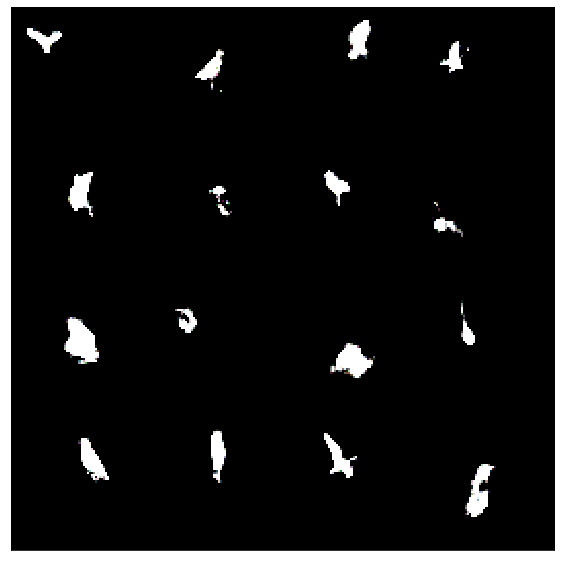

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


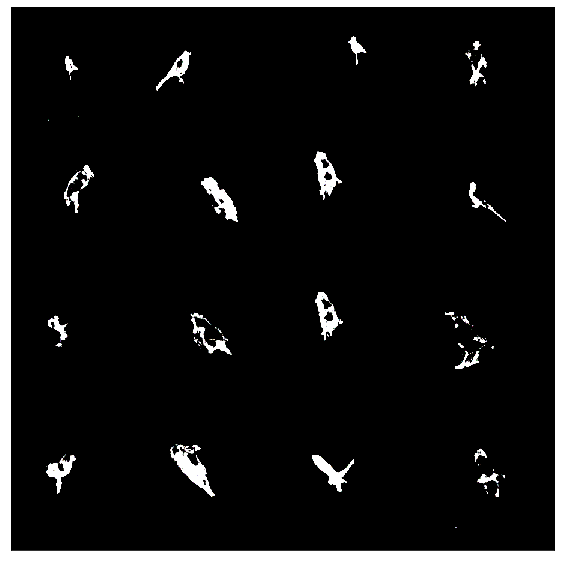

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 2


  0%|                                                                             | 3/17500 [00:14<49:46:44, 10.24s/it]

Train Epoch: 2 [0/280000 (0%)]	Loss: 0.031549
IOU : 0.05224609375


  0%|▏                                                                              | 54/17500 [00:18<25:56, 11.21it/s]

Train Epoch: 2 [200/280000 (0%)]	Loss: 0.030912
IOU : 0.0558013916015625


  1%|▍                                                                             | 103/17500 [00:21<19:31, 14.85it/s]

Train Epoch: 2 [400/280000 (1%)]	Loss: 0.024043
IOU : 0.051849365234375


  1%|▋                                                                             | 152/17500 [00:25<21:11, 13.64it/s]

Train Epoch: 2 [600/280000 (1%)]	Loss: 0.038946
IOU : 0.05743408203125


  1%|▉                                                                             | 201/17500 [00:29<41:35,  6.93it/s]

Train Epoch: 2 [800/280000 (1%)]	Loss: 0.026175
IOU : 0.0505218505859375


  1%|█                                                                             | 251/17500 [00:36<41:43,  6.89it/s]

Train Epoch: 2 [1000/280000 (1%)]	Loss: 0.031170
IOU : 0.04901123046875


  2%|█▎                                                                            | 301/17500 [00:42<41:30,  6.91it/s]

Train Epoch: 2 [1200/280000 (2%)]	Loss: 0.032796
IOU : 0.05718994140625


  2%|█▌                                                                            | 351/17500 [00:48<41:27,  6.89it/s]

Train Epoch: 2 [1400/280000 (2%)]	Loss: 0.029751
IOU : 0.057403564453125


  2%|█▊                                                                            | 403/17500 [00:52<18:29, 15.41it/s]

Train Epoch: 2 [1600/280000 (2%)]	Loss: 0.045531
IOU : 0.054534912109375


  3%|██                                                                            | 453/17500 [00:56<20:46, 13.67it/s]

Train Epoch: 2 [1800/280000 (3%)]	Loss: 0.027420
IOU : 0.0504913330078125


  3%|██▏                                                                           | 503/17500 [00:59<21:44, 13.03it/s]

Train Epoch: 2 [2000/280000 (3%)]	Loss: 0.030910
IOU : 0.0453033447265625


  3%|██▍                                                                           | 553/17500 [01:03<21:02, 13.42it/s]

Train Epoch: 2 [2200/280000 (3%)]	Loss: 0.037637
IOU : 0.052642822265625


  3%|██▋                                                                           | 601/17500 [01:09<40:43,  6.91it/s]

Train Epoch: 2 [2400/280000 (3%)]	Loss: 0.038201
IOU : 0.058380126953125


  4%|██▉                                                                           | 651/17500 [01:15<40:42,  6.90it/s]

Train Epoch: 2 [2600/280000 (4%)]	Loss: 0.033304
IOU : 0.05096435546875


  4%|███                                                                           | 701/17500 [01:21<40:26,  6.92it/s]

Train Epoch: 2 [2800/280000 (4%)]	Loss: 0.034974
IOU : 0.057098388671875


  4%|███▎                                                                          | 753/17500 [01:28<36:07,  7.73it/s]

Train Epoch: 2 [3000/280000 (4%)]	Loss: 0.030486
IOU : 0.051239013671875


  5%|███▌                                                                          | 801/17500 [01:34<40:10,  6.93it/s]

Train Epoch: 2 [3200/280000 (5%)]	Loss: 0.024928
IOU : 0.0545806884765625


  5%|███▊                                                                          | 851/17500 [01:40<40:10,  6.91it/s]

Train Epoch: 2 [3400/280000 (5%)]	Loss: 0.034673
IOU : 0.050262451171875


  5%|████                                                                          | 903/17500 [01:44<18:11, 15.20it/s]

Train Epoch: 2 [3600/280000 (5%)]	Loss: 0.033869
IOU : 0.0516815185546875


  5%|████▏                                                                         | 951/17500 [01:48<20:18, 13.58it/s]

Train Epoch: 2 [3800/280000 (5%)]	Loss: 0.024256
IOU : 0.0490570068359375


  6%|████▍                                                                        | 1001/17500 [01:52<39:38,  6.94it/s]

Train Epoch: 2 [4000/280000 (6%)]	Loss: 0.026693
IOU : 0.050018310546875


  6%|████▌                                                                        | 1051/17500 [01:59<39:31,  6.94it/s]

Train Epoch: 2 [4200/280000 (6%)]	Loss: 0.029723
IOU : 0.051483154296875


  6%|████▊                                                                        | 1101/17500 [02:05<39:38,  6.89it/s]

Train Epoch: 2 [4400/280000 (6%)]	Loss: 0.032902
IOU : 0.0484466552734375


  7%|█████                                                                        | 1153/17500 [02:11<35:15,  7.73it/s]

Train Epoch: 2 [4600/280000 (7%)]	Loss: 0.027468
IOU : 0.0538177490234375


  7%|█████▎                                                                       | 1201/17500 [02:17<39:16,  6.92it/s]

Train Epoch: 2 [4800/280000 (7%)]	Loss: 0.029218
IOU : 0.0583343505859375


  7%|█████▌                                                                       | 1251/17500 [02:24<39:30,  6.85it/s]

Train Epoch: 2 [5000/280000 (7%)]	Loss: 0.032335
IOU : 0.0552978515625


  7%|█████▋                                                                       | 1303/17500 [02:29<17:43, 15.23it/s]

Train Epoch: 2 [5200/280000 (7%)]	Loss: 0.041540
IOU : 0.055999755859375


  8%|█████▉                                                                       | 1352/17500 [02:33<21:21, 12.60it/s]

Train Epoch: 2 [5400/280000 (8%)]	Loss: 0.027952
IOU : 0.052154541015625


  8%|██████▏                                                                      | 1402/17500 [02:36<18:24, 14.58it/s]

Train Epoch: 2 [5600/280000 (8%)]	Loss: 0.029378
IOU : 0.046600341796875


  8%|██████▏                                                                    | 1451/17500 [02:41<1:04:48,  4.13it/s]

Train Epoch: 2 [5800/280000 (8%)]	Loss: 0.022536
IOU : 0.052734375


  9%|██████▌                                                                      | 1504/17500 [02:51<21:52, 12.19it/s]

Train Epoch: 2 [6000/280000 (9%)]	Loss: 0.028886
IOU : 0.0494232177734375


  9%|██████▊                                                                      | 1553/17500 [02:54<18:47, 14.15it/s]

Train Epoch: 2 [6200/280000 (9%)]	Loss: 0.027777
IOU : 0.0496368408203125


  9%|███████                                                                      | 1601/17500 [02:58<52:32,  5.04it/s]

Train Epoch: 2 [6400/280000 (9%)]	Loss: 0.031638
IOU : 0.053985595703125


  9%|███████▎                                                                     | 1653/17500 [03:06<17:25, 15.16it/s]

Train Epoch: 2 [6600/280000 (9%)]	Loss: 0.036085
IOU : 0.0558929443359375


 10%|███████▍                                                                     | 1702/17500 [03:10<16:25, 16.03it/s]

Train Epoch: 2 [6800/280000 (10%)]	Loss: 0.028328
IOU : 0.0534820556640625


 10%|███████▋                                                                     | 1751/17500 [03:15<38:30,  6.82it/s]

Train Epoch: 2 [7000/280000 (10%)]	Loss: 0.046020
IOU : 0.064910888671875


 10%|███████▉                                                                     | 1801/17500 [03:21<37:43,  6.93it/s]

Train Epoch: 2 [7200/280000 (10%)]	Loss: 0.026500
IOU : 0.061859130859375


 11%|████████▏                                                                    | 1851/17500 [03:27<37:41,  6.92it/s]

Train Epoch: 2 [7400/280000 (11%)]	Loss: 0.034917
IOU : 0.052520751953125


 11%|████████▎                                                                    | 1901/17500 [03:34<37:32,  6.93it/s]

Train Epoch: 2 [7600/280000 (11%)]	Loss: 0.033303
IOU : 0.05645751953125


 11%|████████▌                                                                    | 1951/17500 [03:40<37:36,  6.89it/s]

Train Epoch: 2 [7800/280000 (11%)]	Loss: 0.030762
IOU : 0.0551605224609375


 11%|████████▊                                                                    | 2001/17500 [03:46<37:28,  6.89it/s]

Train Epoch: 2 [8000/280000 (11%)]	Loss: 0.035542
IOU : 0.0543670654296875


 12%|█████████                                                                    | 2051/17500 [03:52<37:16,  6.91it/s]

Train Epoch: 2 [8200/280000 (12%)]	Loss: 0.025118
IOU : 0.0498046875


 12%|█████████▎                                                                   | 2104/17500 [03:58<20:20, 12.62it/s]

Train Epoch: 2 [8400/280000 (12%)]	Loss: 0.028390
IOU : 0.0544586181640625


 12%|█████████▍                                                                   | 2153/17500 [04:02<17:21, 14.73it/s]

Train Epoch: 2 [8600/280000 (12%)]	Loss: 0.036224
IOU : 0.0563507080078125


 13%|█████████▋                                                                   | 2202/17500 [04:05<17:51, 14.27it/s]

Train Epoch: 2 [8800/280000 (13%)]	Loss: 0.029358
IOU : 0.04962158203125


 13%|█████████▋                                                                 | 2251/17500 [04:13<1:08:07,  3.73it/s]

Train Epoch: 2 [9000/280000 (13%)]	Loss: 0.031696
IOU : 0.060302734375


 13%|██████████▏                                                                  | 2304/17500 [04:19<16:40, 15.19it/s]

Train Epoch: 2 [9200/280000 (13%)]	Loss: 0.025337
IOU : 0.0525360107421875


 13%|██████████▎                                                                  | 2352/17500 [04:22<16:56, 14.91it/s]

Train Epoch: 2 [9400/280000 (13%)]	Loss: 0.029212
IOU : 0.0571746826171875


 14%|██████████▎                                                                | 2401/17500 [04:30<1:07:43,  3.72it/s]

Train Epoch: 2 [9600/280000 (14%)]	Loss: 0.028037
IOU : 0.0525360107421875


 14%|██████████▊                                                                  | 2452/17500 [04:35<16:46, 14.96it/s]

Train Epoch: 2 [9800/280000 (14%)]	Loss: 0.031871
IOU : 0.0497589111328125


 14%|███████████                                                                  | 2504/17500 [04:39<17:26, 14.33it/s]

Train Epoch: 2 [10000/280000 (14%)]	Loss: 0.025849
IOU : 0.049530029296875


 15%|██████████▉                                                                | 2551/17500 [04:47<1:07:04,  3.71it/s]

Train Epoch: 2 [10200/280000 (15%)]	Loss: 0.028576
IOU : 0.0518798828125


 15%|███████████▍                                                                 | 2603/17500 [04:53<17:01, 14.58it/s]

Train Epoch: 2 [10400/280000 (15%)]	Loss: 0.032576
IOU : 0.049652099609375


 15%|███████████▋                                                                 | 2653/17500 [04:57<17:35, 14.06it/s]

Train Epoch: 2 [10600/280000 (15%)]	Loss: 0.025405
IOU : 0.0467376708984375


 15%|███████████▌                                                               | 2701/17500 [05:06<1:06:17,  3.72it/s]

Train Epoch: 2 [10800/280000 (15%)]	Loss: 0.030267
IOU : 0.05853271484375


 16%|████████████                                                                 | 2753/17500 [05:10<16:27, 14.94it/s]

Train Epoch: 2 [11000/280000 (16%)]	Loss: 0.034901
IOU : 0.0477752685546875


 16%|████████████▎                                                                | 2803/17500 [05:14<16:10, 15.15it/s]

Train Epoch: 2 [11200/280000 (16%)]	Loss: 0.054298
IOU : 0.056182861328125


 16%|████████████▌                                                                | 2853/17500 [05:18<18:41, 13.06it/s]

Train Epoch: 2 [11400/280000 (16%)]	Loss: 0.027503
IOU : 0.0536041259765625


 17%|████████████▊                                                                | 2903/17500 [05:21<18:50, 12.92it/s]

Train Epoch: 2 [11600/280000 (17%)]	Loss: 0.033757
IOU : 0.0527496337890625


 17%|████████████▋                                                              | 2951/17500 [05:30<1:05:03,  3.73it/s]

Train Epoch: 2 [11800/280000 (17%)]	Loss: 0.042387
IOU : 0.0616302490234375


 17%|█████████████▏                                                               | 3001/17500 [05:38<35:03,  6.89it/s]

Train Epoch: 2 [12000/280000 (17%)]	Loss: 0.033211
IOU : 0.0561981201171875


 17%|█████████████▍                                                               | 3053/17500 [05:44<30:11,  7.97it/s]

Train Epoch: 2 [12200/280000 (17%)]	Loss: 0.023794
IOU : 0.0536346435546875


 18%|█████████████▋                                                               | 3103/17500 [05:48<17:02, 14.08it/s]

Train Epoch: 2 [12400/280000 (18%)]	Loss: 0.026589
IOU : 0.0471038818359375


 18%|█████████████▊                                                               | 3153/17500 [05:51<15:47, 15.14it/s]

Train Epoch: 2 [12600/280000 (18%)]	Loss: 0.028107
IOU : 0.0538330078125


 18%|██████████████                                                               | 3203/17500 [05:55<16:43, 14.24it/s]

Train Epoch: 2 [12800/280000 (18%)]	Loss: 0.025327
IOU : 0.057281494140625


 19%|██████████████▎                                                              | 3251/17500 [06:00<34:26,  6.89it/s]

Train Epoch: 2 [13000/280000 (19%)]	Loss: 0.030306
IOU : 0.0504150390625


 19%|██████████████▌                                                              | 3301/17500 [06:06<34:10,  6.92it/s]

Train Epoch: 2 [13200/280000 (19%)]	Loss: 0.025578
IOU : 0.0517425537109375


 19%|██████████████▋                                                              | 3351/17500 [06:12<34:17,  6.88it/s]

Train Epoch: 2 [13400/280000 (19%)]	Loss: 0.041593
IOU : 0.059356689453125


 19%|██████████████▉                                                              | 3401/17500 [06:18<34:06,  6.89it/s]

Train Epoch: 2 [13600/280000 (19%)]	Loss: 0.029440
IOU : 0.053802490234375


 20%|███████████████▏                                                             | 3451/17500 [06:25<33:53,  6.91it/s]

Train Epoch: 2 [13800/280000 (20%)]	Loss: 0.022304
IOU : 0.0473175048828125


 20%|███████████████▍                                                             | 3501/17500 [06:31<33:38,  6.93it/s]

Train Epoch: 2 [14000/280000 (20%)]	Loss: 0.036966
IOU : 0.056732177734375


 20%|███████████████▌                                                             | 3551/17500 [06:37<33:41,  6.90it/s]

Train Epoch: 2 [14200/280000 (20%)]	Loss: 0.027016
IOU : 0.052032470703125


 21%|███████████████▊                                                             | 3603/17500 [06:42<15:21, 15.07it/s]

Train Epoch: 2 [14400/280000 (21%)]	Loss: 0.030906
IOU : 0.057159423828125


 21%|████████████████                                                             | 3653/17500 [06:45<16:49, 13.71it/s]

Train Epoch: 2 [14600/280000 (21%)]	Loss: 0.027473
IOU : 0.0562286376953125


 21%|████████████████▎                                                            | 3703/17500 [06:49<16:25, 14.00it/s]

Train Epoch: 2 [14800/280000 (21%)]	Loss: 0.032984
IOU : 0.0556182861328125


 21%|████████████████                                                           | 3751/17500 [06:59<1:01:36,  3.72it/s]

Train Epoch: 2 [15000/280000 (21%)]	Loss: 0.027878
IOU : 0.0471343994140625


 22%|████████████████▋                                                            | 3801/17500 [07:06<32:52,  6.95it/s]

Train Epoch: 2 [15200/280000 (22%)]	Loss: 0.034385
IOU : 0.05133056640625


 22%|████████████████▉                                                            | 3852/17500 [07:09<14:49, 15.35it/s]

Train Epoch: 2 [15400/280000 (22%)]	Loss: 0.032812
IOU : 0.063140869140625


 22%|█████████████████▏                                                           | 3903/17500 [07:13<14:58, 15.13it/s]

Train Epoch: 2 [15600/280000 (22%)]	Loss: 0.026655
IOU : 0.0541839599609375


 23%|█████████████████▍                                                           | 3951/17500 [07:18<32:58,  6.85it/s]

Train Epoch: 2 [15800/280000 (23%)]	Loss: 0.026766
IOU : 0.0478668212890625


 23%|█████████████████▌                                                           | 4001/17500 [07:25<32:37,  6.90it/s]

Train Epoch: 2 [16000/280000 (23%)]	Loss: 0.024642
IOU : 0.0481414794921875


 23%|█████████████████▊                                                           | 4051/17500 [07:31<32:23,  6.92it/s]

Train Epoch: 2 [16200/280000 (23%)]	Loss: 0.040132
IOU : 0.059234619140625


 23%|██████████████████                                                           | 4103/17500 [07:37<28:52,  7.73it/s]

Train Epoch: 2 [16400/280000 (23%)]	Loss: 0.030750
IOU : 0.0564422607421875


 24%|██████████████████▎                                                          | 4151/17500 [07:43<32:05,  6.93it/s]

Train Epoch: 2 [16600/280000 (24%)]	Loss: 0.029852
IOU : 0.055999755859375


 24%|██████████████████▍                                                          | 4201/17500 [07:50<32:06,  6.90it/s]

Train Epoch: 2 [16800/280000 (24%)]	Loss: 0.033079
IOU : 0.0608062744140625


 24%|██████████████████▋                                                          | 4254/17500 [07:54<14:56, 14.77it/s]

Train Epoch: 2 [17000/280000 (24%)]	Loss: 0.025393
IOU : 0.0503692626953125


 25%|██████████████████▉                                                          | 4304/17500 [07:57<15:21, 14.32it/s]

Train Epoch: 2 [17200/280000 (25%)]	Loss: 0.031629
IOU : 0.0568389892578125


 25%|███████████████████▏                                                         | 4351/17500 [08:02<31:24,  6.98it/s]

Train Epoch: 2 [17400/280000 (25%)]	Loss: 0.035815
IOU : 0.0520172119140625


 25%|███████████████████▎                                                         | 4401/17500 [08:08<31:47,  6.87it/s]

Train Epoch: 2 [17600/280000 (25%)]	Loss: 0.030893
IOU : 0.052825927734375


 25%|███████████████████▌                                                         | 4451/17500 [08:14<31:38,  6.87it/s]

Train Epoch: 2 [17800/280000 (25%)]	Loss: 0.027866
IOU : 0.0537567138671875


 26%|███████████████████▊                                                         | 4501/17500 [08:20<31:15,  6.93it/s]

Train Epoch: 2 [18000/280000 (26%)]	Loss: 0.028153
IOU : 0.056671142578125


 26%|████████████████████                                                         | 4551/17500 [08:27<31:19,  6.89it/s]

Train Epoch: 2 [18200/280000 (26%)]	Loss: 0.038942
IOU : 0.0634765625


 26%|████████████████████▎                                                        | 4603/17500 [08:33<16:47, 12.80it/s]

Train Epoch: 2 [18400/280000 (26%)]	Loss: 0.034961
IOU : 0.050537109375


 27%|████████████████████▍                                                        | 4651/17500 [08:36<15:06, 14.18it/s]

Train Epoch: 2 [18600/280000 (27%)]	Loss: 0.030673
IOU : 0.0550537109375


 27%|████████████████████▋                                                        | 4702/17500 [08:39<15:14, 14.00it/s]

Train Epoch: 2 [18800/280000 (27%)]	Loss: 0.030209
IOU : 0.0529022216796875


 27%|████████████████████▉                                                        | 4751/17500 [08:44<45:52,  4.63it/s]

Train Epoch: 2 [19000/280000 (27%)]	Loss: 0.027582
IOU : 0.0496368408203125


 27%|█████████████████████▏                                                       | 4804/17500 [08:54<18:21, 11.53it/s]

Train Epoch: 2 [19200/280000 (27%)]	Loss: 0.031109
IOU : 0.04705810546875


 28%|█████████████████████▎                                                       | 4854/17500 [08:57<14:49, 14.22it/s]

Train Epoch: 2 [19400/280000 (28%)]	Loss: 0.028418
IOU : 0.060211181640625


 28%|█████████████████████▌                                                       | 4904/17500 [09:01<14:26, 14.53it/s]

Train Epoch: 2 [19600/280000 (28%)]	Loss: 0.031809
IOU : 0.0554656982421875


 28%|█████████████████████▊                                                       | 4951/17500 [09:05<28:59,  7.21it/s]

Train Epoch: 2 [19800/280000 (28%)]	Loss: 0.026316
IOU : 0.054229736328125


 29%|██████████████████████                                                       | 5001/17500 [09:11<30:18,  6.87it/s]

Train Epoch: 2 [20000/280000 (29%)]	Loss: 0.025814
IOU : 0.053955078125


 29%|██████████████████████▏                                                      | 5051/17500 [09:18<29:54,  6.94it/s]

Train Epoch: 2 [20200/280000 (29%)]	Loss: 0.026251
IOU : 0.0502166748046875


 29%|██████████████████████▍                                                      | 5101/17500 [09:24<30:05,  6.87it/s]

Train Epoch: 2 [20400/280000 (29%)]	Loss: 0.029466
IOU : 0.0555572509765625


 29%|██████████████████████▋                                                      | 5151/17500 [09:30<29:58,  6.87it/s]

Train Epoch: 2 [20600/280000 (29%)]	Loss: 0.041150
IOU : 0.0576324462890625


 30%|██████████████████████▉                                                      | 5201/17500 [09:36<29:52,  6.86it/s]

Train Epoch: 2 [20800/280000 (30%)]	Loss: 0.030108
IOU : 0.0541534423828125


 30%|███████████████████████                                                      | 5253/17500 [09:43<23:17,  8.76it/s]

Train Epoch: 2 [21000/280000 (30%)]	Loss: 0.024865
IOU : 0.0511932373046875


 30%|███████████████████████▎                                                     | 5302/17500 [09:46<15:11, 13.38it/s]

Train Epoch: 2 [21200/280000 (30%)]	Loss: 0.028127
IOU : 0.0519256591796875


 31%|███████████████████████▌                                                     | 5352/17500 [09:50<12:59, 15.59it/s]

Train Epoch: 2 [21400/280000 (31%)]	Loss: 0.031725
IOU : 0.049346923828125


 31%|███████████████████████▊                                                     | 5401/17500 [09:54<28:49,  6.99it/s]

Train Epoch: 2 [21600/280000 (31%)]	Loss: 0.022268
IOU : 0.0401153564453125


 31%|███████████████████████▉                                                     | 5451/17500 [10:00<29:07,  6.90it/s]

Train Epoch: 2 [21800/280000 (31%)]	Loss: 0.021944
IOU : 0.0440673828125


 31%|████████████████████████▏                                                    | 5501/17500 [10:07<28:55,  6.92it/s]

Train Epoch: 2 [22000/280000 (31%)]	Loss: 0.028205
IOU : 0.0510711669921875


 32%|████████████████████████▍                                                    | 5551/17500 [10:13<28:45,  6.92it/s]

Train Epoch: 2 [22200/280000 (32%)]	Loss: 0.028207
IOU : 0.05609130859375


 32%|████████████████████████▋                                                    | 5601/17500 [10:19<28:51,  6.87it/s]

Train Epoch: 2 [22400/280000 (32%)]	Loss: 0.028279
IOU : 0.0461273193359375


 32%|████████████████████████▊                                                    | 5651/17500 [10:25<28:29,  6.93it/s]

Train Epoch: 2 [22600/280000 (32%)]	Loss: 0.026558
IOU : 0.0491790771484375


 33%|█████████████████████████                                                    | 5703/17500 [10:30<12:05, 16.26it/s]

Train Epoch: 2 [22800/280000 (33%)]	Loss: 0.029428
IOU : 0.0555877685546875


 33%|█████████████████████████▎                                                   | 5753/17500 [10:34<14:19, 13.67it/s]

Train Epoch: 2 [23000/280000 (33%)]	Loss: 0.027909
IOU : 0.0492706298828125


 33%|█████████████████████████▌                                                   | 5804/17500 [10:37<12:29, 15.60it/s]

Train Epoch: 2 [23200/280000 (33%)]	Loss: 0.029547
IOU : 0.045379638671875


 33%|█████████████████████████▋                                                   | 5851/17500 [10:47<52:07,  3.72it/s]

Train Epoch: 2 [23400/280000 (33%)]	Loss: 0.029155
IOU : 0.0461578369140625


 34%|█████████████████████████▉                                                   | 5903/17500 [10:53<11:30, 16.80it/s]

Train Epoch: 2 [23600/280000 (34%)]	Loss: 0.033600
IOU : 0.055755615234375


 34%|██████████████████████████▏                                                  | 5953/17500 [10:56<13:19, 14.45it/s]

Train Epoch: 2 [23800/280000 (34%)]	Loss: 0.039185
IOU : 0.056427001953125


 34%|██████████████████████████▍                                                  | 6003/17500 [11:00<14:17, 13.41it/s]

Train Epoch: 2 [24000/280000 (34%)]	Loss: 0.031431
IOU : 0.0568389892578125


 35%|██████████████████████████▌                                                  | 6051/17500 [11:08<51:11,  3.73it/s]

Train Epoch: 2 [24200/280000 (35%)]	Loss: 0.028341
IOU : 0.0518646240234375


 35%|██████████████████████████▊                                                  | 6102/17500 [11:15<17:59, 10.56it/s]

Train Epoch: 2 [24400/280000 (35%)]	Loss: 0.024679
IOU : 0.0442352294921875


 35%|███████████████████████████                                                  | 6152/17500 [11:18<14:33, 12.99it/s]

Train Epoch: 2 [24600/280000 (35%)]	Loss: 0.029768
IOU : 0.055084228515625


 35%|███████████████████████████▎                                                 | 6202/17500 [11:22<15:15, 12.33it/s]

Train Epoch: 2 [24800/280000 (35%)]	Loss: 0.027360
IOU : 0.0459442138671875


 36%|███████████████████████████▌                                                 | 6251/17500 [11:28<27:12,  6.89it/s]

Train Epoch: 2 [25000/280000 (36%)]	Loss: 0.026370
IOU : 0.055450439453125


 36%|███████████████████████████▋                                                 | 6301/17500 [11:34<26:59,  6.91it/s]

Train Epoch: 2 [25200/280000 (36%)]	Loss: 0.030591
IOU : 0.0588531494140625


 36%|███████████████████████████▉                                                 | 6351/17500 [11:41<27:06,  6.86it/s]

Train Epoch: 2 [25400/280000 (36%)]	Loss: 0.023945
IOU : 0.0517120361328125


 37%|████████████████████████████▏                                                | 6401/17500 [11:47<26:47,  6.91it/s]

Train Epoch: 2 [25600/280000 (37%)]	Loss: 0.028656
IOU : 0.0527191162109375


 37%|████████████████████████████▍                                                | 6454/17500 [11:52<13:01, 14.14it/s]

Train Epoch: 2 [25800/280000 (37%)]	Loss: 0.023194
IOU : 0.04608154296875


 37%|████████████████████████████▌                                                | 6502/17500 [11:56<12:05, 15.15it/s]

Train Epoch: 2 [26000/280000 (37%)]	Loss: 0.028275
IOU : 0.0541534423828125


 37%|████████████████████████████▊                                                | 6552/17500 [11:59<13:05, 13.93it/s]

Train Epoch: 2 [26200/280000 (37%)]	Loss: 0.031103
IOU : 0.057647705078125


 38%|█████████████████████████████                                                | 6603/17500 [12:09<29:24,  6.18it/s]

Train Epoch: 2 [26400/280000 (38%)]	Loss: 0.031412
IOU : 0.0531463623046875


 38%|█████████████████████████████▎                                               | 6653/17500 [12:12<11:22, 15.90it/s]

Train Epoch: 2 [26600/280000 (38%)]	Loss: 0.038337
IOU : 0.0537567138671875


 38%|█████████████████████████████▍                                               | 6701/17500 [12:17<43:14,  4.16it/s]

Train Epoch: 2 [26800/280000 (38%)]	Loss: 0.040003
IOU : 0.0577850341796875


 39%|█████████████████████████████▋                                               | 6752/17500 [12:26<13:43, 13.05it/s]

Train Epoch: 2 [27000/280000 (39%)]	Loss: 0.050640
IOU : 0.0601654052734375


 39%|█████████████████████████████▉                                               | 6802/17500 [12:29<12:24, 14.36it/s]

Train Epoch: 2 [27200/280000 (39%)]	Loss: 0.026439
IOU : 0.057220458984375


 39%|██████████████████████████████▏                                              | 6852/17500 [12:33<12:04, 14.70it/s]

Train Epoch: 2 [27400/280000 (39%)]	Loss: 0.033339
IOU : 0.05126953125


 39%|██████████████████████████████▎                                              | 6901/17500 [12:39<47:37,  3.71it/s]

Train Epoch: 2 [27600/280000 (39%)]	Loss: 0.030109
IOU : 0.054351806640625


 40%|██████████████████████████████▌                                              | 6951/17500 [12:48<25:38,  6.86it/s]

Train Epoch: 2 [27800/280000 (40%)]	Loss: 0.041819
IOU : 0.0528717041015625


 40%|██████████████████████████████▊                                              | 7003/17500 [12:52<12:30, 13.99it/s]

Train Epoch: 2 [28000/280000 (40%)]	Loss: 0.026207
IOU : 0.0499267578125


 40%|███████████████████████████████                                              | 7053/17500 [12:55<12:10, 14.31it/s]

Train Epoch: 2 [28200/280000 (40%)]	Loss: 0.032680
IOU : 0.0538177490234375


 41%|███████████████████████████████▎                                             | 7103/17500 [12:59<12:07, 14.29it/s]

Train Epoch: 2 [28400/280000 (41%)]	Loss: 0.029629
IOU : 0.0487060546875


 41%|███████████████████████████████▍                                             | 7151/17500 [13:04<24:57,  6.91it/s]

Train Epoch: 2 [28600/280000 (41%)]	Loss: 0.032552
IOU : 0.0525970458984375


 41%|███████████████████████████████▋                                             | 7201/17500 [13:10<24:51,  6.91it/s]

Train Epoch: 2 [28800/280000 (41%)]	Loss: 0.026492
IOU : 0.055755615234375


 41%|███████████████████████████████▉                                             | 7251/17500 [13:16<24:50,  6.87it/s]

Train Epoch: 2 [29000/280000 (41%)]	Loss: 0.030867
IOU : 0.0489349365234375


 42%|████████████████████████████████                                             | 7301/17500 [13:23<24:36,  6.91it/s]

Train Epoch: 2 [29200/280000 (42%)]	Loss: 0.028412
IOU : 0.05548095703125


 42%|████████████████████████████████▎                                            | 7351/17500 [13:29<24:31,  6.90it/s]

Train Epoch: 2 [29400/280000 (42%)]	Loss: 0.023598
IOU : 0.0471649169921875


 42%|████████████████████████████████▌                                            | 7401/17500 [13:35<24:25,  6.89it/s]

Train Epoch: 2 [29600/280000 (42%)]	Loss: 0.023035
IOU : 0.040069580078125


 43%|████████████████████████████████▊                                            | 7454/17500 [13:40<10:10, 16.46it/s]

Train Epoch: 2 [29800/280000 (43%)]	Loss: 0.032194
IOU : 0.05023193359375


 43%|█████████████████████████████████                                            | 7501/17500 [13:45<43:31,  3.83it/s]

Train Epoch: 2 [30000/280000 (43%)]	Loss: 0.033390
IOU : 0.0609893798828125


 43%|█████████████████████████████████▏                                           | 7554/17500 [13:52<10:01, 16.53it/s]

Train Epoch: 2 [30200/280000 (43%)]	Loss: 0.029839
IOU : 0.04937744140625


 43%|█████████████████████████████████▍                                           | 7604/17500 [13:55<11:07, 14.82it/s]

Train Epoch: 2 [30400/280000 (43%)]	Loss: 0.022708
IOU : 0.0423431396484375


 44%|█████████████████████████████████▋                                           | 7651/17500 [14:04<44:01,  3.73it/s]

Train Epoch: 2 [30600/280000 (44%)]	Loss: 0.027242
IOU : 0.0476531982421875


 44%|█████████████████████████████████▉                                           | 7703/17500 [14:09<10:54, 14.97it/s]

Train Epoch: 2 [30800/280000 (44%)]	Loss: 0.036363
IOU : 0.0575714111328125


 44%|██████████████████████████████████                                           | 7753/17500 [14:12<12:29, 13.00it/s]

Train Epoch: 2 [31000/280000 (44%)]	Loss: 0.036336
IOU : 0.0526580810546875


 45%|██████████████████████████████████▎                                          | 7801/17500 [14:21<23:26,  6.90it/s]

Train Epoch: 2 [31200/280000 (45%)]	Loss: 0.021814
IOU : 0.0484619140625


 45%|██████████████████████████████████▌                                          | 7851/17500 [14:27<23:15,  6.92it/s]

Train Epoch: 2 [31400/280000 (45%)]	Loss: 0.029476
IOU : 0.054595947265625


 45%|██████████████████████████████████▊                                          | 7903/17500 [14:33<11:21, 14.09it/s]

Train Epoch: 2 [31600/280000 (45%)]	Loss: 0.024228
IOU : 0.0462799072265625


 45%|██████████████████████████████████▉                                          | 7952/17500 [14:36<10:18, 15.44it/s]

Train Epoch: 2 [31800/280000 (45%)]	Loss: 0.030397
IOU : 0.0581512451171875


 46%|███████████████████████████████████▏                                         | 8002/17500 [14:40<11:56, 13.25it/s]

Train Epoch: 2 [32000/280000 (46%)]	Loss: 0.032929
IOU : 0.05438232421875


 46%|███████████████████████████████████▍                                         | 8051/17500 [14:48<42:22,  3.72it/s]

Train Epoch: 2 [32200/280000 (46%)]	Loss: 0.026245
IOU : 0.05096435546875


 46%|███████████████████████████████████▋                                         | 8103/17500 [14:54<11:07, 14.08it/s]

Train Epoch: 2 [32400/280000 (46%)]	Loss: 0.044079
IOU : 0.06390380859375


 47%|███████████████████████████████████▊                                         | 8153/17500 [14:57<10:56, 14.24it/s]

Train Epoch: 2 [32600/280000 (47%)]	Loss: 0.038341
IOU : 0.056671142578125


 47%|████████████████████████████████████                                         | 8201/17500 [15:05<41:37,  3.72it/s]

Train Epoch: 2 [32800/280000 (47%)]	Loss: 0.036238
IOU : 0.0568084716796875


 47%|████████████████████████████████████▎                                        | 8253/17500 [15:10<09:55, 15.52it/s]

Train Epoch: 2 [33000/280000 (47%)]	Loss: 0.035705
IOU : 0.0550384521484375


 47%|████████████████████████████████████▌                                        | 8303/17500 [15:14<10:47, 14.19it/s]

Train Epoch: 2 [33200/280000 (47%)]	Loss: 0.026834
IOU : 0.049346923828125


 48%|████████████████████████████████████▋                                        | 8351/17500 [15:20<40:54,  3.73it/s]

Train Epoch: 2 [33400/280000 (48%)]	Loss: 0.027919
IOU : 0.0578460693359375


 48%|████████████████████████████████████▉                                        | 8401/17500 [15:28<22:01,  6.88it/s]

Train Epoch: 2 [33600/280000 (48%)]	Loss: 0.018378
IOU : 0.0479278564453125


 48%|█████████████████████████████████████▏                                       | 8453/17500 [15:34<10:15, 14.70it/s]

Train Epoch: 2 [33800/280000 (48%)]	Loss: 0.031164
IOU : 0.0537261962890625


 49%|█████████████████████████████████████▍                                       | 8503/17500 [15:37<09:43, 15.41it/s]

Train Epoch: 2 [34000/280000 (49%)]	Loss: 0.032942
IOU : 0.049560546875


 49%|█████████████████████████████████████▌                                       | 8551/17500 [15:41<21:30,  6.93it/s]

Train Epoch: 2 [34200/280000 (49%)]	Loss: 0.027169
IOU : 0.05157470703125


 49%|█████████████████████████████████████▊                                       | 8601/17500 [15:48<21:35,  6.87it/s]

Train Epoch: 2 [34400/280000 (49%)]	Loss: 0.030223
IOU : 0.0525360107421875


 49%|██████████████████████████████████████                                       | 8651/17500 [15:54<21:25,  6.88it/s]

Train Epoch: 2 [34600/280000 (49%)]	Loss: 0.028965
IOU : 0.0572052001953125


 50%|██████████████████████████████████████▎                                      | 8701/17500 [16:00<21:15,  6.90it/s]

Train Epoch: 2 [34800/280000 (50%)]	Loss: 0.041095
IOU : 0.0554962158203125


 50%|██████████████████████████████████████▌                                      | 8751/17500 [16:06<20:58,  6.95it/s]

Train Epoch: 2 [35000/280000 (50%)]	Loss: 0.032997
IOU : 0.0585784912109375


 50%|██████████████████████████████████████▋                                      | 8801/17500 [16:13<20:57,  6.92it/s]

Train Epoch: 2 [35200/280000 (50%)]	Loss: 0.029881
IOU : 0.0549163818359375


 51%|██████████████████████████████████████▉                                      | 8852/17500 [16:17<09:34, 15.06it/s]

Train Epoch: 2 [35400/280000 (51%)]	Loss: 0.030023
IOU : 0.0509490966796875


 51%|███████████████████████████████████████▏                                     | 8904/17500 [16:21<10:10, 14.08it/s]

Train Epoch: 2 [35600/280000 (51%)]	Loss: 0.027134
IOU : 0.0498809814453125


 51%|███████████████████████████████████████▍                                     | 8951/17500 [16:28<38:10,  3.73it/s]

Train Epoch: 2 [35800/280000 (51%)]	Loss: 0.031452
IOU : 0.055145263671875


 51%|███████████████████████████████████████▌                                     | 9004/17500 [16:35<08:40, 16.33it/s]

Train Epoch: 2 [36000/280000 (51%)]	Loss: 0.023687
IOU : 0.0502777099609375


 52%|███████████████████████████████████████▊                                     | 9052/17500 [16:38<09:48, 14.35it/s]

Train Epoch: 2 [36200/280000 (52%)]	Loss: 0.026979
IOU : 0.058929443359375


 52%|████████████████████████████████████████                                     | 9101/17500 [16:42<20:01,  6.99it/s]

Train Epoch: 2 [36400/280000 (52%)]	Loss: 0.031255
IOU : 0.0523223876953125


 52%|████████████████████████████████████████▎                                    | 9151/17500 [16:49<20:11,  6.89it/s]

Train Epoch: 2 [36600/280000 (52%)]	Loss: 0.034062
IOU : 0.0570526123046875


 53%|████████████████████████████████████████▍                                    | 9201/17500 [16:55<19:53,  6.95it/s]

Train Epoch: 2 [36800/280000 (53%)]	Loss: 0.037556
IOU : 0.055816650390625


 53%|████████████████████████████████████████▋                                    | 9251/17500 [17:01<19:48,  6.94it/s]

Train Epoch: 2 [37000/280000 (53%)]	Loss: 0.033305
IOU : 0.0466461181640625


 53%|████████████████████████████████████████▉                                    | 9301/17500 [17:07<19:42,  6.93it/s]

Train Epoch: 2 [37200/280000 (53%)]	Loss: 0.039704
IOU : 0.060394287109375


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [17:14<19:41,  6.90it/s]

Train Epoch: 2 [37400/280000 (53%)]	Loss: 0.033026
IOU : 0.0519561767578125


 54%|█████████████████████████████████████████▎                                   | 9403/17500 [17:18<08:38, 15.60it/s]

Train Epoch: 2 [37600/280000 (54%)]	Loss: 0.036724
IOU : 0.048248291015625


 54%|█████████████████████████████████████████▌                                   | 9452/17500 [17:22<09:04, 14.79it/s]

Train Epoch: 2 [37800/280000 (54%)]	Loss: 0.033061
IOU : 0.05230712890625


 54%|█████████████████████████████████████████▊                                   | 9502/17500 [17:25<09:46, 13.65it/s]

Train Epoch: 2 [38000/280000 (54%)]	Loss: 0.025270
IOU : 0.0548553466796875


 55%|██████████████████████████████████████████                                   | 9551/17500 [17:31<19:07,  6.93it/s]

Train Epoch: 2 [38200/280000 (55%)]	Loss: 0.028450
IOU : 0.0491790771484375


 55%|██████████████████████████████████████████▏                                  | 9601/17500 [17:37<19:11,  6.86it/s]

Train Epoch: 2 [38400/280000 (55%)]	Loss: 0.045260
IOU : 0.0582275390625


 55%|██████████████████████████████████████████▍                                  | 9651/17500 [17:44<18:58,  6.89it/s]

Train Epoch: 2 [38600/280000 (55%)]	Loss: 0.027590
IOU : 0.0515899658203125


 55%|██████████████████████████████████████████▋                                  | 9701/17500 [17:50<18:54,  6.87it/s]

Train Epoch: 2 [38800/280000 (55%)]	Loss: 0.028493
IOU : 0.0597381591796875


 56%|██████████████████████████████████████████▉                                  | 9751/17500 [17:56<18:40,  6.91it/s]

Train Epoch: 2 [39000/280000 (56%)]	Loss: 0.023411
IOU : 0.0474853515625


 56%|███████████████████████████████████████████                                  | 9801/17500 [18:03<18:38,  6.88it/s]

Train Epoch: 2 [39200/280000 (56%)]	Loss: 0.033618
IOU : 0.048126220703125


 56%|███████████████████████████████████████████▎                                 | 9852/17500 [18:07<08:27, 15.06it/s]

Train Epoch: 2 [39400/280000 (56%)]	Loss: 0.038808
IOU : 0.055908203125


 57%|███████████████████████████████████████████▌                                 | 9902/17500 [18:10<08:50, 14.31it/s]

Train Epoch: 2 [39600/280000 (57%)]	Loss: 0.021637
IOU : 0.0499114990234375


 57%|███████████████████████████████████████████▊                                 | 9952/17500 [18:14<09:52, 12.73it/s]

Train Epoch: 2 [39800/280000 (57%)]	Loss: 0.043874
IOU : 0.0546112060546875


 57%|███████████████████████████████████████████▍                                | 10001/17500 [18:19<32:40,  3.82it/s]

Train Epoch: 2 [40000/280000 (57%)]	Loss: 0.049858
IOU : 0.062042236328125


 57%|███████████████████████████████████████████▋                                | 10054/17500 [18:30<12:10, 10.19it/s]

Train Epoch: 2 [40200/280000 (57%)]	Loss: 0.027859
IOU : 0.0535430908203125


 58%|███████████████████████████████████████████▊                                | 10102/17500 [18:33<09:02, 13.63it/s]

Train Epoch: 2 [40400/280000 (58%)]	Loss: 0.027042
IOU : 0.045013427734375


 58%|████████████████████████████████████████████                                | 10152/17500 [18:37<08:48, 13.89it/s]

Train Epoch: 2 [40600/280000 (58%)]	Loss: 0.031762
IOU : 0.0496673583984375


 58%|████████████████████████████████████████████▎                               | 10201/17500 [18:42<17:32,  6.93it/s]

Train Epoch: 2 [40800/280000 (58%)]	Loss: 0.047103
IOU : 0.0573272705078125


 59%|████████████████████████████████████████████▌                               | 10251/17500 [18:48<17:30,  6.90it/s]

Train Epoch: 2 [41000/280000 (59%)]	Loss: 0.035239
IOU : 0.046539306640625


 59%|████████████████████████████████████████████▋                               | 10301/17500 [18:54<17:23,  6.90it/s]

Train Epoch: 2 [41200/280000 (59%)]	Loss: 0.026074
IOU : 0.0527801513671875


 59%|████████████████████████████████████████████▉                               | 10351/17500 [19:01<17:19,  6.88it/s]

Train Epoch: 2 [41400/280000 (59%)]	Loss: 0.033376
IOU : 0.0483551025390625


 59%|█████████████████████████████████████████████▏                              | 10401/17500 [19:07<17:06,  6.92it/s]

Train Epoch: 2 [41600/280000 (59%)]	Loss: 0.036801
IOU : 0.0569305419921875


 60%|█████████████████████████████████████████████▍                              | 10451/17500 [19:13<16:55,  6.94it/s]

Train Epoch: 2 [41800/280000 (60%)]	Loss: 0.025198
IOU : 0.0516204833984375


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [19:19<16:55,  6.89it/s]

Train Epoch: 2 [42000/280000 (60%)]	Loss: 0.029231
IOU : 0.0471343994140625


 60%|█████████████████████████████████████████████▊                              | 10553/17500 [19:25<12:11,  9.49it/s]

Train Epoch: 2 [42200/280000 (60%)]	Loss: 0.029536
IOU : 0.0482177734375


 61%|██████████████████████████████████████████████                              | 10603/17500 [19:29<07:15, 15.84it/s]

Train Epoch: 2 [42400/280000 (61%)]	Loss: 0.029607
IOU : 0.044677734375


 61%|██████████████████████████████████████████████▎                             | 10653/17500 [19:33<07:47, 14.64it/s]

Train Epoch: 2 [42600/280000 (61%)]	Loss: 0.025257
IOU : 0.0506591796875


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [19:36<13:29,  8.40it/s]

Train Epoch: 2 [42800/280000 (61%)]	Loss: 0.026122
IOU : 0.04559326171875


 61%|██████████████████████████████████████████████▋                             | 10751/17500 [19:43<16:18,  6.90it/s]

Train Epoch: 2 [43000/280000 (61%)]	Loss: 0.028623
IOU : 0.0559539794921875


 62%|██████████████████████████████████████████████▉                             | 10801/17500 [19:49<16:16,  6.86it/s]

Train Epoch: 2 [43200/280000 (62%)]	Loss: 0.026521
IOU : 0.0451507568359375


 62%|███████████████████████████████████████████████                             | 10851/17500 [19:55<16:04,  6.89it/s]

Train Epoch: 2 [43400/280000 (62%)]	Loss: 0.026077
IOU : 0.04962158203125


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [20:02<15:51,  6.94it/s]

Train Epoch: 2 [43600/280000 (62%)]	Loss: 0.028909
IOU : 0.04595947265625


 63%|███████████████████████████████████████████████▌                            | 10951/17500 [20:08<15:44,  6.93it/s]

Train Epoch: 2 [43800/280000 (63%)]	Loss: 0.027354
IOU : 0.0460357666015625


 63%|███████████████████████████████████████████████▊                            | 11001/17500 [20:14<15:36,  6.94it/s]

Train Epoch: 2 [44000/280000 (63%)]	Loss: 0.029143
IOU : 0.05633544921875


 63%|████████████████████████████████████████████████                            | 11053/17500 [20:20<07:51, 13.69it/s]

Train Epoch: 2 [44200/280000 (63%)]	Loss: 0.039015
IOU : 0.0482635498046875


 63%|████████████████████████████████████████████████▏                           | 11104/17500 [20:23<07:25, 14.34it/s]

Train Epoch: 2 [44400/280000 (63%)]	Loss: 0.023467
IOU : 0.0459136962890625


 64%|████████████████████████████████████████████████▍                           | 11151/17500 [20:28<27:36,  3.83it/s]

Train Epoch: 2 [44600/280000 (64%)]	Loss: 0.030472
IOU : 0.04852294921875


 64%|████████████████████████████████████████████████▋                           | 11202/17500 [20:35<06:28, 16.21it/s]

Train Epoch: 2 [44800/280000 (64%)]	Loss: 0.035485
IOU : 0.05584716796875


 64%|████████████████████████████████████████████████▊                           | 11252/17500 [20:39<07:08, 14.59it/s]

Train Epoch: 2 [45000/280000 (64%)]	Loss: 0.027428
IOU : 0.0539093017578125


 65%|█████████████████████████████████████████████████                           | 11301/17500 [20:43<21:51,  4.73it/s]

Train Epoch: 2 [45200/280000 (65%)]	Loss: 0.061447
IOU : 0.0622711181640625


 65%|█████████████████████████████████████████████████▎                          | 11354/17500 [20:52<06:46, 15.12it/s]

Train Epoch: 2 [45400/280000 (65%)]	Loss: 0.026781
IOU : 0.0499114990234375


 65%|█████████████████████████████████████████████████▌                          | 11402/17500 [20:56<07:08, 14.22it/s]

Train Epoch: 2 [45600/280000 (65%)]	Loss: 0.038059
IOU : 0.05328369140625


 65%|█████████████████████████████████████████████████▋                          | 11454/17500 [20:59<06:55, 14.57it/s]

Train Epoch: 2 [45800/280000 (65%)]	Loss: 0.027811
IOU : 0.0526885986328125


 66%|█████████████████████████████████████████████████▉                          | 11501/17500 [21:09<24:43,  4.04it/s]

Train Epoch: 2 [46000/280000 (66%)]	Loss: 0.024573
IOU : 0.05584716796875


 66%|██████████████████████████████████████████████████▏                         | 11552/17500 [21:13<06:25, 15.41it/s]

Train Epoch: 2 [46200/280000 (66%)]	Loss: 0.026666
IOU : 0.0487213134765625


 66%|██████████████████████████████████████████████████▍                         | 11602/17500 [21:17<07:10, 13.71it/s]

Train Epoch: 2 [46400/280000 (66%)]	Loss: 0.039805
IOU : 0.0649871826171875


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [21:22<14:12,  6.86it/s]

Train Epoch: 2 [46600/280000 (67%)]	Loss: 0.030514
IOU : 0.0504608154296875


 67%|██████████████████████████████████████████████████▊                         | 11701/17500 [21:29<14:04,  6.87it/s]

Train Epoch: 2 [46800/280000 (67%)]	Loss: 0.036142
IOU : 0.0614471435546875


 67%|███████████████████████████████████████████████████                         | 11751/17500 [21:35<13:49,  6.93it/s]

Train Epoch: 2 [47000/280000 (67%)]	Loss: 0.025456
IOU : 0.04754638671875


 67%|███████████████████████████████████████████████████▎                        | 11801/17500 [21:41<13:39,  6.95it/s]

Train Epoch: 2 [47200/280000 (67%)]	Loss: 0.027747
IOU : 0.05413818359375


 68%|███████████████████████████████████████████████████▍                        | 11851/17500 [21:47<13:34,  6.93it/s]

Train Epoch: 2 [47400/280000 (68%)]	Loss: 0.031532
IOU : 0.0504150390625


 68%|███████████████████████████████████████████████████▋                        | 11901/17500 [21:54<13:28,  6.93it/s]

Train Epoch: 2 [47600/280000 (68%)]	Loss: 0.030625
IOU : 0.0526885986328125


 68%|███████████████████████████████████████████████████▉                        | 11953/17500 [21:59<07:20, 12.60it/s]

Train Epoch: 2 [47800/280000 (68%)]	Loss: 0.033174
IOU : 0.053253173828125


 69%|████████████████████████████████████████████████████▏                       | 12003/17500 [22:03<06:17, 14.57it/s]

Train Epoch: 2 [48000/280000 (69%)]	Loss: 0.024533
IOU : 0.0526580810546875


 69%|████████████████████████████████████████████████████▎                       | 12053/17500 [22:07<06:28, 14.01it/s]

Train Epoch: 2 [48200/280000 (69%)]	Loss: 0.027825
IOU : 0.0499725341796875


 69%|████████████████████████████████████████████████████▌                       | 12103/17500 [22:10<06:36, 13.62it/s]

Train Epoch: 2 [48400/280000 (69%)]	Loss: 0.028841
IOU : 0.0518646240234375


 69%|████████████████████████████████████████████████████▊                       | 12153/17500 [22:14<06:12, 14.37it/s]

Train Epoch: 2 [48600/280000 (69%)]	Loss: 0.026744
IOU : 0.0496673583984375


 70%|████████████████████████████████████████████████████▉                       | 12201/17500 [22:19<12:47,  6.91it/s]

Train Epoch: 2 [48800/280000 (70%)]	Loss: 0.023573
IOU : 0.0450897216796875


 70%|█████████████████████████████████████████████████████▏                      | 12251/17500 [22:25<12:44,  6.86it/s]

Train Epoch: 2 [49000/280000 (70%)]	Loss: 0.028769
IOU : 0.0483551025390625


 70%|█████████████████████████████████████████████████████▍                      | 12301/17500 [22:31<12:34,  6.89it/s]

Train Epoch: 2 [49200/280000 (70%)]	Loss: 0.036562
IOU : 0.0523223876953125


 71%|█████████████████████████████████████████████████████▋                      | 12351/17500 [22:37<12:26,  6.90it/s]

Train Epoch: 2 [49400/280000 (71%)]	Loss: 0.026157
IOU : 0.0510101318359375


 71%|█████████████████████████████████████████████████████▊                      | 12401/17500 [22:44<12:15,  6.94it/s]

Train Epoch: 2 [49600/280000 (71%)]	Loss: 0.031905
IOU : 0.0603790283203125


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [22:50<12:08,  6.93it/s]

Train Epoch: 2 [49800/280000 (71%)]	Loss: 0.028076
IOU : 0.0467071533203125


 71%|██████████████████████████████████████████████████████▎                     | 12501/17500 [22:56<12:04,  6.90it/s]

Train Epoch: 2 [50000/280000 (71%)]	Loss: 0.033887
IOU : 0.0640716552734375


 72%|██████████████████████████████████████████████████████▌                     | 12551/17500 [23:02<11:56,  6.90it/s]

Train Epoch: 2 [50200/280000 (72%)]	Loss: 0.027939
IOU : 0.053253173828125


 72%|██████████████████████████████████████████████████████▋                     | 12603/17500 [23:06<05:28, 14.89it/s]

Train Epoch: 2 [50400/280000 (72%)]	Loss: 0.025491
IOU : 0.0513153076171875


 72%|██████████████████████████████████████████████████████▉                     | 12653/17500 [23:10<05:48, 13.91it/s]

Train Epoch: 2 [50600/280000 (72%)]	Loss: 0.037051
IOU : 0.056915283203125


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [23:15<11:36,  6.89it/s]

Train Epoch: 2 [50800/280000 (73%)]	Loss: 0.037260
IOU : 0.04791259765625


 73%|███████████████████████████████████████████████████████▍                    | 12751/17500 [23:21<11:29,  6.89it/s]

Train Epoch: 2 [51000/280000 (73%)]	Loss: 0.030288
IOU : 0.0501861572265625


 73%|███████████████████████████████████████████████████████▌                    | 12801/17500 [23:27<11:19,  6.91it/s]

Train Epoch: 2 [51200/280000 (73%)]	Loss: 0.028605
IOU : 0.0436859130859375


 73%|███████████████████████████████████████████████████████▊                    | 12851/17500 [23:34<11:12,  6.91it/s]

Train Epoch: 2 [51400/280000 (73%)]	Loss: 0.034343
IOU : 0.053863525390625


 74%|████████████████████████████████████████████████████████                    | 12901/17500 [23:40<11:08,  6.88it/s]

Train Epoch: 2 [51600/280000 (74%)]	Loss: 0.031853
IOU : 0.0535736083984375


 74%|████████████████████████████████████████████████████████▏                   | 12951/17500 [23:46<10:57,  6.92it/s]

Train Epoch: 2 [51800/280000 (74%)]	Loss: 0.029007
IOU : 0.0583038330078125


 74%|████████████████████████████████████████████████████████▍                   | 13004/17500 [23:51<04:15, 17.58it/s]

Train Epoch: 2 [52000/280000 (74%)]	Loss: 0.032948
IOU : 0.0529632568359375


 75%|████████████████████████████████████████████████████████▋                   | 13052/17500 [23:55<05:13, 14.20it/s]

Train Epoch: 2 [52200/280000 (75%)]	Loss: 0.026081
IOU : 0.0522308349609375


 75%|████████████████████████████████████████████████████████▉                   | 13102/17500 [23:58<05:06, 14.34it/s]

Train Epoch: 2 [52400/280000 (75%)]	Loss: 0.055204
IOU : 0.0606536865234375


 75%|█████████████████████████████████████████████████████████                   | 13151/17500 [24:08<19:27,  3.72it/s]

Train Epoch: 2 [52600/280000 (75%)]	Loss: 0.025108
IOU : 0.0491943359375


 75%|█████████████████████████████████████████████████████████▎                  | 13201/17500 [24:14<10:20,  6.93it/s]

Train Epoch: 2 [52800/280000 (75%)]	Loss: 0.037122
IOU : 0.06011962890625


 76%|█████████████████████████████████████████████████████████▌                  | 13254/17500 [24:18<04:32, 15.55it/s]

Train Epoch: 2 [53000/280000 (76%)]	Loss: 0.030044
IOU : 0.0586700439453125


 76%|█████████████████████████████████████████████████████████▊                  | 13304/17500 [24:22<04:59, 14.02it/s]

Train Epoch: 2 [53200/280000 (76%)]	Loss: 0.026126
IOU : 0.052886962890625


 76%|█████████████████████████████████████████████████████████▉                  | 13352/17500 [24:25<04:55, 14.05it/s]

Train Epoch: 2 [53400/280000 (76%)]	Loss: 0.032285
IOU : 0.0579376220703125


 77%|██████████████████████████████████████████████████████████▏                 | 13401/17500 [24:31<09:57,  6.86it/s]

Train Epoch: 2 [53600/280000 (77%)]	Loss: 0.031078
IOU : 0.0514068603515625


 77%|██████████████████████████████████████████████████████████▍                 | 13451/17500 [24:37<09:49,  6.87it/s]

Train Epoch: 2 [53800/280000 (77%)]	Loss: 0.034664
IOU : 0.059906005859375


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [24:43<09:37,  6.93it/s]

Train Epoch: 2 [54000/280000 (77%)]	Loss: 0.022756
IOU : 0.04815673828125


 77%|██████████████████████████████████████████████████████████▊                 | 13551/17500 [24:50<09:32,  6.90it/s]

Train Epoch: 2 [54200/280000 (77%)]	Loss: 0.024664
IOU : 0.0469512939453125


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [24:56<09:26,  6.89it/s]

Train Epoch: 2 [54400/280000 (78%)]	Loss: 0.023754
IOU : 0.0514984130859375


 78%|███████████████████████████████████████████████████████████▎                | 13653/17500 [25:00<03:48, 16.87it/s]

Train Epoch: 2 [54600/280000 (78%)]	Loss: 0.028586
IOU : 0.048126220703125


 78%|███████████████████████████████████████████████████████████▌                | 13703/17500 [25:03<04:38, 13.62it/s]

Train Epoch: 2 [54800/280000 (78%)]	Loss: 0.030800
IOU : 0.0531005859375


 79%|███████████████████████████████████████████████████████████▋                | 13753/17500 [25:07<04:11, 14.91it/s]

Train Epoch: 2 [55000/280000 (79%)]	Loss: 0.030744
IOU : 0.0541839599609375


 79%|███████████████████████████████████████████████████████████▉                | 13801/17500 [25:11<08:53,  6.94it/s]

Train Epoch: 2 [55200/280000 (79%)]	Loss: 0.041130
IOU : 0.057891845703125


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [25:18<08:48,  6.91it/s]

Train Epoch: 2 [55400/280000 (79%)]	Loss: 0.034150
IOU : 0.0458526611328125


 79%|████████████████████████████████████████████████████████████▎               | 13901/17500 [25:24<08:40,  6.92it/s]

Train Epoch: 2 [55600/280000 (79%)]	Loss: 0.028644
IOU : 0.048980712890625


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [25:30<08:36,  6.88it/s]

Train Epoch: 2 [55800/280000 (80%)]	Loss: 0.036586
IOU : 0.0522613525390625


 80%|████████████████████████████████████████████████████████████▊               | 14001/17500 [25:36<08:31,  6.84it/s]

Train Epoch: 2 [56000/280000 (80%)]	Loss: 0.031166
IOU : 0.047698974609375


 80%|█████████████████████████████████████████████████████████████               | 14051/17500 [25:43<08:19,  6.91it/s]

Train Epoch: 2 [56200/280000 (80%)]	Loss: 0.027306
IOU : 0.0552520751953125


 81%|█████████████████████████████████████████████████████████████▏              | 14101/17500 [25:49<08:10,  6.93it/s]

Train Epoch: 2 [56400/280000 (81%)]	Loss: 0.020950
IOU : 0.0446929931640625


 81%|█████████████████████████████████████████████████████████████▍              | 14151/17500 [25:55<08:04,  6.92it/s]

Train Epoch: 2 [56600/280000 (81%)]	Loss: 0.025057
IOU : 0.04803466796875


 81%|█████████████████████████████████████████████████████████████▋              | 14202/17500 [25:59<04:00, 13.69it/s]

Train Epoch: 2 [56800/280000 (81%)]	Loss: 0.031399
IOU : 0.0570220947265625


 81%|█████████████████████████████████████████████████████████████▉              | 14253/17500 [26:03<03:55, 13.81it/s]

Train Epoch: 2 [57000/280000 (81%)]	Loss: 0.034023
IOU : 0.049896240234375


 82%|██████████████████████████████████████████████████████████████              | 14302/17500 [26:07<07:57,  6.70it/s]

Train Epoch: 2 [57200/280000 (82%)]	Loss: 0.034467
IOU : 0.0504302978515625


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [26:17<07:37,  6.88it/s]

Train Epoch: 2 [57400/280000 (82%)]	Loss: 0.030515
IOU : 0.0490875244140625


 82%|██████████████████████████████████████████████████████████████▌             | 14402/17500 [26:20<03:48, 13.56it/s]

Train Epoch: 2 [57600/280000 (82%)]	Loss: 0.026286
IOU : 0.0509033203125


 83%|██████████████████████████████████████████████████████████████▊             | 14454/17500 [26:24<03:26, 14.76it/s]

Train Epoch: 2 [57800/280000 (83%)]	Loss: 0.056036
IOU : 0.0536651611328125


 83%|██████████████████████████████████████████████████████████████▉             | 14503/17500 [26:34<06:23,  7.82it/s]

Train Epoch: 2 [58000/280000 (83%)]	Loss: 0.023448
IOU : 0.0518798828125


 83%|███████████████████████████████████████████████████████████████▏            | 14553/17500 [26:37<03:02, 16.16it/s]

Train Epoch: 2 [58200/280000 (83%)]	Loss: 0.023553
IOU : 0.04931640625


 83%|███████████████████████████████████████████████████████████████▍            | 14603/17500 [26:41<03:36, 13.37it/s]

Train Epoch: 2 [58400/280000 (83%)]	Loss: 0.030925
IOU : 0.05230712890625


 84%|███████████████████████████████████████████████████████████████▋            | 14651/17500 [26:50<12:42,  3.73it/s]

Train Epoch: 2 [58600/280000 (84%)]	Loss: 0.026268
IOU : 0.049041748046875


 84%|███████████████████████████████████████████████████████████████▊            | 14702/17500 [26:54<03:26, 13.55it/s]

Train Epoch: 2 [58800/280000 (84%)]	Loss: 0.047844
IOU : 0.060516357421875


 84%|████████████████████████████████████████████████████████████████            | 14753/17500 [26:58<03:20, 13.71it/s]

Train Epoch: 2 [59000/280000 (84%)]	Loss: 0.026085
IOU : 0.049560546875


 85%|████████████████████████████████████████████████████████████████▎           | 14802/17500 [27:02<03:37, 12.43it/s]

Train Epoch: 2 [59200/280000 (85%)]	Loss: 0.026494
IOU : 0.0506591796875


 85%|████████████████████████████████████████████████████████████████▍           | 14851/17500 [27:08<06:24,  6.89it/s]

Train Epoch: 2 [59400/280000 (85%)]	Loss: 0.026951
IOU : 0.0534515380859375


 85%|████████████████████████████████████████████████████████████████▋           | 14901/17500 [27:14<06:15,  6.92it/s]

Train Epoch: 2 [59600/280000 (85%)]	Loss: 0.021832
IOU : 0.0415496826171875


 85%|████████████████████████████████████████████████████████████████▉           | 14951/17500 [27:20<06:10,  6.89it/s]

Train Epoch: 2 [59800/280000 (85%)]	Loss: 0.026535
IOU : 0.05181884765625


 86%|█████████████████████████████████████████████████████████████████▏          | 15001/17500 [27:27<06:01,  6.92it/s]

Train Epoch: 2 [60000/280000 (86%)]	Loss: 0.026668
IOU : 0.051422119140625


 86%|█████████████████████████████████████████████████████████████████▎          | 15051/17500 [27:33<05:55,  6.90it/s]

Train Epoch: 2 [60200/280000 (86%)]	Loss: 0.023135
IOU : 0.05194091796875


 86%|█████████████████████████████████████████████████████████████████▌          | 15103/17500 [27:37<02:42, 14.71it/s]

Train Epoch: 2 [60400/280000 (86%)]	Loss: 0.026415
IOU : 0.0500946044921875


 87%|█████████████████████████████████████████████████████████████████▊          | 15153/17500 [27:41<02:45, 14.21it/s]

Train Epoch: 2 [60600/280000 (87%)]	Loss: 0.022346
IOU : 0.0516204833984375


 87%|██████████████████████████████████████████████████████████████████          | 15203/17500 [27:44<02:42, 14.15it/s]

Train Epoch: 2 [60800/280000 (87%)]	Loss: 0.047423
IOU : 0.0607147216796875


 87%|██████████████████████████████████████████████████████████████████▏         | 15251/17500 [27:50<05:26,  6.89it/s]

Train Epoch: 2 [61000/280000 (87%)]	Loss: 0.023008
IOU : 0.0493621826171875


 87%|██████████████████████████████████████████████████████████████████▍         | 15301/17500 [27:59<08:42,  4.21it/s]

Train Epoch: 2 [61200/280000 (87%)]	Loss: 0.026092
IOU : 0.050872802734375


 88%|██████████████████████████████████████████████████████████████████▋         | 15352/17500 [28:03<02:21, 15.18it/s]

Train Epoch: 2 [61400/280000 (88%)]	Loss: 0.035414
IOU : 0.053863525390625


 88%|██████████████████████████████████████████████████████████████████▉         | 15402/17500 [28:07<04:12,  8.30it/s]

Train Epoch: 2 [61600/280000 (88%)]	Loss: 0.039759
IOU : 0.051849365234375


 88%|███████████████████████████████████████████████████████████████████         | 15453/17500 [28:17<03:45,  9.09it/s]

Train Epoch: 2 [61800/280000 (88%)]	Loss: 0.025801
IOU : 0.047637939453125


 89%|███████████████████████████████████████████████████████████████████▎        | 15503/17500 [28:21<02:21, 14.08it/s]

Train Epoch: 2 [62000/280000 (89%)]	Loss: 0.034229
IOU : 0.0520477294921875


 89%|███████████████████████████████████████████████████████████████████▌        | 15553/17500 [28:24<02:22, 13.63it/s]

Train Epoch: 2 [62200/280000 (89%)]	Loss: 0.033473
IOU : 0.0478973388671875


 89%|███████████████████████████████████████████████████████████████████▊        | 15604/17500 [28:34<02:25, 13.04it/s]

Train Epoch: 2 [62400/280000 (89%)]	Loss: 0.040942
IOU : 0.05035400390625


 89%|███████████████████████████████████████████████████████████████████▉        | 15653/17500 [28:37<02:16, 13.52it/s]

Train Epoch: 2 [62600/280000 (89%)]	Loss: 0.029243
IOU : 0.0539093017578125


 90%|████████████████████████████████████████████████████████████████████▏       | 15704/17500 [28:41<02:00, 14.87it/s]

Train Epoch: 2 [62800/280000 (90%)]	Loss: 0.037366
IOU : 0.0532073974609375


 90%|████████████████████████████████████████████████████████████████████▍       | 15751/17500 [28:46<04:15,  6.84it/s]

Train Epoch: 2 [63000/280000 (90%)]	Loss: 0.031347
IOU : 0.056671142578125


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [28:53<04:05,  6.92it/s]

Train Epoch: 2 [63200/280000 (90%)]	Loss: 0.033786
IOU : 0.0553741455078125


 91%|████████████████████████████████████████████████████████████████████▊       | 15851/17500 [28:59<03:57,  6.94it/s]

Train Epoch: 2 [63400/280000 (91%)]	Loss: 0.025951
IOU : 0.0491180419921875


 91%|█████████████████████████████████████████████████████████████████████       | 15901/17500 [29:05<03:50,  6.93it/s]

Train Epoch: 2 [63600/280000 (91%)]	Loss: 0.032375
IOU : 0.05517578125


 91%|█████████████████████████████████████████████████████████████████████▎      | 15951/17500 [29:11<03:44,  6.91it/s]

Train Epoch: 2 [63800/280000 (91%)]	Loss: 0.037918
IOU : 0.0623321533203125


 91%|█████████████████████████████████████████████████████████████████████▍      | 16003/17500 [29:17<02:03, 12.10it/s]

Train Epoch: 2 [64000/280000 (91%)]	Loss: 0.027015
IOU : 0.055755615234375


 92%|█████████████████████████████████████████████████████████████████████▋      | 16053/17500 [29:21<01:39, 14.48it/s]

Train Epoch: 2 [64200/280000 (92%)]	Loss: 0.028791
IOU : 0.0485992431640625


 92%|█████████████████████████████████████████████████████████████████████▉      | 16103/17500 [29:24<01:49, 12.73it/s]

Train Epoch: 2 [64400/280000 (92%)]	Loss: 0.042066
IOU : 0.0604095458984375


 92%|██████████████████████████████████████████████████████████████████████▏     | 16151/17500 [29:29<03:14,  6.92it/s]

Train Epoch: 2 [64600/280000 (92%)]	Loss: 0.030040
IOU : 0.050018310546875


 93%|██████████████████████████████████████████████████████████████████████▎     | 16201/17500 [29:35<03:09,  6.86it/s]

Train Epoch: 2 [64800/280000 (93%)]	Loss: 0.028374
IOU : 0.04779052734375


 93%|██████████████████████████████████████████████████████████████████████▌     | 16251/17500 [29:41<03:00,  6.91it/s]

Train Epoch: 2 [65000/280000 (93%)]	Loss: 0.023919
IOU : 0.0485687255859375


 93%|██████████████████████████████████████████████████████████████████████▊     | 16301/17500 [29:48<02:53,  6.91it/s]

Train Epoch: 2 [65200/280000 (93%)]	Loss: 0.027348
IOU : 0.0596771240234375


 93%|███████████████████████████████████████████████████████████████████████     | 16351/17500 [29:54<02:45,  6.93it/s]

Train Epoch: 2 [65400/280000 (93%)]	Loss: 0.028548
IOU : 0.0587615966796875


 94%|███████████████████████████████████████████████████████████████████████▏    | 16403/17500 [29:59<01:07, 16.14it/s]

Train Epoch: 2 [65600/280000 (94%)]	Loss: 0.028992
IOU : 0.0533447265625


 94%|███████████████████████████████████████████████████████████████████████▍    | 16453/17500 [30:02<01:16, 13.64it/s]

Train Epoch: 2 [65800/280000 (94%)]	Loss: 0.032671
IOU : 0.0549163818359375


 94%|███████████████████████████████████████████████████████████████████████▋    | 16503/17500 [30:06<01:15, 13.23it/s]

Train Epoch: 2 [66000/280000 (94%)]	Loss: 0.030170
IOU : 0.04962158203125


 95%|███████████████████████████████████████████████████████████████████████▉    | 16551/17500 [30:10<02:10,  7.29it/s]

Train Epoch: 2 [66200/280000 (95%)]	Loss: 0.024333
IOU : 0.05096435546875


 95%|████████████████████████████████████████████████████████████████████████    | 16601/17500 [30:16<02:09,  6.92it/s]

Train Epoch: 2 [66400/280000 (95%)]	Loss: 0.033922
IOU : 0.046630859375


 95%|████████████████████████████████████████████████████████████████████████▎   | 16651/17500 [30:23<02:02,  6.91it/s]

Train Epoch: 2 [66600/280000 (95%)]	Loss: 0.036441
IOU : 0.054901123046875


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [30:29<01:55,  6.92it/s]

Train Epoch: 2 [66800/280000 (95%)]	Loss: 0.024024
IOU : 0.0487213134765625


 96%|████████████████████████████████████████████████████████████████████████▋   | 16751/17500 [30:35<01:48,  6.91it/s]

Train Epoch: 2 [67000/280000 (96%)]	Loss: 0.035544
IOU : 0.058197021484375


 96%|████████████████████████████████████████████████████████████████████████▉   | 16801/17500 [30:41<01:41,  6.87it/s]

Train Epoch: 2 [67200/280000 (96%)]	Loss: 0.028201
IOU : 0.0559234619140625


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16854/17500 [30:46<00:39, 16.36it/s]

Train Epoch: 2 [67400/280000 (96%)]	Loss: 0.032414
IOU : 0.0458221435546875


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16902/17500 [30:49<00:38, 15.35it/s]

Train Epoch: 2 [67600/280000 (97%)]	Loss: 0.023971
IOU : 0.0501251220703125


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16951/17500 [30:55<01:19,  6.88it/s]

Train Epoch: 2 [67800/280000 (97%)]	Loss: 0.027003
IOU : 0.0476226806640625


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17001/17500 [31:02<01:11,  6.94it/s]

Train Epoch: 2 [68000/280000 (97%)]	Loss: 0.035101
IOU : 0.0591278076171875


 97%|██████████████████████████████████████████████████████████████████████████  | 17053/17500 [31:08<00:58,  7.68it/s]

Train Epoch: 2 [68200/280000 (97%)]	Loss: 0.037907
IOU : 0.0539398193359375


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17101/17500 [31:14<00:57,  6.92it/s]

Train Epoch: 2 [68400/280000 (98%)]	Loss: 0.024834
IOU : 0.048126220703125


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17153/17500 [31:19<00:25, 13.72it/s]

Train Epoch: 2 [68600/280000 (98%)]	Loss: 0.030715
IOU : 0.0540313720703125


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17203/17500 [31:22<00:20, 14.66it/s]

Train Epoch: 2 [68800/280000 (98%)]	Loss: 0.042062
IOU : 0.05010986328125


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17252/17500 [31:26<00:18, 13.67it/s]

Train Epoch: 2 [69000/280000 (99%)]	Loss: 0.051666
IOU : 0.060394287109375


 99%|███████████████████████████████████████████████████████████████████████████▏| 17301/17500 [31:31<00:28,  6.90it/s]

Train Epoch: 2 [69200/280000 (99%)]	Loss: 0.022594
IOU : 0.0514373779296875


 99%|███████████████████████████████████████████████████████████████████████████▎| 17351/17500 [31:37<00:21,  6.89it/s]

Train Epoch: 2 [69400/280000 (99%)]	Loss: 0.034868
IOU : 0.0651702880859375


 99%|███████████████████████████████████████████████████████████████████████████▌| 17401/17500 [31:44<00:14,  6.88it/s]

Train Epoch: 2 [69600/280000 (99%)]	Loss: 0.037837
IOU : 0.0500946044921875


100%|███████████████████████████████████████████████████████████████████████████▊| 17451/17500 [31:50<00:07,  6.94it/s]

Train Epoch: 2 [69800/280000 (100%)]	Loss: 0.032242
IOU : 0.0573272705078125


  0%|                                                                              | 1/7500 [00:11<23:59:16, 11.52s/it]

Test Epoch: 2 [0/120000 (0%)]	Loss: 0.062902
IOU : 0.049049844547193876


  1%|█                                                                            | 101/7500 [00:44<1:41:55,  1.21it/s]

Test Epoch: 2 [400/120000 (1%)]	Loss: 0.052812
IOU : 0.03592105787627551


  3%|██                                                                             | 201/7500 [01:21<28:20,  4.29it/s]

Test Epoch: 2 [800/120000 (3%)]	Loss: 0.062505
IOU : 0.03922816685267857


  4%|███                                                                          | 301/7500 [02:02<1:29:39,  1.34it/s]

Test Epoch: 2 [1200/120000 (4%)]	Loss: 0.058498
IOU : 0.03888064014668367


  5%|████▏                                                                          | 401/7500 [02:39<52:32,  2.25it/s]

Test Epoch: 2 [1600/120000 (5%)]	Loss: 0.044863
IOU : 0.0382927096619898


  7%|█████▎                                                                         | 501/7500 [03:13<24:09,  4.83it/s]

Test Epoch: 2 [2000/120000 (7%)]	Loss: 0.054066
IOU : 0.03733358577806122


  8%|██████▎                                                                        | 601/7500 [03:54<24:58,  4.60it/s]

Test Epoch: 2 [2400/120000 (8%)]	Loss: 0.043813
IOU : 0.04453448860012755


  9%|███████▍                                                                       | 701/7500 [04:34<49:24,  2.29it/s]

Test Epoch: 2 [2800/120000 (9%)]	Loss: 0.032535
IOU : 0.03267872090242347


 11%|████████▏                                                                    | 801/7500 [05:16<1:25:45,  1.30it/s]

Test Epoch: 2 [3200/120000 (11%)]	Loss: 0.048671
IOU : 0.03607551419005102


 12%|█████████▍                                                                     | 901/7500 [05:48<56:41,  1.94it/s]

Test Epoch: 2 [3600/120000 (12%)]	Loss: 0.060807
IOU : 0.051279496173469385


 13%|██████████▍                                                                   | 1001/7500 [06:31<47:56,  2.26it/s]

Test Epoch: 2 [4000/120000 (13%)]	Loss: 0.038855
IOU : 0.04452327806122449


 15%|███████████▍                                                                  | 1101/7500 [07:07<29:06,  3.66it/s]

Test Epoch: 2 [4400/120000 (15%)]	Loss: 0.061332
IOU : 0.04296999561543367


 16%|████████████▍                                                                 | 1201/7500 [07:45<25:08,  4.18it/s]

Test Epoch: 2 [4800/120000 (16%)]	Loss: 0.047451
IOU : 0.042482959980867346


 17%|█████████████▌                                                                | 1301/7500 [08:21<27:59,  3.69it/s]

Test Epoch: 2 [5200/120000 (17%)]	Loss: 0.047054
IOU : 0.03444002112563776


 19%|██████████████▌                                                               | 1401/7500 [09:01<23:15,  4.37it/s]

Test Epoch: 2 [5600/120000 (19%)]	Loss: 0.052928
IOU : 0.041591099330357144


 20%|███████████████▌                                                              | 1501/7500 [09:40<28:01,  3.57it/s]

Test Epoch: 2 [6000/120000 (20%)]	Loss: 0.050324
IOU : 0.03823914819834184


 21%|████████████████▋                                                             | 1601/7500 [10:11<20:31,  4.79it/s]

Test Epoch: 2 [6400/120000 (21%)]	Loss: 0.033047
IOU : 0.04059958944515306


 23%|█████████████████▋                                                            | 1701/7500 [10:54<20:22,  4.74it/s]

Test Epoch: 2 [6800/120000 (23%)]	Loss: 0.072406
IOU : 0.044020049426020405


 24%|██████████████████▋                                                           | 1801/7500 [11:33<42:44,  2.22it/s]

Test Epoch: 2 [7200/120000 (24%)]	Loss: 0.048415
IOU : 0.04406613719706633


 25%|███████████████████▊                                                          | 1901/7500 [12:09<41:44,  2.24it/s]

Test Epoch: 2 [7600/120000 (25%)]	Loss: 0.035750
IOU : 0.034954460299744895


 27%|████████████████████▊                                                         | 2001/7500 [12:46<23:58,  3.82it/s]

Test Epoch: 2 [8000/120000 (27%)]	Loss: 0.044472
IOU : 0.038425990513392856


 28%|█████████████████████▊                                                        | 2101/7500 [13:29<35:49,  2.51it/s]

Test Epoch: 2 [8400/120000 (28%)]	Loss: 0.034410
IOU : 0.03910609654017857


 29%|██████████████████████▉                                                       | 2201/7500 [14:07<32:51,  2.69it/s]

Test Epoch: 2 [8800/120000 (29%)]	Loss: 0.047732
IOU : 0.043402224170918366


 31%|███████████████████████▉                                                      | 2301/7500 [14:44<37:49,  2.29it/s]

Test Epoch: 2 [9200/120000 (31%)]	Loss: 0.061938
IOU : 0.04133574816645408


 32%|████████████████████████▉                                                     | 2401/7500 [15:21<37:01,  2.30it/s]

Test Epoch: 2 [9600/120000 (32%)]	Loss: 0.055873
IOU : 0.04634561344068878


 33%|██████████████████████████                                                    | 2501/7500 [15:59<56:21,  1.48it/s]

Test Epoch: 2 [10000/120000 (33%)]	Loss: 0.055746
IOU : 0.04092469507334184


 35%|███████████████████████████                                                   | 2601/7500 [16:39<19:05,  4.28it/s]

Test Epoch: 2 [10400/120000 (35%)]	Loss: 0.044741
IOU : 0.03939507932079082


 36%|████████████████████████████                                                  | 2701/7500 [17:18<35:34,  2.25it/s]

Test Epoch: 2 [10800/120000 (36%)]	Loss: 0.051314
IOU : 0.041384327168367346


 37%|█████████████████████████████▏                                                | 2801/7500 [17:52<19:55,  3.93it/s]

Test Epoch: 2 [11200/120000 (37%)]	Loss: 0.048096
IOU : 0.04221515266262755


 39%|██████████████████████████████▏                                               | 2901/7500 [18:31<17:43,  4.32it/s]

Test Epoch: 2 [11600/120000 (39%)]	Loss: 0.070335
IOU : 0.04343211894132653


 40%|███████████████████████████████▏                                              | 3001/7500 [19:11<57:42,  1.30it/s]

Test Epoch: 2 [12000/120000 (40%)]	Loss: 0.055851
IOU : 0.04462168168048469


 41%|████████████████████████████████▎                                             | 3101/7500 [19:50<56:33,  1.30it/s]

Test Epoch: 2 [12400/120000 (41%)]	Loss: 0.047824
IOU : 0.03522475884885204


 43%|█████████████████████████████████▎                                            | 3201/7500 [20:29<59:17,  1.21it/s]

Test Epoch: 2 [12800/120000 (43%)]	Loss: 0.054454
IOU : 0.0434943997130102


 44%|██████████████████████████████████▎                                           | 3301/7500 [21:03<45:18,  1.54it/s]

Test Epoch: 2 [13200/120000 (44%)]	Loss: 0.057887
IOU : 0.04323282047193878


 45%|███████████████████████████████████▎                                          | 3401/7500 [21:37<14:04,  4.86it/s]

Test Epoch: 2 [13600/120000 (45%)]	Loss: 0.045407
IOU : 0.037489287707270405


 47%|████████████████████████████████████▍                                         | 3501/7500 [22:19<29:58,  2.22it/s]

Test Epoch: 2 [14000/120000 (47%)]	Loss: 0.072623
IOU : 0.05052091637436224


 48%|█████████████████████████████████████▍                                        | 3601/7500 [22:54<13:45,  4.73it/s]

Test Epoch: 2 [14400/120000 (48%)]	Loss: 0.070435
IOU : 0.04017857142857143


 49%|██████████████████████████████████████▍                                       | 3701/7500 [23:35<28:20,  2.23it/s]

Test Epoch: 2 [14800/120000 (49%)]	Loss: 0.059549
IOU : 0.04728729870854592


 51%|███████████████████████████████████████▌                                      | 3801/7500 [24:12<13:42,  4.50it/s]

Test Epoch: 2 [15200/120000 (51%)]	Loss: 0.067513
IOU : 0.04251659159757653


 52%|████████████████████████████████████████▌                                     | 3901/7500 [24:51<48:42,  1.23it/s]

Test Epoch: 2 [15600/120000 (52%)]	Loss: 0.072758
IOU : 0.040301887356505105


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [25:27<44:34,  1.31it/s]

Test Epoch: 2 [16000/120000 (53%)]	Loss: 0.064797
IOU : 0.03922941246811224


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [25:57<11:32,  4.91it/s]

Test Epoch: 2 [16400/120000 (55%)]	Loss: 0.046360
IOU : 0.04355917171556122


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [26:40<21:59,  2.50it/s]

Test Epoch: 2 [16800/120000 (56%)]	Loss: 0.042546
IOU : 0.036374461894132654


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [27:18<23:45,  2.24it/s]

Test Epoch: 2 [17200/120000 (57%)]	Loss: 0.061654
IOU : 0.04819784359056122


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [27:55<28:11,  1.83it/s]

Test Epoch: 2 [17600/120000 (59%)]	Loss: 0.084510
IOU : 0.05062803930165816


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [28:32<13:38,  3.66it/s]

Test Epoch: 2 [18000/120000 (60%)]	Loss: 0.052312
IOU : 0.04181406449298469


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [29:09<21:50,  2.21it/s]

Test Epoch: 2 [18400/120000 (61%)]	Loss: 0.037375
IOU : 0.03529575892857143


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [29:47<37:48,  1.23it/s]

Test Epoch: 2 [18800/120000 (63%)]	Loss: 0.051281
IOU : 0.03970523756377551


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [30:23<11:44,  3.83it/s]

Test Epoch: 2 [19200/120000 (64%)]	Loss: 0.049499
IOU : 0.0426262057557398


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [30:57<09:09,  4.73it/s]

Test Epoch: 2 [19600/120000 (65%)]	Loss: 0.090735
IOU : 0.04611019212372449


 67%|████████████████████████████████████████████████████                          | 5001/7500 [31:38<10:10,  4.09it/s]

Test Epoch: 2 [20000/120000 (67%)]	Loss: 0.056813
IOU : 0.04378213687818878


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [32:11<08:33,  4.68it/s]

Test Epoch: 2 [20400/120000 (68%)]	Loss: 0.069127
IOU : 0.046807736766581634


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [32:49<17:12,  2.23it/s]

Test Epoch: 2 [20800/120000 (69%)]	Loss: 0.055679
IOU : 0.0465934909119898


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [33:26<12:44,  2.88it/s]

Test Epoch: 2 [21200/120000 (71%)]	Loss: 0.048529
IOU : 0.037970095264668366


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [34:05<09:25,  3.71it/s]

Test Epoch: 2 [21600/120000 (72%)]	Loss: 0.038440
IOU : 0.0347053372130102


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [34:41<06:50,  4.87it/s]

Test Epoch: 2 [22000/120000 (73%)]	Loss: 0.056073
IOU : 0.038966587611607144


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [35:23<16:29,  1.92it/s]

Test Epoch: 2 [22400/120000 (75%)]	Loss: 0.052289
IOU : 0.04537652463329082


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [35:55<06:13,  4.81it/s]

Test Epoch: 2 [22800/120000 (76%)]	Loss: 0.056012
IOU : 0.04574647241709184


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [36:37<07:48,  3.63it/s]

Test Epoch: 2 [23200/120000 (77%)]	Loss: 0.051531
IOU : 0.03593351403061224


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [37:13<06:09,  4.33it/s]

Test Epoch: 2 [23600/120000 (79%)]	Loss: 0.065514
IOU : 0.053521603954081634


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [37:49<06:29,  3.85it/s]

Test Epoch: 2 [24000/120000 (80%)]	Loss: 0.085737
IOU : 0.04635682397959184


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [38:25<05:45,  4.05it/s]

Test Epoch: 2 [24400/120000 (81%)]	Loss: 0.061806
IOU : 0.04765101841517857


 83%|████████████████████████████████████████████████████████████████▌             | 6202/7500 [38:57<04:23,  4.93it/s]

Test Epoch: 2 [24800/120000 (83%)]	Loss: 0.036201
IOU : 0.032265176578443876


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [39:38<05:03,  3.95it/s]

Test Epoch: 2 [25200/120000 (84%)]	Loss: 0.060719
IOU : 0.03749551578443878


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [40:18<06:47,  2.69it/s]

Test Epoch: 2 [25600/120000 (85%)]	Loss: 0.037522
IOU : 0.03533935546875


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [40:56<06:55,  2.40it/s]

Test Epoch: 2 [26000/120000 (87%)]	Loss: 0.050035
IOU : 0.04489696269132653


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [41:33<06:37,  2.26it/s]

Test Epoch: 2 [26400/120000 (88%)]	Loss: 0.053761
IOU : 0.03781314772002551


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [42:09<05:48,  2.29it/s]

Test Epoch: 2 [26800/120000 (89%)]	Loss: 0.047700
IOU : 0.04592833227040816


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [42:46<05:13,  2.23it/s]

Test Epoch: 2 [27200/120000 (91%)]	Loss: 0.049260
IOU : 0.03938511439732143


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [43:25<04:37,  2.16it/s]

Test Epoch: 2 [27600/120000 (92%)]	Loss: 0.052659
IOU : 0.047100456393494895


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [43:59<02:06,  3.96it/s]

Test Epoch: 2 [28000/120000 (93%)]	Loss: 0.056441
IOU : 0.04109409877232143


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [44:38<01:34,  4.20it/s]

Test Epoch: 2 [28400/120000 (95%)]	Loss: 0.033030
IOU : 0.042608767139668366


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [45:16<02:11,  2.28it/s]

Test Epoch: 2 [28800/120000 (96%)]	Loss: 0.052573
IOU : 0.042010871731505105


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [45:53<00:45,  4.36it/s]

Test Epoch: 2 [29200/120000 (97%)]	Loss: 0.055849
IOU : 0.04917938855229592


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [46:29<00:21,  4.64it/s]

Test Epoch: 2 [29600/120000 (99%)]	Loss: 0.051638
IOU : 0.04363639987244898


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [47:06<00:00,  2.65it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


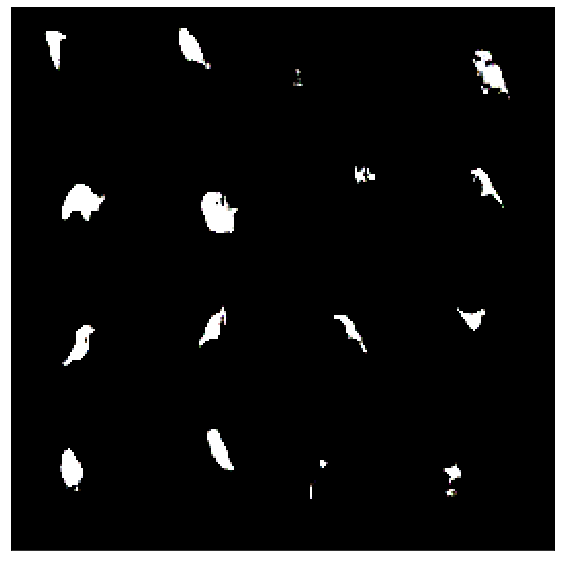

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


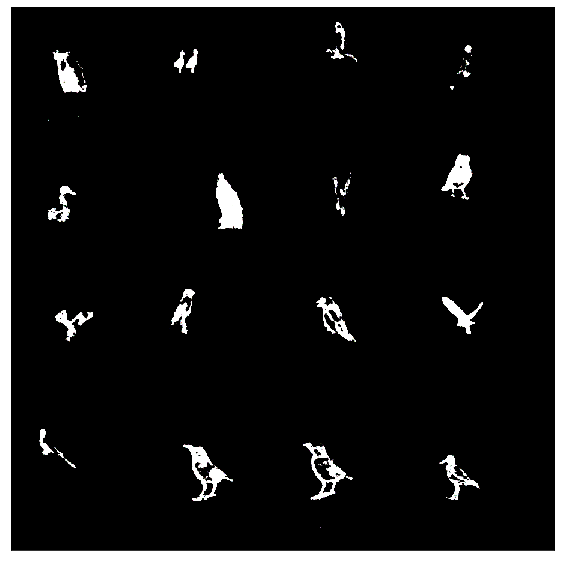

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 3


  0%|                                                                             | 3/17500 [00:14<48:31:42,  9.98s/it]

Train Epoch: 3 [0/280000 (0%)]	Loss: 0.030494
IOU : 0.0536041259765625


  0%|▏                                                                              | 53/17500 [00:17<20:35, 14.12it/s]

Train Epoch: 3 [200/280000 (0%)]	Loss: 0.026410
IOU : 0.0434417724609375


  1%|▍                                                                             | 103/17500 [00:21<20:05, 14.43it/s]

Train Epoch: 3 [400/280000 (1%)]	Loss: 0.032422
IOU : 0.0516357421875


  1%|▋                                                                             | 153/17500 [00:24<19:41, 14.68it/s]

Train Epoch: 3 [600/280000 (1%)]	Loss: 0.026710
IOU : 0.0517730712890625


  1%|▉                                                                             | 203/17500 [00:28<20:46, 13.88it/s]

Train Epoch: 3 [800/280000 (1%)]	Loss: 0.031511
IOU : 0.0570831298828125


  1%|█▏                                                                            | 253/17500 [00:31<19:06, 15.04it/s]

Train Epoch: 3 [1000/280000 (1%)]	Loss: 0.030237
IOU : 0.0482177734375


  2%|█▎                                                                            | 303/17500 [00:35<23:04, 12.42it/s]

Train Epoch: 3 [1200/280000 (2%)]	Loss: 0.026587
IOU : 0.056060791015625


  2%|█▌                                                                            | 351/17500 [00:39<34:13,  8.35it/s]

Train Epoch: 3 [1400/280000 (2%)]	Loss: 0.026590
IOU : 0.0475921630859375


  2%|█▊                                                                            | 401/17500 [00:45<41:19,  6.90it/s]

Train Epoch: 3 [1600/280000 (2%)]	Loss: 0.028349
IOU : 0.050689697265625


  3%|██                                                                            | 451/17500 [00:52<41:14,  6.89it/s]

Train Epoch: 3 [1800/280000 (3%)]	Loss: 0.031480
IOU : 0.055877685546875


  3%|██▏                                                                           | 501/17500 [00:58<40:50,  6.94it/s]

Train Epoch: 3 [2000/280000 (3%)]	Loss: 0.025495
IOU : 0.052520751953125


  3%|██▍                                                                           | 551/17500 [01:04<40:44,  6.93it/s]

Train Epoch: 3 [2200/280000 (3%)]	Loss: 0.038798
IOU : 0.0511474609375


  3%|██▋                                                                           | 603/17500 [01:08<19:23, 14.53it/s]

Train Epoch: 3 [2400/280000 (3%)]	Loss: 0.024895
IOU : 0.0490570068359375


  4%|██▉                                                                           | 654/17500 [01:12<20:39, 13.59it/s]

Train Epoch: 3 [2600/280000 (4%)]	Loss: 0.036054
IOU : 0.051422119140625


  4%|███▏                                                                          | 702/17500 [01:15<18:35, 15.06it/s]

Train Epoch: 3 [2800/280000 (4%)]	Loss: 0.027476
IOU : 0.0565185546875


  4%|███▎                                                                          | 751/17500 [01:20<40:18,  6.93it/s]

Train Epoch: 3 [3000/280000 (4%)]	Loss: 0.025374
IOU : 0.0504913330078125


  5%|███▌                                                                          | 801/17500 [01:27<40:23,  6.89it/s]

Train Epoch: 3 [3200/280000 (5%)]	Loss: 0.027012
IOU : 0.0457916259765625


  5%|███▊                                                                          | 851/17500 [01:33<40:02,  6.93it/s]

Train Epoch: 3 [3400/280000 (5%)]	Loss: 0.028436
IOU : 0.0608673095703125


  5%|████                                                                          | 904/17500 [01:39<21:25, 12.91it/s]

Train Epoch: 3 [3600/280000 (5%)]	Loss: 0.031673
IOU : 0.0524444580078125


  5%|████▏                                                                         | 952/17500 [01:42<19:19, 14.27it/s]

Train Epoch: 3 [3800/280000 (5%)]	Loss: 0.027238
IOU : 0.056488037109375


  6%|████▎                                                                      | 1001/17500 [01:48<1:12:28,  3.79it/s]

Train Epoch: 3 [4000/280000 (6%)]	Loss: 0.036040
IOU : 0.0492706298828125


  6%|████▋                                                                        | 1054/17500 [01:54<16:28, 16.63it/s]

Train Epoch: 3 [4200/280000 (6%)]	Loss: 0.022334
IOU : 0.0449371337890625


  6%|████▊                                                                        | 1104/17500 [01:58<18:07, 15.08it/s]

Train Epoch: 3 [4400/280000 (6%)]	Loss: 0.045072
IOU : 0.0621337890625


  7%|█████                                                                        | 1152/17500 [02:01<19:27, 14.00it/s]

Train Epoch: 3 [4600/280000 (7%)]	Loss: 0.033496
IOU : 0.048797607421875


  7%|█████▎                                                                       | 1203/17500 [02:10<22:42, 11.97it/s]

Train Epoch: 3 [4800/280000 (7%)]	Loss: 0.045190
IOU : 0.0511627197265625


  7%|█████▌                                                                       | 1253/17500 [02:14<20:18, 13.33it/s]

Train Epoch: 3 [5000/280000 (7%)]	Loss: 0.024420
IOU : 0.0554046630859375


  7%|█████▋                                                                       | 1303/17500 [02:17<19:08, 14.10it/s]

Train Epoch: 3 [5200/280000 (7%)]	Loss: 0.027744
IOU : 0.050628662109375


  8%|█████▉                                                                       | 1353/17500 [02:21<18:05, 14.88it/s]

Train Epoch: 3 [5400/280000 (8%)]	Loss: 0.039872
IOU : 0.0522918701171875


  8%|██████                                                                     | 1401/17500 [02:30<1:11:47,  3.74it/s]

Train Epoch: 3 [5600/280000 (8%)]	Loss: 0.030836
IOU : 0.0535125732421875


  8%|██████▍                                                                      | 1453/17500 [02:36<17:12, 15.54it/s]

Train Epoch: 3 [5800/280000 (8%)]	Loss: 0.024352
IOU : 0.0555419921875


  9%|██████▌                                                                      | 1503/17500 [02:39<21:24, 12.45it/s]

Train Epoch: 3 [6000/280000 (9%)]	Loss: 0.032630
IOU : 0.05078125


  9%|██████▊                                                                      | 1553/17500 [02:43<19:48, 13.42it/s]

Train Epoch: 3 [6200/280000 (9%)]	Loss: 0.036466
IOU : 0.0526275634765625


  9%|███████                                                                      | 1603/17500 [02:46<19:57, 13.28it/s]

Train Epoch: 3 [6400/280000 (9%)]	Loss: 0.025992
IOU : 0.0548095703125


  9%|███████▎                                                                     | 1653/17500 [02:53<34:20,  7.69it/s]

Train Epoch: 3 [6600/280000 (9%)]	Loss: 0.023516
IOU : 0.047698974609375


 10%|███████▍                                                                     | 1701/17500 [02:59<38:10,  6.90it/s]

Train Epoch: 3 [6800/280000 (10%)]	Loss: 0.027866
IOU : 0.0524139404296875


 10%|███████▋                                                                     | 1751/17500 [03:05<38:02,  6.90it/s]

Train Epoch: 3 [7000/280000 (10%)]	Loss: 0.024176
IOU : 0.0464019775390625


 10%|███████▉                                                                     | 1803/17500 [03:09<17:36, 14.86it/s]

Train Epoch: 3 [7200/280000 (10%)]	Loss: 0.037467
IOU : 0.057159423828125


 11%|████████▏                                                                    | 1853/17500 [03:13<17:29, 14.91it/s]

Train Epoch: 3 [7400/280000 (11%)]	Loss: 0.031409
IOU : 0.050384521484375


 11%|████████▎                                                                    | 1903/17500 [03:17<19:13, 13.52it/s]

Train Epoch: 3 [7600/280000 (11%)]	Loss: 0.028068
IOU : 0.0509033203125


 11%|████████▌                                                                    | 1951/17500 [03:21<36:59,  7.01it/s]

Train Epoch: 3 [7800/280000 (11%)]	Loss: 0.036368
IOU : 0.051971435546875


 11%|████████▊                                                                    | 2001/17500 [03:27<37:19,  6.92it/s]

Train Epoch: 3 [8000/280000 (11%)]	Loss: 0.030535
IOU : 0.05242919921875


 12%|█████████                                                                    | 2051/17500 [03:33<37:13,  6.92it/s]

Train Epoch: 3 [8200/280000 (12%)]	Loss: 0.028087
IOU : 0.0534210205078125


 12%|█████████▏                                                                   | 2101/17500 [03:39<37:10,  6.90it/s]

Train Epoch: 3 [8400/280000 (12%)]	Loss: 0.023209
IOU : 0.05010986328125


 12%|█████████▍                                                                   | 2153/17500 [03:43<17:27, 14.66it/s]

Train Epoch: 3 [8600/280000 (12%)]	Loss: 0.028230
IOU : 0.0516815185546875


 13%|█████████▋                                                                   | 2201/17500 [03:48<58:55,  4.33it/s]

Train Epoch: 3 [8800/280000 (13%)]	Loss: 0.027439
IOU : 0.0592803955078125


 13%|█████████▉                                                                   | 2253/17500 [03:55<23:13, 10.94it/s]

Train Epoch: 3 [9000/280000 (13%)]	Loss: 0.027992
IOU : 0.0563201904296875


 13%|██████████▏                                                                  | 2303/17500 [03:59<16:20, 15.49it/s]

Train Epoch: 3 [9200/280000 (13%)]	Loss: 0.021657
IOU : 0.049530029296875


 13%|██████████▎                                                                  | 2353/17500 [04:02<18:45, 13.46it/s]

Train Epoch: 3 [9400/280000 (13%)]	Loss: 0.029760
IOU : 0.051910400390625


 14%|██████████▌                                                                  | 2403/17500 [04:06<18:43, 13.43it/s]

Train Epoch: 3 [9600/280000 (14%)]	Loss: 0.027898
IOU : 0.05548095703125


 14%|██████████▊                                                                  | 2451/17500 [04:11<36:22,  6.90it/s]

Train Epoch: 3 [9800/280000 (14%)]	Loss: 0.042374
IOU : 0.0627899169921875


 14%|███████████                                                                  | 2501/17500 [04:17<36:23,  6.87it/s]

Train Epoch: 3 [10000/280000 (14%)]	Loss: 0.033888
IOU : 0.066558837890625


 15%|███████████▏                                                                 | 2551/17500 [04:23<36:23,  6.85it/s]

Train Epoch: 3 [10200/280000 (15%)]	Loss: 0.036907
IOU : 0.0515899658203125


 15%|███████████▍                                                                 | 2604/17500 [04:28<16:34, 14.97it/s]

Train Epoch: 3 [10400/280000 (15%)]	Loss: 0.038553
IOU : 0.062469482421875


 15%|███████████▋                                                                 | 2652/17500 [04:31<18:14, 13.57it/s]

Train Epoch: 3 [10600/280000 (15%)]	Loss: 0.027372
IOU : 0.0535125732421875


 15%|███████████▉                                                                 | 2702/17500 [04:35<18:57, 13.01it/s]

Train Epoch: 3 [10800/280000 (15%)]	Loss: 0.037728
IOU : 0.057586669921875


 16%|████████████                                                                 | 2751/17500 [04:40<57:19,  4.29it/s]

Train Epoch: 3 [11000/280000 (16%)]	Loss: 0.027023
IOU : 0.0522308349609375


 16%|████████████▎                                                                | 2801/17500 [04:49<35:41,  6.87it/s]

Train Epoch: 3 [11200/280000 (16%)]	Loss: 0.030506
IOU : 0.0475006103515625


 16%|████████████▌                                                                | 2853/17500 [04:53<15:39, 15.59it/s]

Train Epoch: 3 [11400/280000 (16%)]	Loss: 0.031068
IOU : 0.052093505859375


 17%|████████████▊                                                                | 2902/17500 [04:57<17:08, 14.19it/s]

Train Epoch: 3 [11600/280000 (17%)]	Loss: 0.037475
IOU : 0.057281494140625


 17%|████████████▉                                                                | 2951/17500 [05:02<34:59,  6.93it/s]

Train Epoch: 3 [11800/280000 (17%)]	Loss: 0.025703
IOU : 0.0493927001953125


 17%|█████████████▏                                                               | 3001/17500 [05:08<34:52,  6.93it/s]

Train Epoch: 3 [12000/280000 (17%)]	Loss: 0.033442
IOU : 0.0569305419921875


 17%|█████████████▍                                                               | 3051/17500 [05:14<34:43,  6.94it/s]

Train Epoch: 3 [12200/280000 (17%)]	Loss: 0.028936
IOU : 0.054534912109375


 18%|█████████████▋                                                               | 3101/17500 [05:21<34:38,  6.93it/s]

Train Epoch: 3 [12400/280000 (18%)]	Loss: 0.028989
IOU : 0.050750732421875


 18%|█████████████▊                                                               | 3153/17500 [05:26<16:16, 14.70it/s]

Train Epoch: 3 [12600/280000 (18%)]	Loss: 0.030806
IOU : 0.0535736083984375


 18%|██████████████                                                               | 3203/17500 [05:29<16:20, 14.58it/s]

Train Epoch: 3 [12800/280000 (18%)]	Loss: 0.031734
IOU : 0.0584716796875


 19%|██████████████▎                                                              | 3253/17500 [05:33<15:40, 15.14it/s]

Train Epoch: 3 [13000/280000 (19%)]	Loss: 0.028692
IOU : 0.0505523681640625


 19%|██████████████▌                                                              | 3303/17500 [05:37<16:33, 14.29it/s]

Train Epoch: 3 [13200/280000 (19%)]	Loss: 0.024266
IOU : 0.0473480224609375


 19%|██████████████▎                                                            | 3351/17500 [05:44<1:03:25,  3.72it/s]

Train Epoch: 3 [13400/280000 (19%)]	Loss: 0.031129
IOU : 0.049407958984375


 19%|██████████████▉                                                              | 3404/17500 [05:50<13:30, 17.39it/s]

Train Epoch: 3 [13600/280000 (19%)]	Loss: 0.020046
IOU : 0.0448150634765625


 20%|███████████████▏                                                             | 3452/17500 [05:54<17:45, 13.18it/s]

Train Epoch: 3 [13800/280000 (20%)]	Loss: 0.023876
IOU : 0.049530029296875


 20%|███████████████                                                            | 3501/17500 [05:59<1:02:15,  3.75it/s]

Train Epoch: 3 [14000/280000 (20%)]	Loss: 0.031002
IOU : 0.0596771240234375


 20%|███████████████▋                                                             | 3552/17500 [06:06<16:48, 13.82it/s]

Train Epoch: 3 [14200/280000 (20%)]	Loss: 0.031280
IOU : 0.054473876953125


 21%|███████████████▊                                                             | 3602/17500 [06:10<17:47, 13.02it/s]

Train Epoch: 3 [14400/280000 (21%)]	Loss: 0.026439
IOU : 0.0441436767578125


 21%|████████████████                                                             | 3652/17500 [06:13<15:52, 14.54it/s]

Train Epoch: 3 [14600/280000 (21%)]	Loss: 0.029056
IOU : 0.05377197265625


 21%|████████████████▎                                                            | 3702/17500 [06:17<16:25, 14.00it/s]

Train Epoch: 3 [14800/280000 (21%)]	Loss: 0.027821
IOU : 0.0550537109375


 21%|████████████████                                                           | 3751/17500 [06:26<1:01:42,  3.71it/s]

Train Epoch: 3 [15000/280000 (21%)]	Loss: 0.025312
IOU : 0.0541229248046875


 22%|████████████████▋                                                            | 3803/17500 [06:31<14:40, 15.55it/s]

Train Epoch: 3 [15200/280000 (22%)]	Loss: 0.025667
IOU : 0.055511474609375


 22%|████████████████▉                                                            | 3854/17500 [06:35<17:51, 12.74it/s]

Train Epoch: 3 [15400/280000 (22%)]	Loss: 0.023737
IOU : 0.05035400390625


 22%|████████████████▋                                                          | 3901/17500 [06:41<1:00:49,  3.73it/s]

Train Epoch: 3 [15600/280000 (22%)]	Loss: 0.025750
IOU : 0.05206298828125


 23%|█████████████████▍                                                           | 3952/17500 [06:47<14:39, 15.40it/s]

Train Epoch: 3 [15800/280000 (23%)]	Loss: 0.031461
IOU : 0.054534912109375


 23%|█████████████████▌                                                           | 4002/17500 [06:51<15:31, 14.49it/s]

Train Epoch: 3 [16000/280000 (23%)]	Loss: 0.031740
IOU : 0.0579376220703125


 23%|█████████████████▊                                                           | 4052/17500 [06:54<18:10, 12.33it/s]

Train Epoch: 3 [16200/280000 (23%)]	Loss: 0.027368
IOU : 0.05853271484375


 23%|██████████████████                                                           | 4102/17500 [06:58<18:46, 11.90it/s]

Train Epoch: 3 [16400/280000 (23%)]	Loss: 0.024288
IOU : 0.053741455078125


 24%|██████████████████▎                                                          | 4153/17500 [07:08<35:25,  6.28it/s]

Train Epoch: 3 [16600/280000 (24%)]	Loss: 0.035556
IOU : 0.0552978515625


 24%|██████████████████▍                                                          | 4203/17500 [07:11<15:05, 14.68it/s]

Train Epoch: 3 [16800/280000 (24%)]	Loss: 0.026054
IOU : 0.05059814453125


 24%|██████████████████▋                                                          | 4251/17500 [07:16<54:03,  4.08it/s]

Train Epoch: 3 [17000/280000 (24%)]	Loss: 0.040678
IOU : 0.0530242919921875


 25%|██████████████████▉                                                          | 4302/17500 [07:24<15:14, 14.42it/s]

Train Epoch: 3 [17200/280000 (25%)]	Loss: 0.031458
IOU : 0.0580596923828125


 25%|███████████████████▏                                                         | 4351/17500 [07:27<15:52, 13.80it/s]

Train Epoch: 3 [17400/280000 (25%)]	Loss: 0.026202
IOU : 0.042755126953125


 25%|███████████████████▎                                                         | 4403/17500 [07:31<15:53, 13.73it/s]

Train Epoch: 3 [17600/280000 (25%)]	Loss: 0.022561
IOU : 0.054595947265625


 25%|███████████████████▌                                                         | 4451/17500 [07:40<58:43,  3.70it/s]

Train Epoch: 3 [17800/280000 (25%)]	Loss: 0.020994
IOU : 0.04229736328125


 26%|███████████████████▊                                                         | 4504/17500 [07:44<13:04, 16.57it/s]

Train Epoch: 3 [18000/280000 (26%)]	Loss: 0.024069
IOU : 0.048187255859375


 26%|████████████████████                                                         | 4552/17500 [07:48<15:24, 14.00it/s]

Train Epoch: 3 [18200/280000 (26%)]	Loss: 0.021025
IOU : 0.052093505859375


 26%|████████████████████▎                                                        | 4604/17500 [07:52<15:01, 14.30it/s]

Train Epoch: 3 [18400/280000 (26%)]	Loss: 0.031360
IOU : 0.05035400390625


 27%|████████████████████▍                                                        | 4651/17500 [07:57<55:33,  3.85it/s]

Train Epoch: 3 [18600/280000 (27%)]	Loss: 0.026626
IOU : 0.0450439453125


 27%|████████████████████▋                                                        | 4703/17500 [08:06<15:46, 13.52it/s]

Train Epoch: 3 [18800/280000 (27%)]	Loss: 0.032146
IOU : 0.05059814453125


 27%|████████████████████▉                                                        | 4753/17500 [08:09<15:50, 13.41it/s]

Train Epoch: 3 [19000/280000 (27%)]	Loss: 0.024893
IOU : 0.0518951416015625


 27%|█████████████████████▏                                                       | 4803/17500 [08:13<14:51, 14.23it/s]

Train Epoch: 3 [19200/280000 (27%)]	Loss: 0.032478
IOU : 0.0551300048828125


 28%|█████████████████████▎                                                       | 4853/17500 [08:17<15:48, 13.34it/s]

Train Epoch: 3 [19400/280000 (28%)]	Loss: 0.034402
IOU : 0.056793212890625


 28%|█████████████████████▌                                                       | 4903/17500 [08:21<16:00, 13.12it/s]

Train Epoch: 3 [19600/280000 (28%)]	Loss: 0.029655
IOU : 0.0502166748046875


 28%|█████████████████████▊                                                       | 4951/17500 [08:26<30:25,  6.87it/s]

Train Epoch: 3 [19800/280000 (28%)]	Loss: 0.022580
IOU : 0.055328369140625


 29%|██████████████████████                                                       | 5001/17500 [08:33<30:14,  6.89it/s]

Train Epoch: 3 [20000/280000 (29%)]	Loss: 0.021614
IOU : 0.0500640869140625


 29%|██████████████████████▏                                                      | 5051/17500 [08:39<30:04,  6.90it/s]

Train Epoch: 3 [20200/280000 (29%)]	Loss: 0.036271
IOU : 0.0677947998046875


 29%|██████████████████████▍                                                      | 5101/17500 [08:45<29:53,  6.91it/s]

Train Epoch: 3 [20400/280000 (29%)]	Loss: 0.029743
IOU : 0.0638427734375


 29%|██████████████████████▋                                                      | 5154/17500 [08:50<12:31, 16.43it/s]

Train Epoch: 3 [20600/280000 (29%)]	Loss: 0.023379
IOU : 0.0494842529296875


 30%|██████████████████████▉                                                      | 5202/17500 [08:54<14:10, 14.46it/s]

Train Epoch: 3 [20800/280000 (30%)]	Loss: 0.024372
IOU : 0.049041748046875


 30%|███████████████████████                                                      | 5251/17500 [08:58<29:05,  7.02it/s]

Train Epoch: 3 [21000/280000 (30%)]	Loss: 0.028105
IOU : 0.0535888671875


 30%|███████████████████████▎                                                     | 5301/17500 [09:04<29:18,  6.94it/s]

Train Epoch: 3 [21200/280000 (30%)]	Loss: 0.030948
IOU : 0.0557708740234375


 31%|███████████████████████▌                                                     | 5351/17500 [09:10<29:27,  6.87it/s]

Train Epoch: 3 [21400/280000 (31%)]	Loss: 0.028568
IOU : 0.052886962890625


 31%|███████████████████████▊                                                     | 5402/17500 [09:14<14:06, 14.29it/s]

Train Epoch: 3 [21600/280000 (31%)]	Loss: 0.048462
IOU : 0.050933837890625


 31%|███████████████████████▉                                                     | 5452/17500 [09:18<13:54, 14.44it/s]

Train Epoch: 3 [21800/280000 (31%)]	Loss: 0.030295
IOU : 0.0506439208984375


 31%|████████████████████████▏                                                    | 5504/17500 [09:22<14:00, 14.28it/s]

Train Epoch: 3 [22000/280000 (31%)]	Loss: 0.026217
IOU : 0.0532073974609375


 32%|████████████████████████▍                                                    | 5551/17500 [09:30<53:27,  3.73it/s]

Train Epoch: 3 [22200/280000 (32%)]	Loss: 0.029304
IOU : 0.058929443359375


 32%|████████████████████████▋                                                    | 5601/17500 [09:37<28:40,  6.91it/s]

Train Epoch: 3 [22400/280000 (32%)]	Loss: 0.030814
IOU : 0.054443359375


 32%|████████████████████████▊                                                    | 5652/17500 [09:42<15:12, 12.99it/s]

Train Epoch: 3 [22600/280000 (32%)]	Loss: 0.028179
IOU : 0.0504150390625


 33%|█████████████████████████                                                    | 5702/17500 [09:46<13:21, 14.72it/s]

Train Epoch: 3 [22800/280000 (33%)]	Loss: 0.034170
IOU : 0.056396484375


 33%|█████████████████████████▎                                                   | 5752/17500 [09:49<13:56, 14.05it/s]

Train Epoch: 3 [23000/280000 (33%)]	Loss: 0.036030
IOU : 0.0564117431640625


 33%|█████████████████████████▌                                                   | 5802/17500 [09:53<14:18, 13.63it/s]

Train Epoch: 3 [23200/280000 (33%)]	Loss: 0.034018
IOU : 0.05828857421875


 33%|█████████████████████████▋                                                   | 5851/17500 [10:00<52:06,  3.73it/s]

Train Epoch: 3 [23400/280000 (33%)]	Loss: 0.034572
IOU : 0.0539703369140625


 34%|█████████████████████████▉                                                   | 5902/17500 [10:08<18:11, 10.62it/s]

Train Epoch: 3 [23600/280000 (34%)]	Loss: 0.020526
IOU : 0.049072265625


 34%|██████████████████████████▏                                                  | 5954/17500 [10:11<12:32, 15.35it/s]

Train Epoch: 3 [23800/280000 (34%)]	Loss: 0.030953
IOU : 0.0596923828125


 34%|██████████████████████████▍                                                  | 6002/17500 [10:15<11:54, 16.10it/s]

Train Epoch: 3 [24000/280000 (34%)]	Loss: 0.028836
IOU : 0.0529327392578125


 35%|██████████████████████████▌                                                  | 6051/17500 [10:22<47:10,  4.04it/s]

Train Epoch: 3 [24200/280000 (35%)]	Loss: 0.030496
IOU : 0.04327392578125


 35%|██████████████████████████▊                                                  | 6104/17500 [10:26<14:47, 12.84it/s]

Train Epoch: 3 [24400/280000 (35%)]	Loss: 0.035036
IOU : 0.051513671875


 35%|███████████████████████████                                                  | 6152/17500 [10:30<14:10, 13.35it/s]

Train Epoch: 3 [24600/280000 (35%)]	Loss: 0.027311
IOU : 0.04425048828125


 35%|███████████████████████████▎                                                 | 6202/17500 [10:34<14:17, 13.18it/s]

Train Epoch: 3 [24800/280000 (35%)]	Loss: 0.027780
IOU : 0.056915283203125


 36%|███████████████████████████▌                                                 | 6251/17500 [10:39<27:09,  6.90it/s]

Train Epoch: 3 [25000/280000 (36%)]	Loss: 0.028236
IOU : 0.054656982421875


 36%|███████████████████████████▋                                                 | 6301/17500 [10:45<27:03,  6.90it/s]

Train Epoch: 3 [25200/280000 (36%)]	Loss: 0.030574
IOU : 0.045928955078125


 36%|███████████████████████████▉                                                 | 6351/17500 [10:52<26:45,  6.94it/s]

Train Epoch: 3 [25400/280000 (36%)]	Loss: 0.037322
IOU : 0.059295654296875


 37%|████████████████████████████▏                                                | 6401/17500 [10:58<26:46,  6.91it/s]

Train Epoch: 3 [25600/280000 (37%)]	Loss: 0.022574
IOU : 0.0518951416015625


 37%|████████████████████████████▍                                                | 6451/17500 [11:04<26:36,  6.92it/s]

Train Epoch: 3 [25800/280000 (37%)]	Loss: 0.038825
IOU : 0.056915283203125


 37%|████████████████████████████▌                                                | 6503/17500 [11:09<12:03, 15.19it/s]

Train Epoch: 3 [26000/280000 (37%)]	Loss: 0.028761
IOU : 0.0612030029296875


 37%|████████████████████████████▊                                                | 6552/17500 [11:12<13:49, 13.19it/s]

Train Epoch: 3 [26200/280000 (37%)]	Loss: 0.028735
IOU : 0.0467071533203125


 38%|█████████████████████████████                                                | 6602/17500 [11:16<12:58, 14.00it/s]

Train Epoch: 3 [26400/280000 (38%)]	Loss: 0.026584
IOU : 0.0553741455078125


 38%|█████████████████████████████▎                                               | 6653/17500 [11:21<23:26,  7.71it/s]

Train Epoch: 3 [26600/280000 (38%)]	Loss: 0.027892
IOU : 0.047027587890625


 38%|█████████████████████████████▍                                               | 6701/17500 [11:27<26:12,  6.87it/s]

Train Epoch: 3 [26800/280000 (38%)]	Loss: 0.027599
IOU : 0.0569000244140625


 39%|█████████████████████████████▋                                               | 6751/17500 [11:34<25:59,  6.89it/s]

Train Epoch: 3 [27000/280000 (39%)]	Loss: 0.036260
IOU : 0.0587615966796875


 39%|█████████████████████████████▉                                               | 6803/17500 [11:40<22:17,  8.00it/s]

Train Epoch: 3 [27200/280000 (39%)]	Loss: 0.029961
IOU : 0.0497283935546875


 39%|██████████████████████████████▏                                              | 6852/17500 [11:44<12:53, 13.76it/s]

Train Epoch: 3 [27400/280000 (39%)]	Loss: 0.034231
IOU : 0.062103271484375


 39%|██████████████████████████████▎                                              | 6902/17500 [11:48<12:05, 14.61it/s]

Train Epoch: 3 [27600/280000 (39%)]	Loss: 0.048544
IOU : 0.0580291748046875


 40%|██████████████████████████████▌                                              | 6952/17500 [11:51<12:49, 13.71it/s]

Train Epoch: 3 [27800/280000 (40%)]	Loss: 0.026665
IOU : 0.04766845703125


 40%|██████████████████████████████▊                                              | 7002/17500 [11:55<12:25, 14.08it/s]

Train Epoch: 3 [28000/280000 (40%)]	Loss: 0.032718
IOU : 0.048614501953125


 40%|███████████████████████████████                                              | 7053/17500 [12:05<17:41,  9.84it/s]

Train Epoch: 3 [28200/280000 (40%)]	Loss: 0.041889
IOU : 0.0548248291015625


 41%|███████████████████████████████▎                                             | 7103/17500 [12:09<13:17, 13.03it/s]

Train Epoch: 3 [28400/280000 (41%)]	Loss: 0.025731
IOU : 0.0566253662109375


 41%|███████████████████████████████▍                                             | 7153/17500 [12:13<12:27, 13.85it/s]

Train Epoch: 3 [28600/280000 (41%)]	Loss: 0.024607
IOU : 0.05364990234375


 41%|███████████████████████████████▋                                             | 7201/17500 [12:21<46:25,  3.70it/s]

Train Epoch: 3 [28800/280000 (41%)]	Loss: 0.029222
IOU : 0.05877685546875


 41%|███████████████████████████████▉                                             | 7252/17500 [12:25<10:57, 15.58it/s]

Train Epoch: 3 [29000/280000 (41%)]	Loss: 0.029813
IOU : 0.0504150390625


 42%|████████████████████████████████▏                                            | 7302/17500 [12:29<12:26, 13.66it/s]

Train Epoch: 3 [29200/280000 (42%)]	Loss: 0.032538
IOU : 0.0538787841796875


 42%|████████████████████████████████▎                                            | 7352/17500 [12:33<12:42, 13.31it/s]

Train Epoch: 3 [29400/280000 (42%)]	Loss: 0.022257
IOU : 0.04107666015625


 42%|████████████████████████████████▌                                            | 7402/17500 [12:37<17:37,  9.55it/s]

Train Epoch: 3 [29600/280000 (42%)]	Loss: 0.030990
IOU : 0.0554351806640625


 43%|████████████████████████████████▊                                            | 7451/17500 [12:43<24:23,  6.87it/s]

Train Epoch: 3 [29800/280000 (43%)]	Loss: 0.026601
IOU : 0.054473876953125


 43%|█████████████████████████████████                                            | 7503/17500 [12:50<21:48,  7.64it/s]

Train Epoch: 3 [30000/280000 (43%)]	Loss: 0.030939
IOU : 0.0519866943359375


 43%|█████████████████████████████████▏                                           | 7551/17500 [12:56<24:04,  6.89it/s]

Train Epoch: 3 [30200/280000 (43%)]	Loss: 0.028669
IOU : 0.047943115234375


 43%|█████████████████████████████████▍                                           | 7601/17500 [13:02<23:56,  6.89it/s]

Train Epoch: 3 [30400/280000 (43%)]	Loss: 0.036120
IOU : 0.0525054931640625


 44%|█████████████████████████████████▋                                           | 7653/17500 [13:09<21:14,  7.73it/s]

Train Epoch: 3 [30600/280000 (44%)]	Loss: 0.036105
IOU : 0.0490264892578125


 44%|█████████████████████████████████▉                                           | 7702/17500 [13:13<09:30, 17.19it/s]

Train Epoch: 3 [30800/280000 (44%)]	Loss: 0.022140
IOU : 0.04290771484375


 44%|██████████████████████████████████                                           | 7752/17500 [13:17<12:31, 12.97it/s]

Train Epoch: 3 [31000/280000 (44%)]	Loss: 0.037809
IOU : 0.053863525390625


 45%|██████████████████████████████████▎                                          | 7802/17500 [13:21<12:24, 13.03it/s]

Train Epoch: 3 [31200/280000 (45%)]	Loss: 0.030413
IOU : 0.062164306640625


 45%|██████████████████████████████████▌                                          | 7852/17500 [13:25<13:01, 12.35it/s]

Train Epoch: 3 [31400/280000 (45%)]	Loss: 0.031999
IOU : 0.0510406494140625


 45%|██████████████████████████████████▊                                          | 7901/17500 [13:29<22:56,  6.97it/s]

Train Epoch: 3 [31600/280000 (45%)]	Loss: 0.025755
IOU : 0.051971435546875


 45%|██████████████████████████████████▉                                          | 7951/17500 [13:35<23:09,  6.87it/s]

Train Epoch: 3 [31800/280000 (45%)]	Loss: 0.024100
IOU : 0.0572509765625


 46%|███████████████████████████████████▏                                         | 8001/17500 [13:42<22:59,  6.89it/s]

Train Epoch: 3 [32000/280000 (46%)]	Loss: 0.026579
IOU : 0.055633544921875


 46%|███████████████████████████████████▍                                         | 8051/17500 [13:48<23:00,  6.84it/s]

Train Epoch: 3 [32200/280000 (46%)]	Loss: 0.027096
IOU : 0.053619384765625


 46%|███████████████████████████████████▋                                         | 8101/17500 [13:54<22:47,  6.87it/s]

Train Epoch: 3 [32400/280000 (46%)]	Loss: 0.034462
IOU : 0.058502197265625


 47%|███████████████████████████████████▊                                         | 8153/17500 [13:58<10:36, 14.69it/s]

Train Epoch: 3 [32600/280000 (47%)]	Loss: 0.040143
IOU : 0.05572509765625


 47%|████████████████████████████████████                                         | 8203/17500 [14:02<10:19, 15.00it/s]

Train Epoch: 3 [32800/280000 (47%)]	Loss: 0.029040
IOU : 0.054412841796875


 47%|████████████████████████████████████▎                                        | 8253/17500 [14:06<11:48, 13.06it/s]

Train Epoch: 3 [33000/280000 (47%)]	Loss: 0.025396
IOU : 0.044525146484375


 47%|████████████████████████████████████▌                                        | 8303/17500 [14:09<11:14, 13.63it/s]

Train Epoch: 3 [33200/280000 (47%)]	Loss: 0.022654
IOU : 0.0474700927734375


 48%|████████████████████████████████████▋                                        | 8351/17500 [14:14<37:30,  4.07it/s]

Train Epoch: 3 [33400/280000 (48%)]	Loss: 0.038976
IOU : 0.0545654296875


 48%|████████████████████████████████████▉                                        | 8403/17500 [14:24<12:08, 12.48it/s]

Train Epoch: 3 [33600/280000 (48%)]	Loss: 0.034409
IOU : 0.0599822998046875


 48%|█████████████████████████████████████▏                                       | 8453/17500 [14:28<10:54, 13.83it/s]

Train Epoch: 3 [33800/280000 (48%)]	Loss: 0.044296
IOU : 0.04388427734375


 49%|█████████████████████████████████████▍                                       | 8503/17500 [14:32<11:20, 13.22it/s]

Train Epoch: 3 [34000/280000 (49%)]	Loss: 0.036616
IOU : 0.058502197265625


 49%|█████████████████████████████████████▌                                       | 8551/17500 [14:39<40:15,  3.71it/s]

Train Epoch: 3 [34200/280000 (49%)]	Loss: 0.025881
IOU : 0.055084228515625


 49%|█████████████████████████████████████▊                                       | 8604/17500 [14:46<09:43, 15.25it/s]

Train Epoch: 3 [34400/280000 (49%)]	Loss: 0.037901
IOU : 0.0552978515625


 49%|██████████████████████████████████████                                       | 8653/17500 [14:49<11:08, 13.24it/s]

Train Epoch: 3 [34600/280000 (49%)]	Loss: 0.030207
IOU : 0.053375244140625


 50%|██████████████████████████████████████▎                                      | 8703/17500 [14:53<11:20, 12.93it/s]

Train Epoch: 3 [34800/280000 (50%)]	Loss: 0.041753
IOU : 0.0624542236328125


 50%|██████████████████████████████████████▌                                      | 8753/17500 [14:57<11:03, 13.18it/s]

Train Epoch: 3 [35000/280000 (50%)]	Loss: 0.028396
IOU : 0.056121826171875


 50%|██████████████████████████████████████▋                                      | 8801/17500 [15:06<35:38,  4.07it/s]

Train Epoch: 3 [35200/280000 (50%)]	Loss: 0.027738
IOU : 0.050567626953125


 51%|██████████████████████████████████████▉                                      | 8852/17500 [15:10<11:31, 12.51it/s]

Train Epoch: 3 [35400/280000 (51%)]	Loss: 0.027738
IOU : 0.0487823486328125


 51%|███████████████████████████████████████▏                                     | 8902/17500 [15:13<10:17, 13.92it/s]

Train Epoch: 3 [35600/280000 (51%)]	Loss: 0.033610
IOU : 0.044281005859375


 51%|███████████████████████████████████████▍                                     | 8951/17500 [15:20<38:11,  3.73it/s]

Train Epoch: 3 [35800/280000 (51%)]	Loss: 0.025608
IOU : 0.05120849609375


 51%|███████████████████████████████████████▌                                     | 9004/17500 [15:27<08:50, 16.00it/s]

Train Epoch: 3 [36000/280000 (51%)]	Loss: 0.029448
IOU : 0.0447540283203125


 52%|███████████████████████████████████████▊                                     | 9052/17500 [15:31<09:40, 14.55it/s]

Train Epoch: 3 [36200/280000 (52%)]	Loss: 0.025384
IOU : 0.052490234375


 52%|████████████████████████████████████████                                     | 9101/17500 [15:38<37:44,  3.71it/s]

Train Epoch: 3 [36400/280000 (52%)]	Loss: 0.031781
IOU : 0.0614013671875


 52%|████████████████████████████████████████▎                                    | 9152/17500 [15:44<09:52, 14.08it/s]

Train Epoch: 3 [36600/280000 (52%)]	Loss: 0.024529
IOU : 0.049041748046875


 53%|████████████████████████████████████████▍                                    | 9202/17500 [15:47<11:10, 12.38it/s]

Train Epoch: 3 [36800/280000 (53%)]	Loss: 0.031157
IOU : 0.0577545166015625


 53%|████████████████████████████████████████▋                                    | 9252/17500 [15:51<09:58, 13.78it/s]

Train Epoch: 3 [37000/280000 (53%)]	Loss: 0.028446
IOU : 0.0508575439453125


 53%|████████████████████████████████████████▉                                    | 9301/17500 [15:57<19:55,  6.86it/s]

Train Epoch: 3 [37200/280000 (53%)]	Loss: 0.027054
IOU : 0.05133056640625


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [16:03<19:43,  6.89it/s]

Train Epoch: 3 [37400/280000 (53%)]	Loss: 0.034356
IOU : 0.0479583740234375


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [16:09<19:35,  6.89it/s]

Train Epoch: 3 [37600/280000 (54%)]	Loss: 0.027715
IOU : 0.048675537109375


 54%|█████████████████████████████████████████▌                                   | 9452/17500 [16:14<09:10, 14.61it/s]

Train Epoch: 3 [37800/280000 (54%)]	Loss: 0.025099
IOU : 0.0508270263671875


 54%|█████████████████████████████████████████▊                                   | 9502/17500 [16:17<09:23, 14.20it/s]

Train Epoch: 3 [38000/280000 (54%)]	Loss: 0.040017
IOU : 0.0505828857421875


 55%|██████████████████████████████████████████                                   | 9552/17500 [16:21<10:57, 12.09it/s]

Train Epoch: 3 [38200/280000 (55%)]	Loss: 0.060534
IOU : 0.0532684326171875


 55%|██████████████████████████████████████████▎                                  | 9603/17500 [16:31<15:27,  8.51it/s]

Train Epoch: 3 [38400/280000 (55%)]	Loss: 0.032625
IOU : 0.0601806640625


 55%|██████████████████████████████████████████▍                                  | 9653/17500 [16:34<08:58, 14.56it/s]

Train Epoch: 3 [38600/280000 (55%)]	Loss: 0.028240
IOU : 0.05035400390625


 55%|██████████████████████████████████████████▋                                  | 9703/17500 [16:38<09:53, 13.14it/s]

Train Epoch: 3 [38800/280000 (55%)]	Loss: 0.026627
IOU : 0.0567169189453125


 56%|██████████████████████████████████████████▉                                  | 9751/17500 [16:43<33:55,  3.81it/s]

Train Epoch: 3 [39000/280000 (56%)]	Loss: 0.044483
IOU : 0.048065185546875


 56%|███████████████████████████████████████████▏                                 | 9802/17500 [16:52<11:29, 11.16it/s]

Train Epoch: 3 [39200/280000 (56%)]	Loss: 0.025122
IOU : 0.0483856201171875


 56%|███████████████████████████████████████████▎                                 | 9854/17500 [16:56<08:45, 14.56it/s]

Train Epoch: 3 [39400/280000 (56%)]	Loss: 0.026208
IOU : 0.0524444580078125


 57%|███████████████████████████████████████████▌                                 | 9902/17500 [16:59<08:42, 14.53it/s]

Train Epoch: 3 [39600/280000 (57%)]	Loss: 0.041916
IOU : 0.059906005859375


 57%|███████████████████████████████████████████▊                                 | 9951/17500 [17:04<18:13,  6.91it/s]

Train Epoch: 3 [39800/280000 (57%)]	Loss: 0.036849
IOU : 0.0559539794921875


 57%|███████████████████████████████████████████▍                                | 10001/17500 [17:11<18:36,  6.72it/s]

Train Epoch: 3 [40000/280000 (57%)]	Loss: 0.034728
IOU : 0.0532379150390625


 57%|███████████████████████████████████████████▋                                | 10051/17500 [17:17<17:58,  6.91it/s]

Train Epoch: 3 [40200/280000 (57%)]	Loss: 0.043251
IOU : 0.0576324462890625


 58%|███████████████████████████████████████████▊                                | 10101/17500 [17:23<17:50,  6.91it/s]

Train Epoch: 3 [40400/280000 (58%)]	Loss: 0.028338
IOU : 0.058685302734375


 58%|████████████████████████████████████████████                                | 10151/17500 [17:30<17:44,  6.90it/s]

Train Epoch: 3 [40600/280000 (58%)]	Loss: 0.028730
IOU : 0.0600433349609375


 58%|████████████████████████████████████████████▎                               | 10203/17500 [17:34<08:41, 14.00it/s]

Train Epoch: 3 [40800/280000 (58%)]	Loss: 0.027142
IOU : 0.0535430908203125


 59%|████████████████████████████████████████████▌                               | 10253/17500 [17:37<08:52, 13.62it/s]

Train Epoch: 3 [41000/280000 (59%)]	Loss: 0.028389
IOU : 0.0525054931640625


 59%|████████████████████████████████████████████▋                               | 10303/17500 [17:41<08:44, 13.72it/s]

Train Epoch: 3 [41200/280000 (59%)]	Loss: 0.034199
IOU : 0.0562591552734375


 59%|████████████████████████████████████████████▉                               | 10351/17500 [17:47<32:04,  3.71it/s]

Train Epoch: 3 [41400/280000 (59%)]	Loss: 0.031982
IOU : 0.055023193359375


 59%|█████████████████████████████████████████████▏                              | 10403/17500 [17:55<15:25,  7.66it/s]

Train Epoch: 3 [41600/280000 (59%)]	Loss: 0.026165
IOU : 0.059295654296875


 60%|█████████████████████████████████████████████▍                              | 10453/17500 [18:01<10:12, 11.50it/s]

Train Epoch: 3 [41800/280000 (60%)]	Loss: 0.029060
IOU : 0.054718017578125


 60%|█████████████████████████████████████████████▌                              | 10503/17500 [18:05<09:28, 12.31it/s]

Train Epoch: 3 [42000/280000 (60%)]	Loss: 0.031948
IOU : 0.0621337890625


 60%|█████████████████████████████████████████████▊                              | 10553/17500 [18:09<08:37, 13.42it/s]

Train Epoch: 3 [42200/280000 (60%)]	Loss: 0.031532
IOU : 0.051788330078125


 61%|██████████████████████████████████████████████                              | 10603/17500 [18:13<09:20, 12.30it/s]

Train Epoch: 3 [42400/280000 (61%)]	Loss: 0.025014
IOU : 0.0508880615234375


 61%|██████████████████████████████████████████████▎                             | 10651/17500 [18:17<16:34,  6.89it/s]

Train Epoch: 3 [42600/280000 (61%)]	Loss: 0.019377
IOU : 0.0444793701171875


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [18:24<16:39,  6.80it/s]

Train Epoch: 3 [42800/280000 (61%)]	Loss: 0.030412
IOU : 0.0494537353515625


 61%|██████████████████████████████████████████████▋                             | 10751/17500 [18:30<16:23,  6.86it/s]

Train Epoch: 3 [43000/280000 (61%)]	Loss: 0.041480
IOU : 0.0598297119140625


 62%|██████████████████████████████████████████████▉                             | 10803/17500 [18:36<11:33,  9.65it/s]

Train Epoch: 3 [43200/280000 (62%)]	Loss: 0.028362
IOU : 0.0509796142578125


 62%|███████████████████████████████████████████████▏                            | 10853/17500 [18:40<07:45, 14.28it/s]

Train Epoch: 3 [43400/280000 (62%)]	Loss: 0.031551
IOU : 0.0513763427734375


 62%|███████████████████████████████████████████████▎                            | 10902/17500 [18:44<08:37, 12.75it/s]

Train Epoch: 3 [43600/280000 (62%)]	Loss: 0.028933
IOU : 0.0512542724609375


 63%|███████████████████████████████████████████████▌                            | 10952/17500 [18:47<08:24, 12.98it/s]

Train Epoch: 3 [43800/280000 (63%)]	Loss: 0.031682
IOU : 0.053680419921875


 63%|███████████████████████████████████████████████▊                            | 11002/17500 [18:51<07:51, 13.77it/s]

Train Epoch: 3 [44000/280000 (63%)]	Loss: 0.028456
IOU : 0.046875


 63%|███████████████████████████████████████████████▉                            | 11051/17500 [18:56<15:30,  6.93it/s]

Train Epoch: 3 [44200/280000 (63%)]	Loss: 0.026500
IOU : 0.047637939453125


 63%|████████████████████████████████████████████████▏                           | 11101/17500 [19:02<15:38,  6.82it/s]

Train Epoch: 3 [44400/280000 (63%)]	Loss: 0.041190
IOU : 0.05242919921875


 64%|████████████████████████████████████████████████▍                           | 11151/17500 [19:08<15:18,  6.91it/s]

Train Epoch: 3 [44600/280000 (64%)]	Loss: 0.031810
IOU : 0.0602264404296875


 64%|████████████████████████████████████████████████▋                           | 11201/17500 [19:15<15:26,  6.80it/s]

Train Epoch: 3 [44800/280000 (64%)]	Loss: 0.029634
IOU : 0.05426025390625


 64%|████████████████████████████████████████████████▊                           | 11251/17500 [19:21<15:03,  6.92it/s]

Train Epoch: 3 [45000/280000 (64%)]	Loss: 0.026744
IOU : 0.052276611328125


 65%|█████████████████████████████████████████████████                           | 11301/17500 [19:27<14:57,  6.91it/s]

Train Epoch: 3 [45200/280000 (65%)]	Loss: 0.030327
IOU : 0.047821044921875


 65%|█████████████████████████████████████████████████▎                          | 11353/17500 [19:34<09:12, 11.12it/s]

Train Epoch: 3 [45400/280000 (65%)]	Loss: 0.039250
IOU : 0.05255126953125


 65%|█████████████████████████████████████████████████▌                          | 11403/17500 [19:37<06:58, 14.57it/s]

Train Epoch: 3 [45600/280000 (65%)]	Loss: 0.023802
IOU : 0.0511016845703125


 65%|█████████████████████████████████████████████████▋                          | 11453/17500 [19:41<07:09, 14.08it/s]

Train Epoch: 3 [45800/280000 (65%)]	Loss: 0.036639
IOU : 0.0597991943359375


 66%|█████████████████████████████████████████████████▉                          | 11501/17500 [19:46<14:30,  6.89it/s]

Train Epoch: 3 [46000/280000 (66%)]	Loss: 0.022563
IOU : 0.045196533203125


 66%|██████████████████████████████████████████████████▏                         | 11551/17500 [19:52<14:23,  6.89it/s]

Train Epoch: 3 [46200/280000 (66%)]	Loss: 0.027377
IOU : 0.05303955078125


 66%|██████████████████████████████████████████████████▍                         | 11601/17500 [19:59<14:15,  6.89it/s]

Train Epoch: 3 [46400/280000 (66%)]	Loss: 0.029757
IOU : 0.0492095947265625


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [20:05<14:11,  6.87it/s]

Train Epoch: 3 [46600/280000 (67%)]	Loss: 0.034482
IOU : 0.0522003173828125


 67%|██████████████████████████████████████████████████▊                         | 11704/17500 [20:10<07:05, 13.63it/s]

Train Epoch: 3 [46800/280000 (67%)]	Loss: 0.025580
IOU : 0.0538330078125


 67%|███████████████████████████████████████████████████                         | 11752/17500 [20:13<06:54, 13.88it/s]

Train Epoch: 3 [47000/280000 (67%)]	Loss: 0.038898
IOU : 0.0504302978515625


 67%|███████████████████████████████████████████████████▎                        | 11802/17500 [20:17<06:32, 14.53it/s]

Train Epoch: 3 [47200/280000 (67%)]	Loss: 0.028093
IOU : 0.049560546875


 68%|███████████████████████████████████████████████████▍                        | 11852/17500 [20:21<07:17, 12.92it/s]

Train Epoch: 3 [47400/280000 (68%)]	Loss: 0.040066
IOU : 0.0578155517578125


 68%|███████████████████████████████████████████████████▋                        | 11901/17500 [20:25<12:56,  7.21it/s]

Train Epoch: 3 [47600/280000 (68%)]	Loss: 0.023996
IOU : 0.048919677734375


 68%|███████████████████████████████████████████████████▉                        | 11951/17500 [20:31<13:21,  6.93it/s]

Train Epoch: 3 [47800/280000 (68%)]	Loss: 0.028520
IOU : 0.0516204833984375


 69%|████████████████████████████████████████████████████                        | 12001/17500 [20:38<13:25,  6.83it/s]

Train Epoch: 3 [48000/280000 (69%)]	Loss: 0.027014
IOU : 0.0532989501953125


 69%|████████████████████████████████████████████████████▎                       | 12051/17500 [20:44<13:15,  6.85it/s]

Train Epoch: 3 [48200/280000 (69%)]	Loss: 0.026233
IOU : 0.048370361328125


 69%|████████████████████████████████████████████████████▌                       | 12101/17500 [20:50<13:09,  6.84it/s]

Train Epoch: 3 [48400/280000 (69%)]	Loss: 0.030212
IOU : 0.060943603515625


 69%|████████████████████████████████████████████████████▊                       | 12152/17500 [20:56<06:34, 13.56it/s]

Train Epoch: 3 [48600/280000 (69%)]	Loss: 0.027321
IOU : 0.053985595703125


 70%|████████████████████████████████████████████████████▉                       | 12203/17500 [20:59<06:22, 13.84it/s]

Train Epoch: 3 [48800/280000 (70%)]	Loss: 0.033733
IOU : 0.05645751953125


 70%|█████████████████████████████████████████████████████▏                      | 12253/17500 [21:03<06:17, 13.91it/s]

Train Epoch: 3 [49000/280000 (70%)]	Loss: 0.029158
IOU : 0.0551605224609375


 70%|█████████████████████████████████████████████████████▍                      | 12301/17500 [21:09<12:41,  6.83it/s]

Train Epoch: 3 [49200/280000 (70%)]	Loss: 0.030788
IOU : 0.05078125


 71%|█████████████████████████████████████████████████████▋                      | 12351/17500 [21:15<12:36,  6.80it/s]

Train Epoch: 3 [49400/280000 (71%)]	Loss: 0.030431
IOU : 0.050689697265625


 71%|█████████████████████████████████████████████████████▊                      | 12401/17500 [21:22<12:18,  6.90it/s]

Train Epoch: 3 [49600/280000 (71%)]	Loss: 0.035282
IOU : 0.055908203125


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [21:28<12:09,  6.92it/s]

Train Epoch: 3 [49800/280000 (71%)]	Loss: 0.027894
IOU : 0.0482025146484375


 71%|██████████████████████████████████████████████████████▎                     | 12504/17500 [21:32<05:38, 14.75it/s]

Train Epoch: 3 [50000/280000 (71%)]	Loss: 0.034231
IOU : 0.0503387451171875


 72%|██████████████████████████████████████████████████████▌                     | 12552/17500 [21:36<06:02, 13.65it/s]

Train Epoch: 3 [50200/280000 (72%)]	Loss: 0.027942
IOU : 0.053741455078125


 72%|██████████████████████████████████████████████████████▋                     | 12604/17500 [21:40<06:00, 13.59it/s]

Train Epoch: 3 [50400/280000 (72%)]	Loss: 0.030721
IOU : 0.0599212646484375


 72%|██████████████████████████████████████████████████████▉                     | 12651/17500 [21:45<21:29,  3.76it/s]

Train Epoch: 3 [50600/280000 (72%)]	Loss: 0.027637
IOU : 0.05206298828125


 73%|███████████████████████████████████████████████████████▏                    | 12703/17500 [21:54<05:55, 13.48it/s]

Train Epoch: 3 [50800/280000 (73%)]	Loss: 0.030982
IOU : 0.051910400390625


 73%|███████████████████████████████████████████████████████▍                    | 12753/17500 [21:58<05:34, 14.18it/s]

Train Epoch: 3 [51000/280000 (73%)]	Loss: 0.019857
IOU : 0.0479278564453125


 73%|███████████████████████████████████████████████████████▌                    | 12803/17500 [22:01<06:20, 12.35it/s]

Train Epoch: 3 [51200/280000 (73%)]	Loss: 0.033934
IOU : 0.0575714111328125


 73%|███████████████████████████████████████████████████████▊                    | 12851/17500 [22:07<19:58,  3.88it/s]

Train Epoch: 3 [51400/280000 (73%)]	Loss: 0.044417
IOU : 0.0657958984375


 74%|████████████████████████████████████████████████████████                    | 12904/17500 [22:16<05:27, 14.05it/s]

Train Epoch: 3 [51600/280000 (74%)]	Loss: 0.027616
IOU : 0.0550537109375


 74%|████████████████████████████████████████████████████████▏                   | 12952/17500 [22:19<05:48, 13.06it/s]

Train Epoch: 3 [51800/280000 (74%)]	Loss: 0.030223
IOU : 0.050384521484375


 74%|████████████████████████████████████████████████████████▍                   | 13002/17500 [22:23<05:23, 13.91it/s]

Train Epoch: 3 [52000/280000 (74%)]	Loss: 0.030206
IOU : 0.0494384765625


 75%|████████████████████████████████████████████████████████▋                   | 13053/17500 [22:32<10:38,  6.97it/s]

Train Epoch: 3 [52200/280000 (75%)]	Loss: 0.040787
IOU : 0.057647705078125


 75%|████████████████████████████████████████████████████████▉                   | 13104/17500 [22:36<04:58, 14.71it/s]

Train Epoch: 3 [52400/280000 (75%)]	Loss: 0.027553
IOU : 0.059173583984375


 75%|█████████████████████████████████████████████████████████                   | 13152/17500 [22:39<05:06, 14.18it/s]

Train Epoch: 3 [52600/280000 (75%)]	Loss: 0.033507
IOU : 0.056732177734375


 75%|█████████████████████████████████████████████████████████▎                  | 13202/17500 [22:43<05:10, 13.85it/s]

Train Epoch: 3 [52800/280000 (75%)]	Loss: 0.031373
IOU : 0.0504913330078125


 76%|█████████████████████████████████████████████████████████▌                  | 13251/17500 [22:49<10:19,  6.86it/s]

Train Epoch: 3 [53000/280000 (76%)]	Loss: 0.060186
IOU : 0.05328369140625


 76%|█████████████████████████████████████████████████████████▊                  | 13301/17500 [22:55<10:09,  6.89it/s]

Train Epoch: 3 [53200/280000 (76%)]	Loss: 0.031257
IOU : 0.054931640625


 76%|█████████████████████████████████████████████████████████▉                  | 13351/17500 [23:01<09:59,  6.93it/s]

Train Epoch: 3 [53400/280000 (76%)]	Loss: 0.024606
IOU : 0.05120849609375


 77%|██████████████████████████████████████████████████████████▏                 | 13401/17500 [23:08<09:54,  6.89it/s]

Train Epoch: 3 [53600/280000 (77%)]	Loss: 0.031767
IOU : 0.0536956787109375


 77%|██████████████████████████████████████████████████████████▍                 | 13451/17500 [23:14<09:48,  6.88it/s]

Train Epoch: 3 [53800/280000 (77%)]	Loss: 0.027990
IOU : 0.054168701171875


 77%|██████████████████████████████████████████████████████████▋                 | 13503/17500 [23:19<04:38, 14.38it/s]

Train Epoch: 3 [54000/280000 (77%)]	Loss: 0.022568
IOU : 0.0517120361328125


 77%|██████████████████████████████████████████████████████████▊                 | 13553/17500 [23:23<04:17, 15.34it/s]

Train Epoch: 3 [54200/280000 (77%)]	Loss: 0.034901
IOU : 0.0516815185546875


 78%|███████████████████████████████████████████████████████████                 | 13603/17500 [23:26<04:36, 14.10it/s]

Train Epoch: 3 [54400/280000 (78%)]	Loss: 0.024428
IOU : 0.0480194091796875


 78%|███████████████████████████████████████████████████████████▎                | 13653/17500 [23:30<05:11, 12.36it/s]

Train Epoch: 3 [54600/280000 (78%)]	Loss: 0.027684
IOU : 0.05511474609375


 78%|███████████████████████████████████████████████████████████▌                | 13701/17500 [23:35<09:13,  6.86it/s]

Train Epoch: 3 [54800/280000 (78%)]	Loss: 0.030989
IOU : 0.0582733154296875


 79%|███████████████████████████████████████████████████████████▋                | 13751/17500 [23:42<09:03,  6.90it/s]

Train Epoch: 3 [55000/280000 (79%)]	Loss: 0.028500
IOU : 0.05206298828125


 79%|███████████████████████████████████████████████████████████▉                | 13801/17500 [23:48<08:56,  6.89it/s]

Train Epoch: 3 [55200/280000 (79%)]	Loss: 0.038926
IOU : 0.050506591796875


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [23:54<08:47,  6.91it/s]

Train Epoch: 3 [55400/280000 (79%)]	Loss: 0.030960
IOU : 0.0514373779296875


 79%|████████████████████████████████████████████████████████████▍               | 13903/17500 [24:01<07:04,  8.48it/s]

Train Epoch: 3 [55600/280000 (79%)]	Loss: 0.031937
IOU : 0.05712890625


 80%|████████████████████████████████████████████████████████████▌               | 13953/17500 [24:04<03:52, 15.23it/s]

Train Epoch: 3 [55800/280000 (80%)]	Loss: 0.036827
IOU : 0.06005859375


 80%|████████████████████████████████████████████████████████████▊               | 14001/17500 [24:10<15:27,  3.77it/s]

Train Epoch: 3 [56000/280000 (80%)]	Loss: 0.022007
IOU : 0.0474853515625


 80%|█████████████████████████████████████████████████████████████               | 14052/17500 [24:16<03:55, 14.63it/s]

Train Epoch: 3 [56200/280000 (80%)]	Loss: 0.034939
IOU : 0.050079345703125


 81%|█████████████████████████████████████████████████████████████▏              | 14102/17500 [24:20<04:28, 12.67it/s]

Train Epoch: 3 [56400/280000 (81%)]	Loss: 0.040536
IOU : 0.0576171875


 81%|█████████████████████████████████████████████████████████████▍              | 14153/17500 [24:24<04:13, 13.21it/s]

Train Epoch: 3 [56600/280000 (81%)]	Loss: 0.030920
IOU : 0.053436279296875


 81%|█████████████████████████████████████████████████████████████▋              | 14201/17500 [24:30<13:08,  4.19it/s]

Train Epoch: 3 [56800/280000 (81%)]	Loss: 0.030496
IOU : 0.0554046630859375


 81%|█████████████████████████████████████████████████████████████▉              | 14252/17500 [24:37<04:00, 13.50it/s]

Train Epoch: 3 [57000/280000 (81%)]	Loss: 0.035073
IOU : 0.051116943359375


 82%|██████████████████████████████████████████████████████████████              | 14302/17500 [24:41<04:14, 12.57it/s]

Train Epoch: 3 [57200/280000 (82%)]	Loss: 0.023488
IOU : 0.0499114990234375


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [24:45<07:55,  6.63it/s]

Train Epoch: 3 [57400/280000 (82%)]	Loss: 0.030520
IOU : 0.058868408203125


 82%|██████████████████████████████████████████████████████████████▌             | 14401/17500 [24:51<07:31,  6.86it/s]

Train Epoch: 3 [57600/280000 (82%)]	Loss: 0.023136
IOU : 0.053314208984375


 83%|██████████████████████████████████████████████████████████████▊             | 14451/17500 [24:58<07:20,  6.92it/s]

Train Epoch: 3 [57800/280000 (83%)]	Loss: 0.027832
IOU : 0.0512542724609375


 83%|██████████████████████████████████████████████████████████████▉             | 14501/17500 [25:05<07:14,  6.90it/s]

Train Epoch: 3 [58000/280000 (83%)]	Loss: 0.035726
IOU : 0.05963134765625


 83%|███████████████████████████████████████████████████████████████▏            | 14553/17500 [25:09<03:27, 14.24it/s]

Train Epoch: 3 [58200/280000 (83%)]	Loss: 0.027187
IOU : 0.045989990234375


 83%|███████████████████████████████████████████████████████████████▍            | 14603/17500 [25:13<03:16, 14.76it/s]

Train Epoch: 3 [58400/280000 (83%)]	Loss: 0.027662
IOU : 0.053802490234375


 84%|███████████████████████████████████████████████████████████████▋            | 14651/17500 [25:17<06:05,  7.80it/s]

Train Epoch: 3 [58600/280000 (84%)]	Loss: 0.037674
IOU : 0.0589447021484375


 84%|███████████████████████████████████████████████████████████████▊            | 14703/17500 [25:28<09:14,  5.05it/s]

Train Epoch: 3 [58800/280000 (84%)]	Loss: 0.034862
IOU : 0.047698974609375


 84%|████████████████████████████████████████████████████████████████            | 14752/17500 [25:32<03:29, 13.14it/s]

Train Epoch: 3 [59000/280000 (84%)]	Loss: 0.028973
IOU : 0.053375244140625


 85%|████████████████████████████████████████████████████████████████▎           | 14802/17500 [25:35<03:04, 14.61it/s]

Train Epoch: 3 [59200/280000 (85%)]	Loss: 0.034221
IOU : 0.0536651611328125


 85%|████████████████████████████████████████████████████████████████▌           | 14852/17500 [25:39<03:24, 12.93it/s]

Train Epoch: 3 [59400/280000 (85%)]	Loss: 0.024904
IOU : 0.0528411865234375


 85%|████████████████████████████████████████████████████████████████▋           | 14901/17500 [25:48<11:38,  3.72it/s]

Train Epoch: 3 [59600/280000 (85%)]	Loss: 0.025720
IOU : 0.0494384765625


 85%|████████████████████████████████████████████████████████████████▉           | 14953/17500 [25:54<03:09, 13.45it/s]

Train Epoch: 3 [59800/280000 (85%)]	Loss: 0.031602
IOU : 0.0523681640625


 86%|█████████████████████████████████████████████████████████████████▏          | 15003/17500 [25:58<02:56, 14.14it/s]

Train Epoch: 3 [60000/280000 (86%)]	Loss: 0.029716
IOU : 0.05426025390625


 86%|█████████████████████████████████████████████████████████████████▎          | 15053/17500 [26:01<03:08, 13.00it/s]

Train Epoch: 3 [60200/280000 (86%)]	Loss: 0.031625
IOU : 0.0577850341796875


 86%|█████████████████████████████████████████████████████████████████▌          | 15101/17500 [26:09<10:48,  3.70it/s]

Train Epoch: 3 [60400/280000 (86%)]	Loss: 0.022673
IOU : 0.047576904296875


 87%|█████████████████████████████████████████████████████████████████▊          | 15154/17500 [26:17<02:25, 16.10it/s]

Train Epoch: 3 [60600/280000 (87%)]	Loss: 0.028180
IOU : 0.04937744140625


 87%|██████████████████████████████████████████████████████████████████          | 15203/17500 [26:20<02:42, 14.12it/s]

Train Epoch: 3 [60800/280000 (87%)]	Loss: 0.036949
IOU : 0.0626373291015625


 87%|██████████████████████████████████████████████████████████████████▏         | 15253/17500 [26:24<02:46, 13.53it/s]

Train Epoch: 3 [61000/280000 (87%)]	Loss: 0.036082
IOU : 0.0450592041015625


 87%|██████████████████████████████████████████████████████████████████▍         | 15301/17500 [26:29<05:20,  6.85it/s]

Train Epoch: 3 [61200/280000 (87%)]	Loss: 0.029808
IOU : 0.0485687255859375


 88%|██████████████████████████████████████████████████████████████████▋         | 15351/17500 [26:35<05:12,  6.87it/s]

Train Epoch: 3 [61400/280000 (88%)]	Loss: 0.028752
IOU : 0.051177978515625


 88%|██████████████████████████████████████████████████████████████████▉         | 15401/17500 [26:41<05:05,  6.87it/s]

Train Epoch: 3 [61600/280000 (88%)]	Loss: 0.026531
IOU : 0.0478363037109375


 88%|███████████████████████████████████████████████████████████████████         | 15451/17500 [26:47<04:57,  6.88it/s]

Train Epoch: 3 [61800/280000 (88%)]	Loss: 0.027798
IOU : 0.0499267578125


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [26:54<04:49,  6.92it/s]

Train Epoch: 3 [62000/280000 (89%)]	Loss: 0.034418
IOU : 0.059600830078125


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [27:00<04:42,  6.89it/s]

Train Epoch: 3 [62200/280000 (89%)]	Loss: 0.033233
IOU : 0.0600738525390625


 89%|███████████████████████████████████████████████████████████████████▊        | 15602/17500 [27:06<02:51, 11.04it/s]

Train Epoch: 3 [62400/280000 (89%)]	Loss: 0.028571
IOU : 0.05181884765625


 89%|███████████████████████████████████████████████████████████████████▉        | 15652/17500 [27:10<02:17, 13.41it/s]

Train Epoch: 3 [62600/280000 (89%)]	Loss: 0.028544
IOU : 0.0627288818359375


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [27:13<02:35, 11.60it/s]

Train Epoch: 3 [62800/280000 (90%)]	Loss: 0.030099
IOU : 0.056640625


 90%|████████████████████████████████████████████████████████████████████▍       | 15752/17500 [27:17<02:24, 12.07it/s]

Train Epoch: 3 [63000/280000 (90%)]	Loss: 0.029155
IOU : 0.056640625


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [27:25<07:38,  3.70it/s]

Train Epoch: 3 [63200/280000 (90%)]	Loss: 0.035198
IOU : 0.0536956787109375


 91%|████████████████████████████████████████████████████████████████████▊       | 15852/17500 [27:32<01:47, 15.36it/s]

Train Epoch: 3 [63400/280000 (91%)]	Loss: 0.027974
IOU : 0.0472869873046875


 91%|█████████████████████████████████████████████████████████████████████       | 15903/17500 [27:36<02:09, 12.34it/s]

Train Epoch: 3 [63600/280000 (91%)]	Loss: 0.027217
IOU : 0.0523834228515625


 91%|█████████████████████████████████████████████████████████████████████▎      | 15953/17500 [27:40<01:46, 14.55it/s]

Train Epoch: 3 [63800/280000 (91%)]	Loss: 0.032471
IOU : 0.047027587890625


 91%|█████████████████████████████████████████████████████████████████████▍      | 16003/17500 [27:44<01:58, 12.67it/s]

Train Epoch: 3 [64000/280000 (91%)]	Loss: 0.030442
IOU : 0.0538787841796875


 92%|█████████████████████████████████████████████████████████████████████▋      | 16051/17500 [27:48<02:47,  8.63it/s]

Train Epoch: 3 [64200/280000 (92%)]	Loss: 0.046762
IOU : 0.062652587890625


 92%|█████████████████████████████████████████████████████████████████████▉      | 16101/17500 [27:54<03:22,  6.90it/s]

Train Epoch: 3 [64400/280000 (92%)]	Loss: 0.032847
IOU : 0.0524139404296875


 92%|██████████████████████████████████████████████████████████████████████▏     | 16151/17500 [28:00<03:15,  6.91it/s]

Train Epoch: 3 [64600/280000 (92%)]	Loss: 0.031804
IOU : 0.0484619140625


 93%|██████████████████████████████████████████████████████████████████████▎     | 16201/17500 [28:07<03:08,  6.91it/s]

Train Epoch: 3 [64800/280000 (93%)]	Loss: 0.023984
IOU : 0.0567779541015625


 93%|██████████████████████████████████████████████████████████████████████▌     | 16251/17500 [28:13<03:01,  6.86it/s]

Train Epoch: 3 [65000/280000 (93%)]	Loss: 0.032593
IOU : 0.0510711669921875


 93%|██████████████████████████████████████████████████████████████████████▊     | 16303/17500 [28:19<02:01,  9.83it/s]

Train Epoch: 3 [65200/280000 (93%)]	Loss: 0.045857
IOU : 0.0546112060546875


 93%|███████████████████████████████████████████████████████████████████████     | 16353/17500 [28:23<01:20, 14.23it/s]

Train Epoch: 3 [65400/280000 (93%)]	Loss: 0.026172
IOU : 0.0542755126953125


 94%|███████████████████████████████████████████████████████████████████████▏    | 16403/17500 [28:26<01:19, 13.74it/s]

Train Epoch: 3 [65600/280000 (94%)]	Loss: 0.028308
IOU : 0.0563507080078125


 94%|███████████████████████████████████████████████████████████████████████▍    | 16451/17500 [28:34<04:42,  3.72it/s]

Train Epoch: 3 [65800/280000 (94%)]	Loss: 0.025862
IOU : 0.053863525390625


 94%|███████████████████████████████████████████████████████████████████████▋    | 16503/17500 [28:39<01:13, 13.61it/s]

Train Epoch: 3 [66000/280000 (94%)]	Loss: 0.033063
IOU : 0.052825927734375


 95%|███████████████████████████████████████████████████████████████████████▉    | 16553/17500 [28:43<01:15, 12.55it/s]

Train Epoch: 3 [66200/280000 (95%)]	Loss: 0.043333
IOU : 0.0655975341796875


 95%|████████████████████████████████████████████████████████████████████████    | 16601/17500 [28:48<03:29,  4.29it/s]

Train Epoch: 3 [66400/280000 (95%)]	Loss: 0.026170
IOU : 0.0486602783203125


 95%|████████████████████████████████████████████████████████████████████████▎   | 16652/17500 [28:57<01:11, 11.93it/s]

Train Epoch: 3 [66600/280000 (95%)]	Loss: 0.025400
IOU : 0.0551300048828125


 95%|████████████████████████████████████████████████████████████████████████▌   | 16703/17500 [29:00<00:53, 14.94it/s]

Train Epoch: 3 [66800/280000 (95%)]	Loss: 0.029982
IOU : 0.0488128662109375


 96%|████████████████████████████████████████████████████████████████████████▊   | 16753/17500 [29:04<00:54, 13.78it/s]

Train Epoch: 3 [67000/280000 (96%)]	Loss: 0.037362
IOU : 0.0558013916015625


 96%|████████████████████████████████████████████████████████████████████████▉   | 16803/17500 [29:14<02:05,  5.54it/s]

Train Epoch: 3 [67200/280000 (96%)]	Loss: 0.029941
IOU : 0.0558929443359375


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16852/17500 [29:18<00:48, 13.25it/s]

Train Epoch: 3 [67400/280000 (96%)]	Loss: 0.033828
IOU : 0.04693603515625


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16902/17500 [29:21<00:39, 15.33it/s]

Train Epoch: 3 [67600/280000 (97%)]	Loss: 0.048746
IOU : 0.0545806884765625


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16952/17500 [29:25<00:41, 13.18it/s]

Train Epoch: 3 [67800/280000 (97%)]	Loss: 0.028159
IOU : 0.050628662109375


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17002/17500 [29:29<00:52,  9.43it/s]

Train Epoch: 3 [68000/280000 (97%)]	Loss: 0.025798
IOU : 0.04888916015625


 97%|██████████████████████████████████████████████████████████████████████████  | 17051/17500 [29:36<01:05,  6.83it/s]

Train Epoch: 3 [68200/280000 (97%)]	Loss: 0.028880
IOU : 0.05120849609375


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17101/17500 [29:42<00:58,  6.85it/s]

Train Epoch: 3 [68400/280000 (98%)]	Loss: 0.030889
IOU : 0.0509490966796875


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17151/17500 [29:48<00:50,  6.88it/s]

Train Epoch: 3 [68600/280000 (98%)]	Loss: 0.058608
IOU : 0.06829833984375


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17201/17500 [29:54<00:43,  6.87it/s]

Train Epoch: 3 [68800/280000 (98%)]	Loss: 0.026723
IOU : 0.051788330078125


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17251/17500 [30:01<00:36,  6.84it/s]

Train Epoch: 3 [69000/280000 (99%)]	Loss: 0.026154
IOU : 0.053802490234375


 99%|███████████████████████████████████████████████████████████████████████████▏| 17301/17500 [30:07<00:28,  6.87it/s]

Train Epoch: 3 [69200/280000 (99%)]	Loss: 0.024506
IOU : 0.04901123046875


 99%|███████████████████████████████████████████████████████████████████████████▎| 17352/17500 [30:12<00:10, 13.68it/s]

Train Epoch: 3 [69400/280000 (99%)]	Loss: 0.025763
IOU : 0.0477142333984375


 99%|███████████████████████████████████████████████████████████████████████████▌| 17402/17500 [30:15<00:07, 13.99it/s]

Train Epoch: 3 [69600/280000 (99%)]	Loss: 0.032052
IOU : 0.0535430908203125


100%|███████████████████████████████████████████████████████████████████████████▊| 17452/17500 [30:19<00:03, 13.64it/s]

Train Epoch: 3 [69800/280000 (100%)]	Loss: 0.029968
IOU : 0.054901123046875


  0%|                                                                              | 1/7500 [00:14<30:38:14, 14.71s/it]

Test Epoch: 3 [0/120000 (0%)]	Loss: 0.048509
IOU : 0.047166474011479595


  1%|█                                                                              | 101/7500 [00:48<55:40,  2.21it/s]

Test Epoch: 3 [400/120000 (1%)]	Loss: 0.056630
IOU : 0.043418417171556124


  3%|██                                                                             | 201/7500 [01:31<30:42,  3.96it/s]

Test Epoch: 3 [800/120000 (3%)]	Loss: 0.042223
IOU : 0.04157615194515306


  4%|███▏                                                                           | 301/7500 [02:14<53:10,  2.26it/s]

Test Epoch: 3 [1200/120000 (4%)]	Loss: 0.037102
IOU : 0.03474021444515306


  5%|████▏                                                                          | 401/7500 [02:59<53:04,  2.23it/s]

Test Epoch: 3 [1600/120000 (5%)]	Loss: 0.051649
IOU : 0.03953957071109694


  7%|█████▎                                                                         | 501/7500 [03:43<51:45,  2.25it/s]

Test Epoch: 3 [2000/120000 (7%)]	Loss: 0.036851
IOU : 0.04344955755739796


  8%|██████▎                                                                        | 601/7500 [04:22<58:02,  1.98it/s]

Test Epoch: 3 [2400/120000 (8%)]	Loss: 0.040642
IOU : 0.04117755500637755


  9%|███████▏                                                                     | 701/7500 [05:05<1:29:53,  1.26it/s]

Test Epoch: 3 [2800/120000 (9%)]	Loss: 0.053015
IOU : 0.03838737643494898


 11%|████████▍                                                                      | 801/7500 [05:41<49:54,  2.24it/s]

Test Epoch: 3 [3200/120000 (11%)]	Loss: 0.054706
IOU : 0.05182756696428571


 12%|█████████▍                                                                     | 901/7500 [06:23<27:25,  4.01it/s]

Test Epoch: 3 [3600/120000 (12%)]	Loss: 0.046499
IOU : 0.039699009486607144


 13%|██████████▍                                                                   | 1001/7500 [07:00<27:17,  3.97it/s]

Test Epoch: 3 [4000/120000 (13%)]	Loss: 0.061353
IOU : 0.04335613639987245


 15%|███████████▍                                                                  | 1101/7500 [07:44<47:21,  2.25it/s]

Test Epoch: 3 [4400/120000 (15%)]	Loss: 0.059137
IOU : 0.037550322863520405


 16%|████████████▍                                                                 | 1201/7500 [08:23<23:41,  4.43it/s]

Test Epoch: 3 [4800/120000 (16%)]	Loss: 0.073971
IOU : 0.04985451211734694


 17%|█████████████▌                                                                | 1301/7500 [09:03<25:48,  4.00it/s]

Test Epoch: 3 [5200/120000 (17%)]	Loss: 0.033231
IOU : 0.033933055644132654


 19%|██████████████▌                                                               | 1401/7500 [09:40<44:30,  2.28it/s]

Test Epoch: 3 [5600/120000 (19%)]	Loss: 0.059515
IOU : 0.03956821986607143


 20%|███████████████▌                                                              | 1501/7500 [10:19<51:01,  1.96it/s]

Test Epoch: 3 [6000/120000 (20%)]	Loss: 0.042370
IOU : 0.048780791613520405


 21%|████████████████▋                                                             | 1601/7500 [11:01<22:51,  4.30it/s]

Test Epoch: 3 [6400/120000 (21%)]	Loss: 0.049370
IOU : 0.0420158541932398


 23%|█████████████████▋                                                            | 1701/7500 [11:40<23:41,  4.08it/s]

Test Epoch: 3 [6800/120000 (23%)]	Loss: 0.055197
IOU : 0.04577263034119898


 24%|██████████████████▋                                                           | 1801/7500 [12:19<43:15,  2.20it/s]

Test Epoch: 3 [7200/120000 (24%)]	Loss: 0.042183
IOU : 0.04549610371492347


 25%|███████████████████▎                                                        | 1901/7500 [12:59<1:14:25,  1.25it/s]

Test Epoch: 3 [7600/120000 (25%)]	Loss: 0.065154
IOU : 0.04286287268813776


 27%|████████████████████▊                                                         | 2001/7500 [13:39<20:10,  4.54it/s]

Test Epoch: 3 [8000/120000 (27%)]	Loss: 0.035886
IOU : 0.03412737165178571


 28%|█████████████████████▊                                                        | 2101/7500 [14:20<40:51,  2.20it/s]

Test Epoch: 3 [8400/120000 (28%)]	Loss: 0.051157
IOU : 0.03797881457270408


 29%|██████████████████████▉                                                       | 2201/7500 [15:00<24:26,  3.61it/s]

Test Epoch: 3 [8800/120000 (29%)]	Loss: 0.047087
IOU : 0.04278439891581633


 31%|███████████████████████▉                                                      | 2301/7500 [15:41<37:05,  2.34it/s]

Test Epoch: 3 [9200/120000 (31%)]	Loss: 0.056108
IOU : 0.05172418088329082


 32%|████████████████████████▉                                                     | 2401/7500 [16:20<33:04,  2.57it/s]

Test Epoch: 3 [9600/120000 (32%)]	Loss: 0.066902
IOU : 0.044032505580357144


 33%|██████████████████████████                                                    | 2501/7500 [16:56<37:49,  2.20it/s]

Test Epoch: 3 [10000/120000 (33%)]	Loss: 0.035958
IOU : 0.030871332908163265


 35%|███████████████████████████                                                   | 2601/7500 [17:34<48:48,  1.67it/s]

Test Epoch: 3 [10400/120000 (35%)]	Loss: 0.032056
IOU : 0.03288300183354592


 36%|████████████████████████████                                                  | 2701/7500 [18:11<16:40,  4.80it/s]

Test Epoch: 3 [10800/120000 (36%)]	Loss: 0.069578
IOU : 0.04633813974808673


 37%|█████████████████████████████▏                                                | 2801/7500 [18:57<18:44,  4.18it/s]

Test Epoch: 3 [11200/120000 (37%)]	Loss: 0.065199
IOU : 0.04597192881058673


 39%|█████████████████████████████▍                                              | 2901/7500 [19:36<1:01:28,  1.25it/s]

Test Epoch: 3 [11600/120000 (39%)]	Loss: 0.064361
IOU : 0.05111133808992347


 40%|███████████████████████████████▏                                              | 3001/7500 [20:18<20:05,  3.73it/s]

Test Epoch: 3 [12000/120000 (40%)]	Loss: 0.053523
IOU : 0.04051115074936224


 41%|████████████████████████████████▎                                             | 3101/7500 [20:55<16:18,  4.50it/s]

Test Epoch: 3 [12400/120000 (41%)]	Loss: 0.055113
IOU : 0.0417243801817602


 43%|█████████████████████████████████▎                                            | 3201/7500 [21:34<31:13,  2.30it/s]

Test Epoch: 3 [12800/120000 (43%)]	Loss: 0.048335
IOU : 0.043906698421556124


 44%|██████████████████████████████████▎                                           | 3301/7500 [22:19<31:15,  2.24it/s]

Test Epoch: 3 [13200/120000 (44%)]	Loss: 0.034496
IOU : 0.03891302614795918


 45%|███████████████████████████████████▎                                          | 3401/7500 [22:58<56:12,  1.22it/s]

Test Epoch: 3 [13600/120000 (45%)]	Loss: 0.048561
IOU : 0.03679174306441327


 47%|████████████████████████████████████▍                                         | 3501/7500 [23:33<47:18,  1.41it/s]

Test Epoch: 3 [14000/120000 (47%)]	Loss: 0.071093
IOU : 0.04659847337372449


 48%|█████████████████████████████████████▍                                        | 3601/7500 [24:16<15:31,  4.18it/s]

Test Epoch: 3 [14400/120000 (48%)]	Loss: 0.044126
IOU : 0.03875358737244898


 49%|██████████████████████████████████████▍                                       | 3701/7500 [24:56<28:04,  2.26it/s]

Test Epoch: 3 [14800/120000 (49%)]	Loss: 0.042792
IOU : 0.04767343949298469


 51%|███████████████████████████████████████▌                                      | 3801/7500 [25:35<15:35,  3.95it/s]

Test Epoch: 3 [15200/120000 (51%)]	Loss: 0.038069
IOU : 0.04011504504145408


 52%|████████████████████████████████████████▌                                     | 3901/7500 [26:13<24:59,  2.40it/s]

Test Epoch: 3 [15600/120000 (52%)]	Loss: 0.058949
IOU : 0.04110157246492347


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [26:57<18:14,  3.20it/s]

Test Epoch: 3 [16000/120000 (53%)]	Loss: 0.041607
IOU : 0.03861532405931122


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [27:35<44:34,  1.27it/s]

Test Epoch: 3 [16400/120000 (55%)]	Loss: 0.063451
IOU : 0.04967016103316327


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [28:14<14:09,  3.89it/s]

Test Epoch: 3 [16800/120000 (56%)]	Loss: 0.048678
IOU : 0.04126723931760204


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [28:57<23:37,  2.26it/s]

Test Epoch: 3 [17200/120000 (57%)]	Loss: 0.071862
IOU : 0.03988336057079082


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [29:35<12:58,  3.98it/s]

Test Epoch: 3 [17600/120000 (59%)]	Loss: 0.050626
IOU : 0.04238704759247449


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [30:16<13:54,  3.59it/s]

Test Epoch: 3 [18000/120000 (60%)]	Loss: 0.050369
IOU : 0.03765370894451531


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [30:53<11:59,  4.03it/s]

Test Epoch: 3 [18400/120000 (61%)]	Loss: 0.059611
IOU : 0.03987090441645408


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [31:33<38:02,  1.23it/s]

Test Epoch: 3 [18800/120000 (63%)]	Loss: 0.029865
IOU : 0.03534433793048469


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [32:10<22:35,  1.99it/s]

Test Epoch: 3 [19200/120000 (64%)]	Loss: 0.044945
IOU : 0.04015241350446429


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [32:50<19:22,  2.24it/s]

Test Epoch: 3 [19600/120000 (65%)]	Loss: 0.055080
IOU : 0.03729123485331633


 67%|████████████████████████████████████████████████████                          | 5001/7500 [33:34<15:49,  2.63it/s]

Test Epoch: 3 [20000/120000 (67%)]	Loss: 0.062934
IOU : 0.04962656449298469


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [34:09<08:28,  4.72it/s]

Test Epoch: 3 [20400/120000 (68%)]	Loss: 0.050346
IOU : 0.040935905612244895


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [34:49<17:24,  2.20it/s]

Test Epoch: 3 [20800/120000 (69%)]	Loss: 0.054691
IOU : 0.04072165975765306


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [35:28<07:41,  4.76it/s]

Test Epoch: 3 [21200/120000 (71%)]	Loss: 0.041757
IOU : 0.035272092235331634


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [36:07<10:01,  3.49it/s]

Test Epoch: 3 [21600/120000 (72%)]	Loss: 0.047523
IOU : 0.03450977558992347


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [36:47<25:35,  1.30it/s]

Test Epoch: 3 [22000/120000 (73%)]	Loss: 0.077993
IOU : 0.044366330516581634


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [37:22<06:38,  4.77it/s]

Test Epoch: 3 [22400/120000 (75%)]	Loss: 0.046805
IOU : 0.036855269451530615


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [38:06<23:08,  1.30it/s]

Test Epoch: 3 [22800/120000 (76%)]	Loss: 0.060086
IOU : 0.04791384327168367


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [38:46<15:37,  1.81it/s]

Test Epoch: 3 [23200/120000 (77%)]	Loss: 0.050384
IOU : 0.03372752909757653


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [39:22<05:49,  4.57it/s]

Test Epoch: 3 [23600/120000 (79%)]	Loss: 0.061353
IOU : 0.047446737484056124


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [40:01<05:43,  4.37it/s]

Test Epoch: 3 [24000/120000 (80%)]	Loss: 0.054077
IOU : 0.04031434351084184


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [40:41<06:22,  3.66it/s]

Test Epoch: 3 [24400/120000 (81%)]	Loss: 0.063254
IOU : 0.0389030612244898


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [41:23<09:35,  2.26it/s]

Test Epoch: 3 [24800/120000 (83%)]	Loss: 0.059037
IOU : 0.046746701610331634


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [41:56<04:05,  4.88it/s]

Test Epoch: 3 [25200/120000 (84%)]	Loss: 0.062464
IOU : 0.045371542171556124


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [42:39<08:18,  2.20it/s]

Test Epoch: 3 [25600/120000 (85%)]	Loss: 0.048472
IOU : 0.04879947584502551


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [43:17<13:27,  1.24it/s]

Test Epoch: 3 [26000/120000 (87%)]	Loss: 0.043008
IOU : 0.038548060825892856


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [43:57<06:44,  2.23it/s]

Test Epoch: 3 [26400/120000 (88%)]	Loss: 0.046476
IOU : 0.0397575534119898


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [44:33<03:49,  3.49it/s]

Test Epoch: 3 [26800/120000 (89%)]	Loss: 0.060303
IOU : 0.04263492506377551


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [45:10<09:35,  1.21it/s]

Test Epoch: 3 [27200/120000 (91%)]	Loss: 0.065276
IOU : 0.049265336017219385


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [45:48<02:17,  4.35it/s]

Test Epoch: 3 [27600/120000 (92%)]	Loss: 0.042583
IOU : 0.04023960658482143


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [46:26<06:48,  1.22it/s]

Test Epoch: 3 [28000/120000 (93%)]	Loss: 0.044714
IOU : 0.038698780293367346


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [47:01<02:59,  2.22it/s]

Test Epoch: 3 [28400/120000 (95%)]	Loss: 0.052595
IOU : 0.04545499840561224


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [47:41<01:36,  3.08it/s]

Test Epoch: 3 [28800/120000 (96%)]	Loss: 0.051064
IOU : 0.04581747249681122


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [48:14<00:41,  4.77it/s]

Test Epoch: 3 [29200/120000 (97%)]	Loss: 0.055482
IOU : 0.04683015784438776


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [48:53<00:32,  3.03it/s]

Test Epoch: 3 [29600/120000 (99%)]	Loss: 0.070888
IOU : 0.04876584422831633


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [49:29<00:00,  2.53it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


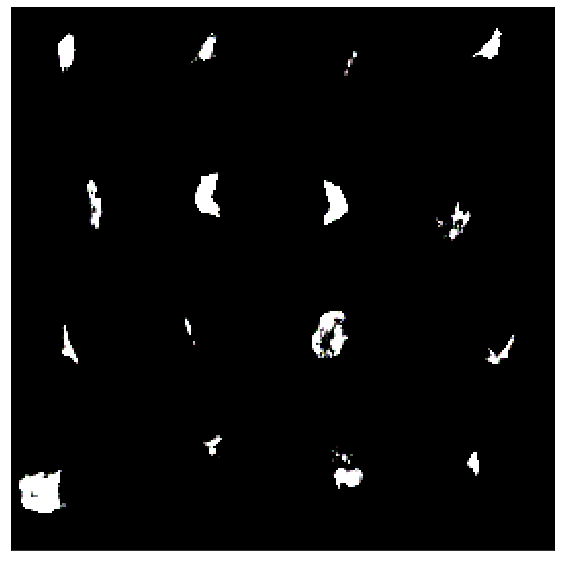

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


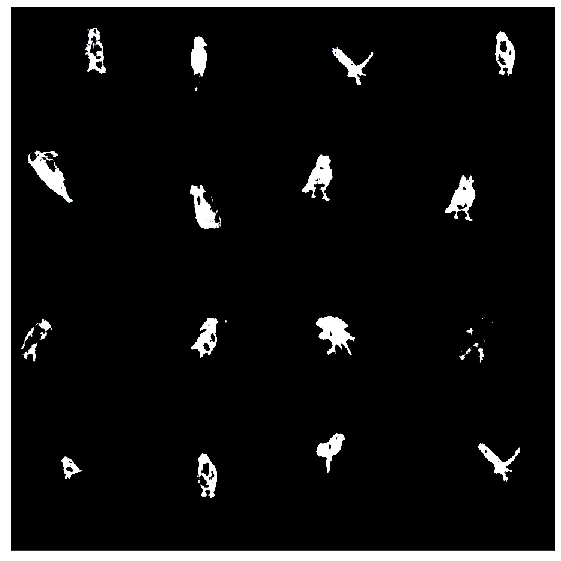

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 4


  0%|                                                                             | 4/17500 [00:19<67:14:50, 13.84s/it]

Train Epoch: 4 [0/280000 (0%)]	Loss: 0.024650
IOU : 0.0541839599609375


  0%|▏                                                                              | 51/17500 [00:23<30:51,  9.42it/s]

Train Epoch: 4 [200/280000 (0%)]	Loss: 0.027652
IOU : 0.052520751953125


  1%|▍                                                                             | 103/17500 [00:28<27:48, 10.43it/s]

Train Epoch: 4 [400/280000 (1%)]	Loss: 0.027069
IOU : 0.0573577880859375


  1%|▋                                                                             | 151/17500 [00:34<57:56,  4.99it/s]

Train Epoch: 4 [600/280000 (1%)]	Loss: 0.028868
IOU : 0.061492919921875


  1%|▉                                                                             | 204/17500 [00:40<26:08, 11.03it/s]

Train Epoch: 4 [800/280000 (1%)]	Loss: 0.032115
IOU : 0.0509490966796875


  1%|█                                                                             | 251/17500 [00:44<27:15, 10.54it/s]

Train Epoch: 4 [1000/280000 (1%)]	Loss: 0.030481
IOU : 0.058013916015625


  2%|█▎                                                                            | 304/17500 [00:49<26:25, 10.84it/s]

Train Epoch: 4 [1200/280000 (2%)]	Loss: 0.026470
IOU : 0.0505218505859375


  2%|█▌                                                                            | 352/17500 [00:54<25:42, 11.12it/s]

Train Epoch: 4 [1400/280000 (2%)]	Loss: 0.028741
IOU : 0.0529022216796875


  2%|█▊                                                                            | 404/17500 [01:00<27:36, 10.32it/s]

Train Epoch: 4 [1600/280000 (2%)]	Loss: 0.036595
IOU : 0.05279541015625


  3%|██                                                                            | 451/17500 [01:05<27:19, 10.40it/s]

Train Epoch: 4 [1800/280000 (3%)]	Loss: 0.030200
IOU : 0.0589599609375


  3%|██▏                                                                         | 501/17500 [01:11<1:12:11,  3.92it/s]

Train Epoch: 4 [2000/280000 (3%)]	Loss: 0.026997
IOU : 0.064208984375


  3%|██▍                                                                           | 552/17500 [01:19<24:33, 11.50it/s]

Train Epoch: 4 [2200/280000 (3%)]	Loss: 0.020735
IOU : 0.048370361328125


  3%|██▋                                                                           | 602/17500 [01:24<31:31,  8.93it/s]

Train Epoch: 4 [2400/280000 (3%)]	Loss: 0.041783
IOU : 0.0576324462890625


  4%|██▉                                                                           | 651/17500 [01:30<30:44,  9.13it/s]

Train Epoch: 4 [2600/280000 (4%)]	Loss: 0.036299
IOU : 0.0670013427734375


  4%|███                                                                           | 700/17500 [01:35<27:59, 10.00it/s]

Train Epoch: 4 [2800/280000 (4%)]	Loss: 0.041356
IOU : 0.064178466796875


  4%|███▎                                                                          | 753/17500 [01:40<31:41,  8.81it/s]

Train Epoch: 4 [3000/280000 (4%)]	Loss: 0.040491
IOU : 0.0616912841796875


  5%|███▌                                                                          | 801/17500 [01:45<27:09, 10.25it/s]

Train Epoch: 4 [3200/280000 (5%)]	Loss: 0.034287
IOU : 0.0507965087890625


  5%|███▊                                                                          | 852/17500 [01:51<27:00, 10.27it/s]

Train Epoch: 4 [3400/280000 (5%)]	Loss: 0.031326
IOU : 0.0541534423828125


  5%|████                                                                          | 904/17500 [01:56<26:26, 10.46it/s]

Train Epoch: 4 [3600/280000 (5%)]	Loss: 0.034591
IOU : 0.0543365478515625


  5%|████▏                                                                         | 952/17500 [02:01<26:20, 10.47it/s]

Train Epoch: 4 [3800/280000 (5%)]	Loss: 0.025080
IOU : 0.053985595703125


  6%|████▍                                                                        | 1004/17500 [02:07<27:46,  9.90it/s]

Train Epoch: 4 [4000/280000 (6%)]	Loss: 0.025664
IOU : 0.0522918701171875


  6%|████▋                                                                        | 1052/17500 [02:12<26:52, 10.20it/s]

Train Epoch: 4 [4200/280000 (6%)]	Loss: 0.031732
IOU : 0.0503692626953125


  6%|████▊                                                                        | 1102/17500 [02:17<28:48,  9.49it/s]

Train Epoch: 4 [4400/280000 (6%)]	Loss: 0.024503
IOU : 0.0542449951171875


  7%|████▉                                                                      | 1151/17500 [02:28<1:12:56,  3.74it/s]

Train Epoch: 4 [4600/280000 (7%)]	Loss: 0.028669
IOU : 0.053466796875


  7%|█████▎                                                                       | 1202/17500 [02:33<27:44,  9.79it/s]

Train Epoch: 4 [4800/280000 (7%)]	Loss: 0.042001
IOU : 0.0571441650390625


  7%|█████▌                                                                       | 1252/17500 [02:39<27:57,  9.69it/s]

Train Epoch: 4 [5000/280000 (7%)]	Loss: 0.032466
IOU : 0.0507049560546875


  7%|█████▋                                                                       | 1301/17500 [02:44<27:46,  9.72it/s]

Train Epoch: 4 [5200/280000 (7%)]	Loss: 0.032551
IOU : 0.0567474365234375


  8%|█████▉                                                                       | 1353/17500 [02:50<27:21,  9.84it/s]

Train Epoch: 4 [5400/280000 (8%)]	Loss: 0.027930
IOU : 0.0530242919921875


  8%|██████▏                                                                      | 1401/17500 [02:55<29:18,  9.15it/s]

Train Epoch: 4 [5600/280000 (8%)]	Loss: 0.028586
IOU : 0.055419921875


  8%|██████▍                                                                      | 1452/17500 [03:00<29:44,  8.99it/s]

Train Epoch: 4 [5800/280000 (8%)]	Loss: 0.024292
IOU : 0.053436279296875


  9%|██████▍                                                                    | 1501/17500 [03:09<1:11:24,  3.73it/s]

Train Epoch: 4 [6000/280000 (9%)]	Loss: 0.023778
IOU : 0.0426788330078125


  9%|██████▊                                                                      | 1551/17500 [03:15<27:31,  9.66it/s]

Train Epoch: 4 [6200/280000 (9%)]	Loss: 0.030309
IOU : 0.0616302490234375


  9%|███████                                                                      | 1603/17500 [03:21<27:35,  9.61it/s]

Train Epoch: 4 [6400/280000 (9%)]	Loss: 0.041130
IOU : 0.056884765625


  9%|███████▎                                                                     | 1651/17500 [03:26<28:38,  9.22it/s]

Train Epoch: 4 [6600/280000 (9%)]	Loss: 0.041303
IOU : 0.0550689697265625


 10%|███████▍                                                                     | 1703/17500 [03:32<28:13,  9.33it/s]

Train Epoch: 4 [6800/280000 (10%)]	Loss: 0.031977
IOU : 0.0523681640625


 10%|███████▋                                                                     | 1751/17500 [03:37<28:46,  9.12it/s]

Train Epoch: 4 [7000/280000 (10%)]	Loss: 0.032981
IOU : 0.0499267578125


 10%|███████▉                                                                     | 1804/17500 [03:43<27:06,  9.65it/s]

Train Epoch: 4 [7200/280000 (10%)]	Loss: 0.035255
IOU : 0.056854248046875


 11%|████████▏                                                                    | 1852/17500 [03:48<25:41, 10.15it/s]

Train Epoch: 4 [7400/280000 (11%)]	Loss: 0.029168
IOU : 0.056243896484375


 11%|████████▎                                                                    | 1901/17500 [03:54<58:06,  4.47it/s]

Train Epoch: 4 [7600/280000 (11%)]	Loss: 0.028646
IOU : 0.054290771484375


 11%|████████▌                                                                    | 1951/17500 [04:04<38:06,  6.80it/s]

Train Epoch: 4 [7800/280000 (11%)]	Loss: 0.041735
IOU : 0.054840087890625


 11%|████████▊                                                                    | 2001/17500 [04:10<25:39, 10.07it/s]

Train Epoch: 4 [8000/280000 (11%)]	Loss: 0.028120
IOU : 0.04852294921875


 12%|█████████                                                                    | 2051/17500 [04:15<25:41, 10.02it/s]

Train Epoch: 4 [8200/280000 (12%)]	Loss: 0.033840
IOU : 0.057159423828125


 12%|█████████▎                                                                   | 2103/17500 [04:20<26:04,  9.84it/s]

Train Epoch: 4 [8400/280000 (12%)]	Loss: 0.031190
IOU : 0.0589752197265625


 12%|█████████▍                                                                   | 2152/17500 [04:26<33:35,  7.62it/s]

Train Epoch: 4 [8600/280000 (12%)]	Loss: 0.038834
IOU : 0.0598297119140625


 13%|█████████▋                                                                   | 2201/17500 [04:33<37:08,  6.87it/s]

Train Epoch: 4 [8800/280000 (13%)]	Loss: 0.050337
IOU : 0.063507080078125


 13%|█████████▉                                                                   | 2252/17500 [04:39<29:41,  8.56it/s]

Train Epoch: 4 [9000/280000 (13%)]	Loss: 0.022907
IOU : 0.0560302734375


 13%|██████████▏                                                                  | 2302/17500 [04:44<24:00, 10.55it/s]

Train Epoch: 4 [9200/280000 (13%)]	Loss: 0.035768
IOU : 0.0544891357421875


 13%|██████████▎                                                                  | 2353/17500 [04:50<23:51, 10.58it/s]

Train Epoch: 4 [9400/280000 (13%)]	Loss: 0.024810
IOU : 0.0585784912109375


 14%|██████████▎                                                                | 2401/17500 [04:58<1:07:38,  3.72it/s]

Train Epoch: 4 [9600/280000 (14%)]	Loss: 0.031828
IOU : 0.050872802734375


 14%|██████████▊                                                                  | 2452/17500 [05:05<28:20,  8.85it/s]

Train Epoch: 4 [9800/280000 (14%)]	Loss: 0.030749
IOU : 0.0539703369140625


 14%|███████████                                                                  | 2501/17500 [05:10<29:25,  8.49it/s]

Train Epoch: 4 [10000/280000 (14%)]	Loss: 0.025853
IOU : 0.0442962646484375


 15%|███████████▏                                                                 | 2551/17500 [05:15<24:44, 10.07it/s]

Train Epoch: 4 [10200/280000 (15%)]	Loss: 0.035130
IOU : 0.048736572265625


 15%|███████████▍                                                                 | 2602/17500 [05:21<27:33,  9.01it/s]

Train Epoch: 4 [10400/280000 (15%)]	Loss: 0.035272
IOU : 0.0552825927734375


 15%|███████████▎                                                               | 2651/17500 [05:29<1:06:48,  3.70it/s]

Train Epoch: 4 [10600/280000 (15%)]	Loss: 0.027236
IOU : 0.0518035888671875


 15%|███████████▉                                                                 | 2702/17500 [05:36<26:33,  9.29it/s]

Train Epoch: 4 [10800/280000 (15%)]	Loss: 0.023084
IOU : 0.048553466796875


 16%|████████████                                                                 | 2753/17500 [05:42<25:03,  9.81it/s]

Train Epoch: 4 [11000/280000 (16%)]	Loss: 0.041346
IOU : 0.0492401123046875


 16%|████████████▎                                                                | 2801/17500 [05:47<27:02,  9.06it/s]

Train Epoch: 4 [11200/280000 (16%)]	Loss: 0.046069
IOU : 0.052520751953125


 16%|████████████▌                                                                | 2853/17500 [05:53<24:11, 10.09it/s]

Train Epoch: 4 [11400/280000 (16%)]	Loss: 0.037228
IOU : 0.0511016845703125


 17%|████████████▊                                                                | 2901/17500 [05:58<25:48,  9.43it/s]

Train Epoch: 4 [11600/280000 (17%)]	Loss: 0.030743
IOU : 0.0505828857421875


 17%|████████████▉                                                                | 2954/17500 [06:04<23:18, 10.40it/s]

Train Epoch: 4 [11800/280000 (17%)]	Loss: 0.026785
IOU : 0.0520477294921875


 17%|█████████████▏                                                               | 3002/17500 [06:09<23:40, 10.21it/s]

Train Epoch: 4 [12000/280000 (17%)]	Loss: 0.028291
IOU : 0.049530029296875


 17%|█████████████▍                                                               | 3054/17500 [06:14<23:26, 10.27it/s]

Train Epoch: 4 [12200/280000 (17%)]	Loss: 0.025442
IOU : 0.0486907958984375


 18%|█████████████▋                                                               | 3102/17500 [06:20<24:14,  9.90it/s]

Train Epoch: 4 [12400/280000 (18%)]	Loss: 0.028822
IOU : 0.054718017578125


 18%|█████████████▉                                                               | 3154/17500 [06:25<23:44, 10.07it/s]

Train Epoch: 4 [12600/280000 (18%)]	Loss: 0.036502
IOU : 0.0583343505859375


 18%|█████████████▋                                                             | 3201/17500 [06:34<1:04:08,  3.72it/s]

Train Epoch: 4 [12800/280000 (18%)]	Loss: 0.036421
IOU : 0.05364990234375


 19%|██████████████▎                                                              | 3252/17500 [06:41<24:27,  9.71it/s]

Train Epoch: 4 [13000/280000 (19%)]	Loss: 0.027303
IOU : 0.056396484375


 19%|██████████████▌                                                              | 3303/17500 [06:46<22:10, 10.67it/s]

Train Epoch: 4 [13200/280000 (19%)]	Loss: 0.027330
IOU : 0.0483245849609375


 19%|██████████████▋                                                              | 3352/17500 [06:52<22:10, 10.63it/s]

Train Epoch: 4 [13400/280000 (19%)]	Loss: 0.027886
IOU : 0.05609130859375


 19%|██████████████▉                                                              | 3404/17500 [06:57<23:04, 10.18it/s]

Train Epoch: 4 [13600/280000 (19%)]	Loss: 0.043768
IOU : 0.0544891357421875


 20%|███████████████▏                                                             | 3451/17500 [07:02<27:28,  8.52it/s]

Train Epoch: 4 [13800/280000 (20%)]	Loss: 0.029296
IOU : 0.0569305419921875


 20%|███████████████                                                            | 3501/17500 [07:10<1:02:39,  3.72it/s]

Train Epoch: 4 [14000/280000 (20%)]	Loss: 0.023582
IOU : 0.0469818115234375


 20%|███████████████▌                                                             | 3551/17500 [07:17<24:21,  9.54it/s]

Train Epoch: 4 [14200/280000 (20%)]	Loss: 0.033769
IOU : 0.064849853515625


 21%|███████████████▊                                                             | 3602/17500 [07:23<24:24,  9.49it/s]

Train Epoch: 4 [14400/280000 (21%)]	Loss: 0.025519
IOU : 0.05291748046875


 21%|████████████████                                                             | 3652/17500 [07:28<23:23,  9.87it/s]

Train Epoch: 4 [14600/280000 (21%)]	Loss: 0.026288
IOU : 0.0497283935546875


 21%|████████████████▎                                                            | 3701/17500 [07:33<23:45,  9.68it/s]

Train Epoch: 4 [14800/280000 (21%)]	Loss: 0.035268
IOU : 0.052703857421875


 21%|████████████████▌                                                            | 3752/17500 [07:39<25:38,  8.93it/s]

Train Epoch: 4 [15000/280000 (21%)]	Loss: 0.033864
IOU : 0.06201171875


 22%|████████████████▋                                                            | 3800/17500 [07:44<23:44,  9.62it/s]

Train Epoch: 4 [15200/280000 (22%)]	Loss: 0.032991
IOU : 0.061737060546875


 22%|████████████████▉                                                            | 3852/17500 [07:50<22:47,  9.98it/s]

Train Epoch: 4 [15400/280000 (22%)]	Loss: 0.035645
IOU : 0.0623931884765625


 22%|█████████████████▏                                                           | 3902/17500 [07:55<24:25,  9.28it/s]

Train Epoch: 4 [15600/280000 (22%)]	Loss: 0.028876
IOU : 0.05242919921875


 23%|████████████████▉                                                          | 3951/17500 [08:05<1:00:44,  3.72it/s]

Train Epoch: 4 [15800/280000 (23%)]	Loss: 0.027890
IOU : 0.0502777099609375


 23%|█████████████████▌                                                           | 4003/17500 [08:11<23:19,  9.65it/s]

Train Epoch: 4 [16000/280000 (23%)]	Loss: 0.025885
IOU : 0.0427093505859375


 23%|█████████████████▊                                                           | 4052/17500 [08:16<23:20,  9.60it/s]

Train Epoch: 4 [16200/280000 (23%)]	Loss: 0.031713
IOU : 0.0575408935546875


 23%|██████████████████                                                           | 4103/17500 [08:22<22:54,  9.75it/s]

Train Epoch: 4 [16400/280000 (23%)]	Loss: 0.032770
IOU : 0.054779052734375


 24%|██████████████████▎                                                          | 4151/17500 [08:27<23:16,  9.56it/s]

Train Epoch: 4 [16600/280000 (24%)]	Loss: 0.023816
IOU : 0.041473388671875


 24%|██████████████████▍                                                          | 4200/17500 [08:32<22:07, 10.02it/s]

Train Epoch: 4 [16800/280000 (24%)]	Loss: 0.033603
IOU : 0.050994873046875


 24%|██████████████████▋                                                          | 4253/17500 [08:38<22:34,  9.78it/s]

Train Epoch: 4 [17000/280000 (24%)]	Loss: 0.034746
IOU : 0.0489349365234375


 25%|██████████████████▉                                                          | 4301/17500 [08:46<58:51,  3.74it/s]

Train Epoch: 4 [17200/280000 (25%)]	Loss: 0.026716
IOU : 0.0547332763671875


 25%|███████████████████▏                                                         | 4353/17500 [08:53<20:18, 10.79it/s]

Train Epoch: 4 [17400/280000 (25%)]	Loss: 0.041390
IOU : 0.055023193359375


 25%|███████████████████▎                                                         | 4401/17500 [08:58<21:55,  9.96it/s]

Train Epoch: 4 [17600/280000 (25%)]	Loss: 0.025450
IOU : 0.047332763671875


 25%|███████████████████▌                                                         | 4452/17500 [09:04<21:28, 10.13it/s]

Train Epoch: 4 [17800/280000 (25%)]	Loss: 0.058969
IOU : 0.0569610595703125


 26%|███████████████████▊                                                         | 4502/17500 [09:09<25:01,  8.66it/s]

Train Epoch: 4 [18000/280000 (26%)]	Loss: 0.031605
IOU : 0.0598297119140625


 26%|████████████████████                                                         | 4552/17500 [09:15<21:37,  9.98it/s]

Train Epoch: 4 [18200/280000 (26%)]	Loss: 0.030074
IOU : 0.0510711669921875


 26%|████████████████████▏                                                        | 4600/17500 [09:20<22:50,  9.41it/s]

Train Epoch: 4 [18400/280000 (26%)]	Loss: 0.027282
IOU : 0.0553436279296875


 27%|████████████████████▍                                                        | 4652/17500 [09:26<22:04,  9.70it/s]

Train Epoch: 4 [18600/280000 (27%)]	Loss: 0.042360
IOU : 0.05267333984375


 27%|████████████████████▋                                                        | 4701/17500 [09:36<57:04,  3.74it/s]

Train Epoch: 4 [18800/280000 (27%)]	Loss: 0.024226
IOU : 0.05224609375


 27%|████████████████████▉                                                        | 4751/17500 [09:41<22:21,  9.50it/s]

Train Epoch: 4 [19000/280000 (27%)]	Loss: 0.028751
IOU : 0.051605224609375


 27%|█████████████████████▏                                                       | 4802/17500 [09:47<24:31,  8.63it/s]

Train Epoch: 4 [19200/280000 (27%)]	Loss: 0.036205
IOU : 0.056854248046875


 28%|█████████████████████▎                                                       | 4853/17500 [09:52<21:08,  9.97it/s]

Train Epoch: 4 [19400/280000 (28%)]	Loss: 0.027954
IOU : 0.0553741455078125


 28%|█████████████████████▌                                                       | 4900/17500 [09:57<21:41,  9.68it/s]

Train Epoch: 4 [19600/280000 (28%)]	Loss: 0.036143
IOU : 0.05426025390625


 28%|█████████████████████▊                                                       | 4952/17500 [10:03<21:25,  9.76it/s]

Train Epoch: 4 [19800/280000 (28%)]	Loss: 0.026333
IOU : 0.0548858642578125


 29%|██████████████████████                                                       | 5000/17500 [10:08<19:48, 10.51it/s]

Train Epoch: 4 [20000/280000 (29%)]	Loss: 0.028257
IOU : 0.04925537109375


 29%|██████████████████████▏                                                      | 5051/17500 [10:14<48:56,  4.24it/s]

Train Epoch: 4 [20200/280000 (29%)]	Loss: 0.030666
IOU : 0.0519256591796875


 29%|██████████████████████▍                                                      | 5101/17500 [10:23<15:26, 13.38it/s]

Train Epoch: 4 [20400/280000 (29%)]	Loss: 0.037512
IOU : 0.06243896484375


 29%|██████████████████████▋                                                      | 5152/17500 [10:29<19:57, 10.31it/s]

Train Epoch: 4 [20600/280000 (29%)]	Loss: 0.030845
IOU : 0.0514373779296875


 30%|██████████████████████▉                                                      | 5200/17500 [10:34<20:11, 10.15it/s]

Train Epoch: 4 [20800/280000 (30%)]	Loss: 0.026842
IOU : 0.0542144775390625


 30%|███████████████████████                                                      | 5252/17500 [10:39<20:50,  9.79it/s]

Train Epoch: 4 [21000/280000 (30%)]	Loss: 0.024289
IOU : 0.053314208984375


 30%|███████████████████████▎                                                     | 5300/17500 [10:45<20:04, 10.13it/s]

Train Epoch: 4 [21200/280000 (30%)]	Loss: 0.025352
IOU : 0.0539093017578125


 31%|███████████████████████▌                                                     | 5351/17500 [10:51<26:08,  7.74it/s]

Train Epoch: 4 [21400/280000 (31%)]	Loss: 0.026455
IOU : 0.0550384521484375


 31%|███████████████████████▊                                                     | 5401/17500 [10:59<54:06,  3.73it/s]

Train Epoch: 4 [21600/280000 (31%)]	Loss: 0.041348
IOU : 0.0562744140625


 31%|███████████████████████▉                                                     | 5452/17500 [11:06<20:05, 10.00it/s]

Train Epoch: 4 [21800/280000 (31%)]	Loss: 0.027323
IOU : 0.051300048828125


 31%|████████████████████████▏                                                    | 5500/17500 [11:11<19:59, 10.00it/s]

Train Epoch: 4 [22000/280000 (31%)]	Loss: 0.040777
IOU : 0.063568115234375


 32%|████████████████████████▍                                                    | 5552/17500 [11:17<19:26, 10.24it/s]

Train Epoch: 4 [22200/280000 (32%)]	Loss: 0.026010
IOU : 0.05621337890625


 32%|████████████████████████▋                                                    | 5600/17500 [11:22<20:32,  9.65it/s]

Train Epoch: 4 [22400/280000 (32%)]	Loss: 0.030160
IOU : 0.0504913330078125


 32%|████████████████████████▊                                                    | 5652/17500 [11:28<19:25, 10.17it/s]

Train Epoch: 4 [22600/280000 (32%)]	Loss: 0.028799
IOU : 0.0502471923828125


 33%|█████████████████████████                                                    | 5700/17500 [11:33<20:00,  9.83it/s]

Train Epoch: 4 [22800/280000 (33%)]	Loss: 0.031349
IOU : 0.056182861328125


 33%|█████████████████████████▎                                                   | 5751/17500 [11:43<52:46,  3.71it/s]

Train Epoch: 4 [23000/280000 (33%)]	Loss: 0.027063
IOU : 0.0519256591796875


 33%|█████████████████████████▌                                                   | 5802/17500 [11:49<22:28,  8.67it/s]

Train Epoch: 4 [23200/280000 (33%)]	Loss: 0.032758
IOU : 0.0513763427734375


 33%|█████████████████████████▊                                                   | 5853/17500 [11:55<20:15,  9.58it/s]

Train Epoch: 4 [23400/280000 (33%)]	Loss: 0.034500
IOU : 0.0528106689453125


 34%|█████████████████████████▉                                                   | 5901/17500 [12:01<23:14,  8.32it/s]

Train Epoch: 4 [23600/280000 (34%)]	Loss: 0.033411
IOU : 0.0513153076171875


 34%|██████████████████████████▏                                                  | 5951/17500 [12:07<24:44,  7.78it/s]

Train Epoch: 4 [23800/280000 (34%)]	Loss: 0.023371
IOU : 0.0529022216796875


 34%|██████████████████████████▍                                                  | 6001/17500 [12:14<44:54,  4.27it/s]

Train Epoch: 4 [24000/280000 (34%)]	Loss: 0.022658
IOU : 0.0394744873046875


 35%|██████████████████████████▌                                                  | 6051/17500 [12:23<15:42, 12.15it/s]

Train Epoch: 4 [24200/280000 (35%)]	Loss: 0.022405
IOU : 0.048797607421875


 35%|██████████████████████████▊                                                  | 6102/17500 [12:29<21:23,  8.88it/s]

Train Epoch: 4 [24400/280000 (35%)]	Loss: 0.032901
IOU : 0.0584564208984375


 35%|███████████████████████████                                                  | 6151/17500 [12:34<19:59,  9.46it/s]

Train Epoch: 4 [24600/280000 (35%)]	Loss: 0.025564
IOU : 0.04766845703125


 35%|███████████████████████████▎                                                 | 6201/17500 [12:39<19:31,  9.65it/s]

Train Epoch: 4 [24800/280000 (35%)]	Loss: 0.025217
IOU : 0.054931640625


 36%|███████████████████████████▌                                                 | 6251/17500 [12:45<45:38,  4.11it/s]

Train Epoch: 4 [25000/280000 (36%)]	Loss: 0.026680
IOU : 0.0508880615234375


 36%|███████████████████████████▋                                                 | 6301/17500 [12:54<18:04, 10.33it/s]

Train Epoch: 4 [25200/280000 (36%)]	Loss: 0.032568
IOU : 0.0548553466796875


 36%|███████████████████████████▉                                                 | 6352/17500 [12:59<21:29,  8.64it/s]

Train Epoch: 4 [25400/280000 (36%)]	Loss: 0.027926
IOU : 0.0475616455078125


 37%|████████████████████████████▏                                                | 6403/17500 [13:05<19:14,  9.61it/s]

Train Epoch: 4 [25600/280000 (37%)]	Loss: 0.035501
IOU : 0.0543365478515625


 37%|████████████████████████████▍                                                | 6451/17500 [13:10<19:48,  9.30it/s]

Train Epoch: 4 [25800/280000 (37%)]	Loss: 0.031619
IOU : 0.0626373291015625


 37%|████████████████████████████▌                                                | 6502/17500 [13:15<19:13,  9.54it/s]

Train Epoch: 4 [26000/280000 (37%)]	Loss: 0.036574
IOU : 0.0573577880859375


 37%|████████████████████████████▊                                                | 6551/17500 [13:24<48:44,  3.74it/s]

Train Epoch: 4 [26200/280000 (37%)]	Loss: 0.028170
IOU : 0.0513916015625


 38%|█████████████████████████████                                                | 6602/17500 [13:31<19:17,  9.41it/s]

Train Epoch: 4 [26400/280000 (38%)]	Loss: 0.029812
IOU : 0.053253173828125


 38%|█████████████████████████████▎                                               | 6653/17500 [13:37<19:00,  9.51it/s]

Train Epoch: 4 [26600/280000 (38%)]	Loss: 0.035402
IOU : 0.05108642578125


 38%|█████████████████████████████▍                                               | 6702/17500 [13:42<21:03,  8.55it/s]

Train Epoch: 4 [26800/280000 (38%)]	Loss: 0.029961
IOU : 0.0461273193359375


 39%|█████████████████████████████▋                                               | 6752/17500 [13:47<17:20, 10.33it/s]

Train Epoch: 4 [27000/280000 (39%)]	Loss: 0.036900
IOU : 0.0506744384765625


 39%|█████████████████████████████▉                                               | 6802/17500 [13:53<20:31,  8.69it/s]

Train Epoch: 4 [27200/280000 (39%)]	Loss: 0.021014
IOU : 0.044952392578125


 39%|██████████████████████████████▏                                              | 6852/17500 [13:58<17:49,  9.95it/s]

Train Epoch: 4 [27400/280000 (39%)]	Loss: 0.050280
IOU : 0.0551300048828125


 39%|██████████████████████████████▎                                              | 6902/17500 [14:03<19:49,  8.91it/s]

Train Epoch: 4 [27600/280000 (39%)]	Loss: 0.020530
IOU : 0.045745849609375


 40%|██████████████████████████████▌                                              | 6952/17500 [14:08<17:16, 10.17it/s]

Train Epoch: 4 [27800/280000 (40%)]	Loss: 0.024709
IOU : 0.046630859375


 40%|██████████████████████████████▊                                              | 7000/17500 [14:14<17:45,  9.85it/s]

Train Epoch: 4 [28000/280000 (40%)]	Loss: 0.032249
IOU : 0.058441162109375


 40%|███████████████████████████████                                              | 7052/17500 [14:19<17:00, 10.24it/s]

Train Epoch: 4 [28200/280000 (40%)]	Loss: 0.035125
IOU : 0.0491790771484375


 41%|███████████████████████████████▏                                             | 7101/17500 [14:28<46:46,  3.71it/s]

Train Epoch: 4 [28400/280000 (41%)]	Loss: 0.033885
IOU : 0.0462188720703125


 41%|███████████████████████████████▍                                             | 7154/17500 [14:35<12:22, 13.93it/s]

Train Epoch: 4 [28600/280000 (41%)]	Loss: 0.026950
IOU : 0.052825927734375


 41%|███████████████████████████████▋                                             | 7202/17500 [14:40<19:09,  8.96it/s]

Train Epoch: 4 [28800/280000 (41%)]	Loss: 0.026884
IOU : 0.0516204833984375


 41%|███████████████████████████████▉                                             | 7254/17500 [14:46<16:27, 10.37it/s]

Train Epoch: 4 [29000/280000 (41%)]	Loss: 0.028852
IOU : 0.0546417236328125


 42%|████████████████████████████████                                             | 7301/17500 [14:51<17:06,  9.94it/s]

Train Epoch: 4 [29200/280000 (42%)]	Loss: 0.034698
IOU : 0.057281494140625


 42%|████████████████████████████████▎                                            | 7351/17500 [14:56<17:50,  9.48it/s]

Train Epoch: 4 [29400/280000 (42%)]	Loss: 0.029497
IOU : 0.0599212646484375


 42%|████████████████████████████████▌                                            | 7402/17500 [15:02<18:49,  8.94it/s]

Train Epoch: 4 [29600/280000 (42%)]	Loss: 0.025020
IOU : 0.0587005615234375


 43%|████████████████████████████████▊                                            | 7451/17500 [15:10<44:47,  3.74it/s]

Train Epoch: 4 [29800/280000 (43%)]	Loss: 0.024984
IOU : 0.0544891357421875


 43%|█████████████████████████████████                                            | 7503/17500 [15:17<16:48,  9.91it/s]

Train Epoch: 4 [30000/280000 (43%)]	Loss: 0.028471
IOU : 0.0504913330078125


 43%|█████████████████████████████████▏                                           | 7551/17500 [15:22<16:00, 10.36it/s]

Train Epoch: 4 [30200/280000 (43%)]	Loss: 0.032340
IOU : 0.05169677734375


 43%|█████████████████████████████████▍                                           | 7602/17500 [15:28<19:21,  8.52it/s]

Train Epoch: 4 [30400/280000 (43%)]	Loss: 0.027445
IOU : 0.0487213134765625


 44%|█████████████████████████████████▋                                           | 7651/17500 [15:33<18:15,  8.99it/s]

Train Epoch: 4 [30600/280000 (44%)]	Loss: 0.039610
IOU : 0.0507659912109375


 44%|█████████████████████████████████▉                                           | 7701/17500 [15:39<19:29,  8.38it/s]

Train Epoch: 4 [30800/280000 (44%)]	Loss: 0.022992
IOU : 0.0501861572265625


 44%|██████████████████████████████████                                           | 7752/17500 [15:44<16:30,  9.84it/s]

Train Epoch: 4 [31000/280000 (44%)]	Loss: 0.027084
IOU : 0.0526885986328125


 45%|██████████████████████████████████▎                                          | 7801/17500 [15:52<43:16,  3.73it/s]

Train Epoch: 4 [31200/280000 (45%)]	Loss: 0.031852
IOU : 0.059051513671875


 45%|██████████████████████████████████▌                                          | 7853/17500 [16:01<20:11,  7.96it/s]

Train Epoch: 4 [31400/280000 (45%)]	Loss: 0.032901
IOU : 0.0578155517578125


 45%|██████████████████████████████████▊                                          | 7903/17500 [16:06<15:58, 10.01it/s]

Train Epoch: 4 [31600/280000 (45%)]	Loss: 0.029601
IOU : 0.0460662841796875


 45%|██████████████████████████████████▉                                          | 7951/17500 [16:11<16:11,  9.83it/s]

Train Epoch: 4 [31800/280000 (45%)]	Loss: 0.031398
IOU : 0.0527801513671875


 46%|███████████████████████████████████▏                                         | 8003/17500 [16:16<15:16, 10.36it/s]

Train Epoch: 4 [32000/280000 (46%)]	Loss: 0.022214
IOU : 0.0466461181640625


 46%|███████████████████████████████████▍                                         | 8051/17500 [16:22<15:44, 10.01it/s]

Train Epoch: 4 [32200/280000 (46%)]	Loss: 0.027621
IOU : 0.053680419921875


 46%|███████████████████████████████████▋                                         | 8101/17500 [16:27<18:37,  8.41it/s]

Train Epoch: 4 [32400/280000 (46%)]	Loss: 0.028310
IOU : 0.0606231689453125


 47%|███████████████████████████████████▊                                         | 8152/17500 [16:33<15:29, 10.06it/s]

Train Epoch: 4 [32600/280000 (47%)]	Loss: 0.033377
IOU : 0.0478973388671875


 47%|████████████████████████████████████                                         | 8201/17500 [16:38<18:06,  8.56it/s]

Train Epoch: 4 [32800/280000 (47%)]	Loss: 0.034025
IOU : 0.0557861328125


 47%|████████████████████████████████████▎                                        | 8251/17500 [16:43<15:29,  9.95it/s]

Train Epoch: 4 [33000/280000 (47%)]	Loss: 0.028382
IOU : 0.0545806884765625


 47%|████████████████████████████████████▌                                        | 8302/17500 [16:49<17:22,  8.82it/s]

Train Epoch: 4 [33200/280000 (47%)]	Loss: 0.024768
IOU : 0.0550689697265625


 48%|████████████████████████████████████▋                                        | 8350/17500 [16:54<14:29, 10.52it/s]

Train Epoch: 4 [33400/280000 (48%)]	Loss: 0.025991
IOU : 0.047576904296875


 48%|████████████████████████████████████▉                                        | 8401/17500 [17:04<40:39,  3.73it/s]

Train Epoch: 4 [33600/280000 (48%)]	Loss: 0.032944
IOU : 0.05096435546875


 48%|█████████████████████████████████████▏                                       | 8452/17500 [17:10<16:46,  8.99it/s]

Train Epoch: 4 [33800/280000 (48%)]	Loss: 0.027826
IOU : 0.05364990234375


 49%|█████████████████████████████████████▍                                       | 8501/17500 [17:15<16:46,  8.94it/s]

Train Epoch: 4 [34000/280000 (49%)]	Loss: 0.031989
IOU : 0.051177978515625


 49%|█████████████████████████████████████▌                                       | 8551/17500 [17:21<16:38,  8.96it/s]

Train Epoch: 4 [34200/280000 (49%)]	Loss: 0.030583
IOU : 0.0597991943359375


 49%|█████████████████████████████████████▊                                       | 8602/17500 [17:26<14:15, 10.40it/s]

Train Epoch: 4 [34400/280000 (49%)]	Loss: 0.028514
IOU : 0.056488037109375


 49%|██████████████████████████████████████                                       | 8651/17500 [17:31<14:48,  9.96it/s]

Train Epoch: 4 [34600/280000 (49%)]	Loss: 0.025169
IOU : 0.053466796875


 50%|██████████████████████████████████████▎                                      | 8702/17500 [17:37<17:50,  8.22it/s]

Train Epoch: 4 [34800/280000 (50%)]	Loss: 0.023755
IOU : 0.052459716796875


 50%|██████████████████████████████████████▌                                      | 8753/17500 [17:42<15:06,  9.65it/s]

Train Epoch: 4 [35000/280000 (50%)]	Loss: 0.032641
IOU : 0.0583038330078125


 50%|██████████████████████████████████████▋                                      | 8802/17500 [17:48<15:49,  9.16it/s]

Train Epoch: 4 [35200/280000 (50%)]	Loss: 0.036309
IOU : 0.052490234375


 51%|██████████████████████████████████████▉                                      | 8852/17500 [17:54<18:22,  7.84it/s]

Train Epoch: 4 [35400/280000 (51%)]	Loss: 0.022762
IOU : 0.0552825927734375


 51%|███████████████████████████████████████▏                                     | 8902/17500 [17:59<14:17, 10.03it/s]

Train Epoch: 4 [35600/280000 (51%)]	Loss: 0.031879
IOU : 0.0474090576171875


 51%|███████████████████████████████████████▍                                     | 8951/17500 [18:09<38:14,  3.73it/s]

Train Epoch: 4 [35800/280000 (51%)]	Loss: 0.026431
IOU : 0.0507659912109375


 51%|███████████████████████████████████████▌                                     | 9001/17500 [18:15<15:28,  9.15it/s]

Train Epoch: 4 [36000/280000 (51%)]	Loss: 0.024764
IOU : 0.0490264892578125


 52%|███████████████████████████████████████▊                                     | 9053/17500 [18:21<14:21,  9.81it/s]

Train Epoch: 4 [36200/280000 (52%)]	Loss: 0.022422
IOU : 0.0499420166015625


 52%|████████████████████████████████████████                                     | 9101/17500 [18:26<14:39,  9.55it/s]

Train Epoch: 4 [36400/280000 (52%)]	Loss: 0.037221
IOU : 0.0563812255859375


 52%|████████████████████████████████████████▎                                    | 9153/17500 [18:31<13:28, 10.32it/s]

Train Epoch: 4 [36600/280000 (52%)]	Loss: 0.024662
IOU : 0.0494384765625


 53%|████████████████████████████████████████▍                                    | 9202/17500 [18:37<13:32, 10.21it/s]

Train Epoch: 4 [36800/280000 (53%)]	Loss: 0.030204
IOU : 0.0525665283203125


 53%|████████████████████████████████████████▋                                    | 9251/17500 [18:47<36:52,  3.73it/s]

Train Epoch: 4 [37000/280000 (53%)]	Loss: 0.027455
IOU : 0.054351806640625


 53%|████████████████████████████████████████▉                                    | 9301/17500 [18:52<15:46,  8.67it/s]

Train Epoch: 4 [37200/280000 (53%)]	Loss: 0.024431
IOU : 0.04620361328125


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [18:57<13:26, 10.10it/s]

Train Epoch: 4 [37400/280000 (53%)]	Loss: 0.021939
IOU : 0.047576904296875


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [19:02<15:40,  8.61it/s]

Train Epoch: 4 [37600/280000 (54%)]	Loss: 0.034102
IOU : 0.052459716796875


 54%|█████████████████████████████████████████▌                                   | 9451/17500 [19:07<13:22, 10.03it/s]

Train Epoch: 4 [37800/280000 (54%)]	Loss: 0.034300
IOU : 0.0547332763671875


 54%|█████████████████████████████████████████▊                                   | 9501/17500 [19:12<14:35,  9.14it/s]

Train Epoch: 4 [38000/280000 (54%)]	Loss: 0.039510
IOU : 0.0614471435546875


 55%|██████████████████████████████████████████                                   | 9551/17500 [19:17<12:40, 10.46it/s]

Train Epoch: 4 [38200/280000 (55%)]	Loss: 0.032198
IOU : 0.05169677734375


 55%|██████████████████████████████████████████▎                                  | 9603/17500 [19:23<13:05, 10.06it/s]

Train Epoch: 4 [38400/280000 (55%)]	Loss: 0.025400
IOU : 0.0533447265625


 55%|██████████████████████████████████████████▍                                  | 9651/17500 [19:28<14:19,  9.13it/s]

Train Epoch: 4 [38600/280000 (55%)]	Loss: 0.036826
IOU : 0.060272216796875


 55%|██████████████████████████████████████████▋                                  | 9702/17500 [19:33<12:44, 10.20it/s]

Train Epoch: 4 [38800/280000 (55%)]	Loss: 0.029770
IOU : 0.05084228515625


 56%|██████████████████████████████████████████▉                                  | 9751/17500 [19:42<34:40,  3.72it/s]

Train Epoch: 4 [39000/280000 (56%)]	Loss: 0.033728
IOU : 0.0530242919921875


 56%|███████████████████████████████████████████▏                                 | 9802/17500 [19:50<14:14,  9.01it/s]

Train Epoch: 4 [39200/280000 (56%)]	Loss: 0.030782
IOU : 0.0468597412109375


 56%|███████████████████████████████████████████▎                                 | 9852/17500 [19:55<13:17,  9.60it/s]

Train Epoch: 4 [39400/280000 (56%)]	Loss: 0.044360
IOU : 0.0508880615234375


 57%|███████████████████████████████████████████▌                                 | 9902/17500 [20:01<13:38,  9.28it/s]

Train Epoch: 4 [39600/280000 (57%)]	Loss: 0.028340
IOU : 0.0573272705078125


 57%|███████████████████████████████████████████▊                                 | 9952/17500 [20:06<12:22, 10.17it/s]

Train Epoch: 4 [39800/280000 (57%)]	Loss: 0.035761
IOU : 0.0547027587890625


 57%|███████████████████████████████████████████▍                                | 10000/17500 [20:11<11:53, 10.51it/s]

Train Epoch: 4 [40000/280000 (57%)]	Loss: 0.033969
IOU : 0.05157470703125


 57%|███████████████████████████████████████████▋                                | 10051/17500 [20:20<33:20,  3.72it/s]

Train Epoch: 4 [40200/280000 (57%)]	Loss: 0.036884
IOU : 0.0568084716796875


 58%|███████████████████████████████████████████▊                                | 10101/17500 [20:27<13:15,  9.30it/s]

Train Epoch: 4 [40400/280000 (58%)]	Loss: 0.030438
IOU : 0.052825927734375


 58%|████████████████████████████████████████████                                | 10154/17500 [20:32<11:54, 10.28it/s]

Train Epoch: 4 [40600/280000 (58%)]	Loss: 0.030698
IOU : 0.057464599609375


 58%|████████████████████████████████████████████▎                               | 10201/17500 [20:37<11:33, 10.52it/s]

Train Epoch: 4 [40800/280000 (58%)]	Loss: 0.029979
IOU : 0.0542755126953125


 59%|████████████████████████████████████████████▌                               | 10254/17500 [20:42<11:50, 10.19it/s]

Train Epoch: 4 [41000/280000 (59%)]	Loss: 0.025461
IOU : 0.0531768798828125


 59%|████████████████████████████████████████████▋                               | 10301/17500 [20:47<11:48, 10.16it/s]

Train Epoch: 4 [41200/280000 (59%)]	Loss: 0.030569
IOU : 0.05963134765625


 59%|████████████████████████████████████████████▉                               | 10353/17500 [20:53<11:47, 10.10it/s]

Train Epoch: 4 [41400/280000 (59%)]	Loss: 0.024600
IOU : 0.0487823486328125


 59%|█████████████████████████████████████████████▏                              | 10403/17500 [20:58<12:13,  9.67it/s]

Train Epoch: 4 [41600/280000 (59%)]	Loss: 0.025424
IOU : 0.0439910888671875


 60%|█████████████████████████████████████████████▍                              | 10451/17500 [21:06<31:27,  3.73it/s]

Train Epoch: 4 [41800/280000 (60%)]	Loss: 0.036508
IOU : 0.057647705078125


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [21:13<12:42,  9.18it/s]

Train Epoch: 4 [42000/280000 (60%)]	Loss: 0.030903
IOU : 0.05596923828125


 60%|█████████████████████████████████████████████▊                              | 10552/17500 [21:19<12:57,  8.94it/s]

Train Epoch: 4 [42200/280000 (60%)]	Loss: 0.020561
IOU : 0.0480804443359375


 61%|██████████████████████████████████████████████                              | 10602/17500 [21:24<11:39,  9.86it/s]

Train Epoch: 4 [42400/280000 (61%)]	Loss: 0.035073
IOU : 0.0585784912109375


 61%|██████████████████████████████████████████████▎                             | 10652/17500 [21:29<10:57, 10.41it/s]

Train Epoch: 4 [42600/280000 (61%)]	Loss: 0.024275
IOU : 0.0503387451171875


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [21:34<12:11,  9.30it/s]

Train Epoch: 4 [42800/280000 (61%)]	Loss: 0.023523
IOU : 0.047576904296875


 61%|██████████████████████████████████████████████▋                             | 10752/17500 [21:40<11:29,  9.79it/s]

Train Epoch: 4 [43000/280000 (61%)]	Loss: 0.030174
IOU : 0.051605224609375


 62%|██████████████████████████████████████████████▉                             | 10800/17500 [21:45<10:52, 10.27it/s]

Train Epoch: 4 [43200/280000 (62%)]	Loss: 0.026938
IOU : 0.0547332763671875


 62%|███████████████████████████████████████████████▏                            | 10852/17500 [21:51<11:35,  9.56it/s]

Train Epoch: 4 [43400/280000 (62%)]	Loss: 0.024732
IOU : 0.05267333984375


 62%|███████████████████████████████████████████████▎                            | 10900/17500 [21:57<10:54, 10.08it/s]

Train Epoch: 4 [43600/280000 (62%)]	Loss: 0.021962
IOU : 0.0493621826171875


 63%|███████████████████████████████████████████████▌                            | 10951/17500 [22:02<17:01,  6.41it/s]

Train Epoch: 4 [43800/280000 (63%)]	Loss: 0.035635
IOU : 0.0510711669921875


 63%|███████████████████████████████████████████████▊                            | 11003/17500 [22:13<10:59,  9.85it/s]

Train Epoch: 4 [44000/280000 (63%)]	Loss: 0.030300
IOU : 0.056365966796875


 63%|████████████████████████████████████████████████                            | 11053/17500 [22:18<11:24,  9.42it/s]

Train Epoch: 4 [44200/280000 (63%)]	Loss: 0.040338
IOU : 0.0543670654296875


 63%|████████████████████████████████████████████████▏                           | 11101/17500 [22:23<10:32, 10.12it/s]

Train Epoch: 4 [44400/280000 (63%)]	Loss: 0.032645
IOU : 0.0523529052734375


 64%|████████████████████████████████████████████████▍                           | 11152/17500 [22:28<11:49,  8.95it/s]

Train Epoch: 4 [44600/280000 (64%)]	Loss: 0.031699
IOU : 0.0565948486328125


 64%|████████████████████████████████████████████████▋                           | 11202/17500 [22:34<10:18, 10.19it/s]

Train Epoch: 4 [44800/280000 (64%)]	Loss: 0.034982
IOU : 0.064788818359375


 64%|████████████████████████████████████████████████▊                           | 11253/17500 [22:39<11:18,  9.20it/s]

Train Epoch: 4 [45000/280000 (64%)]	Loss: 0.023465
IOU : 0.0496978759765625


 65%|█████████████████████████████████████████████████                           | 11304/17500 [22:49<09:16, 11.13it/s]

Train Epoch: 4 [45200/280000 (65%)]	Loss: 0.031533
IOU : 0.051483154296875


 65%|█████████████████████████████████████████████████▎                          | 11352/17500 [22:54<12:42,  8.06it/s]

Train Epoch: 4 [45400/280000 (65%)]	Loss: 0.044564
IOU : 0.0558013916015625


 65%|█████████████████████████████████████████████████▌                          | 11402/17500 [22:59<10:06, 10.06it/s]

Train Epoch: 4 [45600/280000 (65%)]	Loss: 0.025059
IOU : 0.0502471923828125


 65%|█████████████████████████████████████████████████▋                          | 11454/17500 [23:05<09:22, 10.74it/s]

Train Epoch: 4 [45800/280000 (65%)]	Loss: 0.028743
IOU : 0.057861328125


 66%|█████████████████████████████████████████████████▉                          | 11502/17500 [23:10<10:06,  9.90it/s]

Train Epoch: 4 [46000/280000 (66%)]	Loss: 0.048345
IOU : 0.05670166015625


 66%|██████████████████████████████████████████████████▏                         | 11551/17500 [23:18<26:32,  3.74it/s]

Train Epoch: 4 [46200/280000 (66%)]	Loss: 0.029767
IOU : 0.048309326171875


 66%|██████████████████████████████████████████████████▍                         | 11602/17500 [23:24<09:46, 10.06it/s]

Train Epoch: 4 [46400/280000 (66%)]	Loss: 0.031981
IOU : 0.0586700439453125


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [23:29<09:44, 10.00it/s]

Train Epoch: 4 [46600/280000 (67%)]	Loss: 0.024897
IOU : 0.0520477294921875


 67%|██████████████████████████████████████████████████▊                         | 11701/17500 [23:34<10:31,  9.18it/s]

Train Epoch: 4 [46800/280000 (67%)]	Loss: 0.025990
IOU : 0.0481414794921875


 67%|███████████████████████████████████████████████████                         | 11750/17500 [23:40<10:02,  9.54it/s]

Train Epoch: 4 [47000/280000 (67%)]	Loss: 0.027454
IOU : 0.057708740234375


 67%|███████████████████████████████████████████████████▎                        | 11802/17500 [23:45<09:57,  9.54it/s]

Train Epoch: 4 [47200/280000 (67%)]	Loss: 0.030092
IOU : 0.054412841796875


 68%|███████████████████████████████████████████████████▍                        | 11851/17500 [23:55<25:15,  3.73it/s]

Train Epoch: 4 [47400/280000 (68%)]	Loss: 0.030520
IOU : 0.0540313720703125


 68%|███████████████████████████████████████████████████▋                        | 11902/17500 [24:01<08:49, 10.58it/s]

Train Epoch: 4 [47600/280000 (68%)]	Loss: 0.028030
IOU : 0.048828125


 68%|███████████████████████████████████████████████████▉                        | 11950/17500 [24:06<08:47, 10.52it/s]

Train Epoch: 4 [47800/280000 (68%)]	Loss: 0.039609
IOU : 0.0507354736328125


 69%|████████████████████████████████████████████████████                        | 12002/17500 [24:12<09:00, 10.18it/s]

Train Epoch: 4 [48000/280000 (69%)]	Loss: 0.029978
IOU : 0.055145263671875


 69%|████████████████████████████████████████████████████▎                       | 12052/17500 [24:17<10:35,  8.58it/s]

Train Epoch: 4 [48200/280000 (69%)]	Loss: 0.018873
IOU : 0.0431060791015625


 69%|████████████████████████████████████████████████████▌                       | 12101/17500 [24:23<22:45,  3.95it/s]

Train Epoch: 4 [48400/280000 (69%)]	Loss: 0.031982
IOU : 0.05072021484375


 69%|████████████████████████████████████████████████████▊                       | 12151/17500 [24:32<08:17, 10.74it/s]

Train Epoch: 4 [48600/280000 (69%)]	Loss: 0.032725
IOU : 0.04986572265625


 70%|████████████████████████████████████████████████████▉                       | 12203/17500 [24:37<08:59,  9.81it/s]

Train Epoch: 4 [48800/280000 (70%)]	Loss: 0.032004
IOU : 0.0527191162109375


 70%|█████████████████████████████████████████████████████▏                      | 12252/17500 [24:42<09:36,  9.10it/s]

Train Epoch: 4 [49000/280000 (70%)]	Loss: 0.026259
IOU : 0.044158935546875


 70%|█████████████████████████████████████████████████████▍                      | 12301/17500 [24:48<09:18,  9.31it/s]

Train Epoch: 4 [49200/280000 (70%)]	Loss: 0.029477
IOU : 0.051177978515625


 71%|█████████████████████████████████████████████████████▋                      | 12351/17500 [24:53<20:37,  4.16it/s]

Train Epoch: 4 [49400/280000 (71%)]	Loss: 0.043398
IOU : 0.055267333984375


 71%|█████████████████████████████████████████████████████▊                      | 12403/17500 [25:03<09:25,  9.01it/s]

Train Epoch: 4 [49600/280000 (71%)]	Loss: 0.028481
IOU : 0.0540771484375


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [25:08<08:42,  9.67it/s]

Train Epoch: 4 [49800/280000 (71%)]	Loss: 0.026319
IOU : 0.05340576171875


 71%|██████████████████████████████████████████████████████▎                     | 12502/17500 [25:13<09:21,  8.90it/s]

Train Epoch: 4 [50000/280000 (71%)]	Loss: 0.026999
IOU : 0.0511016845703125


 72%|██████████████████████████████████████████████████████▌                     | 12551/17500 [25:19<08:06, 10.18it/s]

Train Epoch: 4 [50200/280000 (72%)]	Loss: 0.027770
IOU : 0.050537109375


 72%|██████████████████████████████████████████████████████▋                     | 12601/17500 [25:24<09:52,  8.27it/s]

Train Epoch: 4 [50400/280000 (72%)]	Loss: 0.025703
IOU : 0.0532989501953125


 72%|██████████████████████████████████████████████████████▉                     | 12651/17500 [25:29<08:19,  9.72it/s]

Train Epoch: 4 [50600/280000 (72%)]	Loss: 0.031351
IOU : 0.0525360107421875


 73%|███████████████████████████████████████████████████████▏                    | 12703/17500 [25:35<08:00,  9.99it/s]

Train Epoch: 4 [50800/280000 (73%)]	Loss: 0.025443
IOU : 0.054962158203125


 73%|███████████████████████████████████████████████████████▍                    | 12751/17500 [25:40<08:15,  9.59it/s]

Train Epoch: 4 [51000/280000 (73%)]	Loss: 0.020343
IOU : 0.045684814453125


 73%|███████████████████████████████████████████████████████▌                    | 12803/17500 [25:46<07:40, 10.20it/s]

Train Epoch: 4 [51200/280000 (73%)]	Loss: 0.025973
IOU : 0.051055908203125


 73%|███████████████████████████████████████████████████████▊                    | 12851/17500 [25:55<20:47,  3.73it/s]

Train Epoch: 4 [51400/280000 (73%)]	Loss: 0.030875
IOU : 0.05609130859375


 74%|████████████████████████████████████████████████████████                    | 12902/17500 [26:01<08:56,  8.56it/s]

Train Epoch: 4 [51600/280000 (74%)]	Loss: 0.025419
IOU : 0.0495452880859375


 74%|████████████████████████████████████████████████████████▏                   | 12952/17500 [26:07<08:04,  9.38it/s]

Train Epoch: 4 [51800/280000 (74%)]	Loss: 0.036467
IOU : 0.053375244140625


 74%|████████████████████████████████████████████████████████▍                   | 13003/17500 [26:12<07:28, 10.02it/s]

Train Epoch: 4 [52000/280000 (74%)]	Loss: 0.036135
IOU : 0.0531005859375


 75%|████████████████████████████████████████████████████████▋                   | 13051/17500 [26:17<07:39,  9.67it/s]

Train Epoch: 4 [52200/280000 (75%)]	Loss: 0.047516
IOU : 0.0578765869140625


 75%|████████████████████████████████████████████████████████▉                   | 13104/17500 [26:23<07:18, 10.03it/s]

Train Epoch: 4 [52400/280000 (75%)]	Loss: 0.024540
IOU : 0.0510711669921875


 75%|█████████████████████████████████████████████████████████                   | 13151/17500 [26:33<19:27,  3.72it/s]

Train Epoch: 4 [52600/280000 (75%)]	Loss: 0.032925
IOU : 0.0543212890625


 75%|█████████████████████████████████████████████████████████▎                  | 13200/17500 [26:38<07:49,  9.16it/s]

Train Epoch: 4 [52800/280000 (75%)]	Loss: 0.022839
IOU : 0.0457611083984375


 76%|█████████████████████████████████████████████████████████▌                  | 13252/17500 [26:44<07:07,  9.93it/s]

Train Epoch: 4 [53000/280000 (76%)]	Loss: 0.030112
IOU : 0.0547332763671875


 76%|█████████████████████████████████████████████████████████▊                  | 13301/17500 [26:49<06:51, 10.22it/s]

Train Epoch: 4 [53200/280000 (76%)]	Loss: 0.036740
IOU : 0.04840087890625


 76%|█████████████████████████████████████████████████████████▉                  | 13351/17500 [26:54<07:56,  8.70it/s]

Train Epoch: 4 [53400/280000 (76%)]	Loss: 0.033735
IOU : 0.0540771484375


 77%|██████████████████████████████████████████████████████████▏                 | 13401/17500 [27:00<07:15,  9.41it/s]

Train Epoch: 4 [53600/280000 (77%)]	Loss: 0.028724
IOU : 0.055450439453125


 77%|██████████████████████████████████████████████████████████▍                 | 13452/17500 [27:05<06:37, 10.18it/s]

Train Epoch: 4 [53800/280000 (77%)]	Loss: 0.030838
IOU : 0.0555572509765625


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [27:11<06:55,  9.62it/s]

Train Epoch: 4 [54000/280000 (77%)]	Loss: 0.030009
IOU : 0.0486297607421875


 77%|██████████████████████████████████████████████████████████▊                 | 13553/17500 [27:16<06:38,  9.91it/s]

Train Epoch: 4 [54200/280000 (77%)]	Loss: 0.037769
IOU : 0.05279541015625


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [27:22<06:25, 10.13it/s]

Train Epoch: 4 [54400/280000 (78%)]	Loss: 0.039316
IOU : 0.0558319091796875


 78%|███████████████████████████████████████████████████████████▎                | 13653/17500 [27:27<06:29,  9.89it/s]

Train Epoch: 4 [54600/280000 (78%)]	Loss: 0.033906
IOU : 0.0541229248046875


 78%|███████████████████████████████████████████████████████████▌                | 13701/17500 [27:32<06:38,  9.54it/s]

Train Epoch: 4 [54800/280000 (78%)]	Loss: 0.024245
IOU : 0.0500030517578125


 79%|███████████████████████████████████████████████████████████▋                | 13753/17500 [27:38<06:13, 10.02it/s]

Train Epoch: 4 [55000/280000 (79%)]	Loss: 0.030650
IOU : 0.05657958984375


 79%|███████████████████████████████████████████████████████████▉                | 13801/17500 [27:44<09:08,  6.74it/s]

Train Epoch: 4 [55200/280000 (79%)]	Loss: 0.034716
IOU : 0.0568695068359375


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [27:50<08:47,  6.92it/s]

Train Epoch: 4 [55400/280000 (79%)]	Loss: 0.046556
IOU : 0.0565338134765625


 79%|████████████████████████████████████████████████████████████▎               | 13901/17500 [27:56<08:44,  6.86it/s]

Train Epoch: 4 [55600/280000 (79%)]	Loss: 0.030753
IOU : 0.0566864013671875


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [28:03<08:38,  6.85it/s]

Train Epoch: 4 [55800/280000 (80%)]	Loss: 0.027489
IOU : 0.046356201171875


 80%|████████████████████████████████████████████████████████████▊               | 14001/17500 [28:09<08:44,  6.68it/s]

Train Epoch: 4 [56000/280000 (80%)]	Loss: 0.035662
IOU : 0.052276611328125


 80%|█████████████████████████████████████████████████████████████               | 14051/17500 [28:15<08:20,  6.88it/s]

Train Epoch: 4 [56200/280000 (80%)]	Loss: 0.034515
IOU : 0.05633544921875


 81%|█████████████████████████████████████████████████████████████▏              | 14101/17500 [28:21<08:14,  6.88it/s]

Train Epoch: 4 [56400/280000 (81%)]	Loss: 0.024391
IOU : 0.0478363037109375


 81%|█████████████████████████████████████████████████████████████▍              | 14152/17500 [28:27<06:10,  9.03it/s]

Train Epoch: 4 [56600/280000 (81%)]	Loss: 0.040457
IOU : 0.0590972900390625


 81%|█████████████████████████████████████████████████████████████▋              | 14200/17500 [28:32<05:48,  9.48it/s]

Train Epoch: 4 [56800/280000 (81%)]	Loss: 0.033157
IOU : 0.0602569580078125


 81%|█████████████████████████████████████████████████████████████▉              | 14252/17500 [28:38<05:57,  9.09it/s]

Train Epoch: 4 [57000/280000 (81%)]	Loss: 0.027739
IOU : 0.05047607421875


 82%|██████████████████████████████████████████████████████████████              | 14302/17500 [28:43<05:41,  9.38it/s]

Train Epoch: 4 [57200/280000 (82%)]	Loss: 0.026100
IOU : 0.049285888671875


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [28:48<05:33,  9.43it/s]

Train Epoch: 4 [57400/280000 (82%)]	Loss: 0.029510
IOU : 0.05126953125


 82%|██████████████████████████████████████████████████████████████▌             | 14402/17500 [28:54<05:37,  9.18it/s]

Train Epoch: 4 [57600/280000 (82%)]	Loss: 0.022887
IOU : 0.0447998046875


 83%|██████████████████████████████████████████████████████████████▊             | 14451/17500 [29:04<13:36,  3.73it/s]

Train Epoch: 4 [57800/280000 (83%)]	Loss: 0.025029
IOU : 0.044525146484375


 83%|██████████████████████████████████████████████████████████████▉             | 14501/17500 [29:10<05:12,  9.58it/s]

Train Epoch: 4 [58000/280000 (83%)]	Loss: 0.032799
IOU : 0.0507965087890625


 83%|███████████████████████████████████████████████████████████████▏            | 14552/17500 [29:15<05:25,  9.05it/s]

Train Epoch: 4 [58200/280000 (83%)]	Loss: 0.034358
IOU : 0.0588836669921875


 83%|███████████████████████████████████████████████████████████████▍            | 14601/17500 [29:21<05:08,  9.41it/s]

Train Epoch: 4 [58400/280000 (83%)]	Loss: 0.036653
IOU : 0.0560760498046875


 84%|███████████████████████████████████████████████████████████████▋            | 14654/17500 [29:26<04:26, 10.68it/s]

Train Epoch: 4 [58600/280000 (84%)]	Loss: 0.026166
IOU : 0.058441162109375


 84%|███████████████████████████████████████████████████████████████▊            | 14701/17500 [29:31<04:33, 10.25it/s]

Train Epoch: 4 [58800/280000 (84%)]	Loss: 0.027852
IOU : 0.04742431640625


 84%|████████████████████████████████████████████████████████████████            | 14752/17500 [29:36<05:06,  8.96it/s]

Train Epoch: 4 [59000/280000 (84%)]	Loss: 0.044524
IOU : 0.056915283203125


 85%|████████████████████████████████████████████████████████████████▎           | 14803/17500 [29:47<06:37,  6.79it/s]

Train Epoch: 4 [59200/280000 (85%)]	Loss: 0.034625
IOU : 0.051666259765625


 85%|████████████████████████████████████████████████████████████████▌           | 14852/17500 [29:51<04:32,  9.72it/s]

Train Epoch: 4 [59400/280000 (85%)]	Loss: 0.028794
IOU : 0.05755615234375


 85%|████████████████████████████████████████████████████████████████▋           | 14902/17500 [29:57<04:46,  9.07it/s]

Train Epoch: 4 [59600/280000 (85%)]	Loss: 0.029037
IOU : 0.05450439453125


 85%|████████████████████████████████████████████████████████████████▉           | 14951/17500 [30:05<11:23,  3.73it/s]

Train Epoch: 4 [59800/280000 (85%)]	Loss: 0.031994
IOU : 0.052032470703125


 86%|█████████████████████████████████████████████████████████████████▏          | 15002/17500 [30:11<04:19,  9.63it/s]

Train Epoch: 4 [60000/280000 (86%)]	Loss: 0.024903
IOU : 0.0540008544921875


 86%|█████████████████████████████████████████████████████████████████▎          | 15051/17500 [30:16<04:20,  9.41it/s]

Train Epoch: 4 [60200/280000 (86%)]	Loss: 0.028280
IOU : 0.0508270263671875


 86%|█████████████████████████████████████████████████████████████████▌          | 15102/17500 [30:22<04:14,  9.41it/s]

Train Epoch: 4 [60400/280000 (86%)]	Loss: 0.023984
IOU : 0.048553466796875


 87%|█████████████████████████████████████████████████████████████████▊          | 15152/17500 [30:28<04:16,  9.15it/s]

Train Epoch: 4 [60600/280000 (87%)]	Loss: 0.033244
IOU : 0.051849365234375


 87%|██████████████████████████████████████████████████████████████████          | 15201/17500 [30:33<03:39, 10.46it/s]

Train Epoch: 4 [60800/280000 (87%)]	Loss: 0.028442
IOU : 0.0535736083984375


 87%|██████████████████████████████████████████████████████████████████▏         | 15251/17500 [30:38<04:07,  9.09it/s]

Train Epoch: 4 [61000/280000 (87%)]	Loss: 0.036924
IOU : 0.052215576171875


 87%|██████████████████████████████████████████████████████████████████▍         | 15301/17500 [30:47<09:48,  3.74it/s]

Train Epoch: 4 [61200/280000 (87%)]	Loss: 0.026393
IOU : 0.0463714599609375


 88%|██████████████████████████████████████████████████████████████████▋         | 15351/17500 [30:54<03:56,  9.07it/s]

Train Epoch: 4 [61400/280000 (88%)]	Loss: 0.024654
IOU : 0.0457916259765625


 88%|██████████████████████████████████████████████████████████████████▉         | 15401/17500 [30:59<03:50,  9.10it/s]

Train Epoch: 4 [61600/280000 (88%)]	Loss: 0.029066
IOU : 0.0537567138671875


 88%|███████████████████████████████████████████████████████████████████         | 15454/17500 [31:05<03:43,  9.15it/s]

Train Epoch: 4 [61800/280000 (88%)]	Loss: 0.024388
IOU : 0.043975830078125


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [31:10<03:08, 10.59it/s]

Train Epoch: 4 [62000/280000 (89%)]	Loss: 0.025159
IOU : 0.0442352294921875


 89%|███████████████████████████████████████████████████████████████████▌        | 15554/17500 [31:15<03:03, 10.60it/s]

Train Epoch: 4 [62200/280000 (89%)]	Loss: 0.031469
IOU : 0.059661865234375


 89%|███████████████████████████████████████████████████████████████████▊        | 15601/17500 [31:20<03:23,  9.32it/s]

Train Epoch: 4 [62400/280000 (89%)]	Loss: 0.025327
IOU : 0.0452880859375


 89%|███████████████████████████████████████████████████████████████████▉        | 15653/17500 [31:26<03:04, 10.00it/s]

Train Epoch: 4 [62600/280000 (89%)]	Loss: 0.025927
IOU : 0.0483245849609375


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [31:31<03:06,  9.63it/s]

Train Epoch: 4 [62800/280000 (90%)]	Loss: 0.031466
IOU : 0.05242919921875


 90%|████████████████████████████████████████████████████████████████████▍       | 15751/17500 [31:41<07:49,  3.72it/s]

Train Epoch: 4 [63000/280000 (90%)]	Loss: 0.032135
IOU : 0.0597076416015625


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [31:47<02:52,  9.87it/s]

Train Epoch: 4 [63200/280000 (90%)]	Loss: 0.026516
IOU : 0.05450439453125


 91%|████████████████████████████████████████████████████████████████████▊       | 15851/17500 [31:52<03:17,  8.34it/s]

Train Epoch: 4 [63400/280000 (91%)]	Loss: 0.033140
IOU : 0.053985595703125


 91%|█████████████████████████████████████████████████████████████████████       | 15901/17500 [31:58<02:34, 10.38it/s]

Train Epoch: 4 [63600/280000 (91%)]	Loss: 0.027016
IOU : 0.054840087890625


 91%|█████████████████████████████████████████████████████████████████████▎      | 15952/17500 [32:03<03:03,  8.43it/s]

Train Epoch: 4 [63800/280000 (91%)]	Loss: 0.022667
IOU : 0.0444793701171875


 91%|█████████████████████████████████████████████████████████████████████▍      | 16001/17500 [32:09<05:25,  4.61it/s]

Train Epoch: 4 [64000/280000 (91%)]	Loss: 0.055307
IOU : 0.059112548828125


 92%|█████████████████████████████████████████████████████████████████████▋      | 16054/17500 [32:18<01:47, 13.43it/s]

Train Epoch: 4 [64200/280000 (92%)]	Loss: 0.040362
IOU : 0.0502166748046875


 92%|█████████████████████████████████████████████████████████████████████▉      | 16101/17500 [32:23<02:30,  9.30it/s]

Train Epoch: 4 [64400/280000 (92%)]	Loss: 0.036335
IOU : 0.051300048828125


 92%|██████████████████████████████████████████████████████████████████████▏     | 16154/17500 [32:29<02:12, 10.17it/s]

Train Epoch: 4 [64600/280000 (92%)]	Loss: 0.029263
IOU : 0.05181884765625


 93%|██████████████████████████████████████████████████████████████████████▎     | 16202/17500 [32:34<02:14,  9.65it/s]

Train Epoch: 4 [64800/280000 (93%)]	Loss: 0.031541
IOU : 0.0554046630859375


 93%|██████████████████████████████████████████████████████████████████████▌     | 16254/17500 [32:40<02:07,  9.81it/s]

Train Epoch: 4 [65000/280000 (93%)]	Loss: 0.022981
IOU : 0.055816650390625


 93%|██████████████████████████████████████████████████████████████████████▊     | 16302/17500 [32:45<01:56, 10.29it/s]

Train Epoch: 4 [65200/280000 (93%)]	Loss: 0.030607
IOU : 0.054473876953125


 93%|███████████████████████████████████████████████████████████████████████     | 16354/17500 [32:51<01:59,  9.62it/s]

Train Epoch: 4 [65400/280000 (93%)]	Loss: 0.034758
IOU : 0.0477294921875


 94%|███████████████████████████████████████████████████████████████████████▏    | 16402/17500 [32:56<02:00,  9.09it/s]

Train Epoch: 4 [65600/280000 (94%)]	Loss: 0.020938
IOU : 0.0465545654296875


 94%|███████████████████████████████████████████████████████████████████████▍    | 16453/17500 [33:02<01:47,  9.75it/s]

Train Epoch: 4 [65800/280000 (94%)]	Loss: 0.024246
IOU : 0.0514068603515625


 94%|███████████████████████████████████████████████████████████████████████▋    | 16502/17500 [33:07<02:03,  8.10it/s]

Train Epoch: 4 [66000/280000 (94%)]	Loss: 0.029304
IOU : 0.047882080078125


 95%|███████████████████████████████████████████████████████████████████████▉    | 16552/17500 [33:12<01:37,  9.77it/s]

Train Epoch: 4 [66200/280000 (95%)]	Loss: 0.026861
IOU : 0.0510406494140625


 95%|████████████████████████████████████████████████████████████████████████    | 16601/17500 [33:18<01:39,  9.00it/s]

Train Epoch: 4 [66400/280000 (95%)]	Loss: 0.025618
IOU : 0.05059814453125


 95%|████████████████████████████████████████████████████████████████████████▎   | 16651/17500 [33:27<03:47,  3.73it/s]

Train Epoch: 4 [66600/280000 (95%)]	Loss: 0.053962
IOU : 0.0624542236328125


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [33:34<01:18, 10.18it/s]

Train Epoch: 4 [66800/280000 (95%)]	Loss: 0.033652
IOU : 0.045623779296875


 96%|████████████████████████████████████████████████████████████████████████▊   | 16752/17500 [33:40<01:34,  7.92it/s]

Train Epoch: 4 [67000/280000 (96%)]	Loss: 0.026440
IOU : 0.0458526611328125


 96%|████████████████████████████████████████████████████████████████████████▉   | 16802/17500 [33:45<01:15,  9.22it/s]

Train Epoch: 4 [67200/280000 (96%)]	Loss: 0.030922
IOU : 0.0522003173828125


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16851/17500 [33:51<01:08,  9.45it/s]

Train Epoch: 4 [67400/280000 (96%)]	Loss: 0.037504
IOU : 0.05712890625


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16904/17500 [33:56<00:58, 10.25it/s]

Train Epoch: 4 [67600/280000 (97%)]	Loss: 0.038135
IOU : 0.0586090087890625


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16951/17500 [34:06<02:05,  4.38it/s]

Train Epoch: 4 [67800/280000 (97%)]	Loss: 0.025454
IOU : 0.0459747314453125


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17002/17500 [34:12<00:56,  8.76it/s]

Train Epoch: 4 [68000/280000 (97%)]	Loss: 0.041290
IOU : 0.05963134765625


 97%|██████████████████████████████████████████████████████████████████████████  | 17051/17500 [34:17<00:50,  8.81it/s]

Train Epoch: 4 [68200/280000 (97%)]	Loss: 0.025266
IOU : 0.048553466796875


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17101/17500 [34:22<00:42,  9.38it/s]

Train Epoch: 4 [68400/280000 (98%)]	Loss: 0.027711
IOU : 0.0484771728515625


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17153/17500 [34:28<00:34, 10.14it/s]

Train Epoch: 4 [68600/280000 (98%)]	Loss: 0.027590
IOU : 0.0560302734375


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17202/17500 [34:34<00:37,  8.03it/s]

Train Epoch: 4 [68800/280000 (98%)]	Loss: 0.029332
IOU : 0.047698974609375


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17252/17500 [34:39<00:26,  9.50it/s]

Train Epoch: 4 [69000/280000 (99%)]	Loss: 0.029020
IOU : 0.0576629638671875


 99%|███████████████████████████████████████████████████████████████████████████▏| 17300/17500 [34:44<00:19, 10.08it/s]

Train Epoch: 4 [69200/280000 (99%)]	Loss: 0.026645
IOU : 0.0527801513671875


 99%|███████████████████████████████████████████████████████████████████████████▎| 17351/17500 [34:53<00:39,  3.74it/s]

Train Epoch: 4 [69400/280000 (99%)]	Loss: 0.030887
IOU : 0.0494842529296875


 99%|███████████████████████████████████████████████████████████████████████████▌| 17403/17500 [35:01<00:08, 11.13it/s]

Train Epoch: 4 [69600/280000 (99%)]	Loss: 0.030836
IOU : 0.0508270263671875


100%|███████████████████████████████████████████████████████████████████████████▊| 17452/17500 [35:06<00:04, 10.35it/s]

Train Epoch: 4 [69800/280000 (100%)]	Loss: 0.033594
IOU : 0.054412841796875


  0%|                                                                              | 1/7500 [00:11<24:31:50, 11.78s/it]

Test Epoch: 4 [0/120000 (0%)]	Loss: 0.058208
IOU : 0.04729477240114796


  1%|█                                                                              | 101/7500 [00:45<31:04,  3.97it/s]

Test Epoch: 4 [400/120000 (1%)]	Loss: 0.070354
IOU : 0.04664580676020408


  3%|██                                                                             | 201/7500 [01:20<25:45,  4.72it/s]

Test Epoch: 4 [800/120000 (3%)]	Loss: 0.039361
IOU : 0.03694121691645408


  4%|███▏                                                                           | 301/7500 [01:53<25:17,  4.74it/s]

Test Epoch: 4 [1200/120000 (4%)]	Loss: 0.055649
IOU : 0.040871133609693876


  5%|████▏                                                                          | 401/7500 [02:33<30:29,  3.88it/s]

Test Epoch: 4 [1600/120000 (5%)]	Loss: 0.039574
IOU : 0.038051060267857144


  7%|█████▏                                                                       | 501/7500 [03:07<1:34:56,  1.23it/s]

Test Epoch: 4 [2000/120000 (7%)]	Loss: 0.066500
IOU : 0.04129339724170918


  8%|██████▎                                                                        | 601/7500 [03:43<28:03,  4.10it/s]

Test Epoch: 4 [2400/120000 (8%)]	Loss: 0.056112
IOU : 0.03844841159119898


  9%|███████▍                                                                       | 701/7500 [04:16<23:11,  4.89it/s]

Test Epoch: 4 [2800/120000 (9%)]	Loss: 0.028220
IOU : 0.03858169244260204


 11%|████████▍                                                                      | 801/7500 [04:56<22:58,  4.86it/s]

Test Epoch: 4 [3200/120000 (11%)]	Loss: 0.074865
IOU : 0.042287398357780615


 12%|█████████▍                                                                     | 901/7500 [05:31<47:57,  2.29it/s]

Test Epoch: 4 [3600/120000 (12%)]	Loss: 0.049310
IOU : 0.040090132732780615


 13%|██████████▍                                                                   | 1001/7500 [06:12<30:46,  3.52it/s]

Test Epoch: 4 [4000/120000 (13%)]	Loss: 0.036819
IOU : 0.04166708187181122


 15%|███████████▍                                                                  | 1101/7500 [06:49<32:30,  3.28it/s]

Test Epoch: 4 [4400/120000 (15%)]	Loss: 0.040552
IOU : 0.03666469029017857


 16%|████████████▍                                                                 | 1201/7500 [07:27<25:41,  4.09it/s]

Test Epoch: 4 [4800/120000 (16%)]	Loss: 0.042321
IOU : 0.039553272480867346


 17%|█████████████▌                                                                | 1301/7500 [08:06<28:09,  3.67it/s]

Test Epoch: 4 [5200/120000 (17%)]	Loss: 0.043741
IOU : 0.04536406847895408


 19%|██████████████▌                                                               | 1401/7500 [08:46<45:34,  2.23it/s]

Test Epoch: 4 [5600/120000 (19%)]	Loss: 0.045477
IOU : 0.045529735331632654


 20%|███████████████▌                                                              | 1501/7500 [09:21<24:35,  4.07it/s]

Test Epoch: 4 [6000/120000 (20%)]	Loss: 0.058301
IOU : 0.044741260762117346


 21%|████████████████▋                                                             | 1601/7500 [10:02<33:34,  2.93it/s]

Test Epoch: 4 [6400/120000 (21%)]	Loss: 0.037535
IOU : 0.04152881855867347


 23%|█████████████████▏                                                          | 1701/7500 [10:36<1:18:38,  1.23it/s]

Test Epoch: 4 [6800/120000 (23%)]	Loss: 0.047947
IOU : 0.03725884885204082


 24%|██████████████████▎                                                         | 1801/7500 [11:17<1:02:46,  1.51it/s]

Test Epoch: 4 [7200/120000 (24%)]	Loss: 0.050128
IOU : 0.04134944993622449


 25%|███████████████████▊                                                          | 1901/7500 [11:56<22:43,  4.11it/s]

Test Epoch: 4 [7600/120000 (25%)]	Loss: 0.055713
IOU : 0.040468799824617346


 27%|████████████████████▊                                                         | 2001/7500 [12:34<20:14,  4.53it/s]

Test Epoch: 4 [8000/120000 (27%)]	Loss: 0.042254
IOU : 0.04445476921237245


 28%|█████████████████████▊                                                        | 2101/7500 [13:13<39:22,  2.28it/s]

Test Epoch: 4 [8400/120000 (28%)]	Loss: 0.064208
IOU : 0.04188631018813776


 29%|██████████████████████▉                                                       | 2201/7500 [13:52<27:09,  3.25it/s]

Test Epoch: 4 [8800/120000 (29%)]	Loss: 0.043254
IOU : 0.03816690250318878


 31%|███████████████████████▉                                                      | 2301/7500 [14:29<38:32,  2.25it/s]

Test Epoch: 4 [9200/120000 (31%)]	Loss: 0.056497
IOU : 0.04322534677933673


 32%|████████████████████████▉                                                     | 2401/7500 [15:07<31:06,  2.73it/s]

Test Epoch: 4 [9600/120000 (32%)]	Loss: 0.033224
IOU : 0.036729462292729595


 33%|██████████████████████████                                                    | 2501/7500 [15:46<36:42,  2.27it/s]

Test Epoch: 4 [10000/120000 (33%)]	Loss: 0.064874
IOU : 0.04489073461415816


 35%|███████████████████████████                                                   | 2601/7500 [16:22<52:11,  1.56it/s]

Test Epoch: 4 [10400/120000 (35%)]	Loss: 0.072573
IOU : 0.04668317522321429


 36%|████████████████████████████                                                  | 2701/7500 [16:56<35:13,  2.27it/s]

Test Epoch: 4 [10800/120000 (36%)]	Loss: 0.051430
IOU : 0.050340302136479595


 37%|█████████████████████████████▏                                                | 2801/7500 [17:34<56:05,  1.40it/s]

Test Epoch: 4 [11200/120000 (37%)]	Loss: 0.083126
IOU : 0.04780173788265306


 39%|█████████████████████████████▍                                              | 2901/7500 [18:13<1:01:08,  1.25it/s]

Test Epoch: 4 [11600/120000 (39%)]	Loss: 0.091582
IOU : 0.04873968630420918


 40%|███████████████████████████████▏                                              | 3001/7500 [18:44<15:35,  4.81it/s]

Test Epoch: 4 [12000/120000 (40%)]	Loss: 0.051918
IOU : 0.03702840999681122


 41%|████████████████████████████████▎                                             | 3101/7500 [19:23<16:08,  4.54it/s]

Test Epoch: 4 [12400/120000 (41%)]	Loss: 0.047038
IOU : 0.03682412906568878


 43%|█████████████████████████████████▎                                            | 3201/7500 [19:58<14:53,  4.81it/s]

Test Epoch: 4 [12800/120000 (43%)]	Loss: 0.071475
IOU : 0.04894272161989796


 44%|██████████████████████████████████▎                                           | 3301/7500 [20:38<35:10,  1.99it/s]

Test Epoch: 4 [13200/120000 (44%)]	Loss: 0.062068
IOU : 0.043048469387755105


 45%|███████████████████████████████████▎                                          | 3401/7500 [21:13<30:38,  2.23it/s]

Test Epoch: 4 [13600/120000 (45%)]	Loss: 0.055783
IOU : 0.04453573421556122


 47%|████████████████████████████████████▍                                         | 3501/7500 [21:47<14:58,  4.45it/s]

Test Epoch: 4 [14000/120000 (47%)]	Loss: 0.058826
IOU : 0.03743198939732143


 48%|█████████████████████████████████████▍                                        | 3601/7500 [22:25<14:25,  4.50it/s]

Test Epoch: 4 [14400/120000 (48%)]	Loss: 0.049684
IOU : 0.04495176977040816


 49%|██████████████████████████████████████▍                                       | 3701/7500 [23:02<22:38,  2.80it/s]

Test Epoch: 4 [14800/120000 (49%)]	Loss: 0.048427
IOU : 0.03765495455994898


 51%|███████████████████████████████████████▌                                      | 3801/7500 [23:33<12:30,  4.93it/s]

Test Epoch: 4 [15200/120000 (51%)]	Loss: 0.042051
IOU : 0.04056346659757653


 52%|████████████████████████████████████████▌                                     | 3901/7500 [24:15<36:28,  1.64it/s]

Test Epoch: 4 [15600/120000 (52%)]	Loss: 0.042236
IOU : 0.03609668965242347


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [24:50<13:01,  4.48it/s]

Test Epoch: 4 [16000/120000 (53%)]	Loss: 0.060747
IOU : 0.04428661112882653


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [25:27<39:55,  1.42it/s]

Test Epoch: 4 [16400/120000 (55%)]	Loss: 0.036401
IOU : 0.03308230030293367


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [26:03<42:39,  1.29it/s]

Test Epoch: 4 [16800/120000 (56%)]	Loss: 0.046945
IOU : 0.04202457350127551


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [26:36<20:39,  2.58it/s]

Test Epoch: 4 [17200/120000 (57%)]	Loss: 0.050202
IOU : 0.04835977359693878


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [27:13<11:13,  4.60it/s]

Test Epoch: 4 [17600/120000 (59%)]	Loss: 0.054882
IOU : 0.040382852359693876


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [27:48<16:05,  3.11it/s]

Test Epoch: 4 [18000/120000 (60%)]	Loss: 0.066019
IOU : 0.04246925821109694


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [28:27<21:42,  2.23it/s]

Test Epoch: 4 [18400/120000 (61%)]	Loss: 0.067791
IOU : 0.036431760204081634


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [29:01<22:32,  2.07it/s]

Test Epoch: 4 [18800/120000 (63%)]	Loss: 0.041558
IOU : 0.04539520886479592


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [29:38<11:52,  3.79it/s]

Test Epoch: 4 [19200/120000 (64%)]	Loss: 0.060344
IOU : 0.04063695790816327


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [30:15<19:26,  2.23it/s]

Test Epoch: 4 [19600/120000 (65%)]	Loss: 0.044500
IOU : 0.037266322544642856


 67%|████████████████████████████████████████████████████                          | 5001/7500 [30:52<18:23,  2.27it/s]

Test Epoch: 4 [20000/120000 (67%)]	Loss: 0.040946
IOU : 0.049229213169642856


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [31:26<08:21,  4.78it/s]

Test Epoch: 4 [20400/120000 (68%)]	Loss: 0.048447
IOU : 0.04468645368303571


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [31:58<31:40,  1.21it/s]

Test Epoch: 4 [20800/120000 (69%)]	Loss: 0.046188
IOU : 0.03965790417729592


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [32:34<09:01,  4.06it/s]

Test Epoch: 4 [21200/120000 (71%)]	Loss: 0.036204
IOU : 0.03647411112882653


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [33:11<14:43,  2.38it/s]

Test Epoch: 4 [21600/120000 (72%)]	Loss: 0.039965
IOU : 0.03701719945790816


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [33:47<14:58,  2.23it/s]

Test Epoch: 4 [22000/120000 (73%)]	Loss: 0.054670
IOU : 0.040565957828443876


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [34:27<18:39,  1.70it/s]

Test Epoch: 4 [22400/120000 (75%)]	Loss: 0.059429
IOU : 0.0414192044005102


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [35:02<06:29,  4.61it/s]

Test Epoch: 4 [22800/120000 (76%)]	Loss: 0.041665
IOU : 0.04388925980548469


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [35:40<19:23,  1.46it/s]

Test Epoch: 4 [23200/120000 (77%)]	Loss: 0.046108
IOU : 0.040492466517857144


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [36:15<21:54,  1.22it/s]

Test Epoch: 4 [23600/120000 (79%)]	Loss: 0.051380
IOU : 0.043817014110331634


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [36:51<05:21,  4.66it/s]

Test Epoch: 4 [24000/120000 (80%)]	Loss: 0.059251
IOU : 0.04196478396045918


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [37:28<05:21,  4.35it/s]

Test Epoch: 4 [24400/120000 (81%)]	Loss: 0.045816
IOU : 0.03874486806441327


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [38:05<06:51,  3.16it/s]

Test Epoch: 4 [24800/120000 (83%)]	Loss: 0.057967
IOU : 0.04504892777423469


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [38:43<07:29,  2.67it/s]

Test Epoch: 4 [25200/120000 (84%)]	Loss: 0.043471
IOU : 0.03850570990114796


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [39:18<05:06,  3.58it/s]

Test Epoch: 4 [25600/120000 (85%)]	Loss: 0.033235
IOU : 0.0326301419005102


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [39:53<03:36,  4.61it/s]

Test Epoch: 4 [26000/120000 (87%)]	Loss: 0.103258
IOU : 0.049570511798469385


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [40:23<09:04,  1.65it/s]

Test Epoch: 4 [26400/120000 (88%)]	Loss: 0.038702
IOU : 0.037176638233418366


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [41:04<02:52,  4.63it/s]

Test Epoch: 4 [26800/120000 (89%)]	Loss: 0.031774
IOU : 0.03633086535395408


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [41:38<02:23,  4.86it/s]

Test Epoch: 4 [27200/120000 (91%)]	Loss: 0.068876
IOU : 0.04274952168367347


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [42:16<02:24,  4.15it/s]

Test Epoch: 4 [27600/120000 (92%)]	Loss: 0.043262
IOU : 0.03490463568239796


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [42:54<03:43,  2.23it/s]

Test Epoch: 4 [28000/120000 (93%)]	Loss: 0.063275
IOU : 0.04595822704081633


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [43:29<01:31,  4.38it/s]

Test Epoch: 4 [28400/120000 (95%)]	Loss: 0.044983
IOU : 0.03923813177614796


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [44:03<01:29,  3.35it/s]

Test Epoch: 4 [28800/120000 (96%)]	Loss: 0.066376
IOU : 0.044838418765943876


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [44:39<00:54,  3.68it/s]

Test Epoch: 4 [29200/120000 (97%)]	Loss: 0.038722
IOU : 0.03872120137117347


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [45:17<00:38,  2.58it/s]

Test Epoch: 4 [29600/120000 (99%)]	Loss: 0.055036
IOU : 0.03902264030612245


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [45:54<00:00,  2.72it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


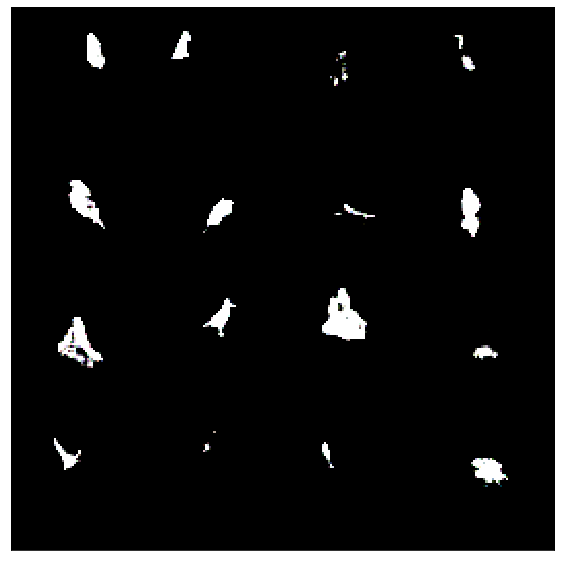

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


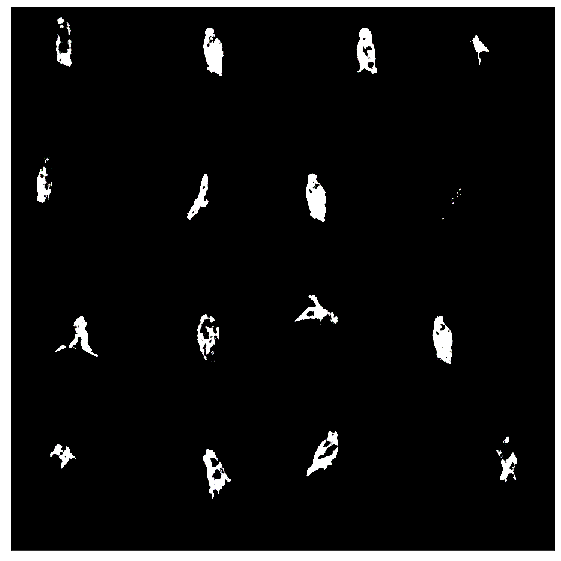

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 5


  0%|                                                                             | 3/17500 [00:13<45:36:13,  9.38s/it]

Train Epoch: 5 [0/280000 (0%)]	Loss: 0.027088
IOU : 0.050628662109375


  0%|▏                                                                              | 52/17500 [00:16<18:44, 15.52it/s]

Train Epoch: 5 [200/280000 (0%)]	Loss: 0.028387
IOU : 0.044036865234375


  1%|▍                                                                             | 103/17500 [00:19<20:25, 14.20it/s]

Train Epoch: 5 [400/280000 (1%)]	Loss: 0.028440
IOU : 0.0511474609375


  1%|▋                                                                             | 154/17500 [00:23<19:50, 14.57it/s]

Train Epoch: 5 [600/280000 (1%)]	Loss: 0.040904
IOU : 0.0598602294921875


  1%|▉                                                                             | 203/17500 [00:26<19:40, 14.65it/s]

Train Epoch: 5 [800/280000 (1%)]	Loss: 0.025506
IOU : 0.052642822265625


  1%|█▏                                                                            | 253/17500 [00:30<20:11, 14.23it/s]

Train Epoch: 5 [1000/280000 (1%)]	Loss: 0.026806
IOU : 0.0469207763671875


  2%|█▎                                                                            | 303/17500 [00:33<19:26, 14.74it/s]

Train Epoch: 5 [1200/280000 (2%)]	Loss: 0.024629
IOU : 0.052947998046875


  2%|█▌                                                                            | 353/17500 [00:37<21:59, 13.00it/s]

Train Epoch: 5 [1400/280000 (2%)]	Loss: 0.025006
IOU : 0.054412841796875


  2%|█▊                                                                            | 401/17500 [00:43<41:55,  6.80it/s]

Train Epoch: 5 [1600/280000 (2%)]	Loss: 0.041619
IOU : 0.048828125


  3%|██                                                                            | 451/17500 [00:49<41:04,  6.92it/s]

Train Epoch: 5 [1800/280000 (3%)]	Loss: 0.043346
IOU : 0.05902099609375


  3%|██▏                                                                           | 501/17500 [00:55<40:55,  6.92it/s]

Train Epoch: 5 [2000/280000 (3%)]	Loss: 0.035899
IOU : 0.0567169189453125


  3%|██▍                                                                           | 551/17500 [01:01<40:46,  6.93it/s]

Train Epoch: 5 [2200/280000 (3%)]	Loss: 0.026543
IOU : 0.0657196044921875


  3%|██▋                                                                           | 603/17500 [01:05<17:59, 15.65it/s]

Train Epoch: 5 [2400/280000 (3%)]	Loss: 0.028811
IOU : 0.0567169189453125


  4%|██▉                                                                           | 654/17500 [01:09<19:27, 14.43it/s]

Train Epoch: 5 [2600/280000 (4%)]	Loss: 0.037097
IOU : 0.060516357421875


  4%|███▏                                                                          | 702/17500 [01:12<18:25, 15.20it/s]

Train Epoch: 5 [2800/280000 (4%)]	Loss: 0.038291
IOU : 0.0631256103515625


  4%|███▎                                                                        | 751/17500 [01:18<1:14:53,  3.73it/s]

Train Epoch: 5 [3000/280000 (4%)]	Loss: 0.035399
IOU : 0.056396484375


  5%|███▌                                                                          | 802/17500 [01:26<19:53, 13.99it/s]

Train Epoch: 5 [3200/280000 (5%)]	Loss: 0.029168
IOU : 0.052490234375


  5%|███▊                                                                          | 852/17500 [01:29<18:59, 14.61it/s]

Train Epoch: 5 [3400/280000 (5%)]	Loss: 0.031215
IOU : 0.051239013671875


  5%|████                                                                          | 902/17500 [01:33<19:31, 14.16it/s]

Train Epoch: 5 [3600/280000 (5%)]	Loss: 0.031428
IOU : 0.0501861572265625


  5%|████▏                                                                       | 951/17500 [01:38<1:12:42,  3.79it/s]

Train Epoch: 5 [3800/280000 (5%)]	Loss: 0.034514
IOU : 0.05230712890625


  6%|████▍                                                                        | 1002/17500 [01:46<18:56, 14.51it/s]

Train Epoch: 5 [4000/280000 (6%)]	Loss: 0.026096
IOU : 0.0510711669921875


  6%|████▋                                                                        | 1052/17500 [01:49<19:35, 14.00it/s]

Train Epoch: 5 [4200/280000 (6%)]	Loss: 0.032798
IOU : 0.0518341064453125


  6%|████▊                                                                        | 1102/17500 [01:53<18:08, 15.07it/s]

Train Epoch: 5 [4400/280000 (6%)]	Loss: 0.030735
IOU : 0.0497894287109375


  7%|█████                                                                        | 1152/17500 [01:57<30:04,  9.06it/s]

Train Epoch: 5 [4600/280000 (7%)]	Loss: 0.036424
IOU : 0.0501861572265625


  7%|█████▎                                                                       | 1201/17500 [02:03<39:26,  6.89it/s]

Train Epoch: 5 [4800/280000 (7%)]	Loss: 0.027057
IOU : 0.0469512939453125


  7%|█████▌                                                                       | 1251/17500 [02:09<39:06,  6.93it/s]

Train Epoch: 5 [5000/280000 (7%)]	Loss: 0.030083
IOU : 0.0482635498046875


  7%|█████▋                                                                       | 1304/17500 [02:15<20:20, 13.26it/s]

Train Epoch: 5 [5200/280000 (7%)]	Loss: 0.028885
IOU : 0.052734375


  8%|█████▉                                                                       | 1354/17500 [02:19<18:05, 14.88it/s]

Train Epoch: 5 [5400/280000 (8%)]	Loss: 0.028065
IOU : 0.0582275390625


  8%|██████▏                                                                      | 1403/17500 [02:22<20:11, 13.29it/s]

Train Epoch: 5 [5600/280000 (8%)]	Loss: 0.025178
IOU : 0.05401611328125


  8%|██████▏                                                                    | 1451/17500 [02:28<1:11:24,  3.75it/s]

Train Epoch: 5 [5800/280000 (8%)]	Loss: 0.027918
IOU : 0.0527801513671875


  9%|██████▌                                                                      | 1504/17500 [02:36<15:05, 17.66it/s]

Train Epoch: 5 [6000/280000 (9%)]	Loss: 0.024509
IOU : 0.0475311279296875


  9%|██████▊                                                                      | 1554/17500 [02:39<17:32, 15.15it/s]

Train Epoch: 5 [6200/280000 (9%)]	Loss: 0.026896
IOU : 0.0521697998046875


  9%|███████                                                                      | 1602/17500 [02:43<20:36, 12.86it/s]

Train Epoch: 5 [6400/280000 (9%)]	Loss: 0.050705
IOU : 0.063873291015625


  9%|███████▎                                                                     | 1651/17500 [02:48<38:24,  6.88it/s]

Train Epoch: 5 [6600/280000 (9%)]	Loss: 0.028912
IOU : 0.054412841796875


 10%|███████▍                                                                     | 1701/17500 [02:55<38:02,  6.92it/s]

Train Epoch: 5 [6800/280000 (10%)]	Loss: 0.033032
IOU : 0.057830810546875


 10%|███████▋                                                                     | 1753/17500 [03:01<24:35, 10.67it/s]

Train Epoch: 5 [7000/280000 (10%)]	Loss: 0.026085
IOU : 0.0474700927734375


 10%|███████▉                                                                     | 1803/17500 [03:04<18:05, 14.46it/s]

Train Epoch: 5 [7200/280000 (10%)]	Loss: 0.033307
IOU : 0.0526123046875


 11%|████████▏                                                                    | 1853/17500 [03:08<18:39, 13.98it/s]

Train Epoch: 5 [7400/280000 (11%)]	Loss: 0.039920
IOU : 0.0540924072265625


 11%|████████▎                                                                    | 1903/17500 [03:11<19:45, 13.15it/s]

Train Epoch: 5 [7600/280000 (11%)]	Loss: 0.033262
IOU : 0.04931640625


 11%|████████▌                                                                    | 1951/17500 [03:16<37:37,  6.89it/s]

Train Epoch: 5 [7800/280000 (11%)]	Loss: 0.028187
IOU : 0.0506439208984375


 11%|████████▊                                                                    | 2001/17500 [03:22<37:29,  6.89it/s]

Train Epoch: 5 [8000/280000 (11%)]	Loss: 0.032286
IOU : 0.053070068359375


 12%|█████████                                                                    | 2051/17500 [03:28<37:21,  6.89it/s]

Train Epoch: 5 [8200/280000 (12%)]	Loss: 0.024366
IOU : 0.053955078125


 12%|█████████▏                                                                   | 2101/17500 [03:35<37:14,  6.89it/s]

Train Epoch: 5 [8400/280000 (12%)]	Loss: 0.029106
IOU : 0.0542449951171875


 12%|█████████▍                                                                   | 2152/17500 [03:39<17:29, 14.62it/s]

Train Epoch: 5 [8600/280000 (12%)]	Loss: 0.041783
IOU : 0.05804443359375


 13%|█████████▋                                                                   | 2202/17500 [03:43<17:49, 14.30it/s]

Train Epoch: 5 [8800/280000 (13%)]	Loss: 0.034809
IOU : 0.056854248046875


 13%|█████████▉                                                                   | 2251/17500 [03:47<34:40,  7.33it/s]

Train Epoch: 5 [9000/280000 (13%)]	Loss: 0.030290
IOU : 0.0552825927734375


 13%|██████████                                                                   | 2301/17500 [03:53<36:29,  6.94it/s]

Train Epoch: 5 [9200/280000 (13%)]	Loss: 0.032691
IOU : 0.055938720703125


 13%|██████████▎                                                                  | 2353/17500 [03:59<26:25,  9.55it/s]

Train Epoch: 5 [9400/280000 (13%)]	Loss: 0.024779
IOU : 0.050811767578125


 14%|██████████▌                                                                  | 2403/17500 [04:03<17:51, 14.09it/s]

Train Epoch: 5 [9600/280000 (14%)]	Loss: 0.032065
IOU : 0.049346923828125


 14%|██████████▊                                                                  | 2453/17500 [04:06<18:11, 13.78it/s]

Train Epoch: 5 [9800/280000 (14%)]	Loss: 0.024688
IOU : 0.0516204833984375


 14%|███████████                                                                  | 2503/17500 [04:10<17:14, 14.50it/s]

Train Epoch: 5 [10000/280000 (14%)]	Loss: 0.031183
IOU : 0.0563507080078125


 15%|███████████▏                                                                 | 2553/17500 [04:13<16:49, 14.81it/s]

Train Epoch: 5 [10200/280000 (15%)]	Loss: 0.025472
IOU : 0.0511474609375


 15%|███████████▍                                                                 | 2601/17500 [04:17<34:55,  7.11it/s]

Train Epoch: 5 [10400/280000 (15%)]	Loss: 0.045076
IOU : 0.0624542236328125


 15%|███████████▋                                                                 | 2651/17500 [04:24<35:41,  6.93it/s]

Train Epoch: 5 [10600/280000 (15%)]	Loss: 0.023276
IOU : 0.0511474609375


 15%|███████████▉                                                                 | 2701/17500 [04:30<35:36,  6.93it/s]

Train Epoch: 5 [10800/280000 (15%)]	Loss: 0.034068
IOU : 0.0562744140625


 16%|████████████                                                                 | 2753/17500 [04:36<31:42,  7.75it/s]

Train Epoch: 5 [11000/280000 (16%)]	Loss: 0.036805
IOU : 0.050567626953125


 16%|████████████▎                                                                | 2803/17500 [04:43<29:52,  8.20it/s]

Train Epoch: 5 [11200/280000 (16%)]	Loss: 0.030971
IOU : 0.05572509765625


 16%|████████████▌                                                                | 2852/17500 [04:46<14:33, 16.76it/s]

Train Epoch: 5 [11400/280000 (16%)]	Loss: 0.026340
IOU : 0.0497283935546875


 17%|████████████▊                                                                | 2902/17500 [04:49<16:53, 14.40it/s]

Train Epoch: 5 [11600/280000 (17%)]	Loss: 0.024544
IOU : 0.049530029296875


 17%|████████████▋                                                              | 2951/17500 [04:57<1:06:00,  3.67it/s]

Train Epoch: 5 [11800/280000 (17%)]	Loss: 0.027948
IOU : 0.0593109130859375


 17%|█████████████▏                                                               | 3003/17500 [05:02<17:17, 13.97it/s]

Train Epoch: 5 [12000/280000 (17%)]	Loss: 0.030537
IOU : 0.057373046875


 17%|█████████████▍                                                               | 3053/17500 [05:06<15:45, 15.28it/s]

Train Epoch: 5 [12200/280000 (17%)]	Loss: 0.024787
IOU : 0.0471038818359375


 18%|█████████████▋                                                               | 3103/17500 [05:10<18:41, 12.84it/s]

Train Epoch: 5 [12400/280000 (18%)]	Loss: 0.025228
IOU : 0.050567626953125


 18%|█████████████▊                                                               | 3153/17500 [05:14<19:18, 12.38it/s]

Train Epoch: 5 [12600/280000 (18%)]	Loss: 0.029565
IOU : 0.057647705078125


 18%|██████████████                                                               | 3203/17500 [05:18<18:28, 12.90it/s]

Train Epoch: 5 [12800/280000 (18%)]	Loss: 0.026649
IOU : 0.052032470703125


 19%|██████████████▎                                                              | 3251/17500 [05:22<32:45,  7.25it/s]

Train Epoch: 5 [13000/280000 (19%)]	Loss: 0.034083
IOU : 0.0518341064453125


 19%|██████████████▌                                                              | 3301/17500 [05:28<34:13,  6.92it/s]

Train Epoch: 5 [13200/280000 (19%)]	Loss: 0.036949
IOU : 0.0563812255859375


 19%|██████████████▋                                                              | 3351/17500 [05:34<34:36,  6.81it/s]

Train Epoch: 5 [13400/280000 (19%)]	Loss: 0.031423
IOU : 0.052581787109375


 19%|██████████████▉                                                              | 3404/17500 [05:41<22:35, 10.40it/s]

Train Epoch: 5 [13600/280000 (19%)]	Loss: 0.025811
IOU : 0.05364990234375


 20%|███████████████▏                                                             | 3452/17500 [05:44<16:45, 13.97it/s]

Train Epoch: 5 [13800/280000 (20%)]	Loss: 0.035755
IOU : 0.049224853515625


 20%|███████████████▍                                                             | 3503/17500 [05:48<16:47, 13.89it/s]

Train Epoch: 5 [14000/280000 (20%)]	Loss: 0.023727
IOU : 0.05181884765625


 20%|███████████████▋                                                             | 3553/17500 [05:52<16:46, 13.85it/s]

Train Epoch: 5 [14200/280000 (20%)]	Loss: 0.025160
IOU : 0.0447998046875


 21%|███████████████▊                                                             | 3601/17500 [05:56<33:17,  6.96it/s]

Train Epoch: 5 [14400/280000 (21%)]	Loss: 0.025596
IOU : 0.0507965087890625


 21%|████████████████                                                             | 3651/17500 [06:02<33:28,  6.89it/s]

Train Epoch: 5 [14600/280000 (21%)]	Loss: 0.036473
IOU : 0.0512542724609375


 21%|████████████████▎                                                            | 3701/17500 [06:08<33:35,  6.85it/s]

Train Epoch: 5 [14800/280000 (21%)]	Loss: 0.023198
IOU : 0.043487548828125


 21%|████████████████▌                                                            | 3751/17500 [06:15<33:04,  6.93it/s]

Train Epoch: 5 [15000/280000 (21%)]	Loss: 0.032441
IOU : 0.0519256591796875


 22%|████████████████▋                                                            | 3804/17500 [06:20<14:07, 16.16it/s]

Train Epoch: 5 [15200/280000 (22%)]	Loss: 0.037706
IOU : 0.053466796875


 22%|████████████████▉                                                            | 3853/17500 [06:23<15:21, 14.81it/s]

Train Epoch: 5 [15400/280000 (22%)]	Loss: 0.030857
IOU : 0.0550689697265625


 22%|█████████████████▏                                                           | 3903/17500 [06:26<15:21, 14.76it/s]

Train Epoch: 5 [15600/280000 (22%)]	Loss: 0.027031
IOU : 0.0482177734375


 23%|█████████████████▍                                                           | 3953/17500 [06:30<17:19, 13.04it/s]

Train Epoch: 5 [15800/280000 (23%)]	Loss: 0.036881
IOU : 0.0474853515625


 23%|█████████████████▌                                                           | 4003/17500 [06:34<17:51, 12.60it/s]

Train Epoch: 5 [16000/280000 (23%)]	Loss: 0.041012
IOU : 0.0585174560546875


 23%|█████████████████▊                                                           | 4051/17500 [06:40<32:24,  6.92it/s]

Train Epoch: 5 [16200/280000 (23%)]	Loss: 0.033770
IOU : 0.0578460693359375


 23%|██████████████████                                                           | 4101/17500 [06:46<32:14,  6.93it/s]

Train Epoch: 5 [16400/280000 (23%)]	Loss: 0.026119
IOU : 0.0504608154296875


 24%|██████████████████▎                                                          | 4151/17500 [06:52<32:06,  6.93it/s]

Train Epoch: 5 [16600/280000 (24%)]	Loss: 0.025083
IOU : 0.0514068603515625


 24%|██████████████████▍                                                          | 4201/17500 [06:59<32:07,  6.90it/s]

Train Epoch: 5 [16800/280000 (24%)]	Loss: 0.028185
IOU : 0.04254150390625


 24%|██████████████████▋                                                          | 4252/17500 [07:02<15:37, 14.12it/s]

Train Epoch: 5 [17000/280000 (24%)]	Loss: 0.024455
IOU : 0.0581512451171875


 25%|██████████████████▉                                                          | 4302/17500 [07:06<16:01, 13.73it/s]

Train Epoch: 5 [17200/280000 (25%)]	Loss: 0.033067
IOU : 0.04254150390625


 25%|███████████████████▏                                                         | 4351/17500 [07:15<34:41,  6.32it/s]

Train Epoch: 5 [17400/280000 (25%)]	Loss: 0.029071
IOU : 0.0528106689453125


 25%|███████████████████▎                                                         | 4403/17500 [07:21<21:51,  9.99it/s]

Train Epoch: 5 [17600/280000 (25%)]	Loss: 0.027941
IOU : 0.0479583740234375


 25%|███████████████████▌                                                         | 4453/17500 [07:24<15:44, 13.82it/s]

Train Epoch: 5 [17800/280000 (25%)]	Loss: 0.026386
IOU : 0.0583953857421875


 26%|███████████████████▊                                                         | 4502/17500 [07:28<15:58, 13.57it/s]

Train Epoch: 5 [18000/280000 (26%)]	Loss: 0.031741
IOU : 0.0568695068359375


 26%|████████████████████                                                         | 4554/17500 [07:31<15:16, 14.12it/s]

Train Epoch: 5 [18200/280000 (26%)]	Loss: 0.030284
IOU : 0.055938720703125


 26%|████████████████████▏                                                        | 4601/17500 [07:35<30:05,  7.14it/s]

Train Epoch: 5 [18400/280000 (26%)]	Loss: 0.027631
IOU : 0.0491485595703125


 27%|████████████████████▍                                                        | 4651/17500 [07:41<31:00,  6.91it/s]

Train Epoch: 5 [18600/280000 (27%)]	Loss: 0.037645
IOU : 0.0627593994140625


 27%|████████████████████▋                                                        | 4701/17500 [07:48<31:00,  6.88it/s]

Train Epoch: 5 [18800/280000 (27%)]	Loss: 0.027789
IOU : 0.0526580810546875


 27%|████████████████████▉                                                        | 4751/17500 [07:54<30:38,  6.93it/s]

Train Epoch: 5 [19000/280000 (27%)]	Loss: 0.029310
IOU : 0.057830810546875


 27%|█████████████████████▏                                                       | 4804/17500 [08:00<18:02, 11.73it/s]

Train Epoch: 5 [19200/280000 (27%)]	Loss: 0.033421
IOU : 0.0541229248046875


 28%|█████████████████████▎                                                       | 4852/17500 [08:03<15:03, 14.00it/s]

Train Epoch: 5 [19400/280000 (28%)]	Loss: 0.026667
IOU : 0.0532379150390625


 28%|█████████████████████▌                                                       | 4902/17500 [08:07<14:40, 14.31it/s]

Train Epoch: 5 [19600/280000 (28%)]	Loss: 0.034935
IOU : 0.0527191162109375


 28%|█████████████████████▊                                                       | 4952/17500 [08:11<20:04, 10.42it/s]

Train Epoch: 5 [19800/280000 (28%)]	Loss: 0.036828
IOU : 0.05865478515625


 29%|██████████████████████                                                       | 5001/17500 [08:17<30:03,  6.93it/s]

Train Epoch: 5 [20000/280000 (29%)]	Loss: 0.032837
IOU : 0.0516357421875


 29%|██████████████████████▏                                                      | 5051/17500 [08:23<29:54,  6.94it/s]

Train Epoch: 5 [20200/280000 (29%)]	Loss: 0.034146
IOU : 0.062713623046875


 29%|██████████████████████▍                                                      | 5101/17500 [08:29<29:46,  6.94it/s]

Train Epoch: 5 [20400/280000 (29%)]	Loss: 0.025509
IOU : 0.045501708984375


 29%|██████████████████████▋                                                      | 5153/17500 [08:35<15:57, 12.89it/s]

Train Epoch: 5 [20600/280000 (29%)]	Loss: 0.024642
IOU : 0.0540618896484375


 30%|██████████████████████▉                                                      | 5203/17500 [08:38<12:59, 15.78it/s]

Train Epoch: 5 [20800/280000 (30%)]	Loss: 0.032959
IOU : 0.0598297119140625


 30%|███████████████████████                                                      | 5253/17500 [08:42<13:38, 14.96it/s]

Train Epoch: 5 [21000/280000 (30%)]	Loss: 0.027002
IOU : 0.0523529052734375


 30%|███████████████████████▎                                                     | 5303/17500 [08:46<16:06, 12.62it/s]

Train Epoch: 5 [21200/280000 (30%)]	Loss: 0.021984
IOU : 0.0516357421875


 31%|███████████████████████▌                                                     | 5353/17500 [08:50<15:50, 12.78it/s]

Train Epoch: 5 [21400/280000 (31%)]	Loss: 0.026752
IOU : 0.054046630859375


 31%|███████████████████████▊                                                     | 5403/17500 [08:54<16:06, 12.52it/s]

Train Epoch: 5 [21600/280000 (31%)]	Loss: 0.030031
IOU : 0.051971435546875


 31%|███████████████████████▉                                                     | 5451/17500 [08:59<29:06,  6.90it/s]

Train Epoch: 5 [21800/280000 (31%)]	Loss: 0.030776
IOU : 0.05364990234375


 31%|████████████████████████▏                                                    | 5503/17500 [09:06<25:59,  7.69it/s]

Train Epoch: 5 [22000/280000 (31%)]	Loss: 0.029052
IOU : 0.061187744140625


 32%|████████████████████████▍                                                    | 5551/17500 [09:12<28:55,  6.88it/s]

Train Epoch: 5 [22200/280000 (32%)]	Loss: 0.031123
IOU : 0.0484161376953125


 32%|████████████████████████▋                                                    | 5601/17500 [09:18<28:35,  6.94it/s]

Train Epoch: 5 [22400/280000 (32%)]	Loss: 0.027270
IOU : 0.0516815185546875


 32%|████████████████████████▊                                                    | 5653/17500 [09:22<14:42, 13.42it/s]

Train Epoch: 5 [22600/280000 (32%)]	Loss: 0.026068
IOU : 0.057342529296875


 33%|█████████████████████████                                                    | 5703/17500 [09:26<14:57, 13.15it/s]

Train Epoch: 5 [22800/280000 (33%)]	Loss: 0.029619
IOU : 0.05889892578125


 33%|█████████████████████████▎                                                   | 5754/17500 [09:29<13:56, 14.04it/s]

Train Epoch: 5 [23000/280000 (33%)]	Loss: 0.029777
IOU : 0.0618133544921875


 33%|█████████████████████████▌                                                   | 5801/17500 [09:34<28:13,  6.91it/s]

Train Epoch: 5 [23200/280000 (33%)]	Loss: 0.023402
IOU : 0.0511474609375


 33%|█████████████████████████▋                                                   | 5851/17500 [09:41<27:56,  6.95it/s]

Train Epoch: 5 [23400/280000 (33%)]	Loss: 0.032431
IOU : 0.0650634765625


 34%|█████████████████████████▉                                                   | 5903/17500 [09:47<24:58,  7.74it/s]

Train Epoch: 5 [23600/280000 (34%)]	Loss: 0.031463
IOU : 0.053924560546875


 34%|██████████████████████████▏                                                  | 5953/17500 [09:52<11:42, 16.43it/s]

Train Epoch: 5 [23800/280000 (34%)]	Loss: 0.026675
IOU : 0.04901123046875


 34%|██████████████████████████▍                                                  | 6003/17500 [09:56<13:11, 14.53it/s]

Train Epoch: 5 [24000/280000 (34%)]	Loss: 0.039116
IOU : 0.0652008056640625


 35%|██████████████████████████▌                                                  | 6051/17500 [09:59<12:25, 15.35it/s]

Train Epoch: 5 [24200/280000 (35%)]	Loss: 0.027688
IOU : 0.0512847900390625


 35%|██████████████████████████▊                                                  | 6101/17500 [10:04<50:27,  3.77it/s]

Train Epoch: 5 [24400/280000 (35%)]	Loss: 0.033840
IOU : 0.05706787109375


 35%|███████████████████████████                                                  | 6154/17500 [10:11<12:57, 14.60it/s]

Train Epoch: 5 [24600/280000 (35%)]	Loss: 0.024451
IOU : 0.05584716796875


 35%|███████████████████████████▎                                                 | 6204/17500 [10:15<12:41, 14.84it/s]

Train Epoch: 5 [24800/280000 (35%)]	Loss: 0.029358
IOU : 0.0492706298828125


 36%|███████████████████████████▌                                                 | 6254/17500 [10:18<13:00, 14.40it/s]

Train Epoch: 5 [25000/280000 (36%)]	Loss: 0.033436
IOU : 0.0518646240234375


 36%|███████████████████████████▋                                                 | 6301/17500 [10:23<27:00,  6.91it/s]

Train Epoch: 5 [25200/280000 (36%)]	Loss: 0.038318
IOU : 0.05499267578125


 36%|███████████████████████████▉                                                 | 6351/17500 [10:30<26:55,  6.90it/s]

Train Epoch: 5 [25400/280000 (36%)]	Loss: 0.029330
IOU : 0.054168701171875


 37%|████████████████████████████▏                                                | 6401/17500 [10:36<26:45,  6.91it/s]

Train Epoch: 5 [25600/280000 (37%)]	Loss: 0.024562
IOU : 0.047943115234375


 37%|████████████████████████████▍                                                | 6453/17500 [10:42<17:54, 10.28it/s]

Train Epoch: 5 [25800/280000 (37%)]	Loss: 0.026167
IOU : 0.047515869140625


 37%|████████████████████████████▌                                                | 6502/17500 [10:45<12:30, 14.65it/s]

Train Epoch: 5 [26000/280000 (37%)]	Loss: 0.027832
IOU : 0.060516357421875


 37%|████████████████████████████▊                                                | 6553/17500 [10:49<12:08, 15.02it/s]

Train Epoch: 5 [26200/280000 (37%)]	Loss: 0.025029
IOU : 0.0521087646484375


 38%|█████████████████████████████                                                | 6603/17500 [10:53<14:39, 12.39it/s]

Train Epoch: 5 [26400/280000 (38%)]	Loss: 0.024779
IOU : 0.0475921630859375


 38%|█████████████████████████████▎                                               | 6653/17500 [10:57<14:05, 12.84it/s]

Train Epoch: 5 [26600/280000 (38%)]	Loss: 0.048415
IOU : 0.0601806640625


 38%|█████████████████████████████▍                                               | 6703/17500 [11:01<13:57, 12.89it/s]

Train Epoch: 5 [26800/280000 (38%)]	Loss: 0.024036
IOU : 0.04766845703125


 39%|█████████████████████████████▋                                               | 6753/17500 [11:05<13:57, 12.83it/s]

Train Epoch: 5 [27000/280000 (39%)]	Loss: 0.028396
IOU : 0.05889892578125


 39%|█████████████████████████████▉                                               | 6801/17500 [11:15<47:50,  3.73it/s]

Train Epoch: 5 [27200/280000 (39%)]	Loss: 0.030541
IOU : 0.05511474609375


 39%|██████████████████████████████▏                                              | 6851/17500 [11:20<12:51, 13.81it/s]

Train Epoch: 5 [27400/280000 (39%)]	Loss: 0.025153
IOU : 0.0503082275390625


 39%|██████████████████████████████▍                                              | 6904/17500 [11:24<12:10, 14.50it/s]

Train Epoch: 5 [27600/280000 (39%)]	Loss: 0.032624
IOU : 0.0550079345703125


 40%|██████████████████████████████▌                                              | 6952/17500 [11:27<11:54, 14.76it/s]

Train Epoch: 5 [27800/280000 (40%)]	Loss: 0.025758
IOU : 0.0505828857421875


 40%|██████████████████████████████▊                                              | 7002/17500 [11:31<11:27, 15.26it/s]

Train Epoch: 5 [28000/280000 (40%)]	Loss: 0.033481
IOU : 0.050994873046875


 40%|███████████████████████████████                                              | 7051/17500 [11:36<25:12,  6.91it/s]

Train Epoch: 5 [28200/280000 (40%)]	Loss: 0.029991
IOU : 0.0510711669921875


 41%|███████████████████████████████▏                                             | 7101/17500 [11:42<25:00,  6.93it/s]

Train Epoch: 5 [28400/280000 (41%)]	Loss: 0.022397
IOU : 0.0548095703125


 41%|███████████████████████████████▍                                             | 7151/17500 [11:49<24:49,  6.95it/s]

Train Epoch: 5 [28600/280000 (41%)]	Loss: 0.030119
IOU : 0.0560455322265625


 41%|███████████████████████████████▋                                             | 7201/17500 [11:55<24:39,  6.96it/s]

Train Epoch: 5 [28800/280000 (41%)]	Loss: 0.028006
IOU : 0.0507049560546875


 41%|███████████████████████████████▉                                             | 7252/17500 [12:00<10:59, 15.54it/s]

Train Epoch: 5 [29000/280000 (41%)]	Loss: 0.032919
IOU : 0.05560302734375


 42%|████████████████████████████████▏                                            | 7303/17500 [12:03<11:41, 14.53it/s]

Train Epoch: 5 [29200/280000 (42%)]	Loss: 0.029590
IOU : 0.049713134765625


 42%|████████████████████████████████▎                                            | 7353/17500 [12:07<13:16, 12.75it/s]

Train Epoch: 5 [29400/280000 (42%)]	Loss: 0.026932
IOU : 0.0548095703125


 42%|████████████████████████████████▌                                            | 7403/17500 [12:12<21:56,  7.67it/s]

Train Epoch: 5 [29600/280000 (42%)]	Loss: 0.024671
IOU : 0.0453643798828125


 43%|████████████████████████████████▊                                            | 7451/17500 [12:18<24:08,  6.94it/s]

Train Epoch: 5 [29800/280000 (43%)]	Loss: 0.030514
IOU : 0.0571746826171875


 43%|█████████████████████████████████                                            | 7501/17500 [12:24<23:59,  6.94it/s]

Train Epoch: 5 [30000/280000 (43%)]	Loss: 0.025899
IOU : 0.0454864501953125


 43%|█████████████████████████████████▏                                           | 7553/17500 [12:31<19:23,  8.55it/s]

Train Epoch: 5 [30200/280000 (43%)]	Loss: 0.026948
IOU : 0.0458221435546875


 43%|█████████████████████████████████▍                                           | 7603/17500 [12:34<11:54, 13.85it/s]

Train Epoch: 5 [30400/280000 (43%)]	Loss: 0.031878
IOU : 0.054290771484375


 44%|█████████████████████████████████▋                                           | 7653/17500 [12:38<11:16, 14.56it/s]

Train Epoch: 5 [30600/280000 (44%)]	Loss: 0.038386
IOU : 0.0640869140625


 44%|█████████████████████████████████▉                                           | 7701/17500 [12:41<10:50, 15.07it/s]

Train Epoch: 5 [30800/280000 (44%)]	Loss: 0.029705
IOU : 0.050628662109375


 44%|██████████████████████████████████                                           | 7751/17500 [12:47<23:27,  6.92it/s]

Train Epoch: 5 [31000/280000 (44%)]	Loss: 0.028074
IOU : 0.052947998046875


 45%|██████████████████████████████████▎                                          | 7801/17500 [12:53<23:26,  6.89it/s]

Train Epoch: 5 [31200/280000 (45%)]	Loss: 0.031341
IOU : 0.05426025390625


 45%|██████████████████████████████████▌                                          | 7851/17500 [13:00<23:11,  6.94it/s]

Train Epoch: 5 [31400/280000 (45%)]	Loss: 0.022613
IOU : 0.0407257080078125


 45%|██████████████████████████████████▊                                          | 7903/17500 [13:05<10:36, 15.08it/s]

Train Epoch: 5 [31600/280000 (45%)]	Loss: 0.029630
IOU : 0.0557403564453125


 45%|██████████████████████████████████▉                                          | 7952/17500 [13:09<11:34, 13.76it/s]

Train Epoch: 5 [31800/280000 (45%)]	Loss: 0.035368
IOU : 0.05181884765625


 46%|███████████████████████████████████▏                                         | 8004/17500 [13:12<11:13, 14.10it/s]

Train Epoch: 5 [32000/280000 (46%)]	Loss: 0.030005
IOU : 0.055633544921875


 46%|███████████████████████████████████▍                                         | 8051/17500 [13:18<41:17,  3.81it/s]

Train Epoch: 5 [32200/280000 (46%)]	Loss: 0.031580
IOU : 0.0572509765625


 46%|███████████████████████████████████▋                                         | 8104/17500 [13:25<08:58, 17.46it/s]

Train Epoch: 5 [32400/280000 (46%)]	Loss: 0.029943
IOU : 0.0574951171875


 47%|███████████████████████████████████▉                                         | 8154/17500 [13:28<10:32, 14.77it/s]

Train Epoch: 5 [32600/280000 (47%)]	Loss: 0.027529
IOU : 0.054168701171875


 47%|████████████████████████████████████                                         | 8201/17500 [13:36<41:37,  3.72it/s]

Train Epoch: 5 [32800/280000 (47%)]	Loss: 0.026282
IOU : 0.0504608154296875


 47%|████████████████████████████████████▎                                        | 8252/17500 [13:40<10:26, 14.76it/s]

Train Epoch: 5 [33000/280000 (47%)]	Loss: 0.026884
IOU : 0.04962158203125


 47%|████████████████████████████████████▌                                        | 8302/17500 [13:44<10:30, 14.58it/s]

Train Epoch: 5 [33200/280000 (47%)]	Loss: 0.028318
IOU : 0.0458221435546875


 48%|████████████████████████████████████▋                                        | 8352/17500 [13:47<10:42, 14.24it/s]

Train Epoch: 5 [33400/280000 (48%)]	Loss: 0.029309
IOU : 0.0510711669921875


 48%|████████████████████████████████████▉                                        | 8402/17500 [13:51<11:00, 13.77it/s]

Train Epoch: 5 [33600/280000 (48%)]	Loss: 0.030034
IOU : 0.050201416015625


 48%|█████████████████████████████████████▏                                       | 8451/17500 [13:59<40:47,  3.70it/s]

Train Epoch: 5 [33800/280000 (48%)]	Loss: 0.025182
IOU : 0.053680419921875


 49%|█████████████████████████████████████▍                                       | 8503/17500 [14:05<10:40, 14.06it/s]

Train Epoch: 5 [34000/280000 (49%)]	Loss: 0.027119
IOU : 0.0485992431640625


 49%|█████████████████████████████████████▋                                       | 8553/17500 [14:08<10:02, 14.85it/s]

Train Epoch: 5 [34200/280000 (49%)]	Loss: 0.032159
IOU : 0.0540924072265625


 49%|█████████████████████████████████████▊                                       | 8603/17500 [14:12<11:16, 13.16it/s]

Train Epoch: 5 [34400/280000 (49%)]	Loss: 0.031903
IOU : 0.0545654296875


 49%|██████████████████████████████████████                                       | 8653/17500 [14:16<10:23, 14.18it/s]

Train Epoch: 5 [34600/280000 (49%)]	Loss: 0.030469
IOU : 0.0531463623046875


 50%|██████████████████████████████████████▎                                      | 8701/17500 [14:20<21:20,  6.87it/s]

Train Epoch: 5 [34800/280000 (50%)]	Loss: 0.028216
IOU : 0.05712890625


 50%|██████████████████████████████████████▌                                      | 8751/17500 [14:26<21:06,  6.91it/s]

Train Epoch: 5 [35000/280000 (50%)]	Loss: 0.032806
IOU : 0.052764892578125


 50%|██████████████████████████████████████▋                                      | 8801/17500 [14:33<20:57,  6.92it/s]

Train Epoch: 5 [35200/280000 (50%)]	Loss: 0.027920
IOU : 0.06219482421875


 51%|██████████████████████████████████████▉                                      | 8851/17500 [14:39<20:47,  6.93it/s]

Train Epoch: 5 [35400/280000 (51%)]	Loss: 0.037731
IOU : 0.0601654052734375


 51%|███████████████████████████████████████▏                                     | 8904/17500 [14:44<09:28, 15.12it/s]

Train Epoch: 5 [35600/280000 (51%)]	Loss: 0.023742
IOU : 0.05535888671875


 51%|███████████████████████████████████████▍                                     | 8952/17500 [14:47<09:43, 14.65it/s]

Train Epoch: 5 [35800/280000 (51%)]	Loss: 0.038609
IOU : 0.0617828369140625


 51%|███████████████████████████████████████▌                                     | 9002/17500 [14:51<10:24, 13.61it/s]

Train Epoch: 5 [36000/280000 (51%)]	Loss: 0.031261
IOU : 0.0552978515625


 52%|███████████████████████████████████████▊                                     | 9051/17500 [15:01<21:43,  6.48it/s]

Train Epoch: 5 [36200/280000 (52%)]	Loss: 0.023998
IOU : 0.0518035888671875


 52%|████████████████████████████████████████                                     | 9103/17500 [15:05<08:44, 16.02it/s]

Train Epoch: 5 [36400/280000 (52%)]	Loss: 0.026049
IOU : 0.0525054931640625


 52%|████████████████████████████████████████▎                                    | 9154/17500 [15:08<09:12, 15.12it/s]

Train Epoch: 5 [36600/280000 (52%)]	Loss: 0.027926
IOU : 0.050933837890625


 53%|████████████████████████████████████████▍                                    | 9202/17500 [15:12<09:29, 14.58it/s]

Train Epoch: 5 [36800/280000 (53%)]	Loss: 0.029660
IOU : 0.0570220947265625


 53%|████████████████████████████████████████▋                                    | 9251/17500 [15:17<20:04,  6.85it/s]

Train Epoch: 5 [37000/280000 (53%)]	Loss: 0.026712
IOU : 0.0482177734375


 53%|████████████████████████████████████████▉                                    | 9301/17500 [15:23<19:52,  6.87it/s]

Train Epoch: 5 [37200/280000 (53%)]	Loss: 0.036020
IOU : 0.0545501708984375


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [15:30<19:40,  6.90it/s]

Train Epoch: 5 [37400/280000 (53%)]	Loss: 0.030708
IOU : 0.0546722412109375


 54%|█████████████████████████████████████████▎                                   | 9402/17500 [15:35<10:33, 12.77it/s]

Train Epoch: 5 [37600/280000 (54%)]	Loss: 0.027775
IOU : 0.05462646484375


 54%|█████████████████████████████████████████▌                                   | 9453/17500 [15:39<09:19, 14.37it/s]

Train Epoch: 5 [37800/280000 (54%)]	Loss: 0.038139
IOU : 0.058563232421875


 54%|█████████████████████████████████████████▊                                   | 9504/17500 [15:42<08:59, 14.82it/s]

Train Epoch: 5 [38000/280000 (54%)]	Loss: 0.030626
IOU : 0.0497894287109375


 55%|██████████████████████████████████████████                                   | 9551/17500 [15:48<19:08,  6.92it/s]

Train Epoch: 5 [38200/280000 (55%)]	Loss: 0.026727
IOU : 0.0502471923828125


 55%|██████████████████████████████████████████▎                                  | 9603/17500 [15:54<16:57,  7.76it/s]

Train Epoch: 5 [38400/280000 (55%)]	Loss: 0.030749
IOU : 0.047454833984375


 55%|██████████████████████████████████████████▍                                  | 9651/17500 [16:01<18:56,  6.90it/s]

Train Epoch: 5 [38600/280000 (55%)]	Loss: 0.028607
IOU : 0.0618896484375


 55%|██████████████████████████████████████████▋                                  | 9701/17500 [16:07<18:47,  6.91it/s]

Train Epoch: 5 [38800/280000 (55%)]	Loss: 0.027383
IOU : 0.0482025146484375


 56%|██████████████████████████████████████████▉                                  | 9754/17500 [16:10<08:43, 14.79it/s]

Train Epoch: 5 [39000/280000 (56%)]	Loss: 0.028431
IOU : 0.0535125732421875


 56%|███████████████████████████████████████████▏                                 | 9802/17500 [16:14<08:43, 14.71it/s]

Train Epoch: 5 [39200/280000 (56%)]	Loss: 0.028343
IOU : 0.0518951416015625


 56%|███████████████████████████████████████████▎                                 | 9852/17500 [16:17<08:22, 15.22it/s]

Train Epoch: 5 [39400/280000 (56%)]	Loss: 0.032114
IOU : 0.0537261962890625


 57%|███████████████████████████████████████████▌                                 | 9901/17500 [16:23<18:21,  6.90it/s]

Train Epoch: 5 [39600/280000 (57%)]	Loss: 0.033519
IOU : 0.05584716796875


 57%|███████████████████████████████████████████▊                                 | 9951/17500 [16:29<18:11,  6.92it/s]

Train Epoch: 5 [39800/280000 (57%)]	Loss: 0.028402
IOU : 0.053070068359375


 57%|███████████████████████████████████████████▍                                | 10001/17500 [16:35<18:10,  6.88it/s]

Train Epoch: 5 [40000/280000 (57%)]	Loss: 0.022344
IOU : 0.046722412109375


 57%|███████████████████████████████████████████▋                                | 10052/17500 [16:41<08:17, 14.98it/s]

Train Epoch: 5 [40200/280000 (57%)]	Loss: 0.030164
IOU : 0.0471038818359375


 58%|███████████████████████████████████████████▊                                | 10102/17500 [16:44<07:52, 15.64it/s]

Train Epoch: 5 [40400/280000 (58%)]	Loss: 0.033250
IOU : 0.057891845703125


 58%|████████████████████████████████████████████                                | 10153/17500 [16:48<09:07, 13.43it/s]

Train Epoch: 5 [40600/280000 (58%)]	Loss: 0.027171
IOU : 0.048187255859375


 58%|████████████████████████████████████████████▎                               | 10201/17500 [16:54<17:36,  6.91it/s]

Train Epoch: 5 [40800/280000 (58%)]	Loss: 0.032925
IOU : 0.0614166259765625


 59%|████████████████████████████████████████████▌                               | 10251/17500 [17:00<17:26,  6.93it/s]

Train Epoch: 5 [41000/280000 (59%)]	Loss: 0.036036
IOU : 0.0596160888671875


 59%|████████████████████████████████████████████▋                               | 10301/17500 [17:06<17:17,  6.94it/s]

Train Epoch: 5 [41200/280000 (59%)]	Loss: 0.037250
IOU : 0.055328369140625


 59%|████████████████████████████████████████████▉                               | 10353/17500 [17:12<10:09, 11.73it/s]

Train Epoch: 5 [41400/280000 (59%)]	Loss: 0.037164
IOU : 0.0587158203125


 59%|█████████████████████████████████████████████▏                              | 10403/17500 [17:16<08:13, 14.39it/s]

Train Epoch: 5 [41600/280000 (59%)]	Loss: 0.027107
IOU : 0.044342041015625


 60%|█████████████████████████████████████████████▍                              | 10453/17500 [17:19<08:08, 14.43it/s]

Train Epoch: 5 [41800/280000 (60%)]	Loss: 0.024263
IOU : 0.0513458251953125


 60%|█████████████████████████████████████████████▌                              | 10503/17500 [17:23<08:15, 14.12it/s]

Train Epoch: 5 [42000/280000 (60%)]	Loss: 0.030238
IOU : 0.0545806884765625


 60%|█████████████████████████████████████████████▊                              | 10551/17500 [17:27<16:38,  6.96it/s]

Train Epoch: 5 [42200/280000 (60%)]	Loss: 0.026849
IOU : 0.0501708984375


 61%|██████████████████████████████████████████████                              | 10601/17500 [17:34<16:37,  6.92it/s]

Train Epoch: 5 [42400/280000 (61%)]	Loss: 0.027972
IOU : 0.0446624755859375


 61%|██████████████████████████████████████████████▎                             | 10651/17500 [17:40<16:32,  6.90it/s]

Train Epoch: 5 [42600/280000 (61%)]	Loss: 0.035119
IOU : 0.0560455322265625


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [17:46<16:22,  6.92it/s]

Train Epoch: 5 [42800/280000 (61%)]	Loss: 0.037228
IOU : 0.0485992431640625


 61%|██████████████████████████████████████████████▋                             | 10753/17500 [17:52<13:03,  8.61it/s]

Train Epoch: 5 [43000/280000 (61%)]	Loss: 0.046281
IOU : 0.0679473876953125


 62%|██████████████████████████████████████████████▉                             | 10804/17500 [17:56<07:44, 14.40it/s]

Train Epoch: 5 [43200/280000 (62%)]	Loss: 0.034314
IOU : 0.0530548095703125


 62%|███████████████████████████████████████████████▏                            | 10854/17500 [17:59<07:52, 14.06it/s]

Train Epoch: 5 [43400/280000 (62%)]	Loss: 0.026209
IOU : 0.052581787109375


 62%|███████████████████████████████████████████████▎                            | 10902/17500 [18:03<11:49,  9.30it/s]

Train Epoch: 5 [43600/280000 (62%)]	Loss: 0.042318
IOU : 0.058074951171875


 63%|███████████████████████████████████████████████▌                            | 10951/17500 [18:09<15:45,  6.92it/s]

Train Epoch: 5 [43800/280000 (63%)]	Loss: 0.035411
IOU : 0.0537109375


 63%|███████████████████████████████████████████████▊                            | 11001/17500 [18:15<15:43,  6.89it/s]

Train Epoch: 5 [44000/280000 (63%)]	Loss: 0.026382
IOU : 0.0489349365234375


 63%|███████████████████████████████████████████████▉                            | 11052/17500 [18:22<09:48, 10.95it/s]

Train Epoch: 5 [44200/280000 (63%)]	Loss: 0.031165
IOU : 0.05645751953125


 63%|████████████████████████████████████████████████▏                           | 11104/17500 [18:26<06:37, 16.07it/s]

Train Epoch: 5 [44400/280000 (63%)]	Loss: 0.033076
IOU : 0.05377197265625


 64%|████████████████████████████████████████████████▍                           | 11152/17500 [18:29<07:13, 14.64it/s]

Train Epoch: 5 [44600/280000 (64%)]	Loss: 0.023580
IOU : 0.047332763671875


 64%|████████████████████████████████████████████████▋                           | 11204/17500 [18:33<06:48, 15.41it/s]

Train Epoch: 5 [44800/280000 (64%)]	Loss: 0.023696
IOU : 0.0479278564453125


 64%|████████████████████████████████████████████████▊                           | 11251/17500 [18:42<28:06,  3.71it/s]

Train Epoch: 5 [45000/280000 (64%)]	Loss: 0.033783
IOU : 0.054351806640625


 65%|█████████████████████████████████████████████████                           | 11303/17500 [18:46<06:50, 15.11it/s]

Train Epoch: 5 [45200/280000 (65%)]	Loss: 0.029811
IOU : 0.04888916015625


 65%|█████████████████████████████████████████████████▎                          | 11353/17500 [18:49<07:15, 14.12it/s]

Train Epoch: 5 [45400/280000 (65%)]	Loss: 0.028783
IOU : 0.0445709228515625


 65%|█████████████████████████████████████████████████▌                          | 11401/17500 [18:55<14:37,  6.95it/s]

Train Epoch: 5 [45600/280000 (65%)]	Loss: 0.031877
IOU : 0.0531463623046875


 65%|█████████████████████████████████████████████████▋                          | 11451/17500 [19:01<14:34,  6.92it/s]

Train Epoch: 5 [45800/280000 (65%)]	Loss: 0.027352
IOU : 0.0568084716796875


 66%|█████████████████████████████████████████████████▉                          | 11501/17500 [19:07<14:27,  6.91it/s]

Train Epoch: 5 [46000/280000 (66%)]	Loss: 0.027270
IOU : 0.0457916259765625


 66%|██████████████████████████████████████████████████▏                         | 11553/17500 [19:11<07:06, 13.95it/s]

Train Epoch: 5 [46200/280000 (66%)]	Loss: 0.025412
IOU : 0.0502166748046875


 66%|██████████████████████████████████████████████████▍                         | 11602/17500 [19:15<07:23, 13.30it/s]

Train Epoch: 5 [46400/280000 (66%)]	Loss: 0.027021
IOU : 0.05047607421875


 67%|██████████████████████████████████████████████████▌                         | 11652/17500 [19:18<06:50, 14.26it/s]

Train Epoch: 5 [46600/280000 (67%)]	Loss: 0.037455
IOU : 0.05572509765625


 67%|██████████████████████████████████████████████████▊                         | 11702/17500 [19:22<07:24, 13.05it/s]

Train Epoch: 5 [46800/280000 (67%)]	Loss: 0.033690
IOU : 0.0534515380859375


 67%|███████████████████████████████████████████████████                         | 11751/17500 [19:31<25:44,  3.72it/s]

Train Epoch: 5 [47000/280000 (67%)]	Loss: 0.023520
IOU : 0.048980712890625


 67%|███████████████████████████████████████████████████▎                        | 11803/17500 [19:36<06:09, 15.43it/s]

Train Epoch: 5 [47200/280000 (67%)]	Loss: 0.030436
IOU : 0.0552520751953125


 68%|███████████████████████████████████████████████████▍                        | 11853/17500 [19:40<06:34, 14.31it/s]

Train Epoch: 5 [47400/280000 (68%)]	Loss: 0.027967
IOU : 0.0523834228515625


 68%|███████████████████████████████████████████████████▋                        | 11901/17500 [19:44<21:03,  4.43it/s]

Train Epoch: 5 [47600/280000 (68%)]	Loss: 0.037231
IOU : 0.064300537109375


 68%|███████████████████████████████████████████████████▉                        | 11953/17500 [19:53<06:46, 13.65it/s]

Train Epoch: 5 [47800/280000 (68%)]	Loss: 0.027517
IOU : 0.0546722412109375


 69%|████████████████████████████████████████████████████▏                       | 12004/17500 [19:56<05:55, 15.46it/s]

Train Epoch: 5 [48000/280000 (69%)]	Loss: 0.026217
IOU : 0.0571441650390625


 69%|████████████████████████████████████████████████████▎                       | 12052/17500 [20:00<07:27, 12.18it/s]

Train Epoch: 5 [48200/280000 (69%)]	Loss: 0.032389
IOU : 0.0479736328125


 69%|████████████████████████████████████████████████████▌                       | 12103/17500 [20:04<11:32,  7.79it/s]

Train Epoch: 5 [48400/280000 (69%)]	Loss: 0.025138
IOU : 0.05255126953125


 69%|████████████████████████████████████████████████████▊                       | 12151/17500 [20:10<12:58,  6.87it/s]

Train Epoch: 5 [48600/280000 (69%)]	Loss: 0.022939
IOU : 0.0501251220703125


 70%|████████████████████████████████████████████████████▉                       | 12201/17500 [20:17<12:42,  6.95it/s]

Train Epoch: 5 [48800/280000 (70%)]	Loss: 0.032465
IOU : 0.053619384765625


 70%|█████████████████████████████████████████████████████▏                      | 12251/17500 [20:23<12:35,  6.94it/s]

Train Epoch: 5 [49000/280000 (70%)]	Loss: 0.029665
IOU : 0.0511322021484375


 70%|█████████████████████████████████████████████████████▍                      | 12303/17500 [20:29<07:11, 12.04it/s]

Train Epoch: 5 [49200/280000 (70%)]	Loss: 0.033066
IOU : 0.05767822265625


 71%|█████████████████████████████████████████████████████▋                      | 12354/17500 [20:32<06:01, 14.25it/s]

Train Epoch: 5 [49400/280000 (71%)]	Loss: 0.031031
IOU : 0.055908203125


 71%|█████████████████████████████████████████████████████▊                      | 12402/17500 [20:36<05:51, 14.52it/s]

Train Epoch: 5 [49600/280000 (71%)]	Loss: 0.037077
IOU : 0.0545196533203125


 71%|██████████████████████████████████████████████████████                      | 12454/17500 [20:40<06:05, 13.82it/s]

Train Epoch: 5 [49800/280000 (71%)]	Loss: 0.025130
IOU : 0.0464324951171875


 71%|██████████████████████████████████████████████████████▎                     | 12501/17500 [20:44<11:36,  7.18it/s]

Train Epoch: 5 [50000/280000 (71%)]	Loss: 0.030559
IOU : 0.0522308349609375


 72%|██████████████████████████████████████████████████████▌                     | 12551/17500 [20:50<11:58,  6.88it/s]

Train Epoch: 5 [50200/280000 (72%)]	Loss: 0.028641
IOU : 0.0516357421875


 72%|██████████████████████████████████████████████████████▋                     | 12601/17500 [20:56<11:45,  6.94it/s]

Train Epoch: 5 [50400/280000 (72%)]	Loss: 0.032611
IOU : 0.051300048828125


 72%|██████████████████████████████████████████████████████▉                     | 12651/17500 [21:03<11:38,  6.94it/s]

Train Epoch: 5 [50600/280000 (72%)]	Loss: 0.026782
IOU : 0.0492095947265625


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [21:09<11:35,  6.90it/s]

Train Epoch: 5 [50800/280000 (73%)]	Loss: 0.029132
IOU : 0.0511016845703125


 73%|███████████████████████████████████████████████████████▍                    | 12753/17500 [21:14<05:10, 15.30it/s]

Train Epoch: 5 [51000/280000 (73%)]	Loss: 0.048041
IOU : 0.0614471435546875


 73%|███████████████████████████████████████████████████████▌                    | 12803/17500 [21:17<05:19, 14.72it/s]

Train Epoch: 5 [51200/280000 (73%)]	Loss: 0.032975
IOU : 0.0600738525390625


 73%|███████████████████████████████████████████████████████▊                    | 12853/17500 [21:21<05:32, 13.96it/s]

Train Epoch: 5 [51400/280000 (73%)]	Loss: 0.029651
IOU : 0.0477447509765625


 74%|████████████████████████████████████████████████████████                    | 12901/17500 [21:28<20:37,  3.72it/s]

Train Epoch: 5 [51600/280000 (74%)]	Loss: 0.029999
IOU : 0.049407958984375


 74%|████████████████████████████████████████████████████████▎                   | 12953/17500 [21:35<05:31, 13.73it/s]

Train Epoch: 5 [51800/280000 (74%)]	Loss: 0.030887
IOU : 0.0499725341796875


 74%|████████████████████████████████████████████████████████▍                   | 13001/17500 [21:38<05:17, 14.17it/s]

Train Epoch: 5 [52000/280000 (74%)]	Loss: 0.038514
IOU : 0.0592193603515625


 75%|████████████████████████████████████████████████████████▋                   | 13053/17500 [21:42<05:22, 13.80it/s]

Train Epoch: 5 [52200/280000 (75%)]	Loss: 0.039610
IOU : 0.0562286376953125


 75%|████████████████████████████████████████████████████████▉                   | 13104/17500 [21:46<05:14, 13.98it/s]

Train Epoch: 5 [52400/280000 (75%)]	Loss: 0.031642
IOU : 0.0555267333984375


 75%|█████████████████████████████████████████████████████████                   | 13151/17500 [21:51<10:29,  6.91it/s]

Train Epoch: 5 [52600/280000 (75%)]	Loss: 0.024806
IOU : 0.0509033203125


 75%|█████████████████████████████████████████████████████████▎                  | 13201/17500 [21:58<10:24,  6.88it/s]

Train Epoch: 5 [52800/280000 (75%)]	Loss: 0.029487
IOU : 0.0499420166015625


 76%|█████████████████████████████████████████████████████████▌                  | 13253/17500 [22:04<09:09,  7.73it/s]

Train Epoch: 5 [53000/280000 (76%)]	Loss: 0.033831
IOU : 0.059722900390625


 76%|█████████████████████████████████████████████████████████▊                  | 13301/17500 [22:10<10:08,  6.90it/s]

Train Epoch: 5 [53200/280000 (76%)]	Loss: 0.039082
IOU : 0.0620269775390625


 76%|█████████████████████████████████████████████████████████▉                  | 13353/17500 [22:15<04:52, 14.19it/s]

Train Epoch: 5 [53400/280000 (76%)]	Loss: 0.033674
IOU : 0.0488739013671875


 77%|██████████████████████████████████████████████████████████▏                 | 13403/17500 [22:18<05:07, 13.32it/s]

Train Epoch: 5 [53600/280000 (77%)]	Loss: 0.024504
IOU : 0.053436279296875


 77%|██████████████████████████████████████████████████████████▍                 | 13451/17500 [22:22<09:38,  6.99it/s]

Train Epoch: 5 [53800/280000 (77%)]	Loss: 0.025447
IOU : 0.0521392822265625


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [22:28<09:41,  6.88it/s]

Train Epoch: 5 [54000/280000 (77%)]	Loss: 0.024690
IOU : 0.0442657470703125


 77%|██████████████████████████████████████████████████████████▊                 | 13551/17500 [22:35<09:33,  6.89it/s]

Train Epoch: 5 [54200/280000 (77%)]	Loss: 0.027330
IOU : 0.0498199462890625


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [22:41<09:25,  6.89it/s]

Train Epoch: 5 [54400/280000 (78%)]	Loss: 0.031838
IOU : 0.052398681640625


 78%|███████████████████████████████████████████████████████████▎                | 13653/17500 [22:45<03:58, 16.12it/s]

Train Epoch: 5 [54600/280000 (78%)]	Loss: 0.044887
IOU : 0.062591552734375


 78%|███████████████████████████████████████████████████████████▌                | 13703/17500 [22:49<04:12, 15.01it/s]

Train Epoch: 5 [54800/280000 (78%)]	Loss: 0.028541
IOU : 0.055145263671875


 79%|███████████████████████████████████████████████████████████▋                | 13753/17500 [22:52<04:28, 13.94it/s]

Train Epoch: 5 [55000/280000 (79%)]	Loss: 0.035019
IOU : 0.0510406494140625


 79%|███████████████████████████████████████████████████████████▉                | 13803/17500 [22:56<04:34, 13.48it/s]

Train Epoch: 5 [55200/280000 (79%)]	Loss: 0.032674
IOU : 0.052032470703125


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [23:05<16:21,  3.72it/s]

Train Epoch: 5 [55400/280000 (79%)]	Loss: 0.025205
IOU : 0.046112060546875


 79%|████████████████████████████████████████████████████████████▎               | 13902/17500 [23:10<03:50, 15.59it/s]

Train Epoch: 5 [55600/280000 (79%)]	Loss: 0.033306
IOU : 0.049774169921875


 80%|████████████████████████████████████████████████████████████▌               | 13952/17500 [23:14<04:12, 14.07it/s]

Train Epoch: 5 [55800/280000 (80%)]	Loss: 0.042155
IOU : 0.0581512451171875


 80%|████████████████████████████████████████████████████████████▊               | 14002/17500 [23:18<06:16,  9.28it/s]

Train Epoch: 5 [56000/280000 (80%)]	Loss: 0.025471
IOU : 0.0506744384765625


 80%|█████████████████████████████████████████████████████████████               | 14051/17500 [23:24<08:18,  6.92it/s]

Train Epoch: 5 [56200/280000 (80%)]	Loss: 0.023930
IOU : 0.049530029296875


 81%|█████████████████████████████████████████████████████████████▏              | 14101/17500 [23:30<08:10,  6.93it/s]

Train Epoch: 5 [56400/280000 (81%)]	Loss: 0.027817
IOU : 0.05828857421875


 81%|█████████████████████████████████████████████████████████████▍              | 14151/17500 [23:36<08:01,  6.96it/s]

Train Epoch: 5 [56600/280000 (81%)]	Loss: 0.034127
IOU : 0.05291748046875


 81%|█████████████████████████████████████████████████████████████▋              | 14203/17500 [23:41<03:32, 15.54it/s]

Train Epoch: 5 [56800/280000 (81%)]	Loss: 0.025361
IOU : 0.050384521484375


 81%|█████████████████████████████████████████████████████████████▉              | 14253/17500 [23:44<03:44, 14.47it/s]

Train Epoch: 5 [57000/280000 (81%)]	Loss: 0.032448
IOU : 0.0555877685546875


 82%|██████████████████████████████████████████████████████████████              | 14303/17500 [23:48<03:57, 13.45it/s]

Train Epoch: 5 [57200/280000 (82%)]	Loss: 0.027257
IOU : 0.0495758056640625


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [23:53<13:02,  4.02it/s]

Train Epoch: 5 [57400/280000 (82%)]	Loss: 0.032379
IOU : 0.061614990234375


 82%|██████████████████████████████████████████████████████████████▌             | 14404/17500 [24:01<03:18, 15.60it/s]

Train Epoch: 5 [57600/280000 (82%)]	Loss: 0.026057
IOU : 0.054656982421875


 83%|██████████████████████████████████████████████████████████████▊             | 14452/17500 [24:04<03:33, 14.31it/s]

Train Epoch: 5 [57800/280000 (83%)]	Loss: 0.030980
IOU : 0.050384521484375


 83%|██████████████████████████████████████████████████████████████▉             | 14502/17500 [24:08<03:52, 12.89it/s]

Train Epoch: 5 [58000/280000 (83%)]	Loss: 0.031944
IOU : 0.049224853515625


 83%|███████████████████████████████████████████████████████████████▏            | 14552/17500 [24:12<03:40, 13.39it/s]

Train Epoch: 5 [58200/280000 (83%)]	Loss: 0.028307
IOU : 0.0542755126953125


 83%|███████████████████████████████████████████████████████████████▍            | 14602/17500 [24:16<03:48, 12.71it/s]

Train Epoch: 5 [58400/280000 (83%)]	Loss: 0.027141
IOU : 0.04815673828125


 84%|███████████████████████████████████████████████████████████████▋            | 14652/17500 [24:19<03:39, 12.96it/s]

Train Epoch: 5 [58600/280000 (84%)]	Loss: 0.027107
IOU : 0.0493316650390625


 84%|███████████████████████████████████████████████████████████████▊            | 14701/17500 [24:25<06:43,  6.94it/s]

Train Epoch: 5 [58800/280000 (84%)]	Loss: 0.034458
IOU : 0.06085205078125


 84%|████████████████████████████████████████████████████████████████            | 14751/17500 [24:31<06:36,  6.94it/s]

Train Epoch: 5 [59000/280000 (84%)]	Loss: 0.023161
IOU : 0.0459747314453125


 85%|████████████████████████████████████████████████████████████████▎           | 14801/17500 [24:38<06:29,  6.93it/s]

Train Epoch: 5 [59200/280000 (85%)]	Loss: 0.027723
IOU : 0.051239013671875


 85%|████████████████████████████████████████████████████████████████▍           | 14851/17500 [24:44<06:22,  6.92it/s]

Train Epoch: 5 [59400/280000 (85%)]	Loss: 0.028719
IOU : 0.0559844970703125


 85%|████████████████████████████████████████████████████████████████▋           | 14903/17500 [24:50<03:25, 12.62it/s]

Train Epoch: 5 [59600/280000 (85%)]	Loss: 0.025320
IOU : 0.055908203125


 85%|████████████████████████████████████████████████████████████████▉           | 14953/17500 [24:53<02:58, 14.26it/s]

Train Epoch: 5 [59800/280000 (85%)]	Loss: 0.019979
IOU : 0.0439605712890625


 86%|█████████████████████████████████████████████████████████████████▏          | 15003/17500 [24:57<03:14, 12.83it/s]

Train Epoch: 5 [60000/280000 (86%)]	Loss: 0.029693
IOU : 0.0556793212890625


 86%|█████████████████████████████████████████████████████████████████▎          | 15051/17500 [25:02<05:53,  6.92it/s]

Train Epoch: 5 [60200/280000 (86%)]	Loss: 0.035539
IOU : 0.0563812255859375


 86%|█████████████████████████████████████████████████████████████████▌          | 15101/17500 [25:08<05:45,  6.94it/s]

Train Epoch: 5 [60400/280000 (86%)]	Loss: 0.033603
IOU : 0.064910888671875


 87%|█████████████████████████████████████████████████████████████████▊          | 15151/17500 [25:14<05:38,  6.94it/s]

Train Epoch: 5 [60600/280000 (87%)]	Loss: 0.025528
IOU : 0.056549072265625


 87%|██████████████████████████████████████████████████████████████████          | 15203/17500 [25:20<03:03, 12.50it/s]

Train Epoch: 5 [60800/280000 (87%)]	Loss: 0.031331
IOU : 0.0513153076171875


 87%|██████████████████████████████████████████████████████████████████▏         | 15252/17500 [25:23<02:54, 12.89it/s]

Train Epoch: 5 [61000/280000 (87%)]	Loss: 0.031154
IOU : 0.0599212646484375


 87%|██████████████████████████████████████████████████████████████████▍         | 15302/17500 [25:27<02:29, 14.69it/s]

Train Epoch: 5 [61200/280000 (87%)]	Loss: 0.032041
IOU : 0.058319091796875


 88%|██████████████████████████████████████████████████████████████████▋         | 15352/17500 [25:31<02:41, 13.28it/s]

Train Epoch: 5 [61400/280000 (88%)]	Loss: 0.023655
IOU : 0.047515869140625


 88%|██████████████████████████████████████████████████████████████████▉         | 15404/17500 [25:40<02:49, 12.37it/s]

Train Epoch: 5 [61600/280000 (88%)]	Loss: 0.034918
IOU : 0.0564117431640625


 88%|███████████████████████████████████████████████████████████████████         | 15452/17500 [25:44<02:19, 14.67it/s]

Train Epoch: 5 [61800/280000 (88%)]	Loss: 0.022784
IOU : 0.046844482421875


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [25:50<08:55,  3.74it/s]

Train Epoch: 5 [62000/280000 (89%)]	Loss: 0.038046
IOU : 0.0542144775390625


 89%|███████████████████████████████████████████████████████████████████▌        | 15553/17500 [25:55<02:09, 15.02it/s]

Train Epoch: 5 [62200/280000 (89%)]	Loss: 0.024802
IOU : 0.0494384765625


 89%|███████████████████████████████████████████████████████████████████▊        | 15602/17500 [25:59<02:11, 14.44it/s]

Train Epoch: 5 [62400/280000 (89%)]	Loss: 0.025249
IOU : 0.05657958984375


 89%|███████████████████████████████████████████████████████████████████▉        | 15652/17500 [26:02<02:12, 13.93it/s]

Train Epoch: 5 [62600/280000 (89%)]	Loss: 0.032773
IOU : 0.0551605224609375


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [26:12<08:04,  3.71it/s]

Train Epoch: 5 [62800/280000 (90%)]	Loss: 0.041132
IOU : 0.057830810546875


 90%|████████████████████████████████████████████████████████████████████▍       | 15752/17500 [26:15<01:58, 14.81it/s]

Train Epoch: 5 [63000/280000 (90%)]	Loss: 0.026949
IOU : 0.053955078125


 90%|████████████████████████████████████████████████████████████████████▋       | 15803/17500 [26:19<02:04, 13.64it/s]

Train Epoch: 5 [63200/280000 (90%)]	Loss: 0.025662
IOU : 0.0542755126953125


 91%|████████████████████████████████████████████████████████████████████▊       | 15851/17500 [26:28<07:22,  3.72it/s]

Train Epoch: 5 [63400/280000 (91%)]	Loss: 0.030389
IOU : 0.0539093017578125


 91%|█████████████████████████████████████████████████████████████████████       | 15904/17500 [26:33<01:45, 15.14it/s]

Train Epoch: 5 [63600/280000 (91%)]	Loss: 0.020299
IOU : 0.04534912109375


 91%|█████████████████████████████████████████████████████████████████████▎      | 15953/17500 [26:36<01:49, 14.13it/s]

Train Epoch: 5 [63800/280000 (91%)]	Loss: 0.026506
IOU : 0.0540008544921875


 91%|█████████████████████████████████████████████████████████████████████▍      | 16001/17500 [26:43<06:42,  3.72it/s]

Train Epoch: 5 [64000/280000 (91%)]	Loss: 0.032331
IOU : 0.06072998046875


 92%|█████████████████████████████████████████████████████████████████████▋      | 16052/17500 [26:49<01:42, 14.14it/s]

Train Epoch: 5 [64200/280000 (92%)]	Loss: 0.035159
IOU : 0.0514984130859375


 92%|█████████████████████████████████████████████████████████████████████▉      | 16102/17500 [26:53<01:42, 13.70it/s]

Train Epoch: 5 [64400/280000 (92%)]	Loss: 0.025507
IOU : 0.04803466796875


 92%|██████████████████████████████████████████████████████████████████████▏     | 16152/17500 [26:56<01:33, 14.37it/s]

Train Epoch: 5 [64600/280000 (92%)]	Loss: 0.024841
IOU : 0.0452880859375


 93%|██████████████████████████████████████████████████████████████████████▎     | 16202/17500 [27:00<01:35, 13.62it/s]

Train Epoch: 5 [64800/280000 (93%)]	Loss: 0.029954
IOU : 0.047088623046875


 93%|██████████████████████████████████████████████████████████████████████▌     | 16252/17500 [27:04<02:25,  8.57it/s]

Train Epoch: 5 [65000/280000 (93%)]	Loss: 0.035385
IOU : 0.05157470703125


 93%|██████████████████████████████████████████████████████████████████████▊     | 16301/17500 [27:15<03:09,  6.34it/s]

Train Epoch: 5 [65200/280000 (93%)]	Loss: 0.032239
IOU : 0.0560150146484375


 93%|███████████████████████████████████████████████████████████████████████     | 16352/17500 [27:19<01:18, 14.61it/s]

Train Epoch: 5 [65400/280000 (93%)]	Loss: 0.042754
IOU : 0.0553741455078125


 94%|███████████████████████████████████████████████████████████████████████▏    | 16404/17500 [27:22<01:14, 14.80it/s]

Train Epoch: 5 [65600/280000 (94%)]	Loss: 0.028576
IOU : 0.0516357421875


 94%|███████████████████████████████████████████████████████████████████████▍    | 16452/17500 [27:26<01:15, 13.82it/s]

Train Epoch: 5 [65800/280000 (94%)]	Loss: 0.024920
IOU : 0.04608154296875


 94%|███████████████████████████████████████████████████████████████████████▋    | 16501/17500 [27:35<04:28,  3.72it/s]

Train Epoch: 5 [66000/280000 (94%)]	Loss: 0.026363
IOU : 0.0554351806640625


 95%|███████████████████████████████████████████████████████████████████████▉    | 16552/17500 [27:39<01:10, 13.49it/s]

Train Epoch: 5 [66200/280000 (95%)]	Loss: 0.025070
IOU : 0.0551300048828125


 95%|████████████████████████████████████████████████████████████████████████    | 16602/17500 [27:43<01:03, 14.06it/s]

Train Epoch: 5 [66400/280000 (95%)]	Loss: 0.029929
IOU : 0.053192138671875


 95%|████████████████████████████████████████████████████████████████████████▎   | 16652/17500 [27:46<01:08, 12.32it/s]

Train Epoch: 5 [66600/280000 (95%)]	Loss: 0.039413
IOU : 0.0612030029296875


 95%|████████████████████████████████████████████████████████████████████████▌   | 16702/17500 [27:50<00:58, 13.54it/s]

Train Epoch: 5 [66800/280000 (95%)]	Loss: 0.025378
IOU : 0.0537567138671875


 96%|████████████████████████████████████████████████████████████████████████▋   | 16751/17500 [27:55<01:48,  6.90it/s]

Train Epoch: 5 [67000/280000 (96%)]	Loss: 0.025949
IOU : 0.051544189453125


 96%|████████████████████████████████████████████████████████████████████████▉   | 16801/17500 [28:01<01:41,  6.91it/s]

Train Epoch: 5 [67200/280000 (96%)]	Loss: 0.030463
IOU : 0.0529937744140625


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16851/17500 [28:08<01:34,  6.89it/s]

Train Epoch: 5 [67400/280000 (96%)]	Loss: 0.031128
IOU : 0.0583343505859375


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16901/17500 [28:14<01:26,  6.93it/s]

Train Epoch: 5 [67600/280000 (97%)]	Loss: 0.022846
IOU : 0.0491180419921875


 97%|█████████████████████████████████████████████████████████████████████████▋  | 16954/17500 [28:20<00:40, 13.50it/s]

Train Epoch: 5 [67800/280000 (97%)]	Loss: 0.027132
IOU : 0.0526580810546875


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17002/17500 [28:23<00:32, 15.09it/s]

Train Epoch: 5 [68000/280000 (97%)]	Loss: 0.023156
IOU : 0.0434112548828125


 97%|██████████████████████████████████████████████████████████████████████████  | 17052/17500 [28:27<00:30, 14.55it/s]

Train Epoch: 5 [68200/280000 (97%)]	Loss: 0.029208
IOU : 0.0584716796875


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17102/17500 [28:30<00:28, 14.01it/s]

Train Epoch: 5 [68400/280000 (98%)]	Loss: 0.033109
IOU : 0.05792236328125


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17152/17500 [28:34<00:26, 13.23it/s]

Train Epoch: 5 [68600/280000 (98%)]	Loss: 0.036548
IOU : 0.0533447265625


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17201/17500 [28:39<00:43,  6.91it/s]

Train Epoch: 5 [68800/280000 (98%)]	Loss: 0.024128
IOU : 0.052886962890625


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17251/17500 [28:45<00:36,  6.87it/s]

Train Epoch: 5 [69000/280000 (99%)]	Loss: 0.021036
IOU : 0.0460052490234375


 99%|███████████████████████████████████████████████████████████████████████████▏| 17301/17500 [28:52<00:28,  6.91it/s]

Train Epoch: 5 [69200/280000 (99%)]	Loss: 0.029494
IOU : 0.05560302734375


 99%|███████████████████████████████████████████████████████████████████████████▎| 17351/17500 [28:58<00:21,  6.90it/s]

Train Epoch: 5 [69400/280000 (99%)]	Loss: 0.028047
IOU : 0.063323974609375


 99%|███████████████████████████████████████████████████████████████████████████▌| 17403/17500 [29:04<00:12,  7.75it/s]

Train Epoch: 5 [69600/280000 (99%)]	Loss: 0.026859
IOU : 0.054290771484375


100%|███████████████████████████████████████████████████████████████████████████▊| 17454/17500 [29:09<00:02, 15.42it/s]

Train Epoch: 5 [69800/280000 (100%)]	Loss: 0.029099
IOU : 0.0622100830078125


  0%|                                                                              | 1/7500 [00:11<24:23:58, 11.71s/it]

Test Epoch: 5 [0/120000 (0%)]	Loss: 0.061649
IOU : 0.038987763073979595


  1%|█                                                                              | 101/7500 [00:42<25:33,  4.83it/s]

Test Epoch: 5 [400/120000 (1%)]	Loss: 0.065947
IOU : 0.03748679647640306


  3%|██                                                                             | 201/7500 [01:22<29:37,  4.11it/s]

Test Epoch: 5 [800/120000 (3%)]	Loss: 0.046840
IOU : 0.037245147082270405


  4%|███▏                                                                           | 301/7500 [01:53<24:10,  4.96it/s]

Test Epoch: 5 [1200/120000 (4%)]	Loss: 0.036929
IOU : 0.03891925422512755


  5%|████                                                                         | 401/7500 [02:32<1:10:58,  1.67it/s]

Test Epoch: 5 [1600/120000 (5%)]	Loss: 0.071930
IOU : 0.04752894810267857


  7%|█████▎                                                                         | 501/7500 [03:13<51:55,  2.25it/s]

Test Epoch: 5 [2000/120000 (7%)]	Loss: 0.060810
IOU : 0.04349689094387755


  8%|██████▎                                                                        | 601/7500 [03:50<51:26,  2.24it/s]

Test Epoch: 5 [2400/120000 (8%)]	Loss: 0.043620
IOU : 0.038564253826530615


  9%|███████▍                                                                       | 701/7500 [04:25<23:36,  4.80it/s]

Test Epoch: 5 [2800/120000 (9%)]	Loss: 0.040742
IOU : 0.03920948262117347


 11%|████████▍                                                                      | 801/7500 [04:53<22:55,  4.87it/s]

Test Epoch: 5 [3200/120000 (11%)]	Loss: 0.055681
IOU : 0.04801473812181122


 12%|█████████▍                                                                     | 901/7500 [05:37<26:47,  4.10it/s]

Test Epoch: 5 [3600/120000 (12%)]	Loss: 0.054520
IOU : 0.040158641581632654


 13%|██████████▍                                                                   | 1001/7500 [06:18<48:34,  2.23it/s]

Test Epoch: 5 [4000/120000 (13%)]	Loss: 0.063585
IOU : 0.04147525709502551


 15%|███████████▍                                                                  | 1101/7500 [06:45<24:47,  4.30it/s]

Test Epoch: 5 [4400/120000 (15%)]	Loss: 0.059182
IOU : 0.042352170360331634


 16%|████████████▍                                                                 | 1201/7500 [07:29<21:24,  4.90it/s]

Test Epoch: 5 [4800/120000 (16%)]	Loss: 0.059707
IOU : 0.0417854153380102


 17%|█████████████▌                                                                | 1301/7500 [08:02<27:00,  3.83it/s]

Test Epoch: 5 [5200/120000 (17%)]	Loss: 0.087402
IOU : 0.056296835140306124


 19%|██████████████▌                                                               | 1401/7500 [08:31<21:12,  4.79it/s]

Test Epoch: 5 [5600/120000 (19%)]	Loss: 0.038005
IOU : 0.030497648278061226


 20%|███████████████▌                                                              | 1501/7500 [09:20<42:34,  2.35it/s]

Test Epoch: 5 [6000/120000 (20%)]	Loss: 0.073192
IOU : 0.039910764110331634


 21%|████████████████▏                                                           | 1601/7500 [09:55<1:20:17,  1.22it/s]

Test Epoch: 5 [6400/120000 (21%)]	Loss: 0.057107
IOU : 0.04346450494260204


 23%|█████████████████▋                                                            | 1701/7500 [10:32<21:58,  4.40it/s]

Test Epoch: 5 [6800/120000 (23%)]	Loss: 0.053051
IOU : 0.03832260443239796


 24%|██████████████████▋                                                           | 1801/7500 [11:11<41:43,  2.28it/s]

Test Epoch: 5 [7200/120000 (24%)]	Loss: 0.072545
IOU : 0.03861532405931122


 25%|███████████████████▊                                                          | 1901/7500 [11:48<40:34,  2.30it/s]

Test Epoch: 5 [7600/120000 (25%)]	Loss: 0.034993
IOU : 0.032570352359693876


 27%|████████████████████▊                                                         | 2001/7500 [12:24<20:09,  4.55it/s]

Test Epoch: 5 [8000/120000 (27%)]	Loss: 0.061904
IOU : 0.04204948580994898


 28%|█████████████████████▊                                                        | 2101/7500 [13:02<21:02,  4.28it/s]

Test Epoch: 5 [8400/120000 (28%)]	Loss: 0.047689
IOU : 0.03776581433354592


 29%|██████████████████████▉                                                       | 2201/7500 [13:36<18:47,  4.70it/s]

Test Epoch: 5 [8800/120000 (29%)]	Loss: 0.073711
IOU : 0.04415582150829082


 31%|███████████████████████▉                                                      | 2301/7500 [14:07<17:53,  4.84it/s]

Test Epoch: 5 [9200/120000 (31%)]	Loss: 0.064665
IOU : 0.04536406847895408


 32%|████████████████████████▉                                                     | 2401/7500 [14:47<21:35,  3.94it/s]

Test Epoch: 5 [9600/120000 (32%)]	Loss: 0.046537
IOU : 0.037156708386479595


 33%|██████████████████████████                                                    | 2501/7500 [15:26<52:58,  1.57it/s]

Test Epoch: 5 [10000/120000 (33%)]	Loss: 0.046507
IOU : 0.036444216358418366


 35%|███████████████████████████                                                   | 2601/7500 [16:01<17:39,  4.62it/s]

Test Epoch: 5 [10400/120000 (35%)]	Loss: 0.050902
IOU : 0.03715795400191327


 36%|████████████████████████████                                                  | 2702/7500 [16:39<38:19,  2.09it/s]

Test Epoch: 5 [10800/120000 (36%)]	Loss: 0.073559
IOU : 0.05508485132334184


 37%|█████████████████████████████▏                                                | 2801/7500 [17:11<20:59,  3.73it/s]

Test Epoch: 5 [11200/120000 (37%)]	Loss: 0.048278
IOU : 0.04332250478316327


 39%|█████████████████████████████▍                                              | 2901/7500 [17:49<1:01:42,  1.24it/s]

Test Epoch: 5 [11600/120000 (39%)]	Loss: 0.045944
IOU : 0.044606734295280615


 40%|███████████████████████████████▏                                              | 3001/7500 [18:24<15:55,  4.71it/s]

Test Epoch: 5 [12000/120000 (40%)]	Loss: 0.050074
IOU : 0.03766616509885204


 41%|████████████████████████████████▎                                             | 3101/7500 [19:02<58:00,  1.26it/s]

Test Epoch: 5 [12400/120000 (41%)]	Loss: 0.053705
IOU : 0.03972516741071429


 43%|█████████████████████████████████▎                                            | 3201/7500 [19:37<15:56,  4.49it/s]

Test Epoch: 5 [12800/120000 (43%)]	Loss: 0.069041
IOU : 0.04743552694515306


 44%|██████████████████████████████████▎                                           | 3301/7500 [20:15<23:09,  3.02it/s]

Test Epoch: 5 [13200/120000 (44%)]	Loss: 0.046692
IOU : 0.04160853794642857


 45%|███████████████████████████████████▎                                          | 3401/7500 [20:53<17:40,  3.87it/s]

Test Epoch: 5 [13600/120000 (45%)]	Loss: 0.057338
IOU : 0.04154501155931122


 47%|████████████████████████████████████▍                                         | 3501/7500 [21:29<42:58,  1.55it/s]

Test Epoch: 5 [14000/120000 (47%)]	Loss: 0.058965
IOU : 0.04479233099489796


 48%|█████████████████████████████████████▍                                        | 3601/7500 [22:07<28:06,  2.31it/s]

Test Epoch: 5 [14400/120000 (48%)]	Loss: 0.044922
IOU : 0.04425796197385204


 49%|██████████████████████████████████████▍                                       | 3701/7500 [22:44<27:54,  2.27it/s]

Test Epoch: 5 [14800/120000 (49%)]	Loss: 0.045286
IOU : 0.044992875079719385


 51%|███████████████████████████████████████▌                                      | 3801/7500 [23:23<27:39,  2.23it/s]

Test Epoch: 5 [15200/120000 (51%)]	Loss: 0.046331
IOU : 0.032826949139030615


 52%|████████████████████████████████████████▌                                     | 3901/7500 [24:03<28:20,  2.12it/s]

Test Epoch: 5 [15600/120000 (52%)]	Loss: 0.052952
IOU : 0.042677275988520405


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [24:39<44:38,  1.31it/s]

Test Epoch: 5 [16000/120000 (53%)]	Loss: 0.045710
IOU : 0.03849200813137755


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [25:07<11:48,  4.80it/s]

Test Epoch: 5 [16400/120000 (55%)]	Loss: 0.042023
IOU : 0.04072664221938776


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [25:43<32:17,  1.70it/s]

Test Epoch: 5 [16800/120000 (56%)]	Loss: 0.046657
IOU : 0.036281040736607144


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [26:27<42:48,  1.25it/s]

Test Epoch: 5 [17200/120000 (57%)]	Loss: 0.051372
IOU : 0.04162223971619898


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [27:06<23:09,  2.23it/s]

Test Epoch: 5 [17600/120000 (59%)]	Loss: 0.067912
IOU : 0.03700349768813776


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [27:40<10:33,  4.73it/s]

Test Epoch: 5 [18000/120000 (60%)]	Loss: 0.042460
IOU : 0.037266322544642856


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [28:19<12:15,  3.94it/s]

Test Epoch: 5 [18400/120000 (61%)]	Loss: 0.053379
IOU : 0.038840780452806124


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [28:55<12:18,  3.79it/s]

Test Epoch: 5 [18800/120000 (63%)]	Loss: 0.051290
IOU : 0.04800975566007653


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [29:29<19:50,  2.27it/s]

Test Epoch: 5 [19200/120000 (64%)]	Loss: 0.079008
IOU : 0.05127326809630102


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [30:09<10:53,  3.98it/s]

Test Epoch: 5 [19600/120000 (65%)]	Loss: 0.043654
IOU : 0.04264613560267857


 67%|████████████████████████████████████████████████████                          | 5001/7500 [30:45<10:07,  4.11it/s]

Test Epoch: 5 [20000/120000 (67%)]	Loss: 0.038506
IOU : 0.035841338488520405


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [31:21<26:40,  1.50it/s]

Test Epoch: 5 [20400/120000 (68%)]	Loss: 0.036625
IOU : 0.03733358577806122


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [31:58<31:43,  1.21it/s]

Test Epoch: 5 [20800/120000 (69%)]	Loss: 0.049698
IOU : 0.04239078443877551


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [32:35<29:08,  1.26it/s]

Test Epoch: 5 [21200/120000 (71%)]	Loss: 0.057398
IOU : 0.045175980548469385


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [33:03<07:23,  4.74it/s]

Test Epoch: 5 [21600/120000 (72%)]	Loss: 0.042030
IOU : 0.03349958147321429


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [33:49<07:57,  4.19it/s]

Test Epoch: 5 [22000/120000 (73%)]	Loss: 0.067168
IOU : 0.04018853635204082


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [34:26<21:12,  1.49it/s]

Test Epoch: 5 [22400/120000 (75%)]	Loss: 0.071286
IOU : 0.04150266063456633


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [35:01<06:22,  4.70it/s]

Test Epoch: 5 [22800/120000 (76%)]	Loss: 0.038449
IOU : 0.03714176100127551


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [35:39<06:14,  4.54it/s]

Test Epoch: 5 [23200/120000 (77%)]	Loss: 0.047661
IOU : 0.037806919642857144


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [36:16<06:27,  4.13it/s]

Test Epoch: 5 [23600/120000 (79%)]	Loss: 0.066384
IOU : 0.04137062539859694


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [36:54<11:08,  2.24it/s]

Test Epoch: 5 [24000/120000 (80%)]	Loss: 0.052160
IOU : 0.03872369260204082


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [37:28<04:50,  4.82it/s]

Test Epoch: 5 [24400/120000 (81%)]	Loss: 0.071384
IOU : 0.04419692681760204


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [38:06<05:28,  3.95it/s]

Test Epoch: 5 [24800/120000 (83%)]	Loss: 0.036516
IOU : 0.036180145886479595


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [38:44<13:13,  1.51it/s]

Test Epoch: 5 [25200/120000 (84%)]	Loss: 0.049720
IOU : 0.040338010204081634


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [39:23<04:42,  3.90it/s]

Test Epoch: 5 [25600/120000 (85%)]	Loss: 0.061109
IOU : 0.03753662109375


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [40:00<04:10,  3.99it/s]

Test Epoch: 5 [26000/120000 (87%)]	Loss: 0.064008
IOU : 0.0461052096619898


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [40:40<12:15,  1.22it/s]

Test Epoch: 5 [26400/120000 (88%)]	Loss: 0.046732
IOU : 0.03549754862882653


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [41:18<05:50,  2.28it/s]

Test Epoch: 5 [26800/120000 (89%)]	Loss: 0.053651
IOU : 0.04512989277742347


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [41:51<02:26,  4.77it/s]

Test Epoch: 5 [27200/120000 (91%)]	Loss: 0.058073
IOU : 0.043161820392219385


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [42:32<02:44,  3.63it/s]

Test Epoch: 5 [27600/120000 (92%)]	Loss: 0.071706
IOU : 0.0431144870057398


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [43:15<03:36,  2.30it/s]

Test Epoch: 5 [28000/120000 (93%)]	Loss: 0.041561
IOU : 0.04273581991390306


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [43:45<01:40,  3.95it/s]

Test Epoch: 5 [28400/120000 (95%)]	Loss: 0.074918
IOU : 0.04278689014668367


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [44:29<01:04,  4.61it/s]

Test Epoch: 5 [28800/120000 (96%)]	Loss: 0.046059
IOU : 0.03923065808354592


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [45:02<00:40,  4.88it/s]

Test Epoch: 5 [29200/120000 (97%)]	Loss: 0.063424
IOU : 0.04018230827487245


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [45:40<00:25,  3.90it/s]

Test Epoch: 5 [29600/120000 (99%)]	Loss: 0.055086
IOU : 0.040036571269132654


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [46:21<00:00,  2.70it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


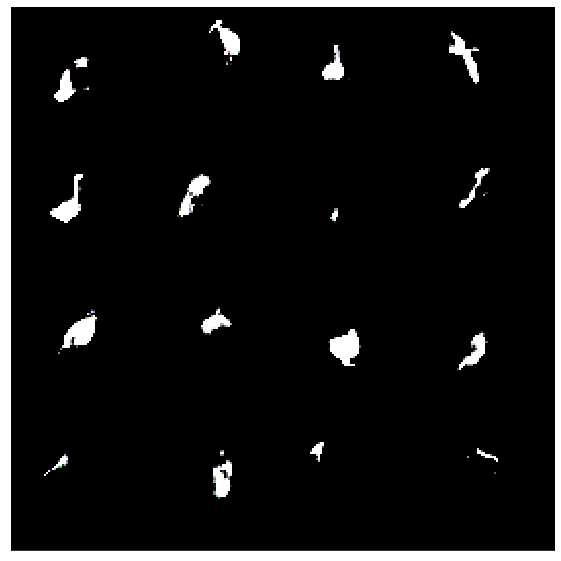

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


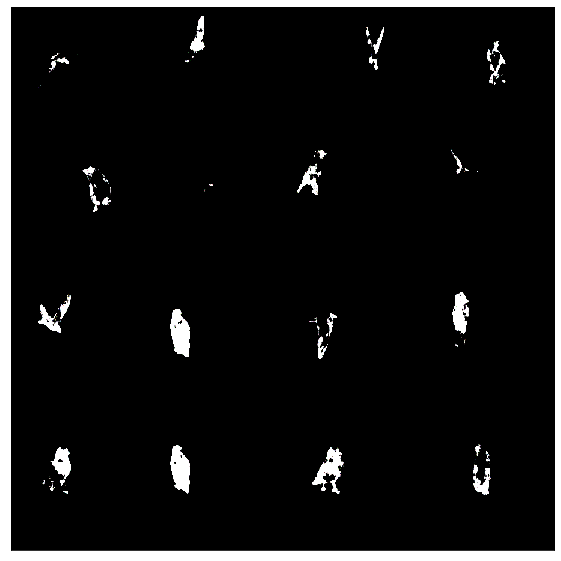

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 6


  0%|                                                                             | 3/17500 [00:13<46:21:18,  9.54s/it]

Train Epoch: 6 [0/280000 (0%)]	Loss: 0.031902
IOU : 0.053375244140625


  0%|▏                                                                              | 53/17500 [00:17<20:42, 14.04it/s]

Train Epoch: 6 [200/280000 (0%)]	Loss: 0.024781
IOU : 0.050079345703125


  1%|▍                                                                             | 104/17500 [00:20<19:06, 15.18it/s]

Train Epoch: 6 [400/280000 (1%)]	Loss: 0.026716
IOU : 0.0492706298828125


  1%|▋                                                                             | 153/17500 [00:23<20:48, 13.89it/s]

Train Epoch: 6 [600/280000 (1%)]	Loss: 0.072048
IOU : 0.0600128173828125


  1%|▉                                                                             | 203/17500 [00:27<21:22, 13.48it/s]

Train Epoch: 6 [800/280000 (1%)]	Loss: 0.029453
IOU : 0.0568695068359375


  1%|█                                                                             | 251/17500 [00:31<40:35,  7.08it/s]

Train Epoch: 6 [1000/280000 (1%)]	Loss: 0.053256
IOU : 0.059234619140625


  2%|█▎                                                                            | 301/17500 [00:37<41:45,  6.86it/s]

Train Epoch: 6 [1200/280000 (2%)]	Loss: 0.026704
IOU : 0.0493927001953125


  2%|█▌                                                                            | 351/17500 [00:43<41:18,  6.92it/s]

Train Epoch: 6 [1400/280000 (2%)]	Loss: 0.025268
IOU : 0.0501251220703125


  2%|█▊                                                                            | 404/17500 [00:48<16:50, 16.91it/s]

Train Epoch: 6 [1600/280000 (2%)]	Loss: 0.036562
IOU : 0.058502197265625


  3%|██                                                                            | 454/17500 [00:52<19:27, 14.60it/s]

Train Epoch: 6 [1800/280000 (3%)]	Loss: 0.026545
IOU : 0.0509490966796875


  3%|██▏                                                                           | 502/17500 [00:55<19:33, 14.48it/s]

Train Epoch: 6 [2000/280000 (3%)]	Loss: 0.027941
IOU : 0.0424041748046875


  3%|██▍                                                                         | 551/17500 [01:01<1:15:21,  3.75it/s]

Train Epoch: 6 [2200/280000 (3%)]	Loss: 0.024607
IOU : 0.0487518310546875


  3%|██▋                                                                           | 602/17500 [01:07<18:37, 15.12it/s]

Train Epoch: 6 [2400/280000 (3%)]	Loss: 0.026130
IOU : 0.045257568359375


  4%|██▉                                                                           | 654/17500 [01:11<18:39, 15.04it/s]

Train Epoch: 6 [2600/280000 (4%)]	Loss: 0.034466
IOU : 0.055419921875


  4%|███                                                                         | 701/17500 [01:16<1:13:14,  3.82it/s]

Train Epoch: 6 [2800/280000 (4%)]	Loss: 0.026532
IOU : 0.059722900390625


  4%|███▎                                                                          | 753/17500 [01:24<18:00, 15.50it/s]

Train Epoch: 6 [3000/280000 (4%)]	Loss: 0.032944
IOU : 0.0483245849609375


  5%|███▌                                                                          | 803/17500 [01:27<19:30, 14.27it/s]

Train Epoch: 6 [3200/280000 (5%)]	Loss: 0.035725
IOU : 0.0512237548828125


  5%|███▊                                                                          | 853/17500 [01:31<19:21, 14.33it/s]

Train Epoch: 6 [3400/280000 (5%)]	Loss: 0.037880
IOU : 0.051422119140625


  5%|███▉                                                                        | 901/17500 [01:39<1:14:28,  3.72it/s]

Train Epoch: 6 [3600/280000 (5%)]	Loss: 0.027535
IOU : 0.050018310546875


  5%|████▏                                                                         | 952/17500 [01:44<16:32, 16.67it/s]

Train Epoch: 6 [3800/280000 (5%)]	Loss: 0.026422
IOU : 0.055328369140625


  6%|████▍                                                                        | 1002/17500 [01:47<18:32, 14.83it/s]

Train Epoch: 6 [4000/280000 (6%)]	Loss: 0.024891
IOU : 0.0476837158203125


  6%|████▋                                                                        | 1052/17500 [01:51<20:48, 13.18it/s]

Train Epoch: 6 [4200/280000 (6%)]	Loss: 0.029962
IOU : 0.0552825927734375


  6%|████▊                                                                        | 1101/17500 [01:56<39:26,  6.93it/s]

Train Epoch: 6 [4400/280000 (6%)]	Loss: 0.027902
IOU : 0.0501251220703125


  7%|█████                                                                        | 1151/17500 [02:03<39:24,  6.91it/s]

Train Epoch: 6 [4600/280000 (7%)]	Loss: 0.036313
IOU : 0.057647705078125


  7%|█████▎                                                                       | 1201/17500 [02:09<39:32,  6.87it/s]

Train Epoch: 6 [4800/280000 (7%)]	Loss: 0.038987
IOU : 0.0551605224609375


  7%|█████▌                                                                       | 1251/17500 [02:15<39:06,  6.92it/s]

Train Epoch: 6 [5000/280000 (7%)]	Loss: 0.026501
IOU : 0.0588836669921875


  7%|█████▋                                                                       | 1302/17500 [02:19<16:58, 15.91it/s]

Train Epoch: 6 [5200/280000 (7%)]	Loss: 0.029417
IOU : 0.052337646484375


  8%|█████▉                                                                       | 1353/17500 [02:23<17:59, 14.96it/s]

Train Epoch: 6 [5400/280000 (8%)]	Loss: 0.035890
IOU : 0.0553741455078125


  8%|██████▏                                                                      | 1403/17500 [02:26<18:48, 14.26it/s]

Train Epoch: 6 [5600/280000 (8%)]	Loss: 0.026321
IOU : 0.0505218505859375


  8%|██████▍                                                                      | 1451/17500 [02:31<38:36,  6.93it/s]

Train Epoch: 6 [5800/280000 (8%)]	Loss: 0.036427
IOU : 0.050567626953125


  9%|██████▌                                                                      | 1501/17500 [02:37<38:34,  6.91it/s]

Train Epoch: 6 [6000/280000 (9%)]	Loss: 0.032795
IOU : 0.056243896484375


  9%|██████▊                                                                      | 1551/17500 [02:43<38:52,  6.84it/s]

Train Epoch: 6 [6200/280000 (9%)]	Loss: 0.043984
IOU : 0.0530853271484375


  9%|███████                                                                      | 1601/17500 [02:49<38:19,  6.92it/s]

Train Epoch: 6 [6400/280000 (9%)]	Loss: 0.026227
IOU : 0.048126220703125


  9%|███████▎                                                                     | 1654/17500 [02:53<15:54, 16.61it/s]

Train Epoch: 6 [6600/280000 (9%)]	Loss: 0.029735
IOU : 0.0490875244140625


 10%|███████▍                                                                     | 1702/17500 [02:56<18:55, 13.91it/s]

Train Epoch: 6 [6800/280000 (10%)]	Loss: 0.027838
IOU : 0.04766845703125


 10%|███████▋                                                                     | 1752/17500 [03:00<18:58, 13.83it/s]

Train Epoch: 6 [7000/280000 (10%)]	Loss: 0.026917
IOU : 0.0494384765625


 10%|███████▋                                                                   | 1801/17500 [03:07<1:09:57,  3.74it/s]

Train Epoch: 6 [7200/280000 (10%)]	Loss: 0.033072
IOU : 0.0539398193359375


 11%|████████▏                                                                    | 1851/17500 [03:15<37:29,  6.96it/s]

Train Epoch: 6 [7400/280000 (11%)]	Loss: 0.028081
IOU : 0.0480499267578125


 11%|████████▎                                                                    | 1902/17500 [03:19<20:08, 12.91it/s]

Train Epoch: 6 [7600/280000 (11%)]	Loss: 0.023515
IOU : 0.0479583740234375


 11%|████████▌                                                                    | 1952/17500 [03:23<34:24,  7.53it/s]

Train Epoch: 6 [7800/280000 (11%)]	Loss: 0.041381
IOU : 0.0544281005859375


 11%|████████▊                                                                    | 2003/17500 [03:31<17:00, 15.18it/s]

Train Epoch: 6 [8000/280000 (11%)]	Loss: 0.041308
IOU : 0.0533447265625


 12%|█████████                                                                    | 2052/17500 [03:34<17:52, 14.40it/s]

Train Epoch: 6 [8200/280000 (12%)]	Loss: 0.030360
IOU : 0.0449981689453125


 12%|█████████▏                                                                   | 2102/17500 [03:38<21:10, 12.11it/s]

Train Epoch: 6 [8400/280000 (12%)]	Loss: 0.029547
IOU : 0.051116943359375


 12%|█████████▍                                                                   | 2152/17500 [03:42<20:15, 12.63it/s]

Train Epoch: 6 [8600/280000 (12%)]	Loss: 0.022279
IOU : 0.047821044921875


 13%|█████████▋                                                                   | 2202/17500 [03:46<20:34, 12.39it/s]

Train Epoch: 6 [8800/280000 (13%)]	Loss: 0.030162
IOU : 0.051971435546875


 13%|█████████▉                                                                   | 2251/17500 [03:51<36:37,  6.94it/s]

Train Epoch: 6 [9000/280000 (13%)]	Loss: 0.037039
IOU : 0.05859375


 13%|██████████                                                                   | 2301/17500 [03:58<36:32,  6.93it/s]

Train Epoch: 6 [9200/280000 (13%)]	Loss: 0.027718
IOU : 0.04852294921875


 13%|██████████▎                                                                  | 2351/17500 [04:04<36:32,  6.91it/s]

Train Epoch: 6 [9400/280000 (13%)]	Loss: 0.025739
IOU : 0.05328369140625


 14%|██████████▌                                                                  | 2401/17500 [04:10<36:15,  6.94it/s]

Train Epoch: 6 [9600/280000 (14%)]	Loss: 0.031580
IOU : 0.047607421875


 14%|██████████▊                                                                  | 2453/17500 [04:14<16:26, 15.26it/s]

Train Epoch: 6 [9800/280000 (14%)]	Loss: 0.022839
IOU : 0.052398681640625


 14%|███████████                                                                  | 2503/17500 [04:18<17:51, 14.00it/s]

Train Epoch: 6 [10000/280000 (14%)]	Loss: 0.024232
IOU : 0.052642822265625


 15%|███████████▏                                                                 | 2553/17500 [04:21<19:14, 12.95it/s]

Train Epoch: 6 [10200/280000 (15%)]	Loss: 0.025797
IOU : 0.05548095703125


 15%|███████████▏                                                               | 2601/17500 [04:29<1:06:52,  3.71it/s]

Train Epoch: 6 [10400/280000 (15%)]	Loss: 0.029070
IOU : 0.04608154296875


 15%|███████████▋                                                                 | 2652/17500 [04:36<17:42, 13.97it/s]

Train Epoch: 6 [10600/280000 (15%)]	Loss: 0.026336
IOU : 0.04833984375


 15%|███████████▉                                                                 | 2702/17500 [04:39<17:04, 14.45it/s]

Train Epoch: 6 [10800/280000 (15%)]	Loss: 0.038041
IOU : 0.04998779296875


 16%|████████████                                                                 | 2752/17500 [04:42<17:48, 13.81it/s]

Train Epoch: 6 [11000/280000 (16%)]	Loss: 0.031271
IOU : 0.0498199462890625


 16%|████████████▎                                                                | 2801/17500 [04:48<35:38,  6.87it/s]

Train Epoch: 6 [11200/280000 (16%)]	Loss: 0.032139
IOU : 0.0570068359375


 16%|████████████▌                                                                | 2851/17500 [04:54<35:28,  6.88it/s]

Train Epoch: 6 [11400/280000 (16%)]	Loss: 0.039055
IOU : 0.0573272705078125


 17%|████████████▊                                                                | 2901/17500 [05:00<35:15,  6.90it/s]

Train Epoch: 6 [11600/280000 (17%)]	Loss: 0.028107
IOU : 0.0452117919921875


 17%|████████████▉                                                                | 2951/17500 [05:06<35:09,  6.90it/s]

Train Epoch: 6 [11800/280000 (17%)]	Loss: 0.041426
IOU : 0.0547943115234375


 17%|█████████████▏                                                               | 3003/17500 [05:11<15:44, 15.36it/s]

Train Epoch: 6 [12000/280000 (17%)]	Loss: 0.023051
IOU : 0.0509185791015625


 17%|█████████████▍                                                               | 3053/17500 [05:14<16:22, 14.71it/s]

Train Epoch: 6 [12200/280000 (17%)]	Loss: 0.041077
IOU : 0.05792236328125


 18%|█████████████▋                                                               | 3103/17500 [05:18<16:35, 14.47it/s]

Train Epoch: 6 [12400/280000 (18%)]	Loss: 0.032925
IOU : 0.0484771728515625


 18%|█████████████▌                                                             | 3151/17500 [05:25<1:04:17,  3.72it/s]

Train Epoch: 6 [12600/280000 (18%)]	Loss: 0.026305
IOU : 0.0491943359375


 18%|██████████████                                                               | 3204/17500 [05:30<15:30, 15.36it/s]

Train Epoch: 6 [12800/280000 (18%)]	Loss: 0.028583
IOU : 0.0530242919921875


 19%|██████████████▎                                                              | 3251/17500 [05:33<18:58, 12.51it/s]

Train Epoch: 6 [13000/280000 (19%)]	Loss: 0.033227
IOU : 0.0573883056640625


 19%|██████████████▌                                                              | 3303/17500 [05:37<16:55, 13.97it/s]

Train Epoch: 6 [13200/280000 (19%)]	Loss: 0.029855
IOU : 0.0552978515625


 19%|██████████████▊                                                              | 3353/17500 [05:41<17:50, 13.22it/s]

Train Epoch: 6 [13400/280000 (19%)]	Loss: 0.028769
IOU : 0.05267333984375


 19%|██████████████▉                                                              | 3401/17500 [05:46<34:14,  6.86it/s]

Train Epoch: 6 [13600/280000 (19%)]	Loss: 0.023368
IOU : 0.0500030517578125


 20%|███████████████▏                                                             | 3451/17500 [05:53<33:55,  6.90it/s]

Train Epoch: 6 [13800/280000 (20%)]	Loss: 0.026698
IOU : 0.0493621826171875


 20%|███████████████▍                                                             | 3501/17500 [05:59<33:42,  6.92it/s]

Train Epoch: 6 [14000/280000 (20%)]	Loss: 0.036710
IOU : 0.0443267822265625


 20%|███████████████▌                                                             | 3551/17500 [06:05<33:53,  6.86it/s]

Train Epoch: 6 [14200/280000 (20%)]	Loss: 0.037238
IOU : 0.0489654541015625


 21%|███████████████▊                                                             | 3604/17500 [06:10<13:45, 16.82it/s]

Train Epoch: 6 [14400/280000 (21%)]	Loss: 0.028621
IOU : 0.0562896728515625


 21%|████████████████                                                             | 3652/17500 [06:14<17:54, 12.88it/s]

Train Epoch: 6 [14600/280000 (21%)]	Loss: 0.027179
IOU : 0.0619354248046875


 21%|████████████████▎                                                            | 3702/17500 [06:17<17:27, 13.18it/s]

Train Epoch: 6 [14800/280000 (21%)]	Loss: 0.028613
IOU : 0.0531768798828125


 21%|████████████████▌                                                            | 3751/17500 [06:23<33:27,  6.85it/s]

Train Epoch: 6 [15000/280000 (21%)]	Loss: 0.027477
IOU : 0.052001953125


 22%|████████████████▋                                                            | 3801/17500 [06:29<33:01,  6.91it/s]

Train Epoch: 6 [15200/280000 (22%)]	Loss: 0.032389
IOU : 0.0551910400390625


 22%|████████████████▉                                                            | 3851/17500 [06:35<33:04,  6.88it/s]

Train Epoch: 6 [15400/280000 (22%)]	Loss: 0.026521
IOU : 0.054931640625


 22%|█████████████████▏                                                           | 3901/17500 [06:42<32:44,  6.92it/s]

Train Epoch: 6 [15600/280000 (22%)]	Loss: 0.028451
IOU : 0.051483154296875


 23%|█████████████████▍                                                           | 3952/17500 [06:46<16:59, 13.28it/s]

Train Epoch: 6 [15800/280000 (23%)]	Loss: 0.028226
IOU : 0.0538482666015625


 23%|█████████████████▌                                                           | 4003/17500 [06:49<14:37, 15.39it/s]

Train Epoch: 6 [16000/280000 (23%)]	Loss: 0.025842
IOU : 0.0566558837890625


 23%|█████████████████▊                                                           | 4053/17500 [06:53<17:00, 13.17it/s]

Train Epoch: 6 [16200/280000 (23%)]	Loss: 0.025646
IOU : 0.053314208984375


 23%|██████████████████                                                           | 4103/17500 [06:57<17:46, 12.57it/s]

Train Epoch: 6 [16400/280000 (23%)]	Loss: 0.031449
IOU : 0.060699462890625


 24%|██████████████████▎                                                          | 4153/17500 [07:01<17:14, 12.90it/s]

Train Epoch: 6 [16600/280000 (24%)]	Loss: 0.028089
IOU : 0.0456695556640625


 24%|██████████████████▍                                                          | 4201/17500 [07:06<32:10,  6.89it/s]

Train Epoch: 6 [16800/280000 (24%)]	Loss: 0.032868
IOU : 0.0538787841796875


 24%|██████████████████▋                                                          | 4251/17500 [07:12<31:58,  6.91it/s]

Train Epoch: 6 [17000/280000 (24%)]	Loss: 0.045720
IOU : 0.0609893798828125


 25%|██████████████████▉                                                          | 4301/17500 [07:18<31:50,  6.91it/s]

Train Epoch: 6 [17200/280000 (25%)]	Loss: 0.027038
IOU : 0.05328369140625


 25%|███████████████████▏                                                         | 4351/17500 [07:24<31:40,  6.92it/s]

Train Epoch: 6 [17400/280000 (25%)]	Loss: 0.024341
IOU : 0.0513916015625


 25%|███████████████████▎                                                         | 4401/17500 [07:31<31:38,  6.90it/s]

Train Epoch: 6 [17600/280000 (25%)]	Loss: 0.039780
IOU : 0.0631103515625


 25%|███████████████████▌                                                         | 4454/17500 [07:36<14:07, 15.39it/s]

Train Epoch: 6 [17800/280000 (25%)]	Loss: 0.026745
IOU : 0.0553131103515625


 26%|███████████████████▊                                                         | 4503/17500 [07:40<14:32, 14.90it/s]

Train Epoch: 6 [18000/280000 (26%)]	Loss: 0.027397
IOU : 0.0530853271484375


 26%|████████████████████                                                         | 4553/17500 [07:43<17:50, 12.09it/s]

Train Epoch: 6 [18200/280000 (26%)]	Loss: 0.028822
IOU : 0.0520172119140625


 26%|████████████████████▎                                                        | 4603/17500 [07:48<27:54,  7.70it/s]

Train Epoch: 6 [18400/280000 (26%)]	Loss: 0.028303
IOU : 0.046600341796875


 27%|████████████████████▍                                                        | 4651/17500 [07:54<31:02,  6.90it/s]

Train Epoch: 6 [18600/280000 (27%)]	Loss: 0.044608
IOU : 0.057220458984375


 27%|████████████████████▋                                                        | 4701/17500 [08:01<30:54,  6.90it/s]

Train Epoch: 6 [18800/280000 (27%)]	Loss: 0.029546
IOU : 0.06182861328125


 27%|████████████████████▉                                                        | 4751/17500 [08:07<30:47,  6.90it/s]

Train Epoch: 6 [19000/280000 (27%)]	Loss: 0.031196
IOU : 0.0587921142578125


 27%|█████████████████████▏                                                       | 4804/17500 [08:12<13:51, 15.26it/s]

Train Epoch: 6 [19200/280000 (27%)]	Loss: 0.026098
IOU : 0.05206298828125


 28%|█████████████████████▎                                                       | 4854/17500 [08:16<14:15, 14.78it/s]

Train Epoch: 6 [19400/280000 (28%)]	Loss: 0.029426
IOU : 0.050567626953125


 28%|█████████████████████▌                                                       | 4902/17500 [08:19<13:40, 15.36it/s]

Train Epoch: 6 [19600/280000 (28%)]	Loss: 0.032841
IOU : 0.0561370849609375


 28%|█████████████████████▊                                                       | 4951/17500 [08:25<56:11,  3.72it/s]

Train Epoch: 6 [19800/280000 (28%)]	Loss: 0.029289
IOU : 0.051025390625


 29%|██████████████████████                                                       | 5003/17500 [08:31<14:03, 14.81it/s]

Train Epoch: 6 [20000/280000 (29%)]	Loss: 0.028726
IOU : 0.054595947265625


 29%|██████████████████████▏                                                      | 5053/17500 [08:35<14:56, 13.89it/s]

Train Epoch: 6 [20200/280000 (29%)]	Loss: 0.037134
IOU : 0.0636749267578125


 29%|██████████████████████▍                                                      | 5101/17500 [08:42<55:40,  3.71it/s]

Train Epoch: 6 [20400/280000 (29%)]	Loss: 0.025151
IOU : 0.0579833984375


 29%|██████████████████████▋                                                      | 5153/17500 [08:47<13:24, 15.34it/s]

Train Epoch: 6 [20600/280000 (29%)]	Loss: 0.039358
IOU : 0.0482025146484375


 30%|██████████████████████▉                                                      | 5203/17500 [08:51<15:00, 13.66it/s]

Train Epoch: 6 [20800/280000 (30%)]	Loss: 0.033820
IOU : 0.0456695556640625


 30%|███████████████████████                                                      | 5251/17500 [08:56<53:50,  3.79it/s]

Train Epoch: 6 [21000/280000 (30%)]	Loss: 0.033376
IOU : 0.056884765625


 30%|███████████████████████▎                                                     | 5301/17500 [09:03<13:49, 14.71it/s]

Train Epoch: 6 [21200/280000 (30%)]	Loss: 0.023572
IOU : 0.04998779296875


 31%|███████████████████████▌                                                     | 5352/17500 [09:06<13:58, 14.48it/s]

Train Epoch: 6 [21400/280000 (31%)]	Loss: 0.025795
IOU : 0.0532989501953125


 31%|███████████████████████▊                                                     | 5401/17500 [09:11<29:18,  6.88it/s]

Train Epoch: 6 [21600/280000 (31%)]	Loss: 0.035650
IOU : 0.0617218017578125


 31%|███████████████████████▉                                                     | 5451/17500 [09:19<29:14,  6.87it/s]

Train Epoch: 6 [21800/280000 (31%)]	Loss: 0.027707
IOU : 0.0563201904296875


 31%|████████████████████████▏                                                    | 5503/17500 [09:23<13:06, 15.26it/s]

Train Epoch: 6 [22000/280000 (31%)]	Loss: 0.037073
IOU : 0.05126953125


 32%|████████████████████████▍                                                    | 5553/17500 [09:26<13:42, 14.53it/s]

Train Epoch: 6 [22200/280000 (32%)]	Loss: 0.027473
IOU : 0.0512847900390625


 32%|████████████████████████▋                                                    | 5601/17500 [09:34<53:26,  3.71it/s]

Train Epoch: 6 [22400/280000 (32%)]	Loss: 0.024550
IOU : 0.0479736328125


 32%|████████████████████████▊                                                    | 5652/17500 [09:39<13:15, 14.89it/s]

Train Epoch: 6 [22600/280000 (32%)]	Loss: 0.030873
IOU : 0.055694580078125


 33%|█████████████████████████                                                    | 5702/17500 [09:42<13:52, 14.17it/s]

Train Epoch: 6 [22800/280000 (33%)]	Loss: 0.027118
IOU : 0.05010986328125


 33%|█████████████████████████▎                                                   | 5751/17500 [09:51<14:27, 13.54it/s]

Train Epoch: 6 [23000/280000 (33%)]	Loss: 0.031354
IOU : 0.058380126953125


 33%|█████████████████████████▌                                                   | 5802/17500 [09:55<13:41, 14.24it/s]

Train Epoch: 6 [23200/280000 (33%)]	Loss: 0.028473
IOU : 0.057952880859375


 33%|█████████████████████████▋                                                   | 5852/17500 [09:58<13:55, 13.94it/s]

Train Epoch: 6 [23400/280000 (33%)]	Loss: 0.027436
IOU : 0.049774169921875


 34%|█████████████████████████▉                                                   | 5903/17500 [10:08<15:58, 12.10it/s]

Train Epoch: 6 [23600/280000 (34%)]	Loss: 0.025173
IOU : 0.0428466796875


 34%|██████████████████████████▏                                                  | 5953/17500 [10:11<12:51, 14.97it/s]

Train Epoch: 6 [23800/280000 (34%)]	Loss: 0.035684
IOU : 0.051910400390625


 34%|██████████████████████████▍                                                  | 6003/17500 [10:14<13:35, 14.10it/s]

Train Epoch: 6 [24000/280000 (34%)]	Loss: 0.023539
IOU : 0.049774169921875


 35%|██████████████████████████▋                                                  | 6053/17500 [10:18<13:54, 13.71it/s]

Train Epoch: 6 [24200/280000 (35%)]	Loss: 0.031837
IOU : 0.0494842529296875


 35%|██████████████████████████▊                                                  | 6101/17500 [10:25<51:27,  3.69it/s]

Train Epoch: 6 [24400/280000 (35%)]	Loss: 0.029310
IOU : 0.05084228515625


 35%|███████████████████████████                                                  | 6152/17500 [10:33<14:08, 13.37it/s]

Train Epoch: 6 [24600/280000 (35%)]	Loss: 0.022682
IOU : 0.0455169677734375


 35%|███████████████████████████▎                                                 | 6202/17500 [10:36<14:46, 12.75it/s]

Train Epoch: 6 [24800/280000 (35%)]	Loss: 0.025403
IOU : 0.0526275634765625


 36%|███████████████████████████▌                                                 | 6254/17500 [10:40<12:42, 14.76it/s]

Train Epoch: 6 [25000/280000 (36%)]	Loss: 0.028442
IOU : 0.0568389892578125


 36%|███████████████████████████▋                                                 | 6301/17500 [10:44<45:40,  4.09it/s]

Train Epoch: 6 [25200/280000 (36%)]	Loss: 0.026860
IOU : 0.0520782470703125


 36%|███████████████████████████▉                                                 | 6353/17500 [10:53<12:03, 15.41it/s]

Train Epoch: 6 [25400/280000 (36%)]	Loss: 0.033250
IOU : 0.0551605224609375


 37%|████████████████████████████▏                                                | 6402/17500 [10:56<13:30, 13.70it/s]

Train Epoch: 6 [25600/280000 (37%)]	Loss: 0.033353
IOU : 0.05804443359375


 37%|████████████████████████████▍                                                | 6452/17500 [11:00<12:30, 14.72it/s]

Train Epoch: 6 [25800/280000 (37%)]	Loss: 0.024628
IOU : 0.05523681640625


 37%|████████████████████████████▌                                                | 6501/17500 [11:07<49:13,  3.72it/s]

Train Epoch: 6 [26000/280000 (37%)]	Loss: 0.030834
IOU : 0.052581787109375


 37%|████████████████████████████▊                                                | 6552/17500 [11:14<11:31, 15.84it/s]

Train Epoch: 6 [26200/280000 (37%)]	Loss: 0.036396
IOU : 0.0567169189453125


 38%|█████████████████████████████                                                | 6602/17500 [11:17<11:25, 15.91it/s]

Train Epoch: 6 [26400/280000 (38%)]	Loss: 0.029036
IOU : 0.040435791015625


 38%|█████████████████████████████▎                                               | 6652/17500 [11:21<13:40, 13.23it/s]

Train Epoch: 6 [26600/280000 (38%)]	Loss: 0.045516
IOU : 0.057769775390625


 38%|█████████████████████████████▍                                               | 6702/17500 [11:24<13:04, 13.76it/s]

Train Epoch: 6 [26800/280000 (38%)]	Loss: 0.039134
IOU : 0.0517730712890625


 39%|█████████████████████████████▋                                               | 6751/17500 [11:35<48:03,  3.73it/s]

Train Epoch: 6 [27000/280000 (39%)]	Loss: 0.033162
IOU : 0.05364990234375


 39%|█████████████████████████████▉                                               | 6802/17500 [11:39<13:12, 13.50it/s]

Train Epoch: 6 [27200/280000 (39%)]	Loss: 0.025068
IOU : 0.0496673583984375


 39%|██████████████████████████████▏                                              | 6852/17500 [11:42<12:35, 14.10it/s]

Train Epoch: 6 [27400/280000 (39%)]	Loss: 0.027107
IOU : 0.05267333984375


 39%|██████████████████████████████▎                                              | 6902/17500 [11:46<14:10, 12.45it/s]

Train Epoch: 6 [27600/280000 (39%)]	Loss: 0.029996
IOU : 0.0561676025390625


 40%|██████████████████████████████▌                                              | 6952/17500 [11:50<13:38, 12.88it/s]

Train Epoch: 6 [27800/280000 (40%)]	Loss: 0.025599
IOU : 0.04461669921875


 40%|██████████████████████████████▊                                              | 7002/17500 [11:54<16:58, 10.31it/s]

Train Epoch: 6 [28000/280000 (40%)]	Loss: 0.031293
IOU : 0.052764892578125


 40%|███████████████████████████████                                              | 7051/17500 [12:00<25:12,  6.91it/s]

Train Epoch: 6 [28200/280000 (40%)]	Loss: 0.022376
IOU : 0.04364013671875


 41%|███████████████████████████████▏                                             | 7101/17500 [12:06<25:14,  6.87it/s]

Train Epoch: 6 [28400/280000 (41%)]	Loss: 0.037080
IOU : 0.0606689453125


 41%|███████████████████████████████▍                                             | 7151/17500 [12:13<24:52,  6.93it/s]

Train Epoch: 6 [28600/280000 (41%)]	Loss: 0.030667
IOU : 0.058319091796875


 41%|███████████████████████████████▋                                             | 7201/17500 [12:19<24:50,  6.91it/s]

Train Epoch: 6 [28800/280000 (41%)]	Loss: 0.022056
IOU : 0.0410003662109375


 41%|███████████████████████████████▉                                             | 7251/17500 [12:25<24:41,  6.92it/s]

Train Epoch: 6 [29000/280000 (41%)]	Loss: 0.029774
IOU : 0.0538787841796875


 42%|████████████████████████████████▏                                            | 7302/17500 [12:29<10:49, 15.70it/s]

Train Epoch: 6 [29200/280000 (42%)]	Loss: 0.038673
IOU : 0.0537567138671875


 42%|████████████████████████████████▎                                            | 7352/17500 [12:33<12:30, 13.53it/s]

Train Epoch: 6 [29400/280000 (42%)]	Loss: 0.032907
IOU : 0.0540771484375


 42%|████████████████████████████████▌                                            | 7401/17500 [12:38<44:40,  3.77it/s]

Train Epoch: 6 [29600/280000 (42%)]	Loss: 0.027076
IOU : 0.0532989501953125


 43%|████████████████████████████████▊                                            | 7454/17500 [12:45<10:53, 15.37it/s]

Train Epoch: 6 [29800/280000 (43%)]	Loss: 0.038878
IOU : 0.05389404296875


 43%|█████████████████████████████████                                            | 7502/17500 [12:49<11:01, 15.12it/s]

Train Epoch: 6 [30000/280000 (43%)]	Loss: 0.039599
IOU : 0.060028076171875


 43%|█████████████████████████████████▏                                           | 7552/17500 [12:52<11:44, 14.12it/s]

Train Epoch: 6 [30200/280000 (43%)]	Loss: 0.027423
IOU : 0.05419921875


 43%|█████████████████████████████████▍                                           | 7603/17500 [13:02<17:22,  9.50it/s]

Train Epoch: 6 [30400/280000 (43%)]	Loss: 0.028441
IOU : 0.054290771484375


 44%|█████████████████████████████████▋                                           | 7654/17500 [13:05<11:31, 14.25it/s]

Train Epoch: 6 [30600/280000 (44%)]	Loss: 0.032754
IOU : 0.0510711669921875


 44%|█████████████████████████████████▉                                           | 7703/17500 [13:09<11:49, 13.81it/s]

Train Epoch: 6 [30800/280000 (44%)]	Loss: 0.031280
IOU : 0.0511016845703125


 44%|██████████████████████████████████                                           | 7751/17500 [13:12<13:07, 12.39it/s]

Train Epoch: 6 [31000/280000 (44%)]	Loss: 0.032690
IOU : 0.05126953125


 45%|██████████████████████████████████▎                                          | 7801/17500 [13:18<23:22,  6.92it/s]

Train Epoch: 6 [31200/280000 (45%)]	Loss: 0.029481
IOU : 0.0511627197265625


 45%|██████████████████████████████████▌                                          | 7851/17500 [13:25<23:22,  6.88it/s]

Train Epoch: 6 [31400/280000 (45%)]	Loss: 0.037298
IOU : 0.067047119140625


 45%|██████████████████████████████████▊                                          | 7901/17500 [13:31<23:06,  6.92it/s]

Train Epoch: 6 [31600/280000 (45%)]	Loss: 0.025725
IOU : 0.045440673828125


 45%|██████████████████████████████████▉                                          | 7951/17500 [13:37<22:57,  6.93it/s]

Train Epoch: 6 [31800/280000 (45%)]	Loss: 0.027755
IOU : 0.0505218505859375


 46%|███████████████████████████████████▏                                         | 8004/17500 [13:41<10:21, 15.27it/s]

Train Epoch: 6 [32000/280000 (46%)]	Loss: 0.032341
IOU : 0.0543670654296875


 46%|███████████████████████████████████▍                                         | 8052/17500 [13:45<12:27, 12.64it/s]

Train Epoch: 6 [32200/280000 (46%)]	Loss: 0.028945
IOU : 0.0670166015625


 46%|███████████████████████████████████▋                                         | 8102/17500 [13:48<12:11, 12.84it/s]

Train Epoch: 6 [32400/280000 (46%)]	Loss: 0.029690
IOU : 0.0482635498046875


 47%|███████████████████████████████████▊                                         | 8151/17500 [13:53<22:33,  6.91it/s]

Train Epoch: 6 [32600/280000 (47%)]	Loss: 0.039121
IOU : 0.0543060302734375


 47%|████████████████████████████████████                                         | 8201/17500 [14:00<22:19,  6.94it/s]

Train Epoch: 6 [32800/280000 (47%)]	Loss: 0.048650
IOU : 0.0634307861328125


 47%|████████████████████████████████████▎                                        | 8251/17500 [14:06<22:12,  6.94it/s]

Train Epoch: 6 [33000/280000 (47%)]	Loss: 0.025504
IOU : 0.052947998046875


 47%|████████████████████████████████████▌                                        | 8301/17500 [14:12<22:09,  6.92it/s]

Train Epoch: 6 [33200/280000 (47%)]	Loss: 0.037078
IOU : 0.0602569580078125


 48%|████████████████████████████████████▋                                        | 8351/17500 [14:18<21:58,  6.94it/s]

Train Epoch: 6 [33400/280000 (48%)]	Loss: 0.028413
IOU : 0.0493316650390625


 48%|████████████████████████████████████▉                                        | 8403/17500 [14:23<10:00, 15.14it/s]

Train Epoch: 6 [33600/280000 (48%)]	Loss: 0.028997
IOU : 0.0554046630859375


 48%|█████████████████████████████████████▏                                       | 8453/17500 [14:27<10:46, 13.99it/s]

Train Epoch: 6 [33800/280000 (48%)]	Loss: 0.028671
IOU : 0.0558929443359375


 49%|█████████████████████████████████████▍                                       | 8503/17500 [14:30<10:16, 14.60it/s]

Train Epoch: 6 [34000/280000 (49%)]	Loss: 0.027863
IOU : 0.048187255859375


 49%|█████████████████████████████████████▌                                       | 8551/17500 [14:40<40:08,  3.72it/s]

Train Epoch: 6 [34200/280000 (49%)]	Loss: 0.033637
IOU : 0.0543365478515625


 49%|█████████████████████████████████████▊                                       | 8604/17500 [14:44<09:36, 15.43it/s]

Train Epoch: 6 [34400/280000 (49%)]	Loss: 0.021850
IOU : 0.0440521240234375


 49%|██████████████████████████████████████                                       | 8652/17500 [14:48<11:10, 13.21it/s]

Train Epoch: 6 [34600/280000 (49%)]	Loss: 0.025400
IOU : 0.0498046875


 50%|██████████████████████████████████████▎                                      | 8701/17500 [14:55<39:30,  3.71it/s]

Train Epoch: 6 [34800/280000 (50%)]	Loss: 0.034510
IOU : 0.0575408935546875


 50%|██████████████████████████████████████▌                                      | 8751/17500 [15:01<10:43, 13.60it/s]

Train Epoch: 6 [35000/280000 (50%)]	Loss: 0.039040
IOU : 0.0569000244140625


 50%|██████████████████████████████████████▋                                      | 8803/17500 [15:04<09:43, 14.92it/s]

Train Epoch: 6 [35200/280000 (50%)]	Loss: 0.035295
IOU : 0.057830810546875


 51%|██████████████████████████████████████▉                                      | 8853/17500 [15:08<09:58, 14.45it/s]

Train Epoch: 6 [35400/280000 (51%)]	Loss: 0.025372
IOU : 0.0527496337890625


 51%|███████████████████████████████████████▏                                     | 8901/17500 [15:12<14:58,  9.58it/s]

Train Epoch: 6 [35600/280000 (51%)]	Loss: 0.031952
IOU : 0.05389404296875


 51%|███████████████████████████████████████▍                                     | 8951/17500 [15:18<20:37,  6.91it/s]

Train Epoch: 6 [35800/280000 (51%)]	Loss: 0.031394
IOU : 0.06524658203125


 51%|███████████████████████████████████████▌                                     | 9001/17500 [15:24<20:36,  6.88it/s]

Train Epoch: 6 [36000/280000 (51%)]	Loss: 0.024275
IOU : 0.04815673828125


 52%|███████████████████████████████████████▊                                     | 9051/17500 [15:30<20:24,  6.90it/s]

Train Epoch: 6 [36200/280000 (52%)]	Loss: 0.029961
IOU : 0.056121826171875


 52%|████████████████████████████████████████                                     | 9101/17500 [15:37<20:15,  6.91it/s]

Train Epoch: 6 [36400/280000 (52%)]	Loss: 0.043767
IOU : 0.0587005615234375


 52%|████████████████████████████████████████▎                                    | 9152/17500 [15:40<09:57, 13.97it/s]

Train Epoch: 6 [36600/280000 (52%)]	Loss: 0.029179
IOU : 0.055023193359375


 53%|████████████████████████████████████████▍                                    | 9201/17500 [15:45<19:56,  6.94it/s]

Train Epoch: 6 [36800/280000 (53%)]	Loss: 0.029681
IOU : 0.049285888671875


 53%|████████████████████████████████████████▋                                    | 9252/17500 [15:53<10:57, 12.54it/s]

Train Epoch: 6 [37000/280000 (53%)]	Loss: 0.032677
IOU : 0.053802490234375


 53%|████████████████████████████████████████▉                                    | 9303/17500 [15:56<10:01, 13.63it/s]

Train Epoch: 6 [37200/280000 (53%)]	Loss: 0.026892
IOU : 0.0544891357421875


 53%|█████████████████████████████████████████▏                                   | 9353/17500 [15:59<09:18, 14.59it/s]

Train Epoch: 6 [37400/280000 (53%)]	Loss: 0.032502
IOU : 0.053680419921875


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [16:04<19:32,  6.91it/s]

Train Epoch: 6 [37600/280000 (54%)]	Loss: 0.038538
IOU : 0.0604248046875


 54%|█████████████████████████████████████████▌                                   | 9451/17500 [16:10<19:30,  6.88it/s]

Train Epoch: 6 [37800/280000 (54%)]	Loss: 0.025038
IOU : 0.0506591796875


 54%|█████████████████████████████████████████▊                                   | 9501/17500 [16:17<19:10,  6.95it/s]

Train Epoch: 6 [38000/280000 (54%)]	Loss: 0.029013
IOU : 0.04742431640625


 55%|██████████████████████████████████████████                                   | 9553/17500 [16:23<16:17,  8.13it/s]

Train Epoch: 6 [38200/280000 (55%)]	Loss: 0.024464
IOU : 0.0481414794921875


 55%|██████████████████████████████████████████▏                                  | 9602/17500 [16:26<09:49, 13.39it/s]

Train Epoch: 6 [38400/280000 (55%)]	Loss: 0.032129
IOU : 0.049102783203125


 55%|██████████████████████████████████████████▍                                  | 9654/17500 [16:30<09:03, 14.42it/s]

Train Epoch: 6 [38600/280000 (55%)]	Loss: 0.032166
IOU : 0.054718017578125


 55%|██████████████████████████████████████████▋                                  | 9702/17500 [16:33<09:10, 14.17it/s]

Train Epoch: 6 [38800/280000 (55%)]	Loss: 0.032164
IOU : 0.043853759765625


 56%|██████████████████████████████████████████▉                                  | 9751/17500 [16:42<34:44,  3.72it/s]

Train Epoch: 6 [39000/280000 (56%)]	Loss: 0.035721
IOU : 0.0616607666015625


 56%|███████████████████████████████████████████▏                                 | 9804/17500 [16:48<07:39, 16.76it/s]

Train Epoch: 6 [39200/280000 (56%)]	Loss: 0.044935
IOU : 0.0579376220703125


 56%|███████████████████████████████████████████▎                                 | 9854/17500 [16:52<08:14, 15.46it/s]

Train Epoch: 6 [39400/280000 (56%)]	Loss: 0.037930
IOU : 0.0527801513671875


 57%|███████████████████████████████████████████▌                                 | 9902/17500 [16:55<09:26, 13.41it/s]

Train Epoch: 6 [39600/280000 (57%)]	Loss: 0.031169
IOU : 0.051666259765625


 57%|███████████████████████████████████████████▊                                 | 9951/17500 [17:00<18:11,  6.92it/s]

Train Epoch: 6 [39800/280000 (57%)]	Loss: 0.031518
IOU : 0.0550384521484375


 57%|███████████████████████████████████████████▍                                | 10001/17500 [17:06<18:06,  6.90it/s]

Train Epoch: 6 [40000/280000 (57%)]	Loss: 0.028478
IOU : 0.051422119140625


 57%|███████████████████████████████████████████▋                                | 10051/17500 [17:12<17:58,  6.91it/s]

Train Epoch: 6 [40200/280000 (57%)]	Loss: 0.031907
IOU : 0.0522613525390625


 58%|███████████████████████████████████████████▊                                | 10101/17500 [17:19<17:48,  6.92it/s]

Train Epoch: 6 [40400/280000 (58%)]	Loss: 0.024230
IOU : 0.052642822265625


 58%|████████████████████████████████████████████                                | 10153/17500 [17:24<08:27, 14.49it/s]

Train Epoch: 6 [40600/280000 (58%)]	Loss: 0.025132
IOU : 0.054534912109375


 58%|████████████████████████████████████████████▎                               | 10203/17500 [17:28<08:22, 14.53it/s]

Train Epoch: 6 [40800/280000 (58%)]	Loss: 0.028476
IOU : 0.0473480224609375


 59%|████████████████████████████████████████████▌                               | 10253/17500 [17:31<08:45, 13.78it/s]

Train Epoch: 6 [41000/280000 (59%)]	Loss: 0.025262
IOU : 0.0547027587890625


 59%|████████████████████████████████████████████▋                               | 10301/17500 [17:38<32:19,  3.71it/s]

Train Epoch: 6 [41200/280000 (59%)]	Loss: 0.031009
IOU : 0.0469207763671875


 59%|████████████████████████████████████████████▉                               | 10352/17500 [17:45<08:04, 14.76it/s]

Train Epoch: 6 [41400/280000 (59%)]	Loss: 0.031617
IOU : 0.0509490966796875


 59%|█████████████████████████████████████████████▏                              | 10402/17500 [17:48<08:13, 14.39it/s]

Train Epoch: 6 [41600/280000 (59%)]	Loss: 0.028209
IOU : 0.0545806884765625


 60%|█████████████████████████████████████████████▍                              | 10452/17500 [17:52<08:22, 14.04it/s]

Train Epoch: 6 [41800/280000 (60%)]	Loss: 0.027679
IOU : 0.047393798828125


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [17:59<31:22,  3.72it/s]

Train Epoch: 6 [42000/280000 (60%)]	Loss: 0.024154
IOU : 0.045806884765625


 60%|█████████████████████████████████████████████▊                              | 10551/17500 [18:07<16:40,  6.95it/s]

Train Epoch: 6 [42200/280000 (60%)]	Loss: 0.029425
IOU : 0.053619384765625


 61%|██████████████████████████████████████████████                              | 10603/17500 [18:13<09:47, 11.74it/s]

Train Epoch: 6 [42400/280000 (61%)]	Loss: 0.035454
IOU : 0.0536041259765625


 61%|██████████████████████████████████████████████▎                             | 10654/17500 [18:16<07:16, 15.67it/s]

Train Epoch: 6 [42600/280000 (61%)]	Loss: 0.033819
IOU : 0.0569610595703125


 61%|██████████████████████████████████████████████▍                             | 10702/17500 [18:19<07:23, 15.32it/s]

Train Epoch: 6 [42800/280000 (61%)]	Loss: 0.031607
IOU : 0.0543060302734375


 61%|██████████████████████████████████████████████▋                             | 10752/17500 [18:23<08:45, 12.83it/s]

Train Epoch: 6 [43000/280000 (61%)]	Loss: 0.034297
IOU : 0.0572509765625


 62%|██████████████████████████████████████████████▉                             | 10801/17500 [18:28<28:27,  3.92it/s]

Train Epoch: 6 [43200/280000 (62%)]	Loss: 0.035718
IOU : 0.055877685546875


 62%|███████████████████████████████████████████████▏                            | 10854/17500 [18:37<07:37, 14.53it/s]

Train Epoch: 6 [43400/280000 (62%)]	Loss: 0.024126
IOU : 0.0478668212890625


 62%|███████████████████████████████████████████████▎                            | 10903/17500 [18:41<08:01, 13.70it/s]

Train Epoch: 6 [43600/280000 (62%)]	Loss: 0.023717
IOU : 0.0501861572265625


 63%|███████████████████████████████████████████████▌                            | 10953/17500 [18:44<07:58, 13.69it/s]

Train Epoch: 6 [43800/280000 (63%)]	Loss: 0.042515
IOU : 0.05535888671875


 63%|███████████████████████████████████████████████▊                            | 11003/17500 [18:48<09:33, 11.34it/s]

Train Epoch: 6 [44000/280000 (63%)]	Loss: 0.024024
IOU : 0.051025390625


 63%|████████████████████████████████████████████████                            | 11053/17500 [18:52<08:24, 12.78it/s]

Train Epoch: 6 [44200/280000 (63%)]	Loss: 0.042013
IOU : 0.0591278076171875


 63%|████████████████████████████████████████████████▏                           | 11101/17500 [18:58<15:30,  6.87it/s]

Train Epoch: 6 [44400/280000 (63%)]	Loss: 0.026419
IOU : 0.0517730712890625


 64%|████████████████████████████████████████████████▍                           | 11151/17500 [19:04<15:23,  6.87it/s]

Train Epoch: 6 [44600/280000 (64%)]	Loss: 0.027040
IOU : 0.0549163818359375


 64%|████████████████████████████████████████████████▋                           | 11201/17500 [19:11<15:10,  6.92it/s]

Train Epoch: 6 [44800/280000 (64%)]	Loss: 0.028710
IOU : 0.044677734375


 64%|████████████████████████████████████████████████▊                           | 11251/17500 [19:17<15:06,  6.89it/s]

Train Epoch: 6 [45000/280000 (64%)]	Loss: 0.033641
IOU : 0.0478515625


 65%|█████████████████████████████████████████████████                           | 11303/17500 [19:23<10:15, 10.07it/s]

Train Epoch: 6 [45200/280000 (65%)]	Loss: 0.033021
IOU : 0.0488128662109375


 65%|█████████████████████████████████████████████████▎                          | 11353/17500 [19:26<06:41, 15.31it/s]

Train Epoch: 6 [45400/280000 (65%)]	Loss: 0.029899
IOU : 0.059844970703125


 65%|█████████████████████████████████████████████████▌                          | 11403/17500 [19:30<06:28, 15.70it/s]

Train Epoch: 6 [45600/280000 (65%)]	Loss: 0.026353
IOU : 0.0523834228515625


 65%|█████████████████████████████████████████████████▋                          | 11451/17500 [19:39<14:42,  6.86it/s]

Train Epoch: 6 [45800/280000 (65%)]	Loss: 0.029230
IOU : 0.0519866943359375


 66%|█████████████████████████████████████████████████▉                          | 11503/17500 [19:44<07:05, 14.08it/s]

Train Epoch: 6 [46000/280000 (66%)]	Loss: 0.034730
IOU : 0.0553436279296875


 66%|██████████████████████████████████████████████████▏                         | 11553/17500 [19:47<06:58, 14.21it/s]

Train Epoch: 6 [46200/280000 (66%)]	Loss: 0.037604
IOU : 0.0543365478515625


 66%|██████████████████████████████████████████████████▍                         | 11603/17500 [19:51<06:26, 15.26it/s]

Train Epoch: 6 [46400/280000 (66%)]	Loss: 0.039259
IOU : 0.062896728515625


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [19:58<26:10,  3.72it/s]

Train Epoch: 6 [46600/280000 (67%)]	Loss: 0.034804
IOU : 0.053436279296875


 67%|██████████████████████████████████████████████████▊                         | 11704/17500 [20:04<06:24, 15.08it/s]

Train Epoch: 6 [46800/280000 (67%)]	Loss: 0.030564
IOU : 0.0585784912109375


 67%|███████████████████████████████████████████████████                         | 11752/17500 [20:07<06:55, 13.82it/s]

Train Epoch: 6 [47000/280000 (67%)]	Loss: 0.031546
IOU : 0.0553741455078125


 67%|███████████████████████████████████████████████████▎                        | 11802/17500 [20:10<07:31, 12.62it/s]

Train Epoch: 6 [47200/280000 (67%)]	Loss: 0.035254
IOU : 0.05072021484375


 68%|███████████████████████████████████████████████████▍                        | 11851/17500 [20:18<25:27,  3.70it/s]

Train Epoch: 6 [47400/280000 (68%)]	Loss: 0.028881
IOU : 0.0551300048828125


 68%|███████████████████████████████████████████████████▋                        | 11904/17500 [20:24<05:57, 15.64it/s]

Train Epoch: 6 [47600/280000 (68%)]	Loss: 0.028194
IOU : 0.048095703125


 68%|███████████████████████████████████████████████████▉                        | 11952/17500 [20:28<06:10, 14.98it/s]

Train Epoch: 6 [47800/280000 (68%)]	Loss: 0.031486
IOU : 0.0558319091796875


 69%|████████████████████████████████████████████████████                        | 12001/17500 [20:31<07:12, 12.72it/s]

Train Epoch: 6 [48000/280000 (69%)]	Loss: 0.038728
IOU : 0.0515899658203125


 69%|████████████████████████████████████████████████████▎                       | 12053/17500 [20:41<09:39,  9.39it/s]

Train Epoch: 6 [48200/280000 (69%)]	Loss: 0.024391
IOU : 0.053497314453125


 69%|████████████████████████████████████████████████████▌                       | 12103/17500 [20:44<06:12, 14.50it/s]

Train Epoch: 6 [48400/280000 (69%)]	Loss: 0.027621
IOU : 0.0492706298828125


 69%|████████████████████████████████████████████████████▊                       | 12153/17500 [20:48<06:37, 13.46it/s]

Train Epoch: 6 [48600/280000 (69%)]	Loss: 0.030568
IOU : 0.055145263671875


 70%|████████████████████████████████████████████████████▉                       | 12203/17500 [20:52<06:45, 13.07it/s]

Train Epoch: 6 [48800/280000 (70%)]	Loss: 0.027154
IOU : 0.056243896484375


 70%|█████████████████████████████████████████████████████▏                      | 12251/17500 [21:01<23:29,  3.72it/s]

Train Epoch: 6 [49000/280000 (70%)]	Loss: 0.024924
IOU : 0.0449371337890625


 70%|█████████████████████████████████████████████████████▍                      | 12304/17500 [21:06<05:33, 15.59it/s]

Train Epoch: 6 [49200/280000 (70%)]	Loss: 0.025147
IOU : 0.05316162109375


 71%|█████████████████████████████████████████████████████▋                      | 12352/17500 [21:09<05:56, 14.43it/s]

Train Epoch: 6 [49400/280000 (71%)]	Loss: 0.029153
IOU : 0.05010986328125


 71%|█████████████████████████████████████████████████████▊                      | 12401/17500 [21:15<12:23,  6.86it/s]

Train Epoch: 6 [49600/280000 (71%)]	Loss: 0.024594
IOU : 0.0513153076171875


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [21:21<12:13,  6.88it/s]

Train Epoch: 6 [49800/280000 (71%)]	Loss: 0.033122
IOU : 0.0555419921875


 71%|██████████████████████████████████████████████████████▎                     | 12501/17500 [21:28<12:00,  6.94it/s]

Train Epoch: 6 [50000/280000 (71%)]	Loss: 0.030817
IOU : 0.0565643310546875


 72%|██████████████████████████████████████████████████████▌                     | 12553/17500 [21:34<09:58,  8.27it/s]

Train Epoch: 6 [50200/280000 (72%)]	Loss: 0.031957
IOU : 0.0631561279296875


 72%|██████████████████████████████████████████████████████▋                     | 12603/17500 [21:37<05:21, 15.22it/s]

Train Epoch: 6 [50400/280000 (72%)]	Loss: 0.031013
IOU : 0.0556182861328125


 72%|██████████████████████████████████████████████████████▉                     | 12654/17500 [21:41<05:18, 15.20it/s]

Train Epoch: 6 [50600/280000 (72%)]	Loss: 0.026482
IOU : 0.0550384521484375


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [21:45<11:32,  6.93it/s]

Train Epoch: 6 [50800/280000 (73%)]	Loss: 0.029150
IOU : 0.0522613525390625


 73%|███████████████████████████████████████████████████████▍                    | 12751/17500 [21:51<11:26,  6.92it/s]

Train Epoch: 6 [51000/280000 (73%)]	Loss: 0.028984
IOU : 0.0497894287109375


 73%|███████████████████████████████████████████████████████▌                    | 12801/17500 [21:58<11:18,  6.92it/s]

Train Epoch: 6 [51200/280000 (73%)]	Loss: 0.028686
IOU : 0.051788330078125


 73%|███████████████████████████████████████████████████████▊                    | 12851/17500 [22:04<11:12,  6.92it/s]

Train Epoch: 6 [51400/280000 (73%)]	Loss: 0.023783
IOU : 0.053741455078125


 74%|████████████████████████████████████████████████████████                    | 12904/17500 [22:09<05:05, 15.04it/s]

Train Epoch: 6 [51600/280000 (74%)]	Loss: 0.027902
IOU : 0.049957275390625


 74%|████████████████████████████████████████████████████████▏                   | 12952/17500 [22:12<04:58, 15.25it/s]

Train Epoch: 6 [51800/280000 (74%)]	Loss: 0.035128
IOU : 0.0618133544921875


 74%|████████████████████████████████████████████████████████▍                   | 13002/17500 [22:16<05:04, 14.77it/s]

Train Epoch: 6 [52000/280000 (74%)]	Loss: 0.028332
IOU : 0.0459136962890625


 75%|████████████████████████████████████████████████████████▋                   | 13051/17500 [22:21<10:44,  6.91it/s]

Train Epoch: 6 [52200/280000 (75%)]	Loss: 0.024943
IOU : 0.045501708984375


 75%|████████████████████████████████████████████████████████▉                   | 13101/17500 [22:27<10:38,  6.89it/s]

Train Epoch: 6 [52400/280000 (75%)]	Loss: 0.024833
IOU : 0.0457000732421875


 75%|█████████████████████████████████████████████████████████                   | 13151/17500 [22:33<10:30,  6.89it/s]

Train Epoch: 6 [52600/280000 (75%)]	Loss: 0.027364
IOU : 0.0556182861328125


 75%|█████████████████████████████████████████████████████████▎                  | 13201/17500 [22:39<10:21,  6.92it/s]

Train Epoch: 6 [52800/280000 (75%)]	Loss: 0.029918
IOU : 0.0499267578125


 76%|█████████████████████████████████████████████████████████▌                  | 13253/17500 [22:45<04:39, 15.17it/s]

Train Epoch: 6 [53000/280000 (76%)]	Loss: 0.035228
IOU : 0.0509796142578125


 76%|█████████████████████████████████████████████████████████▊                  | 13303/17500 [22:49<05:05, 13.74it/s]

Train Epoch: 6 [53200/280000 (76%)]	Loss: 0.025042
IOU : 0.053466796875


 76%|█████████████████████████████████████████████████████████▉                  | 13353/17500 [22:52<05:01, 13.75it/s]

Train Epoch: 6 [53400/280000 (76%)]	Loss: 0.028614
IOU : 0.0596160888671875


 77%|██████████████████████████████████████████████████████████▏                 | 13401/17500 [22:56<09:44,  7.02it/s]

Train Epoch: 6 [53600/280000 (77%)]	Loss: 0.029126
IOU : 0.0479583740234375


 77%|██████████████████████████████████████████████████████████▍                 | 13451/17500 [23:03<09:44,  6.93it/s]

Train Epoch: 6 [53800/280000 (77%)]	Loss: 0.031673
IOU : 0.0547637939453125


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [23:09<09:40,  6.89it/s]

Train Epoch: 6 [54000/280000 (77%)]	Loss: 0.027594
IOU : 0.0567474365234375


 77%|██████████████████████████████████████████████████████████▊                 | 13551/17500 [23:15<09:30,  6.92it/s]

Train Epoch: 6 [54200/280000 (77%)]	Loss: 0.031527
IOU : 0.05096435546875


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [23:21<09:25,  6.89it/s]

Train Epoch: 6 [54400/280000 (78%)]	Loss: 0.038564
IOU : 0.0543975830078125


 78%|███████████████████████████████████████████████████████████▎                | 13653/17500 [23:27<04:25, 14.52it/s]

Train Epoch: 6 [54600/280000 (78%)]	Loss: 0.028807
IOU : 0.051910400390625


 78%|███████████████████████████████████████████████████████████▌                | 13703/17500 [23:30<04:15, 14.89it/s]

Train Epoch: 6 [54800/280000 (78%)]	Loss: 0.023947
IOU : 0.05255126953125


 79%|███████████████████████████████████████████████████████████▋                | 13752/17500 [23:34<04:12, 14.86it/s]

Train Epoch: 6 [55000/280000 (79%)]	Loss: 0.026632
IOU : 0.0506591796875


 79%|███████████████████████████████████████████████████████████▉                | 13804/17500 [23:38<04:17, 14.37it/s]

Train Epoch: 6 [55200/280000 (79%)]	Loss: 0.026716
IOU : 0.04620361328125


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [23:43<08:51,  6.87it/s]

Train Epoch: 6 [55400/280000 (79%)]	Loss: 0.031126
IOU : 0.0527191162109375


 79%|████████████████████████████████████████████████████████████▎               | 13901/17500 [23:49<08:44,  6.87it/s]

Train Epoch: 6 [55600/280000 (79%)]	Loss: 0.020655
IOU : 0.0436248779296875


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [23:56<08:36,  6.87it/s]

Train Epoch: 6 [55800/280000 (80%)]	Loss: 0.030598
IOU : 0.04119873046875


 80%|████████████████████████████████████████████████████████████▊               | 14001/17500 [24:02<08:24,  6.93it/s]

Train Epoch: 6 [56000/280000 (80%)]	Loss: 0.029806
IOU : 0.0522308349609375


 80%|█████████████████████████████████████████████████████████████               | 14051/17500 [24:08<08:17,  6.94it/s]

Train Epoch: 6 [56200/280000 (80%)]	Loss: 0.026599
IOU : 0.052032470703125


 81%|█████████████████████████████████████████████████████████████▏              | 14102/17500 [24:12<03:58, 14.22it/s]

Train Epoch: 6 [56400/280000 (81%)]	Loss: 0.034999
IOU : 0.0555572509765625


 81%|█████████████████████████████████████████████████████████████▍              | 14152/17500 [24:15<03:44, 14.91it/s]

Train Epoch: 6 [56600/280000 (81%)]	Loss: 0.065264
IOU : 0.0628509521484375


 81%|█████████████████████████████████████████████████████████████▋              | 14201/17500 [24:24<05:23, 10.20it/s]

Train Epoch: 6 [56800/280000 (81%)]	Loss: 0.032375
IOU : 0.050872802734375


 81%|█████████████████████████████████████████████████████████████▉              | 14252/17500 [24:28<04:05, 13.22it/s]

Train Epoch: 6 [57000/280000 (81%)]	Loss: 0.031813
IOU : 0.050323486328125


 82%|██████████████████████████████████████████████████████████████              | 14302/17500 [24:38<25:44,  2.07it/s]

Train Epoch: 6 [57200/280000 (82%)]	Loss: 0.030897
IOU : 0.049560546875


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [24:50<08:20,  6.29it/s]

Train Epoch: 6 [57400/280000 (82%)]	Loss: 0.028754
IOU : 0.0544281005859375


 82%|██████████████████████████████████████████████████████████████▌             | 14401/17500 [24:56<08:17,  6.23it/s]

Train Epoch: 6 [57600/280000 (82%)]	Loss: 0.030563
IOU : 0.04876708984375


 83%|██████████████████████████████████████████████████████████████▊             | 14452/17500 [25:00<03:27, 14.70it/s]

Train Epoch: 6 [57800/280000 (83%)]	Loss: 0.025340
IOU : 0.0490875244140625


 83%|██████████████████████████████████████████████████████████████▉             | 14502/17500 [25:04<03:28, 14.35it/s]

Train Epoch: 6 [58000/280000 (83%)]	Loss: 0.022735
IOU : 0.0513763427734375


 83%|███████████████████████████████████████████████████████████████▏            | 14551/17500 [25:09<07:05,  6.93it/s]

Train Epoch: 6 [58200/280000 (83%)]	Loss: 0.026980
IOU : 0.05523681640625


 83%|███████████████████████████████████████████████████████████████▍            | 14601/17500 [25:15<06:57,  6.94it/s]

Train Epoch: 6 [58400/280000 (83%)]	Loss: 0.031998
IOU : 0.055755615234375


 84%|███████████████████████████████████████████████████████████████▋            | 14651/17500 [25:22<06:52,  6.91it/s]

Train Epoch: 6 [58600/280000 (84%)]	Loss: 0.027282
IOU : 0.0537567138671875


 84%|███████████████████████████████████████████████████████████████▊            | 14701/17500 [25:28<06:47,  6.87it/s]

Train Epoch: 6 [58800/280000 (84%)]	Loss: 0.026134
IOU : 0.0504608154296875


 84%|████████████████████████████████████████████████████████████████            | 14751/17500 [25:34<06:44,  6.80it/s]

Train Epoch: 6 [59000/280000 (84%)]	Loss: 0.034780
IOU : 0.0572662353515625


 85%|████████████████████████████████████████████████████████████████▎           | 14801/17500 [25:41<07:31,  5.98it/s]

Train Epoch: 6 [59200/280000 (85%)]	Loss: 0.027230
IOU : 0.0503692626953125


 85%|████████████████████████████████████████████████████████████████▍           | 14851/17500 [25:48<06:42,  6.59it/s]

Train Epoch: 6 [59400/280000 (85%)]	Loss: 0.040698
IOU : 0.0616912841796875


 85%|████████████████████████████████████████████████████████████████▋           | 14901/17500 [25:54<06:18,  6.86it/s]

Train Epoch: 6 [59600/280000 (85%)]	Loss: 0.036860
IOU : 0.0532989501953125


 85%|████████████████████████████████████████████████████████████████▉           | 14951/17500 [26:01<06:16,  6.76it/s]

Train Epoch: 6 [59800/280000 (85%)]	Loss: 0.033017
IOU : 0.0534820556640625


 86%|█████████████████████████████████████████████████████████████████▏          | 15001/17500 [26:08<06:56,  6.00it/s]

Train Epoch: 6 [60000/280000 (86%)]	Loss: 0.025527
IOU : 0.05572509765625


 86%|█████████████████████████████████████████████████████████████████▎          | 15051/17500 [26:15<06:10,  6.61it/s]

Train Epoch: 6 [60200/280000 (86%)]	Loss: 0.026140
IOU : 0.0538787841796875


 86%|█████████████████████████████████████████████████████████████████▌          | 15101/17500 [26:21<05:44,  6.97it/s]

Train Epoch: 6 [60400/280000 (86%)]	Loss: 0.028860
IOU : 0.0498504638671875


 87%|█████████████████████████████████████████████████████████████████▊          | 15151/17500 [26:28<05:44,  6.82it/s]

Train Epoch: 6 [60600/280000 (87%)]	Loss: 0.027308
IOU : 0.0534210205078125


 87%|██████████████████████████████████████████████████████████████████          | 15201/17500 [26:34<06:14,  6.14it/s]

Train Epoch: 6 [60800/280000 (87%)]	Loss: 0.034879
IOU : 0.0514984130859375


 87%|██████████████████████████████████████████████████████████████████▏         | 15251/17500 [26:41<05:47,  6.47it/s]

Train Epoch: 6 [61000/280000 (87%)]	Loss: 0.030260
IOU : 0.059356689453125


 87%|██████████████████████████████████████████████████████████████████▍         | 15301/17500 [26:47<05:22,  6.82it/s]

Train Epoch: 6 [61200/280000 (87%)]	Loss: 0.036923
IOU : 0.060028076171875


 88%|██████████████████████████████████████████████████████████████████▋         | 15351/17500 [26:53<05:11,  6.89it/s]

Train Epoch: 6 [61400/280000 (88%)]	Loss: 0.025679
IOU : 0.04425048828125


 88%|██████████████████████████████████████████████████████████████████▉         | 15401/17500 [27:00<05:09,  6.78it/s]

Train Epoch: 6 [61600/280000 (88%)]	Loss: 0.032768
IOU : 0.049407958984375


 88%|███████████████████████████████████████████████████████████████████         | 15451/17500 [27:07<05:23,  6.34it/s]

Train Epoch: 6 [61800/280000 (88%)]	Loss: 0.031629
IOU : 0.055267333984375


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [27:13<05:25,  6.14it/s]

Train Epoch: 6 [62000/280000 (89%)]	Loss: 0.042735
IOU : 0.0607147216796875


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [27:20<04:42,  6.90it/s]

Train Epoch: 6 [62200/280000 (89%)]	Loss: 0.026191
IOU : 0.0504150390625


 89%|███████████████████████████████████████████████████████████████████▊        | 15601/17500 [27:26<04:36,  6.88it/s]

Train Epoch: 6 [62400/280000 (89%)]	Loss: 0.021191
IOU : 0.04522705078125


 89%|███████████████████████████████████████████████████████████████████▉        | 15651/17500 [27:33<04:28,  6.89it/s]

Train Epoch: 6 [62600/280000 (89%)]	Loss: 0.051258
IOU : 0.052886962890625


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [27:39<04:23,  6.82it/s]

Train Epoch: 6 [62800/280000 (90%)]	Loss: 0.035899
IOU : 0.0500030517578125


 90%|████████████████████████████████████████████████████████████████████▍       | 15751/17500 [27:45<04:14,  6.87it/s]

Train Epoch: 6 [63000/280000 (90%)]	Loss: 0.030131
IOU : 0.0507659912109375


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [27:51<04:07,  6.86it/s]

Train Epoch: 6 [63200/280000 (90%)]	Loss: 0.025824
IOU : 0.0443572998046875


 91%|████████████████████████████████████████████████████████████████████▊       | 15851/17500 [27:58<04:01,  6.83it/s]

Train Epoch: 6 [63400/280000 (91%)]	Loss: 0.029845
IOU : 0.0520782470703125


 91%|█████████████████████████████████████████████████████████████████████       | 15901/17500 [28:04<03:53,  6.85it/s]

Train Epoch: 6 [63600/280000 (91%)]	Loss: 0.038979
IOU : 0.064453125


 91%|█████████████████████████████████████████████████████████████████████▎      | 15951/17500 [28:10<03:45,  6.88it/s]

Train Epoch: 6 [63800/280000 (91%)]	Loss: 0.022129
IOU : 0.0482025146484375


 91%|█████████████████████████████████████████████████████████████████████▍      | 16001/17500 [28:17<03:38,  6.87it/s]

Train Epoch: 6 [64000/280000 (91%)]	Loss: 0.031498
IOU : 0.0555267333984375


 92%|█████████████████████████████████████████████████████████████████████▋      | 16051/17500 [28:23<03:30,  6.88it/s]

Train Epoch: 6 [64200/280000 (92%)]	Loss: 0.029725
IOU : 0.0589447021484375


 92%|█████████████████████████████████████████████████████████████████████▉      | 16101/17500 [28:30<03:23,  6.87it/s]

Train Epoch: 6 [64400/280000 (92%)]	Loss: 0.024726
IOU : 0.0454254150390625


 92%|██████████████████████████████████████████████████████████████████████▏     | 16151/17500 [28:36<03:17,  6.82it/s]

Train Epoch: 6 [64600/280000 (92%)]	Loss: 0.032481
IOU : 0.04827880859375


 93%|██████████████████████████████████████████████████████████████████████▎     | 16201/17500 [28:43<03:11,  6.79it/s]

Train Epoch: 6 [64800/280000 (93%)]	Loss: 0.037369
IOU : 0.0531005859375


 93%|██████████████████████████████████████████████████████████████████████▌     | 16251/17500 [28:49<03:02,  6.86it/s]

Train Epoch: 6 [65000/280000 (93%)]	Loss: 0.025661
IOU : 0.0469970703125


 93%|██████████████████████████████████████████████████████████████████████▊     | 16301/17500 [28:55<02:57,  6.74it/s]

Train Epoch: 6 [65200/280000 (93%)]	Loss: 0.039844
IOU : 0.05322265625


 93%|███████████████████████████████████████████████████████████████████████     | 16351/17500 [29:02<02:47,  6.84it/s]

Train Epoch: 6 [65400/280000 (93%)]	Loss: 0.053365
IOU : 0.0545806884765625


 94%|███████████████████████████████████████████████████████████████████████▏    | 16401/17500 [29:08<02:39,  6.91it/s]

Train Epoch: 6 [65600/280000 (94%)]	Loss: 0.035266
IOU : 0.04754638671875


 94%|███████████████████████████████████████████████████████████████████████▍    | 16451/17500 [29:14<02:31,  6.94it/s]

Train Epoch: 6 [65800/280000 (94%)]	Loss: 0.032568
IOU : 0.0587005615234375


 94%|███████████████████████████████████████████████████████████████████████▋    | 16501/17500 [29:20<02:25,  6.87it/s]

Train Epoch: 6 [66000/280000 (94%)]	Loss: 0.027498
IOU : 0.0468292236328125


 95%|███████████████████████████████████████████████████████████████████████▉    | 16552/17500 [29:25<01:00, 15.62it/s]

Train Epoch: 6 [66200/280000 (95%)]	Loss: 0.028432
IOU : 0.054962158203125


 95%|████████████████████████████████████████████████████████████████████████    | 16604/17500 [29:29<01:11, 12.48it/s]

Train Epoch: 6 [66400/280000 (95%)]	Loss: 0.027971
IOU : 0.054229736328125


 95%|████████████████████████████████████████████████████████████████████████▎   | 16652/17500 [29:33<01:02, 13.55it/s]

Train Epoch: 6 [66600/280000 (95%)]	Loss: 0.029958
IOU : 0.0513916015625


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [29:38<03:22,  3.95it/s]

Train Epoch: 6 [66800/280000 (95%)]	Loss: 0.032773
IOU : 0.05419921875


 96%|████████████████████████████████████████████████████████████████████████▋   | 16751/17500 [29:49<03:21,  3.71it/s]

Train Epoch: 6 [67000/280000 (96%)]	Loss: 0.027406
IOU : 0.055908203125


 96%|████████████████████████████████████████████████████████████████████████▉   | 16804/17500 [29:53<00:45, 15.42it/s]

Train Epoch: 6 [67200/280000 (96%)]	Loss: 0.037003
IOU : 0.0507659912109375


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16852/17500 [29:57<00:48, 13.45it/s]

Train Epoch: 6 [67400/280000 (96%)]	Loss: 0.032058
IOU : 0.0540771484375


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16903/17500 [30:06<01:33,  6.36it/s]

Train Epoch: 6 [67600/280000 (97%)]	Loss: 0.035406
IOU : 0.052764892578125


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16953/17500 [30:09<00:36, 14.90it/s]

Train Epoch: 6 [67800/280000 (97%)]	Loss: 0.037829
IOU : 0.06048583984375


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17003/17500 [30:13<00:37, 13.23it/s]

Train Epoch: 6 [68000/280000 (97%)]	Loss: 0.021971
IOU : 0.045806884765625


 97%|██████████████████████████████████████████████████████████████████████████  | 17053/17500 [30:17<00:34, 13.11it/s]

Train Epoch: 6 [68200/280000 (97%)]	Loss: 0.027310
IOU : 0.0507354736328125


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17101/17500 [30:23<00:57,  6.91it/s]

Train Epoch: 6 [68400/280000 (98%)]	Loss: 0.029959
IOU : 0.0536041259765625


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17151/17500 [30:29<00:50,  6.89it/s]

Train Epoch: 6 [68600/280000 (98%)]	Loss: 0.031667
IOU : 0.0516510009765625


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17201/17500 [30:35<00:44,  6.73it/s]

Train Epoch: 6 [68800/280000 (98%)]	Loss: 0.037936
IOU : 0.053741455078125


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17251/17500 [30:41<00:36,  6.88it/s]

Train Epoch: 6 [69000/280000 (99%)]	Loss: 0.033430
IOU : 0.050933837890625


 99%|███████████████████████████████████████████████████████████████████████████▏| 17301/17500 [30:48<00:28,  6.91it/s]

Train Epoch: 6 [69200/280000 (99%)]	Loss: 0.032347
IOU : 0.0524139404296875


 99%|███████████████████████████████████████████████████████████████████████████▎| 17351/17500 [30:54<00:21,  6.87it/s]

Train Epoch: 6 [69400/280000 (99%)]	Loss: 0.032179
IOU : 0.0532989501953125


 99%|███████████████████████████████████████████████████████████████████████████▌| 17401/17500 [31:00<00:14,  6.90it/s]

Train Epoch: 6 [69600/280000 (99%)]	Loss: 0.031302
IOU : 0.0560302734375


100%|███████████████████████████████████████████████████████████████████████████▊| 17451/17500 [31:07<00:07,  6.92it/s]

Train Epoch: 6 [69800/280000 (100%)]	Loss: 0.025222
IOU : 0.0476226806640625


  0%|                                                                              | 1/7500 [00:12<25:13:23, 12.11s/it]

Test Epoch: 6 [0/120000 (0%)]	Loss: 0.048431
IOU : 0.042470503826530615


  1%|█                                                                            | 101/7500 [00:48<1:41:41,  1.21it/s]

Test Epoch: 6 [400/120000 (1%)]	Loss: 0.033772
IOU : 0.03434784558354592


  3%|██                                                                           | 201/7500 [01:28<1:36:39,  1.26it/s]

Test Epoch: 6 [800/120000 (3%)]	Loss: 0.054412
IOU : 0.03617890027104592


  4%|███                                                                          | 301/7500 [02:07<1:23:28,  1.44it/s]

Test Epoch: 6 [1200/120000 (4%)]	Loss: 0.050974
IOU : 0.042236328125


  5%|████▏                                                                          | 401/7500 [02:48<24:36,  4.81it/s]

Test Epoch: 6 [1600/120000 (5%)]	Loss: 0.068843
IOU : 0.04335239955357143


  7%|█████▎                                                                         | 501/7500 [03:35<30:19,  3.85it/s]

Test Epoch: 6 [2000/120000 (7%)]	Loss: 0.058332
IOU : 0.0419685208067602


  8%|██████▎                                                                        | 601/7500 [04:16<51:40,  2.22it/s]

Test Epoch: 6 [2400/120000 (8%)]	Loss: 0.050608
IOU : 0.04371238241390306


  9%|███████▍                                                                       | 701/7500 [05:00<50:50,  2.23it/s]

Test Epoch: 6 [2800/120000 (9%)]	Loss: 0.053958
IOU : 0.04119374800701531


 11%|████████▍                                                                      | 801/7500 [05:45<50:00,  2.23it/s]

Test Epoch: 6 [3200/120000 (11%)]	Loss: 0.042907
IOU : 0.0363395846619898


 12%|█████████▍                                                                     | 901/7500 [06:30<49:15,  2.23it/s]

Test Epoch: 6 [3600/120000 (12%)]	Loss: 0.057812
IOU : 0.045468700175382654


 13%|██████████▍                                                                   | 1001/7500 [07:15<48:38,  2.23it/s]

Test Epoch: 6 [4000/120000 (13%)]	Loss: 0.067766
IOU : 0.042230100047831634


 15%|███████████▍                                                                  | 1101/7500 [08:00<47:44,  2.23it/s]

Test Epoch: 6 [4400/120000 (15%)]	Loss: 0.038943
IOU : 0.033893195950255105


 16%|████████████▍                                                                 | 1201/7500 [08:45<47:12,  2.22it/s]

Test Epoch: 6 [4800/120000 (16%)]	Loss: 0.050117
IOU : 0.04452203244579082


 17%|█████████████▌                                                                | 1301/7500 [09:29<46:14,  2.23it/s]

Test Epoch: 6 [5200/120000 (17%)]	Loss: 0.049143
IOU : 0.0378654635682398


 19%|██████████████▌                                                               | 1401/7500 [10:14<45:32,  2.23it/s]

Test Epoch: 6 [5600/120000 (19%)]	Loss: 0.041689
IOU : 0.04526068239795918


 20%|███████████████▌                                                              | 1501/7500 [10:58<43:41,  2.29it/s]

Test Epoch: 6 [6000/120000 (20%)]	Loss: 0.057285
IOU : 0.048760861766581634


 21%|████████████████▋                                                             | 1601/7500 [11:40<30:19,  3.24it/s]

Test Epoch: 6 [6400/120000 (21%)]	Loss: 0.056700
IOU : 0.03995809749681122


 23%|█████████████████▋                                                            | 1701/7500 [12:19<38:04,  2.54it/s]

Test Epoch: 6 [6800/120000 (23%)]	Loss: 0.047367
IOU : 0.04245057397959184


 24%|██████████████████▋                                                           | 1801/7500 [13:03<41:08,  2.31it/s]

Test Epoch: 6 [7200/120000 (24%)]	Loss: 0.043196
IOU : 0.041323292012117346


 25%|███████████████████▊                                                          | 1901/7500 [13:47<40:30,  2.30it/s]

Test Epoch: 6 [7600/120000 (25%)]	Loss: 0.066168
IOU : 0.04169822225765306


 27%|████████████████████▊                                                         | 2001/7500 [14:31<40:22,  2.27it/s]

Test Epoch: 6 [8000/120000 (27%)]	Loss: 0.048267
IOU : 0.049130809550382654


 28%|█████████████████████▎                                                      | 2101/7500 [15:26<1:15:38,  1.19it/s]

Test Epoch: 6 [8400/120000 (28%)]	Loss: 0.062477
IOU : 0.037884147799744895


 29%|██████████████████████▉                                                       | 2201/7500 [16:19<24:28,  3.61it/s]

Test Epoch: 6 [8800/120000 (29%)]	Loss: 0.066519
IOU : 0.040147431042729595


 31%|███████████████████████▉                                                      | 2301/7500 [17:10<19:48,  4.37it/s]

Test Epoch: 6 [9200/120000 (31%)]	Loss: 0.070788
IOU : 0.04282924107142857


 32%|████████████████████████▉                                                     | 2401/7500 [18:01<38:27,  2.21it/s]

Test Epoch: 6 [9600/120000 (32%)]	Loss: 0.061521
IOU : 0.035853794642857144


 33%|██████████████████████████                                                    | 2501/7500 [18:52<22:08,  3.76it/s]

Test Epoch: 6 [10000/120000 (33%)]	Loss: 0.050436
IOU : 0.04080387037627551


 35%|███████████████████████████                                                   | 2601/7500 [19:47<53:50,  1.52it/s]

Test Epoch: 6 [10400/120000 (35%)]	Loss: 0.041173
IOU : 0.03609668965242347


 36%|████████████████████████████                                                  | 2701/7500 [20:38<36:17,  2.20it/s]

Test Epoch: 6 [10800/120000 (36%)]	Loss: 0.061156
IOU : 0.049180634167729595


 37%|█████████████████████████████▏                                                | 2801/7500 [21:26<19:16,  4.06it/s]

Test Epoch: 6 [11200/120000 (37%)]	Loss: 0.050352
IOU : 0.03904506138392857


 39%|██████████████████████████████▏                                               | 2901/7500 [22:09<47:06,  1.63it/s]

Test Epoch: 6 [11600/120000 (39%)]	Loss: 0.056048
IOU : 0.04121990593112245


 40%|███████████████████████████████▏                                              | 3001/7500 [23:08<33:34,  2.23it/s]

Test Epoch: 6 [12000/120000 (40%)]	Loss: 0.041752
IOU : 0.03961057079081633


 41%|████████████████████████████████▎                                             | 3101/7500 [23:53<32:48,  2.23it/s]

Test Epoch: 6 [12400/120000 (41%)]	Loss: 0.055275
IOU : 0.033128388073979595


 43%|█████████████████████████████████▎                                            | 3201/7500 [24:51<31:47,  2.25it/s]

Test Epoch: 6 [12800/120000 (43%)]	Loss: 0.064562
IOU : 0.04343211894132653


 44%|██████████████████████████████████▎                                           | 3301/7500 [25:36<48:11,  1.45it/s]

Test Epoch: 6 [13200/120000 (44%)]	Loss: 0.038854
IOU : 0.03533810985331633


 45%|███████████████████████████████████▎                                          | 3401/7500 [26:28<57:35,  1.19it/s]

Test Epoch: 6 [13600/120000 (45%)]	Loss: 0.040674
IOU : 0.03949472855548469


 47%|████████████████████████████████████▍                                         | 3501/7500 [27:18<32:17,  2.06it/s]

Test Epoch: 6 [14000/120000 (47%)]	Loss: 0.063414
IOU : 0.04321662747130102


 48%|█████████████████████████████████████▍                                        | 3601/7500 [28:13<22:42,  2.86it/s]

Test Epoch: 6 [14400/120000 (48%)]	Loss: 0.047375
IOU : 0.03893544722576531


 49%|██████████████████████████████████████▍                                       | 3701/7500 [29:01<27:14,  2.32it/s]

Test Epoch: 6 [14800/120000 (49%)]	Loss: 0.057897
IOU : 0.04262371452487245


 51%|███████████████████████████████████████▌                                      | 3801/7500 [29:41<27:47,  2.22it/s]

Test Epoch: 6 [15200/120000 (51%)]	Loss: 0.055561
IOU : 0.047707071109693876


 52%|████████████████████████████████████████▌                                     | 3901/7500 [30:26<26:58,  2.22it/s]

Test Epoch: 6 [15600/120000 (52%)]	Loss: 0.065437
IOU : 0.04605663066007653


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [31:11<26:07,  2.23it/s]

Test Epoch: 6 [16000/120000 (53%)]	Loss: 0.039038
IOU : 0.03922941246811224


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [31:56<25:24,  2.23it/s]

Test Epoch: 6 [16400/120000 (55%)]	Loss: 0.042660
IOU : 0.039341517857142856


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [32:41<24:37,  2.23it/s]

Test Epoch: 6 [16800/120000 (56%)]	Loss: 0.045661
IOU : 0.041705695950255105


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [33:26<23:54,  2.23it/s]

Test Epoch: 6 [17200/120000 (57%)]	Loss: 0.053810
IOU : 0.04233348612882653


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [34:11<23:09,  2.23it/s]

Test Epoch: 6 [17600/120000 (59%)]	Loss: 0.035457
IOU : 0.03668337452168367


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [34:55<22:22,  2.23it/s]

Test Epoch: 6 [18000/120000 (60%)]	Loss: 0.034814
IOU : 0.03741330516581633


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [35:40<21:39,  2.23it/s]

Test Epoch: 6 [18400/120000 (61%)]	Loss: 0.059180
IOU : 0.03866016621492347


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [36:25<20:55,  2.23it/s]

Test Epoch: 6 [18800/120000 (63%)]	Loss: 0.030675
IOU : 0.03959064094387755


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [37:10<20:10,  2.23it/s]

Test Epoch: 6 [19200/120000 (64%)]	Loss: 0.042734
IOU : 0.03741953324298469


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [37:54<18:29,  2.34it/s]

Test Epoch: 6 [19600/120000 (65%)]	Loss: 0.056378
IOU : 0.04026327327806122


 67%|████████████████████████████████████████████████████                          | 5001/7500 [38:37<18:01,  2.31it/s]

Test Epoch: 6 [20000/120000 (67%)]	Loss: 0.061413
IOU : 0.050925741390306124


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [39:21<17:22,  2.30it/s]

Test Epoch: 6 [20400/120000 (68%)]	Loss: 0.042724
IOU : 0.03963921994579082


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [40:04<16:43,  2.29it/s]

Test Epoch: 6 [20800/120000 (69%)]	Loss: 0.035263
IOU : 0.03602818080357143


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [40:47<16:01,  2.29it/s]

Test Epoch: 6 [21200/120000 (71%)]	Loss: 0.038412
IOU : 0.036130321269132654


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [41:31<14:46,  2.37it/s]

Test Epoch: 6 [21600/120000 (72%)]	Loss: 0.062853
IOU : 0.04074158960459184


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [42:14<14:12,  2.35it/s]

Test Epoch: 6 [22000/120000 (73%)]	Loss: 0.043212
IOU : 0.0447014010682398


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [42:57<13:24,  2.36it/s]

Test Epoch: 6 [22400/120000 (75%)]	Loss: 0.047078
IOU : 0.04770956234056122


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [43:41<12:51,  2.33it/s]

Test Epoch: 6 [22800/120000 (76%)]	Loss: 0.070744
IOU : 0.04125852000956633


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [44:24<12:21,  2.29it/s]

Test Epoch: 6 [23200/120000 (77%)]	Loss: 0.058236
IOU : 0.03980737802933673


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [45:07<11:30,  2.32it/s]

Test Epoch: 6 [23600/120000 (79%)]	Loss: 0.054189
IOU : 0.0510017239317602


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [45:51<10:36,  2.35it/s]

Test Epoch: 6 [24000/120000 (80%)]	Loss: 0.057777
IOU : 0.03988460618622449


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [46:34<09:53,  2.36it/s]

Test Epoch: 6 [24400/120000 (81%)]	Loss: 0.070547
IOU : 0.04306590800382653


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [47:17<09:22,  2.31it/s]

Test Epoch: 6 [24800/120000 (83%)]	Loss: 0.087330
IOU : 0.0485466159119898


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [48:00<08:42,  2.29it/s]

Test Epoch: 6 [25200/120000 (84%)]	Loss: 0.076923
IOU : 0.03881462252869898


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [48:44<07:54,  2.31it/s]

Test Epoch: 6 [25600/120000 (85%)]	Loss: 0.050018
IOU : 0.04033551897321429


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [49:27<07:14,  2.30it/s]

Test Epoch: 6 [26000/120000 (87%)]	Loss: 0.043295
IOU : 0.033245475924744895


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [50:10<06:20,  2.36it/s]

Test Epoch: 6 [26400/120000 (88%)]	Loss: 0.040918
IOU : 0.04714031608737245


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [50:54<05:49,  2.29it/s]

Test Epoch: 6 [26800/120000 (89%)]	Loss: 0.073717
IOU : 0.04472257653061224


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [51:37<05:02,  2.31it/s]

Test Epoch: 6 [27200/120000 (91%)]	Loss: 0.057070
IOU : 0.05319400709502551


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [52:20<04:22,  2.28it/s]

Test Epoch: 6 [27600/120000 (92%)]	Loss: 0.045452
IOU : 0.04532171755420918


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [53:04<03:32,  2.34it/s]

Test Epoch: 6 [28000/120000 (93%)]	Loss: 0.037068
IOU : 0.036492795360331634


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [53:47<02:52,  2.31it/s]

Test Epoch: 6 [28400/120000 (95%)]	Loss: 0.058390
IOU : 0.04574024433992347


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [54:30<02:09,  2.30it/s]

Test Epoch: 6 [28800/120000 (96%)]	Loss: 0.035122
IOU : 0.038083446269132654


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [55:11<01:37,  2.04it/s]

Test Epoch: 6 [29200/120000 (97%)]	Loss: 0.045454
IOU : 0.03813949896364796


 99%|████████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [55:59<00:24,  4.08it/s]

Test Epoch: 6 [29600/120000 (99%)]	Loss: 0.055636
IOU : 0.0432502590880102


100%|██████████████████████████████████████████████████████████████████████████████| 7500/7500 [56:52<00:00,  2.20it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


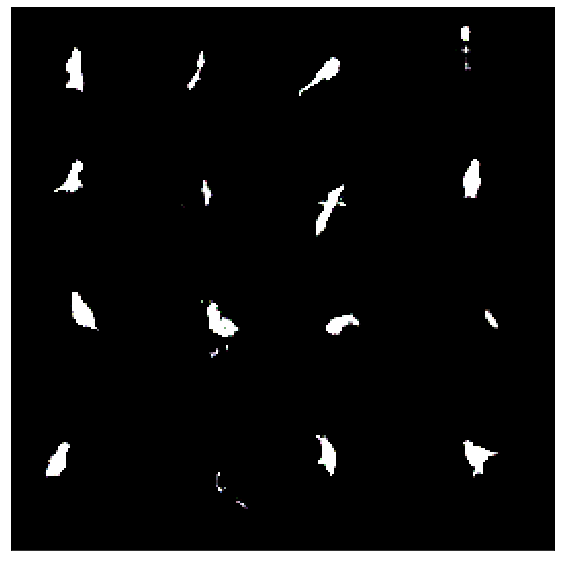

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


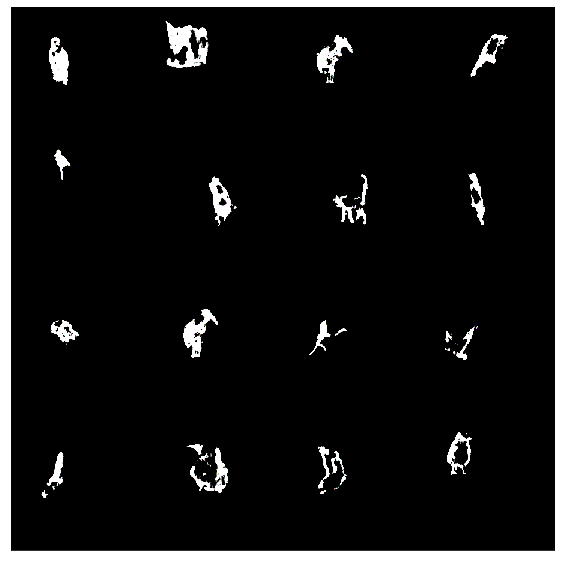

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 7


  0%|                                                                             | 3/17500 [00:14<47:55:18,  9.86s/it]

Train Epoch: 7 [0/280000 (0%)]	Loss: 0.025465
IOU : 0.0507049560546875


  0%|▏                                                                              | 52/17500 [00:17<19:36, 14.83it/s]

Train Epoch: 7 [200/280000 (0%)]	Loss: 0.021799
IOU : 0.0439453125


  1%|▍                                                                             | 102/17500 [00:21<22:45, 12.74it/s]

Train Epoch: 7 [400/280000 (1%)]	Loss: 0.025051
IOU : 0.0561676025390625


  1%|▋                                                                             | 151/17500 [00:27<49:19,  5.86it/s]

Train Epoch: 7 [600/280000 (1%)]	Loss: 0.029592
IOU : 0.054931640625


  1%|▉                                                                             | 201/17500 [00:34<41:40,  6.92it/s]

Train Epoch: 7 [800/280000 (1%)]	Loss: 0.047584
IOU : 0.056060791015625


  1%|█                                                                             | 251/17500 [00:40<46:16,  6.21it/s]

Train Epoch: 7 [1000/280000 (1%)]	Loss: 0.028517
IOU : 0.05645751953125


  2%|█▎                                                                            | 301/17500 [00:47<41:26,  6.92it/s]

Train Epoch: 7 [1200/280000 (2%)]	Loss: 0.027169
IOU : 0.049468994140625


  2%|█▌                                                                            | 351/17500 [00:53<41:25,  6.90it/s]

Train Epoch: 7 [1400/280000 (2%)]	Loss: 0.029541
IOU : 0.05413818359375


  2%|█▊                                                                            | 401/17500 [00:59<40:55,  6.96it/s]

Train Epoch: 7 [1600/280000 (2%)]	Loss: 0.022311
IOU : 0.0417633056640625


  3%|██                                                                            | 451/17500 [01:06<40:42,  6.98it/s]

Train Epoch: 7 [1800/280000 (3%)]	Loss: 0.028427
IOU : 0.054351806640625


  3%|██▏                                                                           | 501/17500 [01:12<40:44,  6.95it/s]

Train Epoch: 7 [2000/280000 (3%)]	Loss: 0.030511
IOU : 0.0521392822265625


  3%|██▍                                                                           | 551/17500 [01:18<40:58,  6.89it/s]

Train Epoch: 7 [2200/280000 (3%)]	Loss: 0.042539
IOU : 0.0509796142578125


  3%|██▋                                                                           | 601/17500 [01:24<40:50,  6.89it/s]

Train Epoch: 7 [2400/280000 (3%)]	Loss: 0.031525
IOU : 0.047882080078125


  4%|██▉                                                                           | 651/17500 [01:31<40:28,  6.94it/s]

Train Epoch: 7 [2600/280000 (4%)]	Loss: 0.037065
IOU : 0.0526275634765625


  4%|███                                                                           | 701/17500 [01:37<40:35,  6.90it/s]

Train Epoch: 7 [2800/280000 (4%)]	Loss: 0.032937
IOU : 0.0513916015625


  4%|███▎                                                                          | 751/17500 [01:43<40:16,  6.93it/s]

Train Epoch: 7 [3000/280000 (4%)]	Loss: 0.028459
IOU : 0.0525054931640625


  5%|███▌                                                                          | 801/17500 [01:49<40:16,  6.91it/s]

Train Epoch: 7 [3200/280000 (5%)]	Loss: 0.038581
IOU : 0.0530242919921875


  5%|███▊                                                                          | 851/17500 [01:55<39:55,  6.95it/s]

Train Epoch: 7 [3400/280000 (5%)]	Loss: 0.038322
IOU : 0.0482025146484375


  5%|████                                                                          | 901/17500 [02:02<39:51,  6.94it/s]

Train Epoch: 7 [3600/280000 (5%)]	Loss: 0.026467
IOU : 0.0579833984375


  5%|████▏                                                                         | 951/17500 [02:08<39:36,  6.96it/s]

Train Epoch: 7 [3800/280000 (5%)]	Loss: 0.026474
IOU : 0.042938232421875


  6%|████▍                                                                        | 1001/17500 [02:14<39:31,  6.96it/s]

Train Epoch: 7 [4000/280000 (6%)]	Loss: 0.023659
IOU : 0.050506591796875


  6%|████▌                                                                        | 1051/17500 [02:20<39:49,  6.88it/s]

Train Epoch: 7 [4200/280000 (6%)]	Loss: 0.037942
IOU : 0.0549163818359375


  6%|████▊                                                                        | 1103/17500 [02:27<35:26,  7.71it/s]

Train Epoch: 7 [4400/280000 (6%)]	Loss: 0.032842
IOU : 0.0590667724609375


  7%|█████                                                                        | 1151/17500 [02:33<39:13,  6.95it/s]

Train Epoch: 7 [4600/280000 (7%)]	Loss: 0.022836
IOU : 0.0489654541015625


  7%|█████▎                                                                       | 1201/17500 [02:39<39:06,  6.95it/s]

Train Epoch: 7 [4800/280000 (7%)]	Loss: 0.035507
IOU : 0.05145263671875


  7%|█████▌                                                                       | 1251/17500 [02:45<38:47,  6.98it/s]

Train Epoch: 7 [5000/280000 (7%)]	Loss: 0.027445
IOU : 0.0473175048828125


  7%|█████▋                                                                       | 1301/17500 [02:51<38:47,  6.96it/s]

Train Epoch: 7 [5200/280000 (7%)]	Loss: 0.031225
IOU : 0.054534912109375


  8%|█████▉                                                                       | 1351/17500 [02:58<38:49,  6.93it/s]

Train Epoch: 7 [5400/280000 (8%)]	Loss: 0.030990
IOU : 0.056396484375


  8%|██████▏                                                                      | 1401/17500 [03:04<38:46,  6.92it/s]

Train Epoch: 7 [5600/280000 (8%)]	Loss: 0.032078
IOU : 0.0539093017578125


  8%|██████▍                                                                      | 1451/17500 [03:10<38:43,  6.91it/s]

Train Epoch: 7 [5800/280000 (8%)]	Loss: 0.034724
IOU : 0.0487518310546875


  9%|██████▌                                                                      | 1501/17500 [03:16<38:14,  6.97it/s]

Train Epoch: 7 [6000/280000 (9%)]	Loss: 0.030300
IOU : 0.055877685546875


  9%|██████▊                                                                      | 1551/17500 [03:23<38:28,  6.91it/s]

Train Epoch: 7 [6200/280000 (9%)]	Loss: 0.028949
IOU : 0.0535430908203125


  9%|███████                                                                      | 1601/17500 [03:29<38:08,  6.95it/s]

Train Epoch: 7 [6400/280000 (9%)]	Loss: 0.046912
IOU : 0.0600738525390625


  9%|███████▎                                                                     | 1651/17500 [03:35<38:00,  6.95it/s]

Train Epoch: 7 [6600/280000 (9%)]	Loss: 0.033928
IOU : 0.05194091796875


 10%|███████▍                                                                     | 1701/17500 [03:41<37:49,  6.96it/s]

Train Epoch: 7 [6800/280000 (10%)]	Loss: 0.031187
IOU : 0.0527191162109375


 10%|███████▋                                                                     | 1751/17500 [03:47<37:46,  6.95it/s]

Train Epoch: 7 [7000/280000 (10%)]	Loss: 0.028984
IOU : 0.046539306640625


 10%|███████▉                                                                     | 1801/17500 [03:54<42:25,  6.17it/s]

Train Epoch: 7 [7200/280000 (10%)]	Loss: 0.029762
IOU : 0.0452117919921875


 11%|████████▏                                                                    | 1851/17500 [04:01<39:05,  6.67it/s]

Train Epoch: 7 [7400/280000 (11%)]	Loss: 0.026096
IOU : 0.05963134765625


 11%|████████▎                                                                    | 1901/17500 [04:08<38:16,  6.79it/s]

Train Epoch: 7 [7600/280000 (11%)]	Loss: 0.028071
IOU : 0.0510406494140625


 11%|████████▌                                                                    | 1951/17500 [04:14<37:46,  6.86it/s]

Train Epoch: 7 [7800/280000 (11%)]	Loss: 0.031399
IOU : 0.057342529296875


 11%|████████▊                                                                    | 2001/17500 [04:21<38:18,  6.74it/s]

Train Epoch: 7 [8000/280000 (11%)]	Loss: 0.026308
IOU : 0.05352783203125


 12%|█████████                                                                    | 2051/17500 [04:27<37:34,  6.85it/s]

Train Epoch: 7 [8200/280000 (12%)]	Loss: 0.028530
IOU : 0.05206298828125


 12%|█████████▏                                                                   | 2101/17500 [04:33<37:23,  6.86it/s]

Train Epoch: 7 [8400/280000 (12%)]	Loss: 0.030996
IOU : 0.0574951171875


 12%|█████████▍                                                                   | 2151/17500 [04:39<37:19,  6.85it/s]

Train Epoch: 7 [8600/280000 (12%)]	Loss: 0.029236
IOU : 0.0592498779296875


 13%|█████████▋                                                                   | 2201/17500 [04:46<37:12,  6.85it/s]

Train Epoch: 7 [8800/280000 (13%)]	Loss: 0.030638
IOU : 0.056121826171875


 13%|█████████▉                                                                   | 2251/17500 [04:52<38:27,  6.61it/s]

Train Epoch: 7 [9000/280000 (13%)]	Loss: 0.027791
IOU : 0.04937744140625


 13%|██████████                                                                   | 2301/17500 [04:59<37:20,  6.78it/s]

Train Epoch: 7 [9200/280000 (13%)]	Loss: 0.026017
IOU : 0.045562744140625


 13%|██████████▎                                                                  | 2351/17500 [05:05<36:50,  6.85it/s]

Train Epoch: 7 [9400/280000 (13%)]	Loss: 0.022626
IOU : 0.051422119140625


 14%|██████████▌                                                                  | 2401/17500 [05:11<36:42,  6.86it/s]

Train Epoch: 7 [9600/280000 (14%)]	Loss: 0.032466
IOU : 0.0525360107421875


 14%|██████████▊                                                                  | 2451/17500 [05:17<36:39,  6.84it/s]

Train Epoch: 7 [9800/280000 (14%)]	Loss: 0.027827
IOU : 0.0545196533203125


 14%|███████████                                                                  | 2501/17500 [05:24<36:32,  6.84it/s]

Train Epoch: 7 [10000/280000 (14%)]	Loss: 0.028384
IOU : 0.0492706298828125


 15%|███████████▏                                                                 | 2551/17500 [05:30<36:24,  6.84it/s]

Train Epoch: 7 [10200/280000 (15%)]	Loss: 0.031375
IOU : 0.0510101318359375


 15%|███████████▍                                                                 | 2601/17500 [05:36<36:42,  6.76it/s]

Train Epoch: 7 [10400/280000 (15%)]	Loss: 0.023175
IOU : 0.0514678955078125


 15%|███████████▋                                                                 | 2651/17500 [05:43<36:10,  6.84it/s]

Train Epoch: 7 [10600/280000 (15%)]	Loss: 0.032560
IOU : 0.0504913330078125


 15%|███████████▉                                                                 | 2701/17500 [05:49<36:05,  6.83it/s]

Train Epoch: 7 [10800/280000 (15%)]	Loss: 0.037422
IOU : 0.05322265625


 16%|████████████                                                                 | 2751/17500 [05:55<36:24,  6.75it/s]

Train Epoch: 7 [11000/280000 (16%)]	Loss: 0.027008
IOU : 0.0522308349609375


 16%|████████████                                                               | 2801/17500 [06:06<1:07:12,  3.65it/s]

Train Epoch: 7 [11200/280000 (16%)]	Loss: 0.025882
IOU : 0.0467987060546875


 16%|████████████▏                                                              | 2851/17500 [06:17<1:06:26,  3.67it/s]

Train Epoch: 7 [11400/280000 (16%)]	Loss: 0.033478
IOU : 0.0506439208984375


 17%|████████████▊                                                                | 2904/17500 [06:26<15:27, 15.74it/s]

Train Epoch: 7 [11600/280000 (17%)]	Loss: 0.029601
IOU : 0.0538787841796875


 17%|████████████▉                                                                | 2951/17500 [06:30<59:11,  4.10it/s]

Train Epoch: 7 [11800/280000 (17%)]	Loss: 0.023054
IOU : 0.046722412109375


 17%|████████████▊                                                              | 3001/17500 [06:42<1:05:45,  3.67it/s]

Train Epoch: 7 [12000/280000 (17%)]	Loss: 0.031483
IOU : 0.05902099609375


 17%|█████████████▍                                                               | 3051/17500 [06:48<35:17,  6.82it/s]

Train Epoch: 7 [12200/280000 (17%)]	Loss: 0.033520
IOU : 0.0530853271484375


 18%|█████████████▋                                                               | 3101/17500 [06:55<35:49,  6.70it/s]

Train Epoch: 7 [12400/280000 (18%)]	Loss: 0.022019
IOU : 0.040374755859375


 18%|█████████████▊                                                               | 3151/17500 [07:01<35:46,  6.69it/s]

Train Epoch: 7 [12600/280000 (18%)]	Loss: 0.023726
IOU : 0.05340576171875


 18%|██████████████                                                               | 3201/17500 [07:08<35:05,  6.79it/s]

Train Epoch: 7 [12800/280000 (18%)]	Loss: 0.036248
IOU : 0.0571441650390625


 19%|██████████████▎                                                              | 3253/17500 [07:13<20:07, 11.80it/s]

Train Epoch: 7 [13000/280000 (19%)]	Loss: 0.030102
IOU : 0.0568695068359375


 19%|██████████████▏                                                            | 3301/17500 [07:20<1:04:06,  3.69it/s]

Train Epoch: 7 [13200/280000 (19%)]	Loss: 0.030124
IOU : 0.0665740966796875


 19%|██████████████▎                                                            | 3351/17500 [07:32<1:04:10,  3.67it/s]

Train Epoch: 7 [13400/280000 (19%)]	Loss: 0.041159
IOU : 0.0571136474609375


 19%|██████████████▉                                                              | 3401/17500 [07:41<34:09,  6.88it/s]

Train Epoch: 7 [13600/280000 (19%)]	Loss: 0.041050
IOU : 0.05645751953125


 20%|███████████████▏                                                             | 3453/17500 [07:47<30:33,  7.66it/s]

Train Epoch: 7 [13800/280000 (20%)]	Loss: 0.027567
IOU : 0.0436859130859375


 20%|███████████████▍                                                             | 3501/17500 [07:53<33:51,  6.89it/s]

Train Epoch: 7 [14000/280000 (20%)]	Loss: 0.028698
IOU : 0.0566253662109375


 20%|███████████████▌                                                             | 3551/17500 [08:00<34:00,  6.84it/s]

Train Epoch: 7 [14200/280000 (20%)]	Loss: 0.032773
IOU : 0.0587158203125


 21%|███████████████▊                                                             | 3601/17500 [08:06<34:07,  6.79it/s]

Train Epoch: 7 [14400/280000 (21%)]	Loss: 0.035187
IOU : 0.048095703125


 21%|████████████████                                                             | 3651/17500 [08:12<33:57,  6.80it/s]

Train Epoch: 7 [14600/280000 (21%)]	Loss: 0.039472
IOU : 0.056884765625


 21%|████████████████▎                                                            | 3701/17500 [08:19<34:39,  6.63it/s]

Train Epoch: 7 [14800/280000 (21%)]	Loss: 0.036098
IOU : 0.0549774169921875


 21%|████████████████▌                                                            | 3751/17500 [08:25<33:31,  6.84it/s]

Train Epoch: 7 [15000/280000 (21%)]	Loss: 0.029587
IOU : 0.0537261962890625


 22%|████████████████▋                                                            | 3801/17500 [08:31<33:29,  6.82it/s]

Train Epoch: 7 [15200/280000 (22%)]	Loss: 0.034278
IOU : 0.052825927734375


 22%|████████████████▉                                                            | 3851/17500 [08:37<33:11,  6.85it/s]

Train Epoch: 7 [15400/280000 (22%)]	Loss: 0.039141
IOU : 0.0499725341796875


 22%|█████████████████▏                                                           | 3901/17500 [08:44<33:08,  6.84it/s]

Train Epoch: 7 [15600/280000 (22%)]	Loss: 0.025001
IOU : 0.0497589111328125


 23%|█████████████████▍                                                           | 3951/17500 [08:50<32:54,  6.86it/s]

Train Epoch: 7 [15800/280000 (23%)]	Loss: 0.028289
IOU : 0.0502166748046875


 23%|█████████████████▌                                                           | 4001/17500 [08:56<33:34,  6.70it/s]

Train Epoch: 7 [16000/280000 (23%)]	Loss: 0.034214
IOU : 0.0594024658203125


 23%|█████████████████▊                                                           | 4051/17500 [09:03<32:29,  6.90it/s]

Train Epoch: 7 [16200/280000 (23%)]	Loss: 0.022584
IOU : 0.045135498046875


 23%|██████████████████                                                           | 4101/17500 [09:09<32:53,  6.79it/s]

Train Epoch: 7 [16400/280000 (23%)]	Loss: 0.025637
IOU : 0.0532684326171875


 24%|██████████████████▎                                                          | 4151/17500 [09:15<32:31,  6.84it/s]

Train Epoch: 7 [16600/280000 (24%)]	Loss: 0.027723
IOU : 0.0576629638671875


 24%|██████████████████▍                                                          | 4201/17500 [09:22<32:37,  6.80it/s]

Train Epoch: 7 [16800/280000 (24%)]	Loss: 0.032900
IOU : 0.0452423095703125


 24%|██████████████████▋                                                          | 4251/17500 [09:28<32:19,  6.83it/s]

Train Epoch: 7 [17000/280000 (24%)]	Loss: 0.025042
IOU : 0.057861328125


 25%|██████████████████▉                                                          | 4301/17500 [09:34<32:16,  6.81it/s]

Train Epoch: 7 [17200/280000 (25%)]	Loss: 0.032702
IOU : 0.0512847900390625


 25%|███████████████████▏                                                         | 4351/17500 [09:41<32:15,  6.79it/s]

Train Epoch: 7 [17400/280000 (25%)]	Loss: 0.036397
IOU : 0.0519866943359375


 25%|███████████████████▎                                                         | 4401/17500 [09:47<31:56,  6.84it/s]

Train Epoch: 7 [17600/280000 (25%)]	Loss: 0.028563
IOU : 0.0575714111328125


 25%|███████████████████▌                                                         | 4451/17500 [09:53<31:43,  6.85it/s]

Train Epoch: 7 [17800/280000 (25%)]	Loss: 0.025394
IOU : 0.0535125732421875


 26%|███████████████████▊                                                         | 4501/17500 [10:00<31:49,  6.81it/s]

Train Epoch: 7 [18000/280000 (26%)]	Loss: 0.026450
IOU : 0.047027587890625


 26%|████████████████████                                                         | 4551/17500 [10:06<31:29,  6.85it/s]

Train Epoch: 7 [18200/280000 (26%)]	Loss: 0.021212
IOU : 0.0492095947265625


 26%|████████████████████▏                                                        | 4601/17500 [10:12<31:13,  6.89it/s]

Train Epoch: 7 [18400/280000 (26%)]	Loss: 0.024133
IOU : 0.05145263671875


 27%|████████████████████▍                                                        | 4651/17500 [10:19<31:30,  6.80it/s]

Train Epoch: 7 [18600/280000 (27%)]	Loss: 0.027534
IOU : 0.0503692626953125


 27%|████████████████████▋                                                        | 4701/17500 [10:25<31:24,  6.79it/s]

Train Epoch: 7 [18800/280000 (27%)]	Loss: 0.029068
IOU : 0.0525665283203125


 27%|████████████████████▉                                                        | 4751/17500 [10:31<31:10,  6.82it/s]

Train Epoch: 7 [19000/280000 (27%)]	Loss: 0.022468
IOU : 0.047088623046875


 27%|█████████████████████                                                        | 4801/17500 [10:36<34:47,  6.08it/s]

Train Epoch: 7 [19200/280000 (27%)]	Loss: 0.023731
IOU : 0.0460205078125


 28%|█████████████████████▎                                                       | 4851/17500 [10:48<56:57,  3.70it/s]

Train Epoch: 7 [19400/280000 (28%)]	Loss: 0.034795
IOU : 0.0506134033203125


 28%|█████████████████████▌                                                       | 4901/17500 [10:55<33:16,  6.31it/s]

Train Epoch: 7 [19600/280000 (28%)]	Loss: 0.028896
IOU : 0.0517120361328125


 28%|█████████████████████▊                                                       | 4951/17500 [11:02<32:27,  6.44it/s]

Train Epoch: 7 [19800/280000 (28%)]	Loss: 0.032909
IOU : 0.0515594482421875


 29%|██████████████████████                                                       | 5001/17500 [11:08<30:36,  6.81it/s]

Train Epoch: 7 [20000/280000 (29%)]	Loss: 0.035978
IOU : 0.05804443359375


 29%|██████████████████████▏                                                      | 5051/17500 [11:14<31:30,  6.59it/s]

Train Epoch: 7 [20200/280000 (29%)]	Loss: 0.030928
IOU : 0.0548858642578125


 29%|██████████████████████▍                                                      | 5101/17500 [11:21<32:26,  6.37it/s]

Train Epoch: 7 [20400/280000 (29%)]	Loss: 0.020259
IOU : 0.0467071533203125


 29%|██████████████████████▋                                                      | 5151/17500 [11:28<32:13,  6.39it/s]

Train Epoch: 7 [20600/280000 (29%)]	Loss: 0.029907
IOU : 0.05224609375


 30%|██████████████████████▉                                                      | 5201/17500 [11:34<31:08,  6.58it/s]

Train Epoch: 7 [20800/280000 (30%)]	Loss: 0.025299
IOU : 0.05712890625


 30%|███████████████████████                                                      | 5251/17500 [11:41<30:21,  6.72it/s]

Train Epoch: 7 [21000/280000 (30%)]	Loss: 0.025454
IOU : 0.0504302978515625


 30%|███████████████████████▎                                                     | 5301/17500 [11:48<31:42,  6.41it/s]

Train Epoch: 7 [21200/280000 (30%)]	Loss: 0.025604
IOU : 0.0502471923828125


 31%|███████████████████████▌                                                     | 5351/17500 [11:54<31:38,  6.40it/s]

Train Epoch: 7 [21400/280000 (31%)]	Loss: 0.028561
IOU : 0.048797607421875


 31%|███████████████████████▊                                                     | 5401/17500 [12:01<29:42,  6.79it/s]

Train Epoch: 7 [21600/280000 (31%)]	Loss: 0.027482
IOU : 0.0486907958984375


 31%|███████████████████████▉                                                     | 5451/17500 [12:07<29:15,  6.86it/s]

Train Epoch: 7 [21800/280000 (31%)]	Loss: 0.034134
IOU : 0.0550079345703125


 31%|████████████████████████▏                                                    | 5501/17500 [12:14<28:59,  6.90it/s]

Train Epoch: 7 [22000/280000 (31%)]	Loss: 0.026553
IOU : 0.0533599853515625


 32%|████████████████████████▍                                                    | 5551/17500 [12:20<32:41,  6.09it/s]

Train Epoch: 7 [22200/280000 (32%)]	Loss: 0.041338
IOU : 0.0572509765625


 32%|████████████████████████▋                                                    | 5603/17500 [12:27<26:47,  7.40it/s]

Train Epoch: 7 [22400/280000 (32%)]	Loss: 0.025468
IOU : 0.054351806640625


 32%|████████████████████████▊                                                    | 5651/17500 [12:33<28:44,  6.87it/s]

Train Epoch: 7 [22600/280000 (32%)]	Loss: 0.069881
IOU : 0.055938720703125


 33%|█████████████████████████                                                    | 5701/17500 [12:40<34:24,  5.72it/s]

Train Epoch: 7 [22800/280000 (33%)]	Loss: 0.035957
IOU : 0.0564117431640625


 33%|█████████████████████████▎                                                   | 5751/17500 [12:47<29:03,  6.74it/s]

Train Epoch: 7 [23000/280000 (33%)]	Loss: 0.023488
IOU : 0.0531158447265625


 33%|█████████████████████████▌                                                   | 5801/17500 [12:53<29:25,  6.62it/s]

Train Epoch: 7 [23200/280000 (33%)]	Loss: 0.031964
IOU : 0.053009033203125


 33%|█████████████████████████▋                                                   | 5851/17500 [13:01<30:09,  6.44it/s]

Train Epoch: 7 [23400/280000 (33%)]	Loss: 0.029338
IOU : 0.0487823486328125


 34%|█████████████████████████▉                                                   | 5901/17500 [13:08<33:47,  5.72it/s]

Train Epoch: 7 [23600/280000 (34%)]	Loss: 0.025840
IOU : 0.051055908203125


 34%|██████████████████████████▏                                                  | 5951/17500 [13:14<27:54,  6.90it/s]

Train Epoch: 7 [23800/280000 (34%)]	Loss: 0.032158
IOU : 0.0486297607421875


 34%|██████████████████████████▍                                                  | 6001/17500 [13:20<27:48,  6.89it/s]

Train Epoch: 7 [24000/280000 (34%)]	Loss: 0.027714
IOU : 0.052978515625


 35%|██████████████████████████▌                                                  | 6051/17500 [13:27<27:57,  6.83it/s]

Train Epoch: 7 [24200/280000 (35%)]	Loss: 0.032216
IOU : 0.0548553466796875


 35%|██████████████████████████▊                                                  | 6101/17500 [13:34<31:33,  6.02it/s]

Train Epoch: 7 [24400/280000 (35%)]	Loss: 0.033737
IOU : 0.0540618896484375


 35%|███████████████████████████                                                  | 6151/17500 [13:41<27:43,  6.82it/s]

Train Epoch: 7 [24600/280000 (35%)]	Loss: 0.034869
IOU : 0.05255126953125


 35%|███████████████████████████▎                                                 | 6201/17500 [13:48<32:32,  5.79it/s]

Train Epoch: 7 [24800/280000 (35%)]	Loss: 0.027941
IOU : 0.0520172119140625


 36%|███████████████████████████▌                                                 | 6251/17500 [13:55<27:24,  6.84it/s]

Train Epoch: 7 [25000/280000 (36%)]	Loss: 0.034030
IOU : 0.0533447265625


 36%|███████████████████████████▋                                                 | 6301/17500 [14:02<27:26,  6.80it/s]

Train Epoch: 7 [25200/280000 (36%)]	Loss: 0.022241
IOU : 0.0510406494140625


 36%|███████████████████████████▉                                                 | 6351/17500 [14:08<27:35,  6.73it/s]

Train Epoch: 7 [25400/280000 (36%)]	Loss: 0.035358
IOU : 0.04913330078125


 37%|████████████████████████████▏                                                | 6401/17500 [14:15<27:31,  6.72it/s]

Train Epoch: 7 [25600/280000 (37%)]	Loss: 0.022792
IOU : 0.04925537109375


 37%|████████████████████████████▍                                                | 6451/17500 [14:21<26:46,  6.88it/s]

Train Epoch: 7 [25800/280000 (37%)]	Loss: 0.036317
IOU : 0.0570220947265625


 37%|████████████████████████████▌                                                | 6501/17500 [14:27<26:55,  6.81it/s]

Train Epoch: 7 [26000/280000 (37%)]	Loss: 0.026528
IOU : 0.050872802734375


 37%|████████████████████████████▊                                                | 6551/17500 [14:34<27:43,  6.58it/s]

Train Epoch: 7 [26200/280000 (37%)]	Loss: 0.032138
IOU : 0.0504302978515625


 38%|█████████████████████████████                                                | 6601/17500 [14:40<26:23,  6.88it/s]

Train Epoch: 7 [26400/280000 (38%)]	Loss: 0.025899
IOU : 0.0525360107421875


 38%|█████████████████████████████▎                                               | 6651/17500 [14:46<26:24,  6.85it/s]

Train Epoch: 7 [26600/280000 (38%)]	Loss: 0.036167
IOU : 0.0578155517578125


 38%|█████████████████████████████▍                                               | 6701/17500 [14:53<26:30,  6.79it/s]

Train Epoch: 7 [26800/280000 (38%)]	Loss: 0.036607
IOU : 0.053955078125


 39%|█████████████████████████████▋                                               | 6751/17500 [14:59<26:22,  6.79it/s]

Train Epoch: 7 [27000/280000 (39%)]	Loss: 0.020811
IOU : 0.0513763427734375


 39%|█████████████████████████████▉                                               | 6801/17500 [15:06<27:01,  6.60it/s]

Train Epoch: 7 [27200/280000 (39%)]	Loss: 0.022881
IOU : 0.0475006103515625


 39%|██████████████████████████████▏                                              | 6851/17500 [15:12<25:39,  6.92it/s]

Train Epoch: 7 [27400/280000 (39%)]	Loss: 0.030629
IOU : 0.058624267578125


 39%|██████████████████████████████▎                                              | 6901/17500 [15:19<25:49,  6.84it/s]

Train Epoch: 7 [27600/280000 (39%)]	Loss: 0.034892
IOU : 0.0534820556640625


 40%|██████████████████████████████▌                                              | 6951/17500 [15:25<26:26,  6.65it/s]

Train Epoch: 7 [27800/280000 (40%)]	Loss: 0.023398
IOU : 0.048797607421875


 40%|██████████████████████████████▊                                              | 7001/17500 [15:31<25:13,  6.94it/s]

Train Epoch: 7 [28000/280000 (40%)]	Loss: 0.031930
IOU : 0.0520172119140625


 40%|███████████████████████████████                                              | 7051/17500 [15:38<25:31,  6.82it/s]

Train Epoch: 7 [28200/280000 (40%)]	Loss: 0.034869
IOU : 0.05157470703125


 41%|███████████████████████████████▏                                             | 7101/17500 [15:44<25:15,  6.86it/s]

Train Epoch: 7 [28400/280000 (41%)]	Loss: 0.027731
IOU : 0.0550384521484375


 41%|███████████████████████████████▍                                             | 7151/17500 [15:50<25:41,  6.71it/s]

Train Epoch: 7 [28600/280000 (41%)]	Loss: 0.031582
IOU : 0.04949951171875


 41%|███████████████████████████████▋                                             | 7201/17500 [15:57<24:54,  6.89it/s]

Train Epoch: 7 [28800/280000 (41%)]	Loss: 0.049442
IOU : 0.06365966796875


 41%|███████████████████████████████▉                                             | 7251/17500 [16:03<24:51,  6.87it/s]

Train Epoch: 7 [29000/280000 (41%)]	Loss: 0.031688
IOU : 0.05718994140625


 42%|████████████████████████████████                                             | 7301/17500 [16:10<24:44,  6.87it/s]

Train Epoch: 7 [29200/280000 (42%)]	Loss: 0.032529
IOU : 0.05352783203125


 42%|████████████████████████████████▎                                            | 7351/17500 [16:16<24:54,  6.79it/s]

Train Epoch: 7 [29400/280000 (42%)]	Loss: 0.027001
IOU : 0.0531768798828125


 42%|████████████████████████████████▌                                            | 7401/17500 [16:22<24:41,  6.81it/s]

Train Epoch: 7 [29600/280000 (42%)]	Loss: 0.024616
IOU : 0.0485382080078125


 43%|████████████████████████████████▊                                            | 7451/17500 [16:29<24:32,  6.83it/s]

Train Epoch: 7 [29800/280000 (43%)]	Loss: 0.029237
IOU : 0.0498504638671875


 43%|█████████████████████████████████                                            | 7501/17500 [16:35<24:35,  6.78it/s]

Train Epoch: 7 [30000/280000 (43%)]	Loss: 0.049487
IOU : 0.054168701171875


 43%|█████████████████████████████████▏                                           | 7551/17500 [16:41<24:10,  6.86it/s]

Train Epoch: 7 [30200/280000 (43%)]	Loss: 0.029503
IOU : 0.050811767578125


 43%|█████████████████████████████████▍                                           | 7601/17500 [16:48<24:10,  6.82it/s]

Train Epoch: 7 [30400/280000 (43%)]	Loss: 0.025717
IOU : 0.0552520751953125


 44%|█████████████████████████████████▋                                           | 7651/17500 [16:54<23:49,  6.89it/s]

Train Epoch: 7 [30600/280000 (44%)]	Loss: 0.029131
IOU : 0.0581207275390625


 44%|█████████████████████████████████▉                                           | 7701/17500 [17:01<24:03,  6.79it/s]

Train Epoch: 7 [30800/280000 (44%)]	Loss: 0.029348
IOU : 0.0576019287109375


 44%|██████████████████████████████████                                           | 7751/17500 [17:07<24:00,  6.77it/s]

Train Epoch: 7 [31000/280000 (44%)]	Loss: 0.040198
IOU : 0.0570220947265625


 45%|██████████████████████████████████▎                                          | 7801/17500 [17:13<23:29,  6.88it/s]

Train Epoch: 7 [31200/280000 (45%)]	Loss: 0.024878
IOU : 0.0528717041015625


 45%|██████████████████████████████████▌                                          | 7851/17500 [17:20<24:43,  6.50it/s]

Train Epoch: 7 [31400/280000 (45%)]	Loss: 0.027299
IOU : 0.04693603515625


 45%|██████████████████████████████████▊                                          | 7901/17500 [17:26<25:16,  6.33it/s]

Train Epoch: 7 [31600/280000 (45%)]	Loss: 0.034241
IOU : 0.04949951171875


 45%|██████████████████████████████████▉                                          | 7951/17500 [17:33<23:25,  6.80it/s]

Train Epoch: 7 [31800/280000 (45%)]	Loss: 0.035697
IOU : 0.04937744140625


 46%|███████████████████████████████████▏                                         | 8001/17500 [17:39<23:09,  6.84it/s]

Train Epoch: 7 [32000/280000 (46%)]	Loss: 0.028398
IOU : 0.0537109375


 46%|███████████████████████████████████▍                                         | 8051/17500 [17:45<23:04,  6.82it/s]

Train Epoch: 7 [32200/280000 (46%)]	Loss: 0.031365
IOU : 0.06134033203125


 46%|███████████████████████████████████▋                                         | 8101/17500 [17:52<22:59,  6.81it/s]

Train Epoch: 7 [32400/280000 (46%)]	Loss: 0.026368
IOU : 0.0502166748046875


 47%|███████████████████████████████████▊                                         | 8151/17500 [17:58<22:44,  6.85it/s]

Train Epoch: 7 [32600/280000 (47%)]	Loss: 0.037743
IOU : 0.0558624267578125


 47%|████████████████████████████████████                                         | 8201/17500 [18:04<22:57,  6.75it/s]

Train Epoch: 7 [32800/280000 (47%)]	Loss: 0.033057
IOU : 0.0532684326171875


 47%|████████████████████████████████████▎                                        | 8251/17500 [18:11<22:23,  6.88it/s]

Train Epoch: 7 [33000/280000 (47%)]	Loss: 0.030608
IOU : 0.0551605224609375


 47%|████████████████████████████████████▌                                        | 8301/17500 [18:17<22:53,  6.70it/s]

Train Epoch: 7 [33200/280000 (47%)]	Loss: 0.022909
IOU : 0.050811767578125


 48%|████████████████████████████████████▋                                        | 8351/17500 [18:24<22:33,  6.76it/s]

Train Epoch: 7 [33400/280000 (48%)]	Loss: 0.024172
IOU : 0.0475006103515625


 48%|████████████████████████████████████▉                                        | 8401/17500 [18:30<24:15,  6.25it/s]

Train Epoch: 7 [33600/280000 (48%)]	Loss: 0.022269
IOU : 0.051116943359375


 48%|█████████████████████████████████████▏                                       | 8451/17500 [18:36<21:59,  6.86it/s]

Train Epoch: 7 [33800/280000 (48%)]	Loss: 0.030235
IOU : 0.0511016845703125


 49%|█████████████████████████████████████▍                                       | 8501/17500 [18:43<21:46,  6.89it/s]

Train Epoch: 7 [34000/280000 (49%)]	Loss: 0.027676
IOU : 0.053070068359375


 49%|█████████████████████████████████████▌                                       | 8551/17500 [18:53<41:39,  3.58it/s]

Train Epoch: 7 [34200/280000 (49%)]	Loss: 0.035018
IOU : 0.0565338134765625


 49%|█████████████████████████████████████▊                                       | 8601/17500 [19:05<41:37,  3.56it/s]

Train Epoch: 7 [34400/280000 (49%)]	Loss: 0.026317
IOU : 0.0470123291015625


 49%|██████████████████████████████████████                                       | 8652/17500 [19:12<11:05, 13.29it/s]

Train Epoch: 7 [34600/280000 (49%)]	Loss: 0.026782
IOU : 0.0546875


 50%|██████████████████████████████████████▎                                      | 8704/17500 [19:15<09:17, 15.79it/s]

Train Epoch: 7 [34800/280000 (50%)]	Loss: 0.027864
IOU : 0.051055908203125


 50%|██████████████████████████████████████▌                                      | 8751/17500 [19:21<21:17,  6.85it/s]

Train Epoch: 7 [35000/280000 (50%)]	Loss: 0.030017
IOU : 0.05230712890625


 50%|██████████████████████████████████████▋                                      | 8801/17500 [19:27<21:06,  6.87it/s]

Train Epoch: 7 [35200/280000 (50%)]	Loss: 0.039750
IOU : 0.0629730224609375


 51%|██████████████████████████████████████▉                                      | 8851/17500 [19:34<20:54,  6.90it/s]

Train Epoch: 7 [35400/280000 (51%)]	Loss: 0.041986
IOU : 0.0613861083984375


 51%|███████████████████████████████████████▏                                     | 8901/17500 [19:40<21:09,  6.77it/s]

Train Epoch: 7 [35600/280000 (51%)]	Loss: 0.035426
IOU : 0.057952880859375


 51%|███████████████████████████████████████▍                                     | 8951/17500 [19:47<20:38,  6.90it/s]

Train Epoch: 7 [35800/280000 (51%)]	Loss: 0.025315
IOU : 0.046356201171875


 51%|███████████████████████████████████████▌                                     | 9001/17500 [19:53<21:53,  6.47it/s]

Train Epoch: 7 [36000/280000 (51%)]	Loss: 0.026266
IOU : 0.0551605224609375


 52%|███████████████████████████████████████▊                                     | 9051/17500 [19:59<20:37,  6.83it/s]

Train Epoch: 7 [36200/280000 (52%)]	Loss: 0.021936
IOU : 0.0480804443359375


 52%|████████████████████████████████████████                                     | 9101/17500 [20:06<20:18,  6.89it/s]

Train Epoch: 7 [36400/280000 (52%)]	Loss: 0.025374
IOU : 0.04888916015625


 52%|████████████████████████████████████████▎                                    | 9151/17500 [20:12<20:17,  6.86it/s]

Train Epoch: 7 [36600/280000 (52%)]	Loss: 0.026627
IOU : 0.0506744384765625


 53%|████████████████████████████████████████▍                                    | 9201/17500 [20:19<20:11,  6.85it/s]

Train Epoch: 7 [36800/280000 (53%)]	Loss: 0.022071
IOU : 0.053070068359375


 53%|████████████████████████████████████████▋                                    | 9251/17500 [20:25<20:00,  6.87it/s]

Train Epoch: 7 [37000/280000 (53%)]	Loss: 0.026760
IOU : 0.05609130859375


 53%|████████████████████████████████████████▉                                    | 9301/17500 [20:31<19:57,  6.84it/s]

Train Epoch: 7 [37200/280000 (53%)]	Loss: 0.035915
IOU : 0.0554351806640625


 53%|█████████████████████████████████████████▏                                   | 9351/17500 [20:38<19:51,  6.84it/s]

Train Epoch: 7 [37400/280000 (53%)]	Loss: 0.027172
IOU : 0.0538482666015625


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [20:44<19:38,  6.87it/s]

Train Epoch: 7 [37600/280000 (54%)]	Loss: 0.043751
IOU : 0.0593414306640625


 54%|█████████████████████████████████████████▌                                   | 9451/17500 [20:50<19:31,  6.87it/s]

Train Epoch: 7 [37800/280000 (54%)]	Loss: 0.019550
IOU : 0.0479736328125


 54%|█████████████████████████████████████████▊                                   | 9501/17500 [20:56<19:25,  6.86it/s]

Train Epoch: 7 [38000/280000 (54%)]	Loss: 0.036094
IOU : 0.0558624267578125


 55%|██████████████████████████████████████████                                   | 9551/17500 [21:03<19:25,  6.82it/s]

Train Epoch: 7 [38200/280000 (55%)]	Loss: 0.028179
IOU : 0.049224853515625


 55%|██████████████████████████████████████████▏                                  | 9601/17500 [21:09<19:10,  6.86it/s]

Train Epoch: 7 [38400/280000 (55%)]	Loss: 0.031816
IOU : 0.05267333984375


 55%|██████████████████████████████████████████▍                                  | 9651/17500 [21:15<19:35,  6.68it/s]

Train Epoch: 7 [38600/280000 (55%)]	Loss: 0.030110
IOU : 0.0529632568359375


 55%|██████████████████████████████████████████▋                                  | 9701/17500 [21:22<18:52,  6.89it/s]

Train Epoch: 7 [38800/280000 (55%)]	Loss: 0.030358
IOU : 0.0543212890625


 56%|██████████████████████████████████████████▉                                  | 9751/17500 [21:28<18:46,  6.88it/s]

Train Epoch: 7 [39000/280000 (56%)]	Loss: 0.024917
IOU : 0.0498809814453125


 56%|███████████████████████████████████████████                                  | 9801/17500 [21:34<19:02,  6.74it/s]

Train Epoch: 7 [39200/280000 (56%)]	Loss: 0.035792
IOU : 0.0653228759765625


 56%|███████████████████████████████████████████▎                                 | 9851/17500 [21:41<20:49,  6.12it/s]

Train Epoch: 7 [39400/280000 (56%)]	Loss: 0.033714
IOU : 0.05462646484375


 57%|███████████████████████████████████████████▌                                 | 9901/17500 [21:47<18:27,  6.86it/s]

Train Epoch: 7 [39600/280000 (57%)]	Loss: 0.025880
IOU : 0.048614501953125


 57%|███████████████████████████████████████████▊                                 | 9951/17500 [21:54<19:50,  6.34it/s]

Train Epoch: 7 [39800/280000 (57%)]	Loss: 0.032286
IOU : 0.05706787109375


 57%|███████████████████████████████████████████▍                                | 10001/17500 [22:01<23:06,  5.41it/s]

Train Epoch: 7 [40000/280000 (57%)]	Loss: 0.029021
IOU : 0.057159423828125


 57%|███████████████████████████████████████████▋                                | 10051/17500 [22:12<36:02,  3.44it/s]

Train Epoch: 7 [40200/280000 (57%)]	Loss: 0.031114
IOU : 0.0547332763671875


 58%|███████████████████████████████████████████▊                                | 10101/17500 [22:23<33:39,  3.66it/s]

Train Epoch: 7 [40400/280000 (58%)]	Loss: 0.030894
IOU : 0.055938720703125


 58%|████████████████████████████████████████████                                | 10151/17500 [22:34<23:33,  5.20it/s]

Train Epoch: 7 [40600/280000 (58%)]	Loss: 0.028210
IOU : 0.042327880859375


 58%|████████████████████████████████████████████▎                               | 10201/17500 [22:42<19:41,  6.18it/s]

Train Epoch: 7 [40800/280000 (58%)]	Loss: 0.035840
IOU : 0.0521392822265625


 59%|████████████████████████████████████████████▌                               | 10252/17500 [22:50<20:35,  5.87it/s]

Train Epoch: 7 [41000/280000 (59%)]	Loss: 0.031942
IOU : 0.0476837158203125


 59%|████████████████████████████████████████████▋                               | 10301/17500 [22:56<17:44,  6.77it/s]

Train Epoch: 7 [41200/280000 (59%)]	Loss: 0.043940
IOU : 0.05291748046875


 59%|████████████████████████████████████████████▉                               | 10351/17500 [23:03<18:30,  6.44it/s]

Train Epoch: 7 [41400/280000 (59%)]	Loss: 0.026687
IOU : 0.0499725341796875


 59%|█████████████████████████████████████████████▏                              | 10402/17500 [23:10<17:28,  6.77it/s]

Train Epoch: 7 [41600/280000 (59%)]	Loss: 0.032462
IOU : 0.0528411865234375


 60%|█████████████████████████████████████████████▍                              | 10451/17500 [23:16<17:08,  6.85it/s]

Train Epoch: 7 [41800/280000 (60%)]	Loss: 0.030706
IOU : 0.04876708984375


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [23:23<17:33,  6.64it/s]

Train Epoch: 7 [42000/280000 (60%)]	Loss: 0.037801
IOU : 0.0599822998046875


 60%|█████████████████████████████████████████████▊                              | 10551/17500 [23:30<17:34,  6.59it/s]

Train Epoch: 7 [42200/280000 (60%)]	Loss: 0.052846
IOU : 0.0621185302734375


 61%|██████████████████████████████████████████████                              | 10601/17500 [23:36<18:26,  6.24it/s]

Train Epoch: 7 [42400/280000 (61%)]	Loss: 0.060489
IOU : 0.06451416015625


 61%|██████████████████████████████████████████████▎                             | 10651/17500 [23:43<17:26,  6.55it/s]

Train Epoch: 7 [42600/280000 (61%)]	Loss: 0.040529
IOU : 0.0581817626953125


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [23:50<17:15,  6.57it/s]

Train Epoch: 7 [42800/280000 (61%)]	Loss: 0.033434
IOU : 0.059967041015625


 61%|██████████████████████████████████████████████▋                             | 10751/17500 [23:56<17:24,  6.46it/s]

Train Epoch: 7 [43000/280000 (61%)]	Loss: 0.023527
IOU : 0.0591583251953125


 62%|██████████████████████████████████████████████▉                             | 10801/17500 [24:03<17:05,  6.53it/s]

Train Epoch: 7 [43200/280000 (62%)]	Loss: 0.020310
IOU : 0.0473175048828125


 62%|███████████████████████████████████████████████                             | 10851/17500 [24:10<17:41,  6.26it/s]

Train Epoch: 7 [43400/280000 (62%)]	Loss: 0.027393
IOU : 0.0523529052734375


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [24:16<17:22,  6.33it/s]

Train Epoch: 7 [43600/280000 (62%)]	Loss: 0.041285
IOU : 0.0596466064453125


 63%|███████████████████████████████████████████████▌                            | 10951/17500 [24:23<17:18,  6.31it/s]

Train Epoch: 7 [43800/280000 (63%)]	Loss: 0.027986
IOU : 0.051910400390625


 63%|███████████████████████████████████████████████▊                            | 11001/17500 [24:30<16:56,  6.39it/s]

Train Epoch: 7 [44000/280000 (63%)]	Loss: 0.027920
IOU : 0.0517425537109375


 63%|███████████████████████████████████████████████▉                            | 11051/17500 [24:37<16:01,  6.70it/s]

Train Epoch: 7 [44200/280000 (63%)]	Loss: 0.031613
IOU : 0.0626373291015625


 63%|████████████████████████████████████████████████▏                           | 11101/17500 [24:43<16:47,  6.35it/s]

Train Epoch: 7 [44400/280000 (63%)]	Loss: 0.032976
IOU : 0.0605926513671875


 64%|████████████████████████████████████████████████▍                           | 11151/17500 [24:50<16:02,  6.60it/s]

Train Epoch: 7 [44600/280000 (64%)]	Loss: 0.023398
IOU : 0.04901123046875


 64%|████████████████████████████████████████████████▋                           | 11201/17500 [24:56<15:51,  6.62it/s]

Train Epoch: 7 [44800/280000 (64%)]	Loss: 0.024041
IOU : 0.050384521484375


 64%|████████████████████████████████████████████████▊                           | 11251/17500 [25:03<15:36,  6.68it/s]

Train Epoch: 7 [45000/280000 (64%)]	Loss: 0.027216
IOU : 0.0502777099609375


 65%|█████████████████████████████████████████████████                           | 11301/17500 [25:09<15:35,  6.62it/s]

Train Epoch: 7 [45200/280000 (65%)]	Loss: 0.024431
IOU : 0.0568389892578125


 65%|█████████████████████████████████████████████████▎                          | 11351/17500 [25:16<15:49,  6.48it/s]

Train Epoch: 7 [45400/280000 (65%)]	Loss: 0.042716
IOU : 0.06463623046875


 65%|█████████████████████████████████████████████████▌                          | 11401/17500 [25:22<15:07,  6.72it/s]

Train Epoch: 7 [45600/280000 (65%)]	Loss: 0.029132
IOU : 0.0564117431640625


 65%|█████████████████████████████████████████████████▋                          | 11451/17500 [25:29<15:17,  6.59it/s]

Train Epoch: 7 [45800/280000 (65%)]	Loss: 0.024195
IOU : 0.0518798828125


 66%|█████████████████████████████████████████████████▉                          | 11501/17500 [25:35<14:53,  6.72it/s]

Train Epoch: 7 [46000/280000 (66%)]	Loss: 0.029349
IOU : 0.0528106689453125


 66%|██████████████████████████████████████████████████▏                         | 11551/17500 [25:42<14:44,  6.73it/s]

Train Epoch: 7 [46200/280000 (66%)]	Loss: 0.027825
IOU : 0.05877685546875


 66%|██████████████████████████████████████████████████▍                         | 11601/17500 [25:48<14:34,  6.75it/s]

Train Epoch: 7 [46400/280000 (66%)]	Loss: 0.035676
IOU : 0.0605010986328125


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [25:55<14:39,  6.65it/s]

Train Epoch: 7 [46600/280000 (67%)]	Loss: 0.027066
IOU : 0.0538177490234375


 67%|██████████████████████████████████████████████████▊                         | 11701/17500 [26:01<14:31,  6.65it/s]

Train Epoch: 7 [46800/280000 (67%)]	Loss: 0.024538
IOU : 0.046356201171875


 67%|███████████████████████████████████████████████████                         | 11751/17500 [26:08<14:31,  6.59it/s]

Train Epoch: 7 [47000/280000 (67%)]	Loss: 0.025734
IOU : 0.0516357421875


 67%|███████████████████████████████████████████████████▎                        | 11801/17500 [26:15<14:13,  6.68it/s]

Train Epoch: 7 [47200/280000 (67%)]	Loss: 0.039997
IOU : 0.06097412109375


 68%|███████████████████████████████████████████████████▍                        | 11851/17500 [26:21<13:59,  6.73it/s]

Train Epoch: 7 [47400/280000 (68%)]	Loss: 0.027073
IOU : 0.0571441650390625


 68%|███████████████████████████████████████████████████▋                        | 11901/17500 [26:28<13:46,  6.77it/s]

Train Epoch: 7 [47600/280000 (68%)]	Loss: 0.032613
IOU : 0.048858642578125


 68%|███████████████████████████████████████████████████▉                        | 11951/17500 [26:34<13:35,  6.80it/s]

Train Epoch: 7 [47800/280000 (68%)]	Loss: 0.022598
IOU : 0.0580291748046875


 69%|████████████████████████████████████████████████████                        | 12001/17500 [26:40<13:27,  6.81it/s]

Train Epoch: 7 [48000/280000 (69%)]	Loss: 0.027036
IOU : 0.0482940673828125


 69%|████████████████████████████████████████████████████▎                       | 12051/17500 [26:47<13:41,  6.63it/s]

Train Epoch: 7 [48200/280000 (69%)]	Loss: 0.035295
IOU : 0.0521392822265625


 69%|████████████████████████████████████████████████████▌                       | 12101/17500 [26:53<13:26,  6.69it/s]

Train Epoch: 7 [48400/280000 (69%)]	Loss: 0.025313
IOU : 0.0490875244140625


 69%|████████████████████████████████████████████████████▊                       | 12151/17500 [27:00<13:06,  6.80it/s]

Train Epoch: 7 [48600/280000 (69%)]	Loss: 0.023863
IOU : 0.0531768798828125


 70%|████████████████████████████████████████████████████▉                       | 12201/17500 [27:06<14:08,  6.25it/s]

Train Epoch: 7 [48800/280000 (70%)]	Loss: 0.024323
IOU : 0.0510406494140625


 70%|█████████████████████████████████████████████████████▏                      | 12251/17500 [27:13<14:11,  6.17it/s]

Train Epoch: 7 [49000/280000 (70%)]	Loss: 0.032220
IOU : 0.0517425537109375


 70%|█████████████████████████████████████████████████████▍                      | 12301/17500 [27:19<13:56,  6.22it/s]

Train Epoch: 7 [49200/280000 (70%)]	Loss: 0.026304
IOU : 0.0596771240234375


 71%|█████████████████████████████████████████████████████▋                      | 12352/17500 [27:26<12:08,  7.06it/s]

Train Epoch: 7 [49400/280000 (71%)]	Loss: 0.026038
IOU : 0.045166015625


 71%|█████████████████████████████████████████████████████▊                      | 12401/17500 [27:33<13:28,  6.31it/s]

Train Epoch: 7 [49600/280000 (71%)]	Loss: 0.021961
IOU : 0.052001953125


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [27:39<12:38,  6.65it/s]

Train Epoch: 7 [49800/280000 (71%)]	Loss: 0.027190
IOU : 0.052093505859375


 71%|██████████████████████████████████████████████████████▎                     | 12501/17500 [27:46<13:21,  6.24it/s]

Train Epoch: 7 [50000/280000 (71%)]	Loss: 0.033533
IOU : 0.0614776611328125


 72%|██████████████████████████████████████████████████████▌                     | 12551/17500 [27:53<12:33,  6.57it/s]

Train Epoch: 7 [50200/280000 (72%)]	Loss: 0.029277
IOU : 0.0517425537109375


 72%|██████████████████████████████████████████████████████▋                     | 12601/17500 [27:59<12:17,  6.64it/s]

Train Epoch: 7 [50400/280000 (72%)]	Loss: 0.038418
IOU : 0.0530242919921875


 72%|██████████████████████████████████████████████████████▉                     | 12651/17500 [28:06<12:03,  6.70it/s]

Train Epoch: 7 [50600/280000 (72%)]	Loss: 0.033321
IOU : 0.0554046630859375


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [28:12<12:45,  6.27it/s]

Train Epoch: 7 [50800/280000 (73%)]	Loss: 0.025189
IOU : 0.0583343505859375


 73%|███████████████████████████████████████████████████████▍                    | 12751/17500 [28:19<12:11,  6.49it/s]

Train Epoch: 7 [51000/280000 (73%)]	Loss: 0.023110
IOU : 0.046600341796875


 73%|███████████████████████████████████████████████████████▌                    | 12801/17500 [28:26<11:52,  6.59it/s]

Train Epoch: 7 [51200/280000 (73%)]	Loss: 0.022277
IOU : 0.0523223876953125


 73%|███████████████████████████████████████████████████████▊                    | 12851/17500 [28:32<11:30,  6.74it/s]

Train Epoch: 7 [51400/280000 (73%)]	Loss: 0.031364
IOU : 0.0556488037109375


 74%|████████████████████████████████████████████████████████                    | 12901/17500 [28:39<11:27,  6.69it/s]

Train Epoch: 7 [51600/280000 (74%)]	Loss: 0.043993
IOU : 0.06060791015625


 74%|████████████████████████████████████████████████████████▏                   | 12951/17500 [28:45<11:24,  6.65it/s]

Train Epoch: 7 [51800/280000 (74%)]	Loss: 0.034104
IOU : 0.0516815185546875


 74%|████████████████████████████████████████████████████████▍                   | 13001/17500 [28:52<11:02,  6.79it/s]

Train Epoch: 7 [52000/280000 (74%)]	Loss: 0.026424
IOU : 0.04986572265625


 75%|████████████████████████████████████████████████████████▋                   | 13051/17500 [28:58<12:15,  6.05it/s]

Train Epoch: 7 [52200/280000 (75%)]	Loss: 0.039302
IOU : 0.058929443359375


 75%|████████████████████████████████████████████████████████▉                   | 13101/17500 [29:05<10:50,  6.76it/s]

Train Epoch: 7 [52400/280000 (75%)]	Loss: 0.027446
IOU : 0.0517120361328125


 75%|█████████████████████████████████████████████████████████                   | 13151/17500 [29:11<11:03,  6.55it/s]

Train Epoch: 7 [52600/280000 (75%)]	Loss: 0.032298
IOU : 0.05316162109375


 75%|█████████████████████████████████████████████████████████▎                  | 13201/17500 [29:18<11:09,  6.42it/s]

Train Epoch: 7 [52800/280000 (75%)]	Loss: 0.029641
IOU : 0.055419921875


 76%|█████████████████████████████████████████████████████████▌                  | 13251/17500 [29:24<10:23,  6.82it/s]

Train Epoch: 7 [53000/280000 (76%)]	Loss: 0.027460
IOU : 0.05377197265625


 76%|█████████████████████████████████████████████████████████▊                  | 13301/17500 [29:31<12:10,  5.75it/s]

Train Epoch: 7 [53200/280000 (76%)]	Loss: 0.024597
IOU : 0.055419921875


 76%|█████████████████████████████████████████████████████████▉                  | 13351/17500 [29:38<10:32,  6.56it/s]

Train Epoch: 7 [53400/280000 (76%)]	Loss: 0.028163
IOU : 0.05963134765625


 77%|██████████████████████████████████████████████████████████▏                 | 13401/17500 [29:44<10:03,  6.80it/s]

Train Epoch: 7 [53600/280000 (77%)]	Loss: 0.030171
IOU : 0.0513153076171875


 77%|██████████████████████████████████████████████████████████▍                 | 13451/17500 [29:51<09:59,  6.75it/s]

Train Epoch: 7 [53800/280000 (77%)]	Loss: 0.027956
IOU : 0.05517578125


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [29:57<09:52,  6.75it/s]

Train Epoch: 7 [54000/280000 (77%)]	Loss: 0.029531
IOU : 0.0496063232421875


 77%|██████████████████████████████████████████████████████████▊                 | 13551/17500 [30:04<10:37,  6.19it/s]

Train Epoch: 7 [54200/280000 (77%)]	Loss: 0.038349
IOU : 0.05572509765625


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [30:10<09:40,  6.72it/s]

Train Epoch: 7 [54400/280000 (78%)]	Loss: 0.029589
IOU : 0.056365966796875


 78%|███████████████████████████████████████████████████████████▎                | 13651/17500 [30:17<09:25,  6.80it/s]

Train Epoch: 7 [54600/280000 (78%)]	Loss: 0.033461
IOU : 0.0555572509765625


 78%|███████████████████████████████████████████████████████████▌                | 13701/17500 [30:23<09:47,  6.46it/s]

Train Epoch: 7 [54800/280000 (78%)]	Loss: 0.037686
IOU : 0.0574493408203125


 79%|███████████████████████████████████████████████████████████▋                | 13751/17500 [30:30<09:19,  6.70it/s]

Train Epoch: 7 [55000/280000 (79%)]	Loss: 0.022510
IOU : 0.049163818359375


 79%|███████████████████████████████████████████████████████████▉                | 13801/17500 [30:36<09:35,  6.43it/s]

Train Epoch: 7 [55200/280000 (79%)]	Loss: 0.035388
IOU : 0.0609588623046875


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [30:43<09:10,  6.63it/s]

Train Epoch: 7 [55400/280000 (79%)]	Loss: 0.027675
IOU : 0.048095703125


 79%|████████████████████████████████████████████████████████████▎               | 13901/17500 [30:50<08:56,  6.71it/s]

Train Epoch: 7 [55600/280000 (79%)]	Loss: 0.031951
IOU : 0.0583038330078125


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [30:56<08:42,  6.80it/s]

Train Epoch: 7 [55800/280000 (80%)]	Loss: 0.028335
IOU : 0.052825927734375


 80%|████████████████████████████████████████████████████████████▊               | 14001/17500 [31:03<08:44,  6.67it/s]

Train Epoch: 7 [56000/280000 (80%)]	Loss: 0.027671
IOU : 0.057830810546875


 80%|█████████████████████████████████████████████████████████████               | 14051/17500 [31:09<08:31,  6.74it/s]

Train Epoch: 7 [56200/280000 (80%)]	Loss: 0.042687
IOU : 0.053009033203125


 81%|█████████████████████████████████████████████████████████████▏              | 14101/17500 [31:16<08:22,  6.76it/s]

Train Epoch: 7 [56400/280000 (81%)]	Loss: 0.023051
IOU : 0.045166015625


 81%|█████████████████████████████████████████████████████████████▍              | 14151/17500 [31:22<08:50,  6.31it/s]

Train Epoch: 7 [56600/280000 (81%)]	Loss: 0.044138
IOU : 0.0634918212890625


 81%|█████████████████████████████████████████████████████████████▋              | 14201/17500 [31:29<08:37,  6.37it/s]

Train Epoch: 7 [56800/280000 (81%)]	Loss: 0.029441
IOU : 0.0556640625


 81%|█████████████████████████████████████████████████████████████▉              | 14251/17500 [31:35<08:17,  6.53it/s]

Train Epoch: 7 [57000/280000 (81%)]	Loss: 0.033225
IOU : 0.058990478515625


 82%|██████████████████████████████████████████████████████████████              | 14301/17500 [31:42<07:51,  6.78it/s]

Train Epoch: 7 [57200/280000 (82%)]	Loss: 0.023222
IOU : 0.045684814453125


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [31:48<07:43,  6.79it/s]

Train Epoch: 7 [57400/280000 (82%)]	Loss: 0.021786
IOU : 0.0427703857421875


 82%|██████████████████████████████████████████████████████████████▌             | 14401/17500 [31:55<07:34,  6.83it/s]

Train Epoch: 7 [57600/280000 (82%)]	Loss: 0.031346
IOU : 0.0548858642578125


 83%|██████████████████████████████████████████████████████████████▊             | 14451/17500 [32:01<07:44,  6.57it/s]

Train Epoch: 7 [57800/280000 (83%)]	Loss: 0.035271
IOU : 0.058746337890625


 83%|██████████████████████████████████████████████████████████████▉             | 14501/17500 [32:07<07:25,  6.73it/s]

Train Epoch: 7 [58000/280000 (83%)]	Loss: 0.025586
IOU : 0.0481719970703125


 83%|███████████████████████████████████████████████████████████████▏            | 14551/17500 [32:14<07:10,  6.85it/s]

Train Epoch: 7 [58200/280000 (83%)]	Loss: 0.030411
IOU : 0.050201416015625


 83%|███████████████████████████████████████████████████████████████▍            | 14601/17500 [32:21<07:10,  6.74it/s]

Train Epoch: 7 [58400/280000 (83%)]	Loss: 0.027052
IOU : 0.0511932373046875


 84%|███████████████████████████████████████████████████████████████▋            | 14651/17500 [32:27<07:02,  6.75it/s]

Train Epoch: 7 [58600/280000 (84%)]	Loss: 0.037563
IOU : 0.067352294921875


 84%|███████████████████████████████████████████████████████████████▊            | 14701/17500 [32:34<07:39,  6.10it/s]

Train Epoch: 7 [58800/280000 (84%)]	Loss: 0.026008
IOU : 0.051544189453125


 84%|████████████████████████████████████████████████████████████████            | 14751/17500 [32:40<06:59,  6.56it/s]

Train Epoch: 7 [59000/280000 (84%)]	Loss: 0.040644
IOU : 0.0549468994140625


 85%|████████████████████████████████████████████████████████████████▎           | 14801/17500 [32:47<06:36,  6.80it/s]

Train Epoch: 7 [59200/280000 (85%)]	Loss: 0.029442
IOU : 0.05279541015625


 85%|████████████████████████████████████████████████████████████████▍           | 14851/17500 [32:54<07:00,  6.29it/s]

Train Epoch: 7 [59400/280000 (85%)]	Loss: 0.038954
IOU : 0.0578155517578125


 85%|████████████████████████████████████████████████████████████████▋           | 14901/17500 [33:00<06:23,  6.78it/s]

Train Epoch: 7 [59600/280000 (85%)]	Loss: 0.033735
IOU : 0.0519256591796875


 85%|████████████████████████████████████████████████████████████████▉           | 14951/17500 [33:07<06:34,  6.46it/s]

Train Epoch: 7 [59800/280000 (85%)]	Loss: 0.047551
IOU : 0.07086181640625


 86%|█████████████████████████████████████████████████████████████████▏          | 15001/17500 [33:14<06:10,  6.75it/s]

Train Epoch: 7 [60000/280000 (86%)]	Loss: 0.032571
IOU : 0.04656982421875


 86%|█████████████████████████████████████████████████████████████████▎          | 15051/17500 [33:20<06:02,  6.76it/s]

Train Epoch: 7 [60200/280000 (86%)]	Loss: 0.021481
IOU : 0.056549072265625


 86%|█████████████████████████████████████████████████████████████████▌          | 15101/17500 [33:26<06:03,  6.61it/s]

Train Epoch: 7 [60400/280000 (86%)]	Loss: 0.023402
IOU : 0.045562744140625


 87%|█████████████████████████████████████████████████████████████████▊          | 15151/17500 [33:33<05:44,  6.81it/s]

Train Epoch: 7 [60600/280000 (87%)]	Loss: 0.034247
IOU : 0.0548248291015625


 87%|██████████████████████████████████████████████████████████████████          | 15203/17500 [33:39<05:06,  7.50it/s]

Train Epoch: 7 [60800/280000 (87%)]	Loss: 0.029593
IOU : 0.044891357421875


 87%|██████████████████████████████████████████████████████████████████▏         | 15251/17500 [33:46<05:38,  6.64it/s]

Train Epoch: 7 [61000/280000 (87%)]	Loss: 0.032370
IOU : 0.055023193359375


 87%|██████████████████████████████████████████████████████████████████▍         | 15301/17500 [33:52<05:29,  6.67it/s]

Train Epoch: 7 [61200/280000 (87%)]	Loss: 0.036008
IOU : 0.0641021728515625


 88%|██████████████████████████████████████████████████████████████████▋         | 15351/17500 [33:59<05:29,  6.52it/s]

Train Epoch: 7 [61400/280000 (88%)]	Loss: 0.027452
IOU : 0.061920166015625


 88%|██████████████████████████████████████████████████████████████████▉         | 15401/17500 [34:06<05:15,  6.65it/s]

Train Epoch: 7 [61600/280000 (88%)]	Loss: 0.030705
IOU : 0.049530029296875


 88%|███████████████████████████████████████████████████████████████████         | 15451/17500 [34:12<05:10,  6.61it/s]

Train Epoch: 7 [61800/280000 (88%)]	Loss: 0.025352
IOU : 0.0487823486328125


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [34:19<04:57,  6.73it/s]

Train Epoch: 7 [62000/280000 (89%)]	Loss: 0.031887
IOU : 0.0484161376953125


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [34:25<05:01,  6.47it/s]

Train Epoch: 7 [62200/280000 (89%)]	Loss: 0.024106
IOU : 0.0473785400390625


 89%|███████████████████████████████████████████████████████████████████▊        | 15601/17500 [34:32<04:48,  6.59it/s]

Train Epoch: 7 [62400/280000 (89%)]	Loss: 0.025965
IOU : 0.0571441650390625


 89%|███████████████████████████████████████████████████████████████████▉        | 15651/17500 [34:38<04:37,  6.67it/s]

Train Epoch: 7 [62600/280000 (89%)]	Loss: 0.024746
IOU : 0.0519561767578125


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [34:45<04:38,  6.46it/s]

Train Epoch: 7 [62800/280000 (90%)]	Loss: 0.026516
IOU : 0.0508270263671875


 90%|████████████████████████████████████████████████████████████████████▍       | 15751/17500 [34:53<08:07,  3.59it/s]

Train Epoch: 7 [63000/280000 (90%)]	Loss: 0.029075
IOU : 0.0540924072265625


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [35:05<08:26,  3.35it/s]

Train Epoch: 7 [63200/280000 (90%)]	Loss: 0.032767
IOU : 0.0547027587890625


 91%|████████████████████████████████████████████████████████████████████▊       | 15851/17500 [35:18<08:00,  3.43it/s]

Train Epoch: 7 [63400/280000 (91%)]	Loss: 0.028711
IOU : 0.0477447509765625


 91%|█████████████████████████████████████████████████████████████████████       | 15902/17500 [35:23<02:02, 13.09it/s]

Train Epoch: 7 [63600/280000 (91%)]	Loss: 0.024063
IOU : 0.044097900390625


 91%|█████████████████████████████████████████████████████████████████████▎      | 15951/17500 [35:29<07:30,  3.44it/s]

Train Epoch: 7 [63800/280000 (91%)]	Loss: 0.031756
IOU : 0.0473480224609375


 91%|█████████████████████████████████████████████████████████████████████▍      | 16001/17500 [35:41<06:57,  3.59it/s]

Train Epoch: 7 [64000/280000 (91%)]	Loss: 0.032236
IOU : 0.0559539794921875


 92%|█████████████████████████████████████████████████████████████████████▋      | 16053/17500 [35:49<02:22, 10.14it/s]

Train Epoch: 7 [64200/280000 (92%)]	Loss: 0.033050
IOU : 0.0625152587890625


 92%|█████████████████████████████████████████████████████████████████████▉      | 16103/17500 [35:53<01:40, 13.84it/s]

Train Epoch: 7 [64400/280000 (92%)]	Loss: 0.025054
IOU : 0.044097900390625


 92%|██████████████████████████████████████████████████████████████████████▏     | 16152/17500 [36:00<05:12,  4.32it/s]

Train Epoch: 7 [64600/280000 (92%)]	Loss: 0.028891
IOU : 0.048858642578125


 93%|██████████████████████████████████████████████████████████████████████▎     | 16201/17500 [36:12<05:38,  3.84it/s]

Train Epoch: 7 [64800/280000 (93%)]	Loss: 0.027658
IOU : 0.0547637939453125


 93%|██████████████████████████████████████████████████████████████████████▌     | 16253/17500 [36:18<02:39,  7.81it/s]

Train Epoch: 7 [65000/280000 (93%)]	Loss: 0.026309
IOU : 0.05487060546875


 93%|██████████████████████████████████████████████████████████████████████▊     | 16302/17500 [36:22<01:22, 14.48it/s]

Train Epoch: 7 [65200/280000 (93%)]	Loss: 0.025115
IOU : 0.0498199462890625


 93%|███████████████████████████████████████████████████████████████████████     | 16352/17500 [36:26<01:25, 13.36it/s]

Train Epoch: 7 [65400/280000 (93%)]	Loss: 0.024935
IOU : 0.0530853271484375


 94%|███████████████████████████████████████████████████████████████████████▏    | 16401/17500 [36:37<05:12,  3.52it/s]

Train Epoch: 7 [65600/280000 (94%)]	Loss: 0.024844
IOU : 0.05462646484375


 94%|███████████████████████████████████████████████████████████████████████▍    | 16453/17500 [36:48<02:06,  8.27it/s]

Train Epoch: 7 [65800/280000 (94%)]	Loss: 0.027179
IOU : 0.0547332763671875


 94%|███████████████████████████████████████████████████████████████████████▋    | 16503/17500 [36:52<01:13, 13.59it/s]

Train Epoch: 7 [66000/280000 (94%)]	Loss: 0.040692
IOU : 0.0541534423828125


 95%|███████████████████████████████████████████████████████████████████████▉    | 16551/17500 [36:56<01:46,  8.91it/s]

Train Epoch: 7 [66200/280000 (95%)]	Loss: 0.031044
IOU : 0.05792236328125


 95%|████████████████████████████████████████████████████████████████████████    | 16601/17500 [37:03<02:15,  6.61it/s]

Train Epoch: 7 [66400/280000 (95%)]	Loss: 0.030434
IOU : 0.06231689453125


 95%|████████████████████████████████████████████████████████████████████████▎   | 16651/17500 [37:09<02:04,  6.80it/s]

Train Epoch: 7 [66600/280000 (95%)]	Loss: 0.030166
IOU : 0.05572509765625


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [37:15<01:56,  6.84it/s]

Train Epoch: 7 [66800/280000 (95%)]	Loss: 0.031108
IOU : 0.054412841796875


 96%|████████████████████████████████████████████████████████████████████████▋   | 16751/17500 [37:22<01:49,  6.84it/s]

Train Epoch: 7 [67000/280000 (96%)]	Loss: 0.026217
IOU : 0.0540771484375


 96%|████████████████████████████████████████████████████████████████████████▉   | 16801/17500 [37:28<01:42,  6.85it/s]

Train Epoch: 7 [67200/280000 (96%)]	Loss: 0.026054
IOU : 0.063232421875


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16851/17500 [37:35<01:37,  6.67it/s]

Train Epoch: 7 [67400/280000 (96%)]	Loss: 0.029136
IOU : 0.05792236328125


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16901/17500 [37:41<01:27,  6.82it/s]

Train Epoch: 7 [67600/280000 (97%)]	Loss: 0.043049
IOU : 0.0613861083984375


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16953/17500 [37:48<01:13,  7.49it/s]

Train Epoch: 7 [67800/280000 (97%)]	Loss: 0.027720
IOU : 0.0511932373046875


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17001/17500 [37:54<01:12,  6.85it/s]

Train Epoch: 7 [68000/280000 (97%)]	Loss: 0.027019
IOU : 0.0549163818359375


 97%|██████████████████████████████████████████████████████████████████████████  | 17051/17500 [38:00<01:07,  6.65it/s]

Train Epoch: 7 [68200/280000 (97%)]	Loss: 0.033908
IOU : 0.05377197265625


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17101/17500 [38:07<00:58,  6.78it/s]

Train Epoch: 7 [68400/280000 (98%)]	Loss: 0.037903
IOU : 0.057342529296875


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17153/17500 [38:14<00:45,  7.59it/s]

Train Epoch: 7 [68600/280000 (98%)]	Loss: 0.027101
IOU : 0.0573883056640625


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17201/17500 [38:20<00:43,  6.82it/s]

Train Epoch: 7 [68800/280000 (98%)]	Loss: 0.030235
IOU : 0.0507354736328125


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17251/17500 [38:26<00:36,  6.80it/s]

Train Epoch: 7 [69000/280000 (99%)]	Loss: 0.037177
IOU : 0.05865478515625


 99%|███████████████████████████████████████████████████████████████████████████▏| 17301/17500 [38:33<00:29,  6.79it/s]

Train Epoch: 7 [69200/280000 (99%)]	Loss: 0.031716
IOU : 0.05340576171875


 99%|███████████████████████████████████████████████████████████████████████████▎| 17351/17500 [38:39<00:21,  6.83it/s]

Train Epoch: 7 [69400/280000 (99%)]	Loss: 0.034019
IOU : 0.049346923828125


 99%|███████████████████████████████████████████████████████████████████████████▌| 17401/17500 [38:46<00:14,  6.77it/s]

Train Epoch: 7 [69600/280000 (99%)]	Loss: 0.029902
IOU : 0.0567626953125


100%|███████████████████████████████████████████████████████████████████████████▊| 17451/17500 [38:52<00:07,  6.79it/s]

Train Epoch: 7 [69800/280000 (100%)]	Loss: 0.026921
IOU : 0.0461273193359375


  0%|                                                                              | 1/7500 [00:13<28:22:00, 13.62s/it]

Test Epoch: 7 [0/120000 (0%)]	Loss: 0.063604
IOU : 0.04452327806122449


  1%|█                                                                              | 101/7500 [00:58<25:10,  4.90it/s]

Test Epoch: 7 [400/120000 (1%)]	Loss: 0.041834
IOU : 0.04208311742665816


  3%|██                                                                           | 201/7500 [01:59<1:43:13,  1.18it/s]

Test Epoch: 7 [800/120000 (3%)]	Loss: 0.062777
IOU : 0.04308957469706633


  4%|███▏                                                                           | 301/7500 [02:44<55:13,  2.17it/s]

Test Epoch: 7 [1200/120000 (4%)]	Loss: 0.044063
IOU : 0.044492137675382654


  5%|████▏                                                                          | 401/7500 [03:34<53:06,  2.23it/s]

Test Epoch: 7 [1600/120000 (5%)]	Loss: 0.041454
IOU : 0.04467026068239796


  7%|█████▎                                                                         | 501/7500 [04:30<49:52,  2.34it/s]

Test Epoch: 7 [2000/120000 (7%)]	Loss: 0.048955
IOU : 0.04359903140943878


  8%|██████▏                                                                      | 601/7500 [05:32<1:43:17,  1.11it/s]

Test Epoch: 7 [2400/120000 (8%)]	Loss: 0.056106
IOU : 0.03872618383290816


  9%|███████▍                                                                       | 701/7500 [06:21<52:06,  2.17it/s]

Test Epoch: 7 [2800/120000 (9%)]	Loss: 0.042048
IOU : 0.03941999162946429


 11%|████████▍                                                                      | 801/7500 [07:22<55:22,  2.02it/s]

Test Epoch: 7 [3200/120000 (11%)]	Loss: 0.054570
IOU : 0.04191371372767857


 12%|█████████▍                                                                     | 901/7500 [08:09<23:27,  4.69it/s]

Test Epoch: 7 [3600/120000 (12%)]	Loss: 0.064362
IOU : 0.04217529296875


 13%|██████████▏                                                                 | 1001/7500 [09:08<1:27:46,  1.23it/s]

Test Epoch: 7 [4000/120000 (13%)]	Loss: 0.047133
IOU : 0.03596091757015306


 15%|███████████▍                                                                  | 1101/7500 [09:57<46:54,  2.27it/s]

Test Epoch: 7 [4400/120000 (15%)]	Loss: 0.046034
IOU : 0.033640336017219385


 16%|████████████▍                                                                 | 1201/7500 [10:48<27:11,  3.86it/s]

Test Epoch: 7 [4800/120000 (16%)]	Loss: 0.043199
IOU : 0.03733358577806122


 17%|█████████████▌                                                                | 1301/7500 [11:37<46:29,  2.22it/s]

Test Epoch: 7 [5200/120000 (17%)]	Loss: 0.046279
IOU : 0.0378654635682398


 19%|██████████████▏                                                             | 1401/7500 [12:25<1:17:02,  1.32it/s]

Test Epoch: 7 [5600/120000 (19%)]	Loss: 0.046868
IOU : 0.046938526387117346


 20%|███████████████▏                                                            | 1501/7500 [13:20<1:22:48,  1.21it/s]

Test Epoch: 7 [6000/120000 (20%)]	Loss: 0.038265
IOU : 0.034649284518494895


 21%|████████████████▋                                                             | 1601/7500 [14:12<23:41,  4.15it/s]

Test Epoch: 7 [6400/120000 (21%)]	Loss: 0.042284
IOU : 0.04275450414540816


 23%|█████████████████▏                                                          | 1701/7500 [15:04<1:23:18,  1.16it/s]

Test Epoch: 7 [6800/120000 (23%)]	Loss: 0.035512
IOU : 0.033787318638392856


 24%|██████████████████▋                                                           | 1801/7500 [15:48<45:21,  2.09it/s]

Test Epoch: 7 [7200/120000 (24%)]	Loss: 0.038871
IOU : 0.03833879743303571


 25%|███████████████████▊                                                          | 1901/7500 [16:34<46:17,  2.02it/s]

Test Epoch: 7 [7600/120000 (25%)]	Loss: 0.046986
IOU : 0.04352180325255102


 27%|████████████████████▊                                                         | 2001/7500 [17:22<42:14,  2.17it/s]

Test Epoch: 7 [8000/120000 (27%)]	Loss: 0.040851
IOU : 0.048583984375


 28%|█████████████████████▊                                                        | 2101/7500 [18:09<41:33,  2.17it/s]

Test Epoch: 7 [8400/120000 (28%)]	Loss: 0.053178
IOU : 0.039984255420918366


 29%|██████████████████████▉                                                       | 2201/7500 [18:55<40:22,  2.19it/s]

Test Epoch: 7 [8800/120000 (29%)]	Loss: 0.077833
IOU : 0.04705063177614796


 31%|███████████████████████▉                                                      | 2301/7500 [19:41<39:37,  2.19it/s]

Test Epoch: 7 [9200/120000 (31%)]	Loss: 0.044278
IOU : 0.03924186862244898


 32%|████████████████████████▉                                                     | 2401/7500 [20:26<38:47,  2.19it/s]

Test Epoch: 7 [9600/120000 (32%)]	Loss: 0.057840
IOU : 0.0445556640625


 33%|██████████████████████████                                                    | 2501/7500 [21:12<37:52,  2.20it/s]

Test Epoch: 7 [10000/120000 (33%)]	Loss: 0.060663
IOU : 0.042869100765306124


 35%|███████████████████████████                                                   | 2601/7500 [21:57<37:19,  2.19it/s]

Test Epoch: 7 [10400/120000 (35%)]	Loss: 0.057056
IOU : 0.035227250079719385


 36%|████████████████████████████                                                  | 2701/7500 [22:43<36:19,  2.20it/s]

Test Epoch: 7 [10800/120000 (36%)]	Loss: 0.041314
IOU : 0.033916862643494895


 37%|█████████████████████████████▏                                                | 2801/7500 [23:28<35:39,  2.20it/s]

Test Epoch: 7 [11200/120000 (37%)]	Loss: 0.047419
IOU : 0.04310825892857143


 39%|██████████████████████████████▏                                               | 2901/7500 [24:14<34:42,  2.21it/s]

Test Epoch: 7 [11600/120000 (39%)]	Loss: 0.056848
IOU : 0.043348662707270405


 40%|███████████████████████████████▏                                              | 3001/7500 [24:59<33:57,  2.21it/s]

Test Epoch: 7 [12000/120000 (40%)]	Loss: 0.051083
IOU : 0.04404994419642857


 41%|████████████████████████████████▎                                             | 3101/7500 [25:45<33:13,  2.21it/s]

Test Epoch: 7 [12400/120000 (41%)]	Loss: 0.070387
IOU : 0.04248918805803571


 43%|█████████████████████████████████▎                                            | 3201/7500 [26:28<16:47,  4.27it/s]

Test Epoch: 7 [12800/120000 (43%)]	Loss: 0.054097
IOU : 0.03629100566007653


 44%|██████████████████████████████████▎                                           | 3301/7500 [27:04<15:42,  4.46it/s]

Test Epoch: 7 [13200/120000 (44%)]	Loss: 0.068696
IOU : 0.04626091159119898


 45%|███████████████████████████████████▎                                          | 3401/7500 [27:45<29:33,  2.31it/s]

Test Epoch: 7 [13600/120000 (45%)]	Loss: 0.058198
IOU : 0.04057965959821429


 47%|████████████████████████████████████▍                                         | 3501/7500 [28:23<17:16,  3.86it/s]

Test Epoch: 7 [14000/120000 (47%)]	Loss: 0.060839
IOU : 0.038384885204081634


 48%|█████████████████████████████████████▍                                        | 3601/7500 [29:03<29:29,  2.20it/s]

Test Epoch: 7 [14400/120000 (48%)]	Loss: 0.074999
IOU : 0.04400136519451531


 49%|██████████████████████████████████████▍                                       | 3701/7500 [29:42<18:31,  3.42it/s]

Test Epoch: 7 [14800/120000 (49%)]	Loss: 0.067511
IOU : 0.04695347377232143


 51%|███████████████████████████████████████▌                                      | 3801/7500 [30:28<44:53,  1.37it/s]

Test Epoch: 7 [15200/120000 (51%)]	Loss: 0.076267
IOU : 0.04364138233418367


 52%|████████████████████████████████████████▌                                     | 3901/7500 [31:08<27:15,  2.20it/s]

Test Epoch: 7 [15600/120000 (52%)]	Loss: 0.043937
IOU : 0.04318797831632653


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [31:52<15:28,  3.77it/s]

Test Epoch: 7 [16000/120000 (53%)]	Loss: 0.056732
IOU : 0.04316680285395408


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [32:32<44:08,  1.28it/s]

Test Epoch: 7 [16400/120000 (55%)]	Loss: 0.057693
IOU : 0.04234345105229592


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [33:23<29:28,  1.87it/s]

Test Epoch: 7 [16800/120000 (56%)]	Loss: 0.045691
IOU : 0.03899025430484694


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [34:08<24:22,  2.19it/s]

Test Epoch: 7 [17200/120000 (57%)]	Loss: 0.056656
IOU : 0.04483343630420918


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [34:54<23:01,  2.24it/s]

Test Epoch: 7 [17600/120000 (59%)]	Loss: 0.028119
IOU : 0.03867511360012755


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [35:38<22:43,  2.20it/s]

Test Epoch: 7 [18000/120000 (60%)]	Loss: 0.056604
IOU : 0.048464405293367346


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [36:23<22:03,  2.19it/s]

Test Epoch: 7 [18400/120000 (61%)]	Loss: 0.052027
IOU : 0.044020049426020405


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [37:09<21:35,  2.16it/s]

Test Epoch: 7 [18800/120000 (63%)]	Loss: 0.040839
IOU : 0.04182402941645408


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [37:54<20:54,  2.15it/s]

Test Epoch: 7 [19200/120000 (64%)]	Loss: 0.051472
IOU : 0.047381965481505105


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [38:46<36:24,  1.19it/s]

Test Epoch: 7 [19600/120000 (65%)]	Loss: 0.089913
IOU : 0.04796242227359694


 67%|████████████████████████████████████████████████████                          | 5001/7500 [39:37<25:10,  1.65it/s]

Test Epoch: 7 [20000/120000 (67%)]	Loss: 0.058648
IOU : 0.03982232541454082


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [40:30<28:02,  1.43it/s]

Test Epoch: 7 [20400/120000 (68%)]	Loss: 0.047461
IOU : 0.04351931202168367


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [41:19<17:23,  2.20it/s]

Test Epoch: 7 [20800/120000 (69%)]	Loss: 0.040397
IOU : 0.041510134327168366


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [42:04<16:18,  2.25it/s]

Test Epoch: 7 [21200/120000 (71%)]	Loss: 0.057740
IOU : 0.03726756816007653


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [42:49<15:47,  2.22it/s]

Test Epoch: 7 [21600/120000 (72%)]	Loss: 0.057388
IOU : 0.03913972815688776


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [43:44<16:52,  1.97it/s]

Test Epoch: 7 [22000/120000 (73%)]	Loss: 0.041689
IOU : 0.035105179767219385


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [44:36<26:47,  1.18it/s]

Test Epoch: 7 [22400/120000 (75%)]	Loss: 0.047981
IOU : 0.038340043048469385


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [45:27<12:12,  2.46it/s]

Test Epoch: 7 [22800/120000 (76%)]	Loss: 0.054880
IOU : 0.0314704739317602


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [46:10<13:24,  2.11it/s]

Test Epoch: 7 [23200/120000 (77%)]	Loss: 0.067959
IOU : 0.03902637715242347


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [47:07<12:22,  2.15it/s]

Test Epoch: 7 [23600/120000 (79%)]	Loss: 0.055476
IOU : 0.03514379384566327


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [47:53<11:15,  2.22it/s]

Test Epoch: 7 [24000/120000 (80%)]	Loss: 0.038222
IOU : 0.035272092235331634


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [48:48<19:42,  1.18it/s]

Test Epoch: 7 [24400/120000 (81%)]	Loss: 0.048058
IOU : 0.039544553172831634


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [49:37<09:57,  2.17it/s]

Test Epoch: 7 [24800/120000 (83%)]	Loss: 0.047743
IOU : 0.04385562818877551


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [50:33<05:49,  3.43it/s]

Test Epoch: 7 [25200/120000 (84%)]	Loss: 0.039611
IOU : 0.04286411830357143


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [51:21<04:36,  3.98it/s]

Test Epoch: 7 [25600/120000 (85%)]	Loss: 0.036806
IOU : 0.03648158482142857


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [52:15<07:41,  2.16it/s]

Test Epoch: 7 [26000/120000 (87%)]	Loss: 0.047623
IOU : 0.04104676538584184


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [53:13<12:35,  1.19it/s]

Test Epoch: 7 [26400/120000 (88%)]	Loss: 0.057401
IOU : 0.04306217115752551


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [54:01<06:15,  2.13it/s]

Test Epoch: 7 [26800/120000 (89%)]	Loss: 0.066686
IOU : 0.0474616848692602


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [55:00<02:37,  4.44it/s]

Test Epoch: 7 [27200/120000 (91%)]	Loss: 0.069533
IOU : 0.04201336296237245


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [55:53<04:35,  2.17it/s]

Test Epoch: 7 [27600/120000 (92%)]	Loss: 0.063917
IOU : 0.04310701331313776


 93%|████████████████████████████████████████████████████████████████████████▊     | 7001/7500 [56:53<03:50,  2.16it/s]

Test Epoch: 7 [28000/120000 (93%)]	Loss: 0.053949
IOU : 0.03973264110331633


 95%|█████████████████████████████████████████████████████████████████████████▊    | 7101/7500 [57:50<01:32,  4.31it/s]

Test Epoch: 7 [28400/120000 (95%)]	Loss: 0.063357
IOU : 0.041811573262117346


 96%|██████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [58:51<01:26,  3.45it/s]

Test Epoch: 7 [28800/120000 (96%)]	Loss: 0.042810
IOU : 0.03801244618941327


 97%|███████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [59:44<01:29,  2.21it/s]

Test Epoch: 7 [29200/120000 (97%)]	Loss: 0.048811
IOU : 0.041696976642219385


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [1:00:42<01:23,  1.18it/s]

Test Epoch: 7 [29600/120000 (99%)]	Loss: 0.078370
IOU : 0.04178043287627551


100%|████████████████████████████████████████████████████████████████████████████| 7500/7500 [1:01:39<00:00,  2.03it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


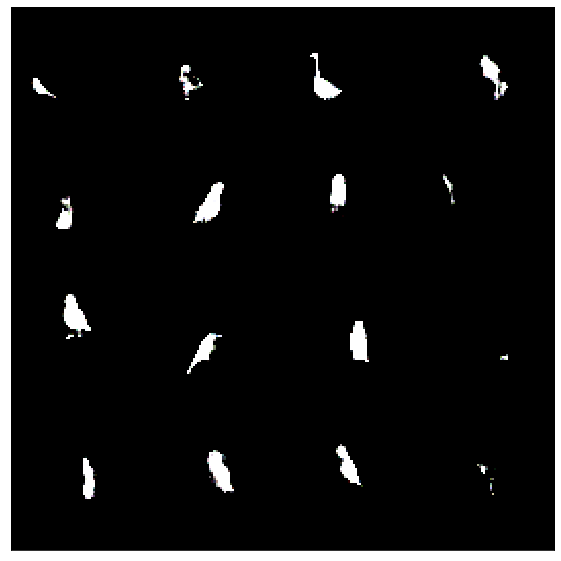

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


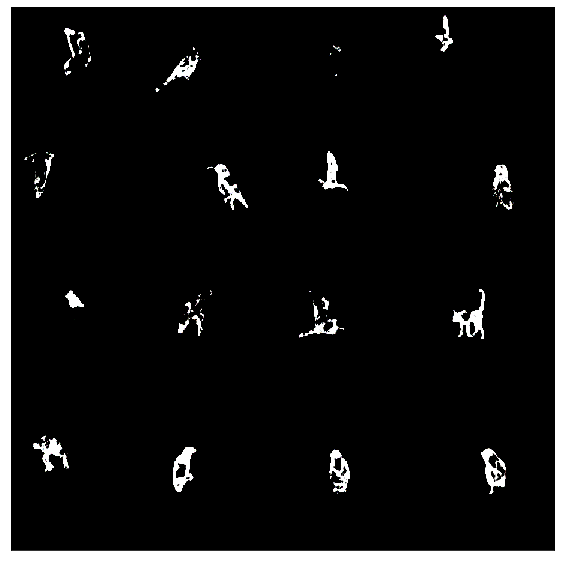

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 8


  0%|                                                                             | 4/17500 [00:22<77:12:20, 15.89s/it]

Train Epoch: 8 [0/280000 (0%)]	Loss: 0.042419
IOU : 0.0577239990234375


  0%|▏                                                                              | 52/17500 [00:27<33:39,  8.64it/s]

Train Epoch: 8 [200/280000 (0%)]	Loss: 0.026723
IOU : 0.0554656982421875


  1%|▍                                                                             | 104/17500 [00:33<28:06, 10.31it/s]

Train Epoch: 8 [400/280000 (1%)]	Loss: 0.025430
IOU : 0.0486297607421875


  1%|▋                                                                             | 152/17500 [00:39<29:45,  9.71it/s]

Train Epoch: 8 [600/280000 (1%)]	Loss: 0.023787
IOU : 0.047119140625


  1%|▉                                                                             | 204/17500 [00:45<29:12,  9.87it/s]

Train Epoch: 8 [800/280000 (1%)]	Loss: 0.027856
IOU : 0.0511322021484375


  1%|█                                                                           | 251/17500 [00:52<1:17:58,  3.69it/s]

Train Epoch: 8 [1000/280000 (1%)]	Loss: 0.030748
IOU : 0.052001953125


  2%|█▎                                                                          | 301/17500 [01:03<1:18:40,  3.64it/s]

Train Epoch: 8 [1200/280000 (2%)]	Loss: 0.026423
IOU : 0.0559234619140625


  2%|█▌                                                                            | 351/17500 [01:10<34:39,  8.25it/s]

Train Epoch: 8 [1400/280000 (2%)]	Loss: 0.031749
IOU : 0.05511474609375


  2%|█▊                                                                            | 400/17500 [01:16<36:17,  7.85it/s]

Train Epoch: 8 [1600/280000 (2%)]	Loss: 0.029185
IOU : 0.0527496337890625


  3%|█▉                                                                          | 451/17500 [01:25<1:18:00,  3.64it/s]

Train Epoch: 8 [1800/280000 (3%)]	Loss: 0.030144
IOU : 0.054656982421875


  3%|██▏                                                                         | 501/17500 [01:37<1:17:03,  3.68it/s]

Train Epoch: 8 [2000/280000 (3%)]	Loss: 0.032570
IOU : 0.054290771484375


  3%|██▍                                                                           | 551/17500 [01:44<41:41,  6.78it/s]

Train Epoch: 8 [2200/280000 (3%)]	Loss: 0.040657
IOU : 0.0536956787109375


  3%|██▋                                                                           | 601/17500 [01:50<41:43,  6.75it/s]

Train Epoch: 8 [2400/280000 (3%)]	Loss: 0.025684
IOU : 0.0543060302734375


  4%|██▉                                                                           | 651/17500 [01:57<41:26,  6.77it/s]

Train Epoch: 8 [2600/280000 (4%)]	Loss: 0.040704
IOU : 0.0556182861328125


  4%|███▏                                                                          | 702/17500 [02:03<34:45,  8.05it/s]

Train Epoch: 8 [2800/280000 (4%)]	Loss: 0.024453
IOU : 0.0464630126953125


  4%|███▎                                                                        | 751/17500 [02:10<1:16:31,  3.65it/s]

Train Epoch: 8 [3000/280000 (4%)]	Loss: 0.026337
IOU : 0.05145263671875


  5%|███▍                                                                        | 801/17500 [02:22<1:16:04,  3.66it/s]

Train Epoch: 8 [3200/280000 (5%)]	Loss: 0.025657
IOU : 0.050811767578125


  5%|███▊                                                                          | 851/17500 [02:30<22:13, 12.48it/s]

Train Epoch: 8 [3400/280000 (5%)]	Loss: 0.025265
IOU : 0.0472564697265625


  5%|████                                                                          | 902/17500 [02:36<33:28,  8.26it/s]

Train Epoch: 8 [3600/280000 (5%)]	Loss: 0.024163
IOU : 0.053009033203125


  5%|████▏                                                                       | 951/17500 [02:43<1:14:07,  3.72it/s]

Train Epoch: 8 [3800/280000 (5%)]	Loss: 0.027625
IOU : 0.0482025146484375


  6%|████▎                                                                      | 1002/17500 [02:55<1:01:06,  4.50it/s]

Train Epoch: 8 [4000/280000 (6%)]	Loss: 0.033467
IOU : 0.0487213134765625


  6%|████▌                                                                        | 1051/17500 [03:06<50:59,  5.38it/s]

Train Epoch: 8 [4200/280000 (6%)]	Loss: 0.035603
IOU : 0.057037353515625


  6%|████▊                                                                        | 1101/17500 [03:12<40:25,  6.76it/s]

Train Epoch: 8 [4400/280000 (6%)]	Loss: 0.032587
IOU : 0.0596466064453125


  7%|█████                                                                        | 1151/17500 [03:18<33:14,  8.20it/s]

Train Epoch: 8 [4600/280000 (7%)]	Loss: 0.024929
IOU : 0.055755615234375


  7%|█████▎                                                                       | 1202/17500 [03:23<36:08,  7.51it/s]

Train Epoch: 8 [4800/280000 (7%)]	Loss: 0.054284
IOU : 0.0606231689453125


  7%|█████▎                                                                     | 1251/17500 [03:35<1:14:04,  3.66it/s]

Train Epoch: 8 [5000/280000 (7%)]	Loss: 0.029223
IOU : 0.050384521484375


  7%|█████▌                                                                     | 1301/17500 [03:46<1:13:16,  3.68it/s]

Train Epoch: 8 [5200/280000 (7%)]	Loss: 0.025201
IOU : 0.0497894287109375


  8%|█████▉                                                                       | 1351/17500 [03:54<39:34,  6.80it/s]

Train Epoch: 8 [5400/280000 (8%)]	Loss: 0.030154
IOU : 0.0564117431640625


  8%|██████▏                                                                      | 1401/17500 [04:00<39:15,  6.83it/s]

Train Epoch: 8 [5600/280000 (8%)]	Loss: 0.024588
IOU : 0.0469818115234375


  8%|██████▍                                                                      | 1453/17500 [04:07<29:29,  9.07it/s]

Train Epoch: 8 [5800/280000 (8%)]	Loss: 0.031768
IOU : 0.051666259765625


  9%|██████▌                                                                      | 1502/17500 [04:12<33:21,  7.99it/s]

Train Epoch: 8 [6000/280000 (9%)]	Loss: 0.028336
IOU : 0.0487518310546875


  9%|██████▋                                                                    | 1551/17500 [04:22<1:12:42,  3.66it/s]

Train Epoch: 8 [6200/280000 (9%)]	Loss: 0.039147
IOU : 0.058929443359375


  9%|██████▊                                                                    | 1601/17500 [04:33<1:12:32,  3.65it/s]

Train Epoch: 8 [6400/280000 (9%)]	Loss: 0.027601
IOU : 0.0430450439453125


  9%|███████                                                                    | 1651/17500 [04:45<1:12:44,  3.63it/s]

Train Epoch: 8 [6600/280000 (9%)]	Loss: 0.029410
IOU : 0.044769287109375


 10%|███████▍                                                                     | 1701/17500 [04:51<28:05,  9.38it/s]

Train Epoch: 8 [6800/280000 (10%)]	Loss: 0.027568
IOU : 0.060821533203125


 10%|███████▋                                                                     | 1753/17500 [04:58<31:07,  8.43it/s]

Train Epoch: 8 [7000/280000 (10%)]	Loss: 0.029603
IOU : 0.0562286376953125


 10%|███████▉                                                                     | 1802/17500 [05:03<32:13,  8.12it/s]

Train Epoch: 8 [7200/280000 (10%)]	Loss: 0.040009
IOU : 0.0607452392578125


 11%|███████▉                                                                   | 1851/17500 [05:15<1:11:32,  3.65it/s]

Train Epoch: 8 [7400/280000 (11%)]	Loss: 0.027566
IOU : 0.0514373779296875


 11%|████████▏                                                                  | 1901/17500 [05:26<1:11:24,  3.64it/s]

Train Epoch: 8 [7600/280000 (11%)]	Loss: 0.040793
IOU : 0.05029296875


 11%|████████▌                                                                    | 1952/17500 [05:33<29:27,  8.80it/s]

Train Epoch: 8 [7800/280000 (11%)]	Loss: 0.026655
IOU : 0.0557098388671875


 11%|████████▊                                                                    | 2002/17500 [05:39<32:28,  7.95it/s]

Train Epoch: 8 [8000/280000 (11%)]	Loss: 0.020296
IOU : 0.049896240234375


 12%|█████████                                                                    | 2053/17500 [05:45<28:22,  9.07it/s]

Train Epoch: 8 [8200/280000 (12%)]	Loss: 0.028939
IOU : 0.0529632568359375


 12%|█████████                                                                  | 2101/17500 [05:56<1:10:45,  3.63it/s]

Train Epoch: 8 [8400/280000 (12%)]	Loss: 0.025275
IOU : 0.06329345703125


 12%|█████████▏                                                                 | 2151/17500 [06:08<1:10:04,  3.65it/s]

Train Epoch: 8 [8600/280000 (12%)]	Loss: 0.026072
IOU : 0.0382080078125


 13%|█████████▋                                                                   | 2201/17500 [06:17<25:39,  9.94it/s]

Train Epoch: 8 [8800/280000 (13%)]	Loss: 0.042098
IOU : 0.0636444091796875


 13%|█████████▉                                                                   | 2251/17500 [06:23<31:57,  7.95it/s]

Train Epoch: 8 [9000/280000 (13%)]	Loss: 0.031807
IOU : 0.05010986328125


 13%|█████████▊                                                                 | 2301/17500 [06:30<1:09:06,  3.67it/s]

Train Epoch: 8 [9200/280000 (13%)]	Loss: 0.030966
IOU : 0.057342529296875


 13%|██████████                                                                 | 2351/17500 [06:42<1:09:01,  3.66it/s]

Train Epoch: 8 [9400/280000 (13%)]	Loss: 0.028322
IOU : 0.054229736328125


 14%|██████████▎                                                                | 2401/17500 [06:53<1:08:39,  3.66it/s]

Train Epoch: 8 [9600/280000 (14%)]	Loss: 0.029530
IOU : 0.058319091796875


 14%|██████████▊                                                                  | 2452/17500 [07:00<30:32,  8.21it/s]

Train Epoch: 8 [9800/280000 (14%)]	Loss: 0.032676
IOU : 0.0548095703125


 14%|███████████                                                                  | 2500/17500 [07:05<29:14,  8.55it/s]

Train Epoch: 8 [10000/280000 (14%)]	Loss: 0.037630
IOU : 0.052825927734375


 15%|██████████▉                                                                | 2551/17500 [07:15<1:08:32,  3.63it/s]

Train Epoch: 8 [10200/280000 (15%)]	Loss: 0.029792
IOU : 0.0507354736328125


 15%|███████████▏                                                               | 2601/17500 [07:26<1:09:04,  3.60it/s]

Train Epoch: 8 [10400/280000 (15%)]	Loss: 0.024483
IOU : 0.0574951171875


 15%|███████████▋                                                                 | 2652/17500 [07:34<27:36,  8.96it/s]

Train Epoch: 8 [10600/280000 (15%)]	Loss: 0.024808
IOU : 0.056732177734375


 15%|███████████▉                                                                 | 2703/17500 [07:40<26:26,  9.32it/s]

Train Epoch: 8 [10800/280000 (15%)]	Loss: 0.033549
IOU : 0.0647125244140625


 16%|████████████                                                                 | 2752/17500 [07:49<54:41,  4.49it/s]

Train Epoch: 8 [11000/280000 (16%)]	Loss: 0.027548
IOU : 0.0493011474609375


 16%|████████████                                                               | 2801/17500 [08:01<1:07:00,  3.66it/s]

Train Epoch: 8 [11200/280000 (16%)]	Loss: 0.029508
IOU : 0.051300048828125


 16%|████████████▌                                                                | 2851/17500 [08:12<46:26,  5.26it/s]

Train Epoch: 8 [11400/280000 (16%)]	Loss: 0.023720
IOU : 0.043731689453125


 17%|████████████▊                                                                | 2901/17500 [08:18<35:52,  6.78it/s]

Train Epoch: 8 [11600/280000 (17%)]	Loss: 0.027641
IOU : 0.0499725341796875


 17%|████████████▉                                                                | 2951/17500 [08:25<35:39,  6.80it/s]

Train Epoch: 8 [11800/280000 (17%)]	Loss: 0.025357
IOU : 0.0512847900390625


 17%|█████████████▏                                                               | 3002/17500 [08:30<28:32,  8.47it/s]

Train Epoch: 8 [12000/280000 (17%)]	Loss: 0.031032
IOU : 0.0475616455078125


 17%|█████████████▍                                                               | 3052/17500 [08:37<28:11,  8.54it/s]

Train Epoch: 8 [12200/280000 (17%)]	Loss: 0.029990
IOU : 0.04656982421875


 18%|█████████████▎                                                             | 3101/17500 [08:46<1:06:07,  3.63it/s]

Train Epoch: 8 [12400/280000 (18%)]	Loss: 0.035529
IOU : 0.0552215576171875


 18%|█████████████▌                                                             | 3151/17500 [08:58<1:05:21,  3.66it/s]

Train Epoch: 8 [12600/280000 (18%)]	Loss: 0.044135
IOU : 0.0631103515625


 18%|██████████████                                                               | 3201/17500 [09:09<38:47,  6.14it/s]

Train Epoch: 8 [12800/280000 (18%)]	Loss: 0.026580
IOU : 0.053558349609375


 19%|██████████████▎                                                              | 3251/17500 [09:15<33:42,  7.05it/s]

Train Epoch: 8 [13000/280000 (19%)]	Loss: 0.037964
IOU : 0.052642822265625


 19%|██████████████▌                                                              | 3302/17500 [09:21<29:27,  8.03it/s]

Train Epoch: 8 [13200/280000 (19%)]	Loss: 0.032783
IOU : 0.05328369140625


 19%|██████████████▋                                                              | 3352/17500 [09:28<42:38,  5.53it/s]

Train Epoch: 8 [13400/280000 (19%)]	Loss: 0.037782
IOU : 0.06298828125


 19%|██████████████▌                                                            | 3401/17500 [09:39<1:05:16,  3.60it/s]

Train Epoch: 8 [13600/280000 (19%)]	Loss: 0.033709
IOU : 0.0463104248046875


 20%|██████████████▊                                                            | 3451/17500 [09:52<1:10:28,  3.32it/s]

Train Epoch: 8 [13800/280000 (20%)]	Loss: 0.029485
IOU : 0.05584716796875


 20%|███████████████▍                                                             | 3501/17500 [10:03<41:14,  5.66it/s]

Train Epoch: 8 [14000/280000 (20%)]	Loss: 0.034396
IOU : 0.058380126953125


 20%|███████████████▋                                                             | 3552/17500 [10:09<27:07,  8.57it/s]

Train Epoch: 8 [14200/280000 (20%)]	Loss: 0.028156
IOU : 0.0535888671875


 21%|███████████████▊                                                             | 3602/17500 [10:16<31:15,  7.41it/s]

Train Epoch: 8 [14400/280000 (21%)]	Loss: 0.030081
IOU : 0.058837890625


 21%|███████████████▋                                                           | 3651/17500 [10:25<1:02:52,  3.67it/s]

Train Epoch: 8 [14600/280000 (21%)]	Loss: 0.023965
IOU : 0.05322265625


 21%|███████████████▊                                                           | 3702/17500 [10:37<1:00:36,  3.79it/s]

Train Epoch: 8 [14800/280000 (21%)]	Loss: 0.025184
IOU : 0.0558929443359375


 21%|████████████████▌                                                            | 3753/17500 [10:49<31:38,  7.24it/s]

Train Epoch: 8 [15000/280000 (21%)]	Loss: 0.038876
IOU : 0.05706787109375


 22%|████████████████▋                                                            | 3802/17500 [10:55<24:50,  9.19it/s]

Train Epoch: 8 [15200/280000 (22%)]	Loss: 0.028282
IOU : 0.0542755126953125


 22%|████████████████▉                                                            | 3850/17500 [11:01<26:43,  8.51it/s]

Train Epoch: 8 [15400/280000 (22%)]	Loss: 0.023336
IOU : 0.0488739013671875


 22%|████████████████▋                                                          | 3901/17500 [11:12<1:01:07,  3.71it/s]

Train Epoch: 8 [15600/280000 (22%)]	Loss: 0.030573
IOU : 0.052703857421875


 23%|████████████████▉                                                          | 3951/17500 [11:24<1:01:13,  3.69it/s]

Train Epoch: 8 [15800/280000 (23%)]	Loss: 0.026696
IOU : 0.054840087890625


 23%|█████████████████▌                                                           | 4001/17500 [11:33<33:37,  6.69it/s]

Train Epoch: 8 [16000/280000 (23%)]	Loss: 0.031042
IOU : 0.05010986328125


 23%|█████████████████▊                                                           | 4051/17500 [11:39<32:53,  6.81it/s]

Train Epoch: 8 [16200/280000 (23%)]	Loss: 0.029739
IOU : 0.0544891357421875


 23%|██████████████████                                                           | 4101/17500 [11:46<34:09,  6.54it/s]

Train Epoch: 8 [16400/280000 (23%)]	Loss: 0.027992
IOU : 0.0513763427734375


 24%|██████████████████▎                                                          | 4151/17500 [11:53<37:36,  5.92it/s]

Train Epoch: 8 [16600/280000 (24%)]	Loss: 0.025883
IOU : 0.0546112060546875


 24%|██████████████████▍                                                          | 4201/17500 [11:59<32:22,  6.84it/s]

Train Epoch: 8 [16800/280000 (24%)]	Loss: 0.030101
IOU : 0.05328369140625


 24%|██████████████████▋                                                          | 4251/17500 [12:05<33:40,  6.56it/s]

Train Epoch: 8 [17000/280000 (24%)]	Loss: 0.025411
IOU : 0.0525054931640625


 25%|██████████████████▉                                                          | 4301/17500 [12:12<32:30,  6.77it/s]

Train Epoch: 8 [17200/280000 (25%)]	Loss: 0.028367
IOU : 0.0530853271484375


 25%|███████████████████▏                                                         | 4351/17500 [12:18<32:24,  6.76it/s]

Train Epoch: 8 [17400/280000 (25%)]	Loss: 0.034819
IOU : 0.049896240234375


 25%|███████████████████▎                                                         | 4401/17500 [12:25<31:56,  6.83it/s]

Train Epoch: 8 [17600/280000 (25%)]	Loss: 0.036128
IOU : 0.0586700439453125


 25%|███████████████████▌                                                         | 4451/17500 [12:31<31:59,  6.80it/s]

Train Epoch: 8 [17800/280000 (25%)]	Loss: 0.034747
IOU : 0.056060791015625


 26%|███████████████████▊                                                         | 4501/17500 [12:40<58:25,  3.71it/s]

Train Epoch: 8 [18000/280000 (26%)]	Loss: 0.022227
IOU : 0.0466156005859375


 26%|████████████████████                                                         | 4551/17500 [12:52<58:15,  3.70it/s]

Train Epoch: 8 [18200/280000 (26%)]	Loss: 0.034708
IOU : 0.059539794921875


 26%|████████████████████▏                                                        | 4601/17500 [13:03<57:50,  3.72it/s]

Train Epoch: 8 [18400/280000 (26%)]	Loss: 0.029669
IOU : 0.0466461181640625


 27%|████████████████████▍                                                        | 4651/17500 [13:14<39:33,  5.41it/s]

Train Epoch: 8 [18600/280000 (27%)]	Loss: 0.025503
IOU : 0.05401611328125


 27%|████████████████████▋                                                        | 4702/17500 [13:20<17:51, 11.95it/s]

Train Epoch: 8 [18800/280000 (27%)]	Loss: 0.037324
IOU : 0.062042236328125


 27%|████████████████████▉                                                        | 4753/17500 [13:26<25:13,  8.42it/s]

Train Epoch: 8 [19000/280000 (27%)]	Loss: 0.032207
IOU : 0.0469818115234375


 27%|█████████████████████                                                        | 4800/17500 [13:32<25:01,  8.46it/s]

Train Epoch: 8 [19200/280000 (27%)]	Loss: 0.033652
IOU : 0.0559844970703125


 28%|█████████████████████▎                                                       | 4851/17500 [13:43<56:54,  3.70it/s]

Train Epoch: 8 [19400/280000 (28%)]	Loss: 0.029284
IOU : 0.0564727783203125


 28%|█████████████████████▌                                                       | 4901/17500 [13:54<56:36,  3.71it/s]

Train Epoch: 8 [19600/280000 (28%)]	Loss: 0.027213
IOU : 0.052276611328125


 28%|█████████████████████▊                                                       | 4951/17500 [14:05<56:12,  3.72it/s]

Train Epoch: 8 [19800/280000 (28%)]	Loss: 0.026976
IOU : 0.04425048828125


 29%|██████████████████████                                                       | 5002/17500 [14:13<23:40,  8.80it/s]

Train Epoch: 8 [20000/280000 (29%)]	Loss: 0.027284
IOU : 0.0528106689453125


 29%|██████████████████████▏                                                      | 5052/17500 [14:19<25:30,  8.13it/s]

Train Epoch: 8 [20200/280000 (29%)]	Loss: 0.031177
IOU : 0.0531158447265625


 29%|██████████████████████▍                                                      | 5101/17500 [14:29<55:31,  3.72it/s]

Train Epoch: 8 [20400/280000 (29%)]	Loss: 0.029026
IOU : 0.054229736328125


 29%|██████████████████████▋                                                      | 5151/17500 [14:40<55:12,  3.73it/s]

Train Epoch: 8 [20600/280000 (29%)]	Loss: 0.026178
IOU : 0.0527801513671875


 30%|██████████████████████▉                                                      | 5201/17500 [14:51<31:53,  6.43it/s]

Train Epoch: 8 [20800/280000 (30%)]	Loss: 0.035472
IOU : 0.0562744140625


 30%|███████████████████████                                                      | 5251/17500 [14:57<30:11,  6.76it/s]

Train Epoch: 8 [21000/280000 (30%)]	Loss: 0.042330
IOU : 0.0516357421875


 30%|███████████████████████▎                                                     | 5301/17500 [15:03<30:10,  6.74it/s]

Train Epoch: 8 [21200/280000 (30%)]	Loss: 0.033189
IOU : 0.0592193603515625


 31%|███████████████████████▌                                                     | 5351/17500 [15:10<30:48,  6.57it/s]

Train Epoch: 8 [21400/280000 (31%)]	Loss: 0.027690
IOU : 0.0557861328125


 31%|███████████████████████▊                                                     | 5401/17500 [15:16<49:43,  4.06it/s]

Train Epoch: 8 [21600/280000 (31%)]	Loss: 0.031046
IOU : 0.0548248291015625


 31%|███████████████████████▉                                                     | 5451/17500 [15:27<54:01,  3.72it/s]

Train Epoch: 8 [21800/280000 (31%)]	Loss: 0.030466
IOU : 0.0538330078125


 31%|████████████████████████▏                                                    | 5501/17500 [15:39<53:49,  3.72it/s]

Train Epoch: 8 [22000/280000 (31%)]	Loss: 0.022770
IOU : 0.043731689453125


 32%|████████████████████████▍                                                    | 5552/17500 [15:46<23:13,  8.57it/s]

Train Epoch: 8 [22200/280000 (32%)]	Loss: 0.027495
IOU : 0.050323486328125


 32%|████████████████████████▋                                                    | 5600/17500 [15:51<20:52,  9.50it/s]

Train Epoch: 8 [22400/280000 (32%)]	Loss: 0.026035
IOU : 0.0545654296875


 32%|████████████████████████▊                                                    | 5651/17500 [16:00<53:13,  3.71it/s]

Train Epoch: 8 [22600/280000 (32%)]	Loss: 0.026678
IOU : 0.0494232177734375


 33%|█████████████████████████                                                    | 5701/17500 [16:12<52:50,  3.72it/s]

Train Epoch: 8 [22800/280000 (33%)]	Loss: 0.033752
IOU : 0.04522705078125


 33%|█████████████████████████▎                                                   | 5751/17500 [16:21<28:37,  6.84it/s]

Train Epoch: 8 [23000/280000 (33%)]	Loss: 0.033200
IOU : 0.0546875


 33%|█████████████████████████▌                                                   | 5801/17500 [16:27<28:50,  6.76it/s]

Train Epoch: 8 [23200/280000 (33%)]	Loss: 0.033617
IOU : 0.0444183349609375


 33%|█████████████████████████▋                                                   | 5851/17500 [16:33<28:14,  6.87it/s]

Train Epoch: 8 [23400/280000 (33%)]	Loss: 0.024505
IOU : 0.0540618896484375


 34%|█████████████████████████▉                                                   | 5901/17500 [16:40<28:32,  6.77it/s]

Train Epoch: 8 [23600/280000 (34%)]	Loss: 0.035975
IOU : 0.053680419921875


 34%|██████████████████████████▏                                                  | 5951/17500 [16:46<28:15,  6.81it/s]

Train Epoch: 8 [23800/280000 (34%)]	Loss: 0.026470
IOU : 0.05712890625


 34%|██████████████████████████▍                                                  | 6001/17500 [16:52<28:10,  6.80it/s]

Train Epoch: 8 [24000/280000 (34%)]	Loss: 0.034575
IOU : 0.05657958984375


 35%|██████████████████████████▌                                                  | 6051/17500 [16:59<28:25,  6.71it/s]

Train Epoch: 8 [24200/280000 (35%)]	Loss: 0.033115
IOU : 0.0492095947265625


 35%|██████████████████████████▊                                                  | 6101/17500 [17:06<45:08,  4.21it/s]

Train Epoch: 8 [24400/280000 (35%)]	Loss: 0.032802
IOU : 0.0562896728515625


 35%|███████████████████████████                                                  | 6151/17500 [17:17<51:07,  3.70it/s]

Train Epoch: 8 [24600/280000 (35%)]	Loss: 0.024659
IOU : 0.0477447509765625


 35%|███████████████████████████▎                                                 | 6201/17500 [17:28<50:44,  3.71it/s]

Train Epoch: 8 [24800/280000 (35%)]	Loss: 0.028815
IOU : 0.0469970703125


 36%|███████████████████████████▌                                                 | 6251/17500 [17:38<28:15,  6.63it/s]

Train Epoch: 8 [25000/280000 (36%)]	Loss: 0.038604
IOU : 0.05120849609375


 36%|███████████████████████████▋                                                 | 6303/17500 [17:45<24:27,  7.63it/s]

Train Epoch: 8 [25200/280000 (36%)]	Loss: 0.038788
IOU : 0.0540313720703125


 36%|███████████████████████████▉                                                 | 6351/17500 [17:50<23:43,  7.83it/s]

Train Epoch: 8 [25400/280000 (36%)]	Loss: 0.027780
IOU : 0.05364990234375


 37%|████████████████████████████▏                                                | 6402/17500 [17:56<23:27,  7.88it/s]

Train Epoch: 8 [25600/280000 (37%)]	Loss: 0.039633
IOU : 0.0603790283203125


 37%|████████████████████████████▍                                                | 6451/17500 [18:07<49:31,  3.72it/s]

Train Epoch: 8 [25800/280000 (37%)]	Loss: 0.034661
IOU : 0.055694580078125


 37%|████████████████████████████▌                                                | 6501/17500 [18:18<49:27,  3.71it/s]

Train Epoch: 8 [26000/280000 (37%)]	Loss: 0.024554
IOU : 0.0513153076171875


 37%|████████████████████████████▊                                                | 6551/17500 [18:29<30:09,  6.05it/s]

Train Epoch: 8 [26200/280000 (37%)]	Loss: 0.027540
IOU : 0.055023193359375


 38%|█████████████████████████████                                                | 6601/17500 [18:35<23:28,  7.74it/s]

Train Epoch: 8 [26400/280000 (38%)]	Loss: 0.026325
IOU : 0.0541229248046875


 38%|█████████████████████████████▎                                               | 6653/17500 [18:41<22:55,  7.88it/s]

Train Epoch: 8 [26600/280000 (38%)]	Loss: 0.035261
IOU : 0.057403564453125


 38%|█████████████████████████████▍                                               | 6701/17500 [18:48<48:41,  3.70it/s]

Train Epoch: 8 [26800/280000 (38%)]	Loss: 0.026568
IOU : 0.0518341064453125


 39%|█████████████████████████████▋                                               | 6751/17500 [18:59<48:23,  3.70it/s]

Train Epoch: 8 [27000/280000 (39%)]	Loss: 0.033988
IOU : 0.054290771484375


 39%|█████████████████████████████▉                                               | 6803/17500 [19:10<17:38, 10.11it/s]

Train Epoch: 8 [27200/280000 (39%)]	Loss: 0.032244
IOU : 0.046295166015625


 39%|██████████████████████████████▏                                              | 6851/17500 [19:15<22:55,  7.74it/s]

Train Epoch: 8 [27400/280000 (39%)]	Loss: 0.033734
IOU : 0.0628814697265625


 39%|██████████████████████████████▎                                              | 6903/17500 [19:21<22:11,  7.96it/s]

Train Epoch: 8 [27600/280000 (39%)]	Loss: 0.025422
IOU : 0.0524139404296875


 40%|██████████████████████████████▌                                              | 6951/17500 [19:31<47:21,  3.71it/s]

Train Epoch: 8 [27800/280000 (40%)]	Loss: 0.025279
IOU : 0.051971435546875


 40%|██████████████████████████████▊                                              | 7001/17500 [19:42<46:56,  3.73it/s]

Train Epoch: 8 [28000/280000 (40%)]	Loss: 0.025223
IOU : 0.0525665283203125


 40%|███████████████████████████████                                              | 7051/17500 [19:54<46:57,  3.71it/s]

Train Epoch: 8 [28200/280000 (40%)]	Loss: 0.032795
IOU : 0.0650482177734375


 41%|███████████████████████████████▏                                             | 7101/17500 [20:01<25:12,  6.88it/s]

Train Epoch: 8 [28400/280000 (41%)]	Loss: 0.032511
IOU : 0.050872802734375


 41%|███████████████████████████████▍                                             | 7151/17500 [20:07<25:22,  6.80it/s]

Train Epoch: 8 [28600/280000 (41%)]	Loss: 0.031184
IOU : 0.0571136474609375


 41%|███████████████████████████████▋                                             | 7202/17500 [20:14<26:33,  6.46it/s]

Train Epoch: 8 [28800/280000 (41%)]	Loss: 0.023537
IOU : 0.047271728515625


 41%|███████████████████████████████▉                                             | 7251/17500 [20:23<46:05,  3.71it/s]

Train Epoch: 8 [29000/280000 (41%)]	Loss: 0.027142
IOU : 0.0469207763671875


 42%|████████████████████████████████                                             | 7301/17500 [20:35<45:34,  3.73it/s]

Train Epoch: 8 [29200/280000 (42%)]	Loss: 0.027277
IOU : 0.050933837890625


 42%|████████████████████████████████▎                                            | 7351/17500 [20:45<25:24,  6.66it/s]

Train Epoch: 8 [29400/280000 (42%)]	Loss: 0.041492
IOU : 0.0558624267578125


 42%|████████████████████████████████▌                                            | 7403/17500 [20:52<16:48, 10.01it/s]

Train Epoch: 8 [29600/280000 (42%)]	Loss: 0.032175
IOU : 0.052703857421875


 43%|████████████████████████████████▊                                            | 7450/17500 [20:57<19:02,  8.80it/s]

Train Epoch: 8 [29800/280000 (43%)]	Loss: 0.028692
IOU : 0.0500030517578125


 43%|█████████████████████████████████                                            | 7501/17500 [21:07<44:42,  3.73it/s]

Train Epoch: 8 [30000/280000 (43%)]	Loss: 0.029430
IOU : 0.0465240478515625


 43%|█████████████████████████████████▏                                           | 7551/17500 [21:18<44:41,  3.71it/s]

Train Epoch: 8 [30200/280000 (43%)]	Loss: 0.025261
IOU : 0.053070068359375


 43%|█████████████████████████████████▍                                           | 7601/17500 [21:27<24:13,  6.81it/s]

Train Epoch: 8 [30400/280000 (43%)]	Loss: 0.039008
IOU : 0.0595855712890625


 44%|█████████████████████████████████▋                                           | 7651/17500 [21:33<24:06,  6.81it/s]

Train Epoch: 8 [30600/280000 (44%)]	Loss: 0.027130
IOU : 0.0482025146484375


 44%|█████████████████████████████████▉                                           | 7701/17500 [21:40<23:52,  6.84it/s]

Train Epoch: 8 [30800/280000 (44%)]	Loss: 0.023408
IOU : 0.0426483154296875


 44%|██████████████████████████████████                                           | 7751/17500 [21:46<24:00,  6.77it/s]

Train Epoch: 8 [31000/280000 (44%)]	Loss: 0.036521
IOU : 0.0494842529296875


 45%|██████████████████████████████████▎                                          | 7802/17500 [21:52<18:06,  8.93it/s]

Train Epoch: 8 [31200/280000 (45%)]	Loss: 0.022363
IOU : 0.043304443359375


 45%|██████████████████████████████████▌                                          | 7851/17500 [22:00<43:17,  3.72it/s]

Train Epoch: 8 [31400/280000 (45%)]	Loss: 0.026446
IOU : 0.0615386962890625


 45%|██████████████████████████████████▊                                          | 7901/17500 [22:11<43:05,  3.71it/s]

Train Epoch: 8 [31600/280000 (45%)]	Loss: 0.024336
IOU : 0.05078125


 45%|██████████████████████████████████▉                                          | 7951/17500 [22:23<42:42,  3.73it/s]

Train Epoch: 8 [31800/280000 (45%)]	Loss: 0.032068
IOU : 0.0529937744140625


 46%|███████████████████████████████████▏                                         | 8001/17500 [22:32<22:52,  6.92it/s]

Train Epoch: 8 [32000/280000 (46%)]	Loss: 0.036847
IOU : 0.0519256591796875


 46%|███████████████████████████████████▍                                         | 8050/17500 [22:38<16:54,  9.31it/s]

Train Epoch: 8 [32200/280000 (46%)]	Loss: 0.028205
IOU : 0.060302734375


 46%|███████████████████████████████████▋                                         | 8102/17500 [22:43<16:16,  9.62it/s]

Train Epoch: 8 [32400/280000 (46%)]	Loss: 0.030297
IOU : 0.055908203125


 47%|███████████████████████████████████▊                                         | 8151/17500 [22:52<41:57,  3.71it/s]

Train Epoch: 8 [32600/280000 (47%)]	Loss: 0.029039
IOU : 0.055419921875


 47%|████████████████████████████████████                                         | 8201/17500 [23:03<42:03,  3.69it/s]

Train Epoch: 8 [32800/280000 (47%)]	Loss: 0.043092
IOU : 0.0561981201171875


 47%|████████████████████████████████████▎                                        | 8251/17500 [23:14<41:29,  3.72it/s]

Train Epoch: 8 [33000/280000 (47%)]	Loss: 0.025670
IOU : 0.0509490966796875


 47%|████████████████████████████████████▌                                        | 8302/17500 [23:22<18:38,  8.22it/s]

Train Epoch: 8 [33200/280000 (47%)]	Loss: 0.023175
IOU : 0.0546722412109375


 48%|████████████████████████████████████▋                                        | 8352/17500 [23:27<19:32,  7.81it/s]

Train Epoch: 8 [33400/280000 (48%)]	Loss: 0.024735
IOU : 0.0507049560546875


 48%|████████████████████████████████████▉                                        | 8401/17500 [23:37<40:50,  3.71it/s]

Train Epoch: 8 [33600/280000 (48%)]	Loss: 0.027848
IOU : 0.059326171875


 48%|█████████████████████████████████████▏                                       | 8451/17500 [23:48<40:32,  3.72it/s]

Train Epoch: 8 [33800/280000 (48%)]	Loss: 0.029589
IOU : 0.057586669921875


 49%|█████████████████████████████████████▍                                       | 8501/17500 [24:00<40:24,  3.71it/s]

Train Epoch: 8 [34000/280000 (49%)]	Loss: 0.030488
IOU : 0.0481414794921875


 49%|█████████████████████████████████████▌                                       | 8551/17500 [24:06<22:32,  6.62it/s]

Train Epoch: 8 [34200/280000 (49%)]	Loss: 0.030620
IOU : 0.0616912841796875


 49%|█████████████████████████████████████▊                                       | 8601/17500 [24:13<20:56,  7.08it/s]

Train Epoch: 8 [34400/280000 (49%)]	Loss: 0.028651
IOU : 0.05426025390625


 49%|██████████████████████████████████████                                       | 8652/17500 [24:22<33:04,  4.46it/s]

Train Epoch: 8 [34600/280000 (49%)]	Loss: 0.027972
IOU : 0.0498046875


 50%|██████████████████████████████████████▎                                      | 8701/17500 [24:33<39:26,  3.72it/s]

Train Epoch: 8 [34800/280000 (50%)]	Loss: 0.049226
IOU : 0.0532684326171875


 50%|██████████████████████████████████████▌                                      | 8751/17500 [24:45<39:29,  3.69it/s]

Train Epoch: 8 [35000/280000 (50%)]	Loss: 0.035117
IOU : 0.0557403564453125


 50%|██████████████████████████████████████▋                                      | 8801/17500 [24:52<21:11,  6.84it/s]

Train Epoch: 8 [35200/280000 (50%)]	Loss: 0.024445
IOU : 0.047393798828125


 51%|██████████████████████████████████████▉                                      | 8851/17500 [24:57<16:09,  8.92it/s]

Train Epoch: 8 [35400/280000 (51%)]	Loss: 0.031461
IOU : 0.05364990234375


 51%|███████████████████████████████████████▏                                     | 8901/17500 [25:05<38:30,  3.72it/s]

Train Epoch: 8 [35600/280000 (51%)]	Loss: 0.035686
IOU : 0.057647705078125


 51%|███████████████████████████████████████▍                                     | 8951/17500 [25:16<38:26,  3.71it/s]

Train Epoch: 8 [35800/280000 (51%)]	Loss: 0.029746
IOU : 0.058685302734375


 51%|███████████████████████████████████████▌                                     | 9001/17500 [25:28<38:09,  3.71it/s]

Train Epoch: 8 [36000/280000 (51%)]	Loss: 0.029268
IOU : 0.0537109375


 52%|███████████████████████████████████████▊                                     | 9051/17500 [25:35<20:43,  6.80it/s]

Train Epoch: 8 [36200/280000 (52%)]	Loss: 0.029456
IOU : 0.05633544921875


 52%|████████████████████████████████████████                                     | 9102/17500 [25:40<16:58,  8.25it/s]

Train Epoch: 8 [36400/280000 (52%)]	Loss: 0.033126
IOU : 0.0548858642578125


 52%|████████████████████████████████████████▎                                    | 9151/17500 [25:47<31:50,  4.37it/s]

Train Epoch: 8 [36600/280000 (52%)]	Loss: 0.029499
IOU : 0.048431396484375


 53%|████████████████████████████████████████▍                                    | 9201/17500 [25:58<37:15,  3.71it/s]

Train Epoch: 8 [36800/280000 (53%)]	Loss: 0.028533
IOU : 0.044464111328125


 53%|████████████████████████████████████████▋                                    | 9251/17500 [26:09<37:12,  3.69it/s]

Train Epoch: 8 [37000/280000 (53%)]	Loss: 0.044461
IOU : 0.063140869140625


 53%|████████████████████████████████████████▉                                    | 9302/17500 [26:16<15:35,  8.76it/s]

Train Epoch: 8 [37200/280000 (53%)]	Loss: 0.033037
IOU : 0.0694122314453125


 53%|█████████████████████████████████████████▏                                   | 9353/17500 [26:21<14:04,  9.64it/s]

Train Epoch: 8 [37400/280000 (53%)]	Loss: 0.025868
IOU : 0.0586395263671875


 54%|█████████████████████████████████████████▎                                   | 9401/17500 [26:31<36:14,  3.72it/s]

Train Epoch: 8 [37600/280000 (54%)]	Loss: 0.033472
IOU : 0.05804443359375


 54%|█████████████████████████████████████████▌                                   | 9451/17500 [26:43<35:58,  3.73it/s]

Train Epoch: 8 [37800/280000 (54%)]	Loss: 0.028464
IOU : 0.0547943115234375


 54%|█████████████████████████████████████████▊                                   | 9501/17500 [26:53<19:58,  6.67it/s]

Train Epoch: 8 [38000/280000 (54%)]	Loss: 0.027928
IOU : 0.05291748046875


 55%|██████████████████████████████████████████                                   | 9551/17500 [27:00<19:18,  6.86it/s]

Train Epoch: 8 [38200/280000 (55%)]	Loss: 0.022452
IOU : 0.0465850830078125


 55%|██████████████████████████████████████████▏                                  | 9601/17500 [27:06<19:10,  6.86it/s]

Train Epoch: 8 [38400/280000 (55%)]	Loss: 0.025555
IOU : 0.046234130859375


 55%|██████████████████████████████████████████▍                                  | 9651/17500 [27:12<19:02,  6.87it/s]

Train Epoch: 8 [38600/280000 (55%)]	Loss: 0.025796
IOU : 0.055084228515625


 55%|██████████████████████████████████████████▋                                  | 9701/17500 [27:19<18:49,  6.90it/s]

Train Epoch: 8 [38800/280000 (55%)]	Loss: 0.029989
IOU : 0.057952880859375


 56%|██████████████████████████████████████████▉                                  | 9751/17500 [27:25<18:59,  6.80it/s]

Train Epoch: 8 [39000/280000 (56%)]	Loss: 0.025277
IOU : 0.0532989501953125


 56%|███████████████████████████████████████████                                  | 9801/17500 [27:31<18:51,  6.80it/s]

Train Epoch: 8 [39200/280000 (56%)]	Loss: 0.035261
IOU : 0.0513458251953125


 56%|███████████████████████████████████████████▎                                 | 9851/17500 [27:38<18:48,  6.78it/s]

Train Epoch: 8 [39400/280000 (56%)]	Loss: 0.032807
IOU : 0.0605010986328125


 57%|███████████████████████████████████████████▌                                 | 9901/17500 [27:44<18:38,  6.79it/s]

Train Epoch: 8 [39600/280000 (57%)]	Loss: 0.028405
IOU : 0.0517425537109375


 57%|███████████████████████████████████████████▊                                 | 9951/17500 [27:54<34:02,  3.70it/s]

Train Epoch: 8 [39800/280000 (57%)]	Loss: 0.033187
IOU : 0.05499267578125


 57%|███████████████████████████████████████████▍                                | 10001/17500 [28:05<33:42,  3.71it/s]

Train Epoch: 8 [40000/280000 (57%)]	Loss: 0.024771
IOU : 0.051513671875


 57%|███████████████████████████████████████████▋                                | 10051/17500 [28:16<33:18,  3.73it/s]

Train Epoch: 8 [40200/280000 (57%)]	Loss: 0.031657
IOU : 0.058868408203125


 58%|███████████████████████████████████████████▊                                | 10101/17500 [28:25<18:04,  6.82it/s]

Train Epoch: 8 [40400/280000 (58%)]	Loss: 0.030164
IOU : 0.046905517578125


 58%|████████████████████████████████████████████                                | 10151/17500 [28:32<17:58,  6.81it/s]

Train Epoch: 8 [40600/280000 (58%)]	Loss: 0.023734
IOU : 0.04803466796875


 58%|████████████████████████████████████████████▎                               | 10201/17500 [28:38<18:00,  6.75it/s]

Train Epoch: 8 [40800/280000 (58%)]	Loss: 0.026483
IOU : 0.0559539794921875


 59%|████████████████████████████████████████████▌                               | 10251/17500 [28:44<17:35,  6.87it/s]

Train Epoch: 8 [41000/280000 (59%)]	Loss: 0.034787
IOU : 0.056915283203125


 59%|████████████████████████████████████████████▋                               | 10301/17500 [28:51<17:27,  6.87it/s]

Train Epoch: 8 [41200/280000 (59%)]	Loss: 0.027808
IOU : 0.0504913330078125


 59%|████████████████████████████████████████████▉                               | 10351/17500 [28:57<17:28,  6.82it/s]

Train Epoch: 8 [41400/280000 (59%)]	Loss: 0.028688
IOU : 0.055755615234375


 59%|█████████████████████████████████████████████▏                              | 10401/17500 [29:03<17:07,  6.91it/s]

Train Epoch: 8 [41600/280000 (59%)]	Loss: 0.027849
IOU : 0.0466156005859375


 60%|█████████████████████████████████████████████▍                              | 10451/17500 [29:10<17:07,  6.86it/s]

Train Epoch: 8 [41800/280000 (60%)]	Loss: 0.031420
IOU : 0.05859375


 60%|█████████████████████████████████████████████▌                              | 10501/17500 [29:19<31:32,  3.70it/s]

Train Epoch: 8 [42000/280000 (60%)]	Loss: 0.026154
IOU : 0.052520751953125


 60%|█████████████████████████████████████████████▊                              | 10551/17500 [29:30<31:15,  3.71it/s]

Train Epoch: 8 [42200/280000 (60%)]	Loss: 0.020867
IOU : 0.0495147705078125


 61%|██████████████████████████████████████████████                              | 10601/17500 [29:42<30:53,  3.72it/s]

Train Epoch: 8 [42400/280000 (61%)]	Loss: 0.025605
IOU : 0.0516815185546875


 61%|██████████████████████████████████████████████▎                             | 10651/17500 [29:52<17:34,  6.49it/s]

Train Epoch: 8 [42600/280000 (61%)]	Loss: 0.040071
IOU : 0.05291748046875


 61%|██████████████████████████████████████████████▍                             | 10701/17500 [29:59<16:26,  6.89it/s]

Train Epoch: 8 [42800/280000 (61%)]	Loss: 0.032042
IOU : 0.0535125732421875


 61%|██████████████████████████████████████████████▋                             | 10751/17500 [30:05<16:31,  6.81it/s]

Train Epoch: 8 [43000/280000 (61%)]	Loss: 0.027724
IOU : 0.0579681396484375


 62%|██████████████████████████████████████████████▉                             | 10801/17500 [30:11<16:19,  6.84it/s]

Train Epoch: 8 [43200/280000 (62%)]	Loss: 0.026432
IOU : 0.0523223876953125


 62%|███████████████████████████████████████████████                             | 10851/17500 [30:18<16:12,  6.84it/s]

Train Epoch: 8 [43400/280000 (62%)]	Loss: 0.032332
IOU : 0.0487823486328125


 62%|███████████████████████████████████████████████▎                            | 10901/17500 [30:24<16:07,  6.82it/s]

Train Epoch: 8 [43600/280000 (62%)]	Loss: 0.023578
IOU : 0.0514068603515625


 63%|███████████████████████████████████████████████▌                            | 10951/17500 [30:30<12:44,  8.57it/s]

Train Epoch: 8 [43800/280000 (63%)]	Loss: 0.024830
IOU : 0.04913330078125


 63%|███████████████████████████████████████████████▊                            | 11001/17500 [30:37<15:51,  6.83it/s]

Train Epoch: 8 [44000/280000 (63%)]	Loss: 0.023213
IOU : 0.049163818359375


 63%|███████████████████████████████████████████████▉                            | 11051/17500 [30:43<15:38,  6.87it/s]

Train Epoch: 8 [44200/280000 (63%)]	Loss: 0.026178
IOU : 0.049468994140625


 63%|████████████████████████████████████████████████▏                           | 11101/17500 [30:52<28:47,  3.70it/s]

Train Epoch: 8 [44400/280000 (63%)]	Loss: 0.023270
IOU : 0.049346923828125


 64%|████████████████████████████████████████████████▍                           | 11151/17500 [31:04<28:32,  3.71it/s]

Train Epoch: 8 [44600/280000 (64%)]	Loss: 0.023689
IOU : 0.0548858642578125


 64%|████████████████████████████████████████████████▋                           | 11201/17500 [31:15<28:06,  3.73it/s]

Train Epoch: 8 [44800/280000 (64%)]	Loss: 0.039639
IOU : 0.0467529296875


 64%|████████████████████████████████████████████████▊                           | 11251/17500 [31:27<28:00,  3.72it/s]

Train Epoch: 8 [45000/280000 (64%)]	Loss: 0.032529
IOU : 0.054473876953125


 65%|█████████████████████████████████████████████████                           | 11303/17500 [31:35<12:50,  8.04it/s]

Train Epoch: 8 [45200/280000 (65%)]	Loss: 0.032379
IOU : 0.058929443359375


 65%|█████████████████████████████████████████████████▎                          | 11351/17500 [31:40<13:28,  7.60it/s]

Train Epoch: 8 [45400/280000 (65%)]	Loss: 0.033167
IOU : 0.052520751953125


 65%|█████████████████████████████████████████████████▌                          | 11401/17500 [31:48<27:10,  3.74it/s]

Train Epoch: 8 [45600/280000 (65%)]	Loss: 0.036796
IOU : 0.0467376708984375


 65%|█████████████████████████████████████████████████▋                          | 11451/17500 [31:59<27:17,  3.69it/s]

Train Epoch: 8 [45800/280000 (65%)]	Loss: 0.039399
IOU : 0.053680419921875


 66%|█████████████████████████████████████████████████▉                          | 11501/17500 [32:09<14:34,  6.86it/s]

Train Epoch: 8 [46000/280000 (66%)]	Loss: 0.027835
IOU : 0.053131103515625


 66%|██████████████████████████████████████████████████▏                         | 11552/17500 [32:14<11:45,  8.43it/s]

Train Epoch: 8 [46200/280000 (66%)]	Loss: 0.030738
IOU : 0.057098388671875


 66%|██████████████████████████████████████████████████▍                         | 11600/17500 [32:20<10:42,  9.18it/s]

Train Epoch: 8 [46400/280000 (66%)]	Loss: 0.027811
IOU : 0.05810546875


 67%|██████████████████████████████████████████████████▌                         | 11651/17500 [32:32<26:10,  3.72it/s]

Train Epoch: 8 [46600/280000 (67%)]	Loss: 0.030464
IOU : 0.05450439453125


 67%|██████████████████████████████████████████████████▊                         | 11701/17500 [32:43<25:57,  3.72it/s]

Train Epoch: 8 [46800/280000 (67%)]	Loss: 0.025176
IOU : 0.0460662841796875


 67%|███████████████████████████████████████████████████                         | 11751/17500 [32:52<13:57,  6.87it/s]

Train Epoch: 8 [47000/280000 (67%)]	Loss: 0.023176
IOU : 0.0415802001953125


 67%|███████████████████████████████████████████████████▎                        | 11801/17500 [32:58<13:44,  6.91it/s]

Train Epoch: 8 [47200/280000 (67%)]	Loss: 0.032269
IOU : 0.049530029296875


 68%|███████████████████████████████████████████████████▍                        | 11851/17500 [33:05<13:44,  6.85it/s]

Train Epoch: 8 [47400/280000 (68%)]	Loss: 0.029877
IOU : 0.0523223876953125


 68%|███████████████████████████████████████████████████▋                        | 11903/17500 [33:11<09:46,  9.55it/s]

Train Epoch: 8 [47600/280000 (68%)]	Loss: 0.023917
IOU : 0.04901123046875


 68%|███████████████████████████████████████████████████▉                        | 11951/17500 [33:17<13:24,  6.90it/s]

Train Epoch: 8 [47800/280000 (68%)]	Loss: 0.032759
IOU : 0.0541839599609375


 69%|████████████████████████████████████████████████████                        | 12001/17500 [33:23<13:25,  6.82it/s]

Train Epoch: 8 [48000/280000 (69%)]	Loss: 0.032759
IOU : 0.056427001953125


 69%|████████████████████████████████████████████████████▎                       | 12051/17500 [33:29<13:16,  6.84it/s]

Train Epoch: 8 [48200/280000 (69%)]	Loss: 0.031192
IOU : 0.056396484375


 69%|████████████████████████████████████████████████████▌                       | 12101/17500 [33:36<13:38,  6.60it/s]

Train Epoch: 8 [48400/280000 (69%)]	Loss: 0.029933
IOU : 0.0605316162109375


 69%|████████████████████████████████████████████████████▊                       | 12151/17500 [33:47<24:06,  3.70it/s]

Train Epoch: 8 [48600/280000 (69%)]	Loss: 0.027809
IOU : 0.0558929443359375


 70%|████████████████████████████████████████████████████▉                       | 12201/17500 [33:58<23:48,  3.71it/s]

Train Epoch: 8 [48800/280000 (70%)]	Loss: 0.028294
IOU : 0.046539306640625


 70%|█████████████████████████████████████████████████████▏                      | 12251/17500 [34:09<13:34,  6.45it/s]

Train Epoch: 8 [49000/280000 (70%)]	Loss: 0.032059
IOU : 0.0531158447265625


 70%|█████████████████████████████████████████████████████▍                      | 12301/17500 [34:15<12:51,  6.74it/s]

Train Epoch: 8 [49200/280000 (70%)]	Loss: 0.023062
IOU : 0.0519561767578125


 71%|█████████████████████████████████████████████████████▋                      | 12351/17500 [34:22<12:39,  6.78it/s]

Train Epoch: 8 [49400/280000 (71%)]	Loss: 0.033486
IOU : 0.054931640625


 71%|█████████████████████████████████████████████████████▊                      | 12401/17500 [34:28<12:21,  6.88it/s]

Train Epoch: 8 [49600/280000 (71%)]	Loss: 0.032613
IOU : 0.05523681640625


 71%|██████████████████████████████████████████████████████                      | 12451/17500 [34:34<12:14,  6.87it/s]

Train Epoch: 8 [49800/280000 (71%)]	Loss: 0.031883
IOU : 0.054718017578125


 71%|██████████████████████████████████████████████████████▎                     | 12501/17500 [34:40<12:21,  6.74it/s]

Train Epoch: 8 [50000/280000 (71%)]	Loss: 0.034090
IOU : 0.060150146484375


 72%|██████████████████████████████████████████████████████▌                     | 12551/17500 [34:50<22:20,  3.69it/s]

Train Epoch: 8 [50200/280000 (72%)]	Loss: 0.028951
IOU : 0.0548095703125


 72%|██████████████████████████████████████████████████████▋                     | 12601/17500 [35:01<21:59,  3.71it/s]

Train Epoch: 8 [50400/280000 (72%)]	Loss: 0.025100
IOU : 0.0449981689453125


 72%|██████████████████████████████████████████████████████▉                     | 12651/17500 [35:12<21:43,  3.72it/s]

Train Epoch: 8 [50600/280000 (72%)]	Loss: 0.035876
IOU : 0.0637969970703125


 73%|███████████████████████████████████████████████████████▏                    | 12701/17500 [35:21<11:40,  6.85it/s]

Train Epoch: 8 [50800/280000 (73%)]	Loss: 0.039007
IOU : 0.049774169921875


 73%|███████████████████████████████████████████████████████▍                    | 12752/17500 [35:27<09:26,  8.38it/s]

Train Epoch: 8 [51000/280000 (73%)]	Loss: 0.023239
IOU : 0.047698974609375


 73%|███████████████████████████████████████████████████████▌                    | 12800/17500 [35:33<08:36,  9.09it/s]

Train Epoch: 8 [51200/280000 (73%)]	Loss: 0.041576
IOU : 0.0604400634765625


 73%|███████████████████████████████████████████████████████▊                    | 12851/17500 [35:42<20:47,  3.73it/s]

Train Epoch: 8 [51400/280000 (73%)]	Loss: 0.030418
IOU : 0.050506591796875


 74%|████████████████████████████████████████████████████████                    | 12901/17500 [35:54<20:48,  3.68it/s]

Train Epoch: 8 [51600/280000 (74%)]	Loss: 0.024051
IOU : 0.0524139404296875


 74%|████████████████████████████████████████████████████████▎                   | 12953/17500 [36:01<07:41,  9.85it/s]

Train Epoch: 8 [51800/280000 (74%)]	Loss: 0.031748
IOU : 0.0493011474609375


 74%|████████████████████████████████████████████████████████▍                   | 13001/17500 [36:07<09:07,  8.22it/s]

Train Epoch: 8 [52000/280000 (74%)]	Loss: 0.024371
IOU : 0.042205810546875


 75%|████████████████████████████████████████████████████████▋                   | 13051/17500 [36:14<19:51,  3.74it/s]

Train Epoch: 8 [52200/280000 (75%)]	Loss: 0.028342
IOU : 0.05084228515625


 75%|████████████████████████████████████████████████████████▉                   | 13101/17500 [36:26<19:44,  3.71it/s]

Train Epoch: 8 [52400/280000 (75%)]	Loss: 0.029814
IOU : 0.0527496337890625


 75%|█████████████████████████████████████████████████████████                   | 13151/17500 [36:37<19:35,  3.70it/s]

Train Epoch: 8 [52600/280000 (75%)]	Loss: 0.025021
IOU : 0.052276611328125


 75%|█████████████████████████████████████████████████████████▎                  | 13203/17500 [36:46<07:02, 10.17it/s]

Train Epoch: 8 [52800/280000 (75%)]	Loss: 0.032395
IOU : 0.055694580078125


 76%|█████████████████████████████████████████████████████████▌                  | 13253/17500 [36:52<07:59,  8.85it/s]

Train Epoch: 8 [53000/280000 (76%)]	Loss: 0.023653
IOU : 0.047882080078125


 76%|█████████████████████████████████████████████████████████▊                  | 13301/17500 [37:00<18:45,  3.73it/s]

Train Epoch: 8 [53200/280000 (76%)]	Loss: 0.037624
IOU : 0.0521697998046875


 76%|█████████████████████████████████████████████████████████▉                  | 13351/17500 [37:11<18:31,  3.73it/s]

Train Epoch: 8 [53400/280000 (76%)]	Loss: 0.033318
IOU : 0.0534820556640625


 77%|██████████████████████████████████████████████████████████▏                 | 13401/17500 [37:23<18:17,  3.73it/s]

Train Epoch: 8 [53600/280000 (77%)]	Loss: 0.024078
IOU : 0.0428314208984375


 77%|██████████████████████████████████████████████████████████▍                 | 13452/17500 [37:29<07:52,  8.57it/s]

Train Epoch: 8 [53800/280000 (77%)]	Loss: 0.021312
IOU : 0.0516357421875


 77%|██████████████████████████████████████████████████████████▋                 | 13501/17500 [37:35<08:24,  7.93it/s]

Train Epoch: 8 [54000/280000 (77%)]	Loss: 0.031475
IOU : 0.051300048828125


 77%|██████████████████████████████████████████████████████████▊                 | 13551/17500 [37:42<13:43,  4.80it/s]

Train Epoch: 8 [54200/280000 (77%)]	Loss: 0.025503
IOU : 0.05548095703125


 78%|███████████████████████████████████████████████████████████                 | 13601/17500 [37:53<17:28,  3.72it/s]

Train Epoch: 8 [54400/280000 (78%)]	Loss: 0.024278
IOU : 0.0613555908203125


 78%|███████████████████████████████████████████████████████████▎                | 13651/17500 [38:04<17:19,  3.70it/s]

Train Epoch: 8 [54600/280000 (78%)]	Loss: 0.024086
IOU : 0.0601959228515625


 78%|███████████████████████████████████████████████████████████▌                | 13701/17500 [38:16<16:59,  3.73it/s]

Train Epoch: 8 [54800/280000 (78%)]	Loss: 0.048772
IOU : 0.0559234619140625


 79%|███████████████████████████████████████████████████████████▋                | 13752/17500 [38:22<07:05,  8.82it/s]

Train Epoch: 8 [55000/280000 (79%)]	Loss: 0.040342
IOU : 0.0582275390625


 79%|███████████████████████████████████████████████████████████▉                | 13802/17500 [38:28<08:04,  7.63it/s]

Train Epoch: 8 [55200/280000 (79%)]	Loss: 0.030198
IOU : 0.04656982421875


 79%|████████████████████████████████████████████████████████████▏               | 13851/17500 [38:35<16:15,  3.74it/s]

Train Epoch: 8 [55400/280000 (79%)]	Loss: 0.037254
IOU : 0.057769775390625


 79%|████████████████████████████████████████████████████████████▎               | 13901/17500 [38:47<16:06,  3.72it/s]

Train Epoch: 8 [55600/280000 (79%)]	Loss: 0.023725
IOU : 0.047393798828125


 80%|████████████████████████████████████████████████████████████▌               | 13951/17500 [38:58<15:54,  3.72it/s]

Train Epoch: 8 [55800/280000 (80%)]	Loss: 0.032821
IOU : 0.0540008544921875


 80%|████████████████████████████████████████████████████████████▊               | 14001/17500 [39:06<06:47,  8.59it/s]

Train Epoch: 8 [56000/280000 (80%)]	Loss: 0.031063
IOU : 0.0450286865234375


 80%|█████████████████████████████████████████████████████████████               | 14052/17500 [39:12<07:02,  8.17it/s]

Train Epoch: 8 [56200/280000 (80%)]	Loss: 0.030781
IOU : 0.0535125732421875


 81%|█████████████████████████████████████████████████████████████▏              | 14101/17500 [39:19<15:03,  3.76it/s]

Train Epoch: 8 [56400/280000 (81%)]	Loss: 0.039232
IOU : 0.0602264404296875


 81%|█████████████████████████████████████████████████████████████▍              | 14151/17500 [39:30<14:58,  3.73it/s]

Train Epoch: 8 [56600/280000 (81%)]	Loss: 0.039039
IOU : 0.0536041259765625


 81%|█████████████████████████████████████████████████████████████▋              | 14201/17500 [39:41<14:54,  3.69it/s]

Train Epoch: 8 [56800/280000 (81%)]	Loss: 0.027119
IOU : 0.0501251220703125


 81%|█████████████████████████████████████████████████████████████▉              | 14252/17500 [39:49<05:50,  9.26it/s]

Train Epoch: 8 [57000/280000 (81%)]	Loss: 0.024861
IOU : 0.050567626953125


 82%|██████████████████████████████████████████████████████████████              | 14302/17500 [39:55<06:36,  8.07it/s]

Train Epoch: 8 [57200/280000 (82%)]	Loss: 0.027164
IOU : 0.0436859130859375


 82%|██████████████████████████████████████████████████████████████▎             | 14351/17500 [40:01<10:19,  5.08it/s]

Train Epoch: 8 [57400/280000 (82%)]	Loss: 0.034465
IOU : 0.049407958984375


 82%|██████████████████████████████████████████████████████████████▌             | 14401/17500 [40:13<13:51,  3.73it/s]

Train Epoch: 8 [57600/280000 (82%)]	Loss: 0.025189
IOU : 0.057098388671875


 83%|██████████████████████████████████████████████████████████████▊             | 14451/17500 [40:24<13:38,  3.72it/s]

Train Epoch: 8 [57800/280000 (83%)]	Loss: 0.023791
IOU : 0.0532989501953125


 83%|██████████████████████████████████████████████████████████████▉             | 14501/17500 [40:32<07:16,  6.86it/s]

Train Epoch: 8 [58000/280000 (83%)]	Loss: 0.027790
IOU : 0.0510406494140625


 83%|███████████████████████████████████████████████████████████████▏            | 14553/17500 [40:39<06:32,  7.51it/s]

Train Epoch: 8 [58200/280000 (83%)]	Loss: 0.025595
IOU : 0.0509185791015625


 83%|███████████████████████████████████████████████████████████████▍            | 14601/17500 [40:45<07:01,  6.88it/s]

Train Epoch: 8 [58400/280000 (83%)]	Loss: 0.028444
IOU : 0.052703857421875


 84%|███████████████████████████████████████████████████████████████▋            | 14651/17500 [40:51<06:50,  6.95it/s]

Train Epoch: 8 [58600/280000 (84%)]	Loss: 0.040466
IOU : 0.06488037109375


 84%|███████████████████████████████████████████████████████████████▊            | 14700/17500 [40:57<05:07,  9.11it/s]

Train Epoch: 8 [58800/280000 (84%)]	Loss: 0.033000
IOU : 0.056915283203125


 84%|████████████████████████████████████████████████████████████████            | 14751/17500 [41:08<12:19,  3.72it/s]

Train Epoch: 8 [59000/280000 (84%)]	Loss: 0.036358
IOU : 0.0533294677734375


 85%|████████████████████████████████████████████████████████████████▎           | 14801/17500 [41:19<12:03,  3.73it/s]

Train Epoch: 8 [59200/280000 (85%)]	Loss: 0.029566
IOU : 0.05804443359375


 85%|████████████████████████████████████████████████████████████████▍           | 14851/17500 [41:31<11:53,  3.71it/s]

Train Epoch: 8 [59400/280000 (85%)]	Loss: 0.021164
IOU : 0.048736572265625


 85%|████████████████████████████████████████████████████████████████▋           | 14901/17500 [41:38<06:15,  6.93it/s]

Train Epoch: 8 [59600/280000 (85%)]	Loss: 0.036022
IOU : 0.0501556396484375


 85%|████████████████████████████████████████████████████████████████▉           | 14951/17500 [41:45<06:07,  6.93it/s]

Train Epoch: 8 [59800/280000 (85%)]	Loss: 0.047497
IOU : 0.06256103515625


 86%|█████████████████████████████████████████████████████████████████▏          | 15003/17500 [41:50<04:18,  9.65it/s]

Train Epoch: 8 [60000/280000 (86%)]	Loss: 0.025799
IOU : 0.0538787841796875


 86%|█████████████████████████████████████████████████████████████████▎          | 15051/17500 [41:57<10:16,  3.97it/s]

Train Epoch: 8 [60200/280000 (86%)]	Loss: 0.029927
IOU : 0.046905517578125


 86%|█████████████████████████████████████████████████████████████████▌          | 15102/17500 [42:08<08:44,  4.57it/s]

Train Epoch: 8 [60400/280000 (86%)]	Loss: 0.028355
IOU : 0.0498809814453125


 87%|█████████████████████████████████████████████████████████████████▊          | 15151/17500 [42:20<10:30,  3.72it/s]

Train Epoch: 8 [60600/280000 (87%)]	Loss: 0.045080
IOU : 0.059783935546875


 87%|██████████████████████████████████████████████████████████████████          | 15201/17500 [42:27<05:33,  6.89it/s]

Train Epoch: 8 [60800/280000 (87%)]	Loss: 0.032367
IOU : 0.056793212890625


 87%|██████████████████████████████████████████████████████████████████▏         | 15251/17500 [42:33<05:28,  6.85it/s]

Train Epoch: 8 [61000/280000 (87%)]	Loss: 0.033525
IOU : 0.056549072265625


 87%|██████████████████████████████████████████████████████████████████▍         | 15301/17500 [42:39<05:18,  6.91it/s]

Train Epoch: 8 [61200/280000 (87%)]	Loss: 0.026855
IOU : 0.0468292236328125


 88%|██████████████████████████████████████████████████████████████████▋         | 15351/17500 [42:45<03:52,  9.25it/s]

Train Epoch: 8 [61400/280000 (88%)]	Loss: 0.036554
IOU : 0.049652099609375


 88%|██████████████████████████████████████████████████████████████████▉         | 15401/17500 [42:51<05:19,  6.57it/s]

Train Epoch: 8 [61600/280000 (88%)]	Loss: 0.032785
IOU : 0.0624847412109375


 88%|███████████████████████████████████████████████████████████████████         | 15451/17500 [43:02<09:12,  3.71it/s]

Train Epoch: 8 [61800/280000 (88%)]	Loss: 0.035809
IOU : 0.0481414794921875


 89%|███████████████████████████████████████████████████████████████████▎        | 15501/17500 [43:14<08:56,  3.72it/s]

Train Epoch: 8 [62000/280000 (89%)]	Loss: 0.030632
IOU : 0.0556488037109375


 89%|███████████████████████████████████████████████████████████████████▌        | 15551/17500 [43:25<08:44,  3.71it/s]

Train Epoch: 8 [62200/280000 (89%)]	Loss: 0.027854
IOU : 0.054962158203125


 89%|███████████████████████████████████████████████████████████████████▊        | 15603/17500 [43:31<03:29,  9.07it/s]

Train Epoch: 8 [62400/280000 (89%)]	Loss: 0.028647
IOU : 0.053924560546875


 89%|███████████████████████████████████████████████████████████████████▉        | 15652/17500 [43:37<03:56,  7.82it/s]

Train Epoch: 8 [62600/280000 (89%)]	Loss: 0.027539
IOU : 0.048797607421875


 90%|████████████████████████████████████████████████████████████████████▏       | 15701/17500 [43:46<08:02,  3.73it/s]

Train Epoch: 8 [62800/280000 (90%)]	Loss: 0.039858
IOU : 0.050628662109375


 90%|████████████████████████████████████████████████████████████████████▍       | 15751/17500 [43:58<07:53,  3.69it/s]

Train Epoch: 8 [63000/280000 (90%)]	Loss: 0.025967
IOU : 0.052154541015625


 90%|████████████████████████████████████████████████████████████████████▌       | 15801/17500 [44:09<07:36,  3.72it/s]

Train Epoch: 8 [63200/280000 (90%)]	Loss: 0.035845
IOU : 0.0567169189453125


 91%|████████████████████████████████████████████████████████████████████▊       | 15852/17500 [44:15<03:25,  8.01it/s]

Train Epoch: 8 [63400/280000 (91%)]	Loss: 0.023140
IOU : 0.044525146484375


 91%|█████████████████████████████████████████████████████████████████████       | 15903/17500 [44:22<02:56,  9.04it/s]

Train Epoch: 8 [63600/280000 (91%)]	Loss: 0.028934
IOU : 0.0484161376953125


 91%|█████████████████████████████████████████████████████████████████████▎      | 15951/17500 [44:32<06:57,  3.71it/s]

Train Epoch: 8 [63800/280000 (91%)]	Loss: 0.033186
IOU : 0.0612945556640625


 91%|█████████████████████████████████████████████████████████████████████▍      | 16001/17500 [44:43<06:41,  3.74it/s]

Train Epoch: 8 [64000/280000 (91%)]	Loss: 0.027186
IOU : 0.0527191162109375


 92%|█████████████████████████████████████████████████████████████████████▋      | 16051/17500 [44:50<03:32,  6.82it/s]

Train Epoch: 8 [64200/280000 (92%)]	Loss: 0.037407
IOU : 0.0618133544921875


 92%|█████████████████████████████████████████████████████████████████████▉      | 16100/17500 [44:56<02:34,  9.09it/s]

Train Epoch: 8 [64400/280000 (92%)]	Loss: 0.029101
IOU : 0.0516815185546875


 92%|██████████████████████████████████████████████████████████████████████▏     | 16152/17500 [45:02<02:27,  9.13it/s]

Train Epoch: 8 [64600/280000 (92%)]	Loss: 0.033222
IOU : 0.061126708984375


 93%|██████████████████████████████████████████████████████████████████████▎     | 16201/17500 [45:13<05:48,  3.73it/s]

Train Epoch: 8 [64800/280000 (93%)]	Loss: 0.037290
IOU : 0.06072998046875


 93%|██████████████████████████████████████████████████████████████████████▌     | 16251/17500 [45:24<05:35,  3.72it/s]

Train Epoch: 8 [65000/280000 (93%)]	Loss: 0.029073
IOU : 0.0576629638671875


 93%|██████████████████████████████████████████████████████████████████████▊     | 16301/17500 [45:35<03:06,  6.45it/s]

Train Epoch: 8 [65200/280000 (93%)]	Loss: 0.024781
IOU : 0.045196533203125


 93%|███████████████████████████████████████████████████████████████████████     | 16353/17500 [45:41<01:46, 10.75it/s]

Train Epoch: 8 [65400/280000 (93%)]	Loss: 0.032250
IOU : 0.0541229248046875


 94%|███████████████████████████████████████████████████████████████████████▏    | 16402/17500 [45:47<02:17,  7.98it/s]

Train Epoch: 8 [65600/280000 (94%)]	Loss: 0.025378
IOU : 0.046356201171875


 94%|███████████████████████████████████████████████████████████████████████▍    | 16451/17500 [45:53<03:47,  4.62it/s]

Train Epoch: 8 [65800/280000 (94%)]	Loss: 0.034093
IOU : 0.0511016845703125


 94%|███████████████████████████████████████████████████████████████████████▋    | 16501/17500 [46:04<04:29,  3.71it/s]

Train Epoch: 8 [66000/280000 (94%)]	Loss: 0.026614
IOU : 0.0462799072265625


 95%|███████████████████████████████████████████████████████████████████████▉    | 16551/17500 [46:16<04:15,  3.71it/s]

Train Epoch: 8 [66200/280000 (95%)]	Loss: 0.021969
IOU : 0.04840087890625


 95%|████████████████████████████████████████████████████████████████████████    | 16603/17500 [46:26<01:25, 10.47it/s]

Train Epoch: 8 [66400/280000 (95%)]	Loss: 0.036214
IOU : 0.053619384765625


 95%|████████████████████████████████████████████████████████████████████████▎   | 16651/17500 [46:31<01:35,  8.94it/s]

Train Epoch: 8 [66600/280000 (95%)]	Loss: 0.031278
IOU : 0.0500335693359375


 95%|████████████████████████████████████████████████████████████████████████▌   | 16701/17500 [46:39<03:36,  3.70it/s]

Train Epoch: 8 [66800/280000 (95%)]	Loss: 0.026051
IOU : 0.051544189453125


 96%|████████████████████████████████████████████████████████████████████████▋   | 16751/17500 [46:50<03:20,  3.73it/s]

Train Epoch: 8 [67000/280000 (96%)]	Loss: 0.027575
IOU : 0.04974365234375


 96%|████████████████████████████████████████████████████████████████████████▉   | 16801/17500 [47:02<03:07,  3.74it/s]

Train Epoch: 8 [67200/280000 (96%)]	Loss: 0.022444
IOU : 0.0502471923828125


 96%|█████████████████████████████████████████████████████████████████████████▏  | 16851/17500 [47:09<01:34,  6.88it/s]

Train Epoch: 8 [67400/280000 (96%)]	Loss: 0.030914
IOU : 0.051239013671875


 97%|█████████████████████████████████████████████████████████████████████████▍  | 16901/17500 [47:16<01:27,  6.83it/s]

Train Epoch: 8 [67600/280000 (97%)]	Loss: 0.030030
IOU : 0.0588531494140625


 97%|█████████████████████████████████████████████████████████████████████████▌  | 16951/17500 [47:22<01:22,  6.69it/s]

Train Epoch: 8 [67800/280000 (97%)]	Loss: 0.048931
IOU : 0.0592498779296875


 97%|█████████████████████████████████████████████████████████████████████████▊  | 17002/17500 [47:28<01:01,  8.05it/s]

Train Epoch: 8 [68000/280000 (97%)]	Loss: 0.021249
IOU : 0.0486297607421875


 97%|██████████████████████████████████████████████████████████████████████████  | 17052/17500 [47:34<00:48,  9.24it/s]

Train Epoch: 8 [68200/280000 (97%)]	Loss: 0.021017
IOU : 0.0516510009765625


 98%|██████████████████████████████████████████████████████████████████████████▎ | 17101/17500 [47:45<01:46,  3.73it/s]

Train Epoch: 8 [68400/280000 (98%)]	Loss: 0.026228
IOU : 0.05181884765625


 98%|██████████████████████████████████████████████████████████████████████████▍ | 17151/17500 [47:56<01:33,  3.72it/s]

Train Epoch: 8 [68600/280000 (98%)]	Loss: 0.037821
IOU : 0.0516204833984375


 98%|██████████████████████████████████████████████████████████████████████████▋ | 17201/17500 [48:05<00:43,  6.88it/s]

Train Epoch: 8 [68800/280000 (98%)]	Loss: 0.028196
IOU : 0.06256103515625


 99%|██████████████████████████████████████████████████████████████████████████▉ | 17251/17500 [48:11<00:35,  6.93it/s]

Train Epoch: 8 [69000/280000 (99%)]	Loss: 0.034878
IOU : 0.0609588623046875


 99%|███████████████████████████████████████████████████████████████████████████▏| 17301/17500 [48:17<00:29,  6.85it/s]

Train Epoch: 8 [69200/280000 (99%)]	Loss: 0.027773
IOU : 0.04962158203125


 99%|███████████████████████████████████████████████████████████████████████████▎| 17351/17500 [48:24<00:21,  6.85it/s]

Train Epoch: 8 [69400/280000 (99%)]	Loss: 0.035764
IOU : 0.0487213134765625


 99%|███████████████████████████████████████████████████████████████████████████▌| 17401/17500 [48:30<00:14,  6.88it/s]

Train Epoch: 8 [69600/280000 (99%)]	Loss: 0.030861
IOU : 0.0585479736328125


100%|███████████████████████████████████████████████████████████████████████████▊| 17451/17500 [48:36<00:07,  6.63it/s]

Train Epoch: 8 [69800/280000 (100%)]	Loss: 0.022289
IOU : 0.044769287109375


  0%|                                                                              | 1/7500 [00:13<27:46:50, 13.34s/it]

Test Epoch: 8 [0/120000 (0%)]	Loss: 0.065555
IOU : 0.04598687619579082


  1%|█                                                                            | 101/7500 [01:10<1:42:04,  1.21it/s]

Test Epoch: 8 [400/120000 (1%)]	Loss: 0.059055
IOU : 0.04842205436862245


  3%|██                                                                           | 201/7500 [02:03<1:38:24,  1.24it/s]

Test Epoch: 8 [800/120000 (3%)]	Loss: 0.057963
IOU : 0.04376968072385204


  4%|███▏                                                                           | 301/7500 [03:12<37:38,  3.19it/s]

Test Epoch: 8 [1200/120000 (4%)]	Loss: 0.063675
IOU : 0.03964295679209184


  5%|████                                                                         | 401/7500 [04:18<1:44:31,  1.13it/s]

Test Epoch: 8 [1600/120000 (5%)]	Loss: 0.057306
IOU : 0.043174276546556124


  7%|█████▏                                                                       | 501/7500 [05:23<1:38:17,  1.19it/s]

Test Epoch: 8 [2000/120000 (7%)]	Loss: 0.061337
IOU : 0.04261873206313776


  8%|██████▏                                                                      | 601/7500 [06:24<1:02:27,  1.84it/s]

Test Epoch: 8 [2400/120000 (8%)]	Loss: 0.050972
IOU : 0.04356290856186224


  9%|███████▏                                                                     | 701/7500 [07:25<1:35:27,  1.19it/s]

Test Epoch: 8 [2800/120000 (9%)]	Loss: 0.056419
IOU : 0.038759815449617346


 11%|████████▏                                                                    | 801/7500 [08:27<1:34:02,  1.19it/s]

Test Epoch: 8 [3200/120000 (11%)]	Loss: 0.050691
IOU : 0.04294757453762755


 12%|█████████▍                                                                     | 901/7500 [09:25<34:33,  3.18it/s]

Test Epoch: 8 [3600/120000 (12%)]	Loss: 0.044153
IOU : 0.03998300980548469


 13%|██████████▏                                                                 | 1001/7500 [10:24<1:22:15,  1.32it/s]

Test Epoch: 8 [4000/120000 (13%)]	Loss: 0.080032
IOU : 0.05150121572066327


 15%|███████████▏                                                                | 1101/7500 [11:27<1:22:04,  1.30it/s]

Test Epoch: 8 [4400/120000 (15%)]	Loss: 0.066715
IOU : 0.03848453443877551


 16%|████████████▍                                                                 | 1201/7500 [12:32<49:38,  2.11it/s]

Test Epoch: 8 [4800/120000 (16%)]	Loss: 0.057808
IOU : 0.039666623485331634


 17%|█████████████▏                                                              | 1301/7500 [13:24<1:27:31,  1.18it/s]

Test Epoch: 8 [5200/120000 (17%)]	Loss: 0.058944
IOU : 0.03469537228954082


 19%|██████████████▌                                                               | 1401/7500 [14:22<25:00,  4.06it/s]

Test Epoch: 8 [5600/120000 (19%)]	Loss: 0.055292
IOU : 0.040623256138392856


 20%|███████████████▌                                                              | 1501/7500 [15:23<28:31,  3.51it/s]

Test Epoch: 8 [6000/120000 (20%)]	Loss: 0.040525
IOU : 0.03690633968431122


 21%|████████████████▏                                                           | 1601/7500 [16:11<1:20:18,  1.22it/s]

Test Epoch: 8 [6400/120000 (21%)]	Loss: 0.051762
IOU : 0.04308583785076531


 23%|█████████████████▋                                                            | 1701/7500 [16:50<37:29,  2.58it/s]

Test Epoch: 8 [6800/120000 (23%)]	Loss: 0.038695
IOU : 0.03982481664540816


 24%|██████████████████▋                                                           | 1801/7500 [17:37<44:08,  2.15it/s]

Test Epoch: 8 [7200/120000 (24%)]	Loss: 0.070686
IOU : 0.04292515345982143


 25%|███████████████████▊                                                          | 1901/7500 [18:14<42:49,  2.18it/s]

Test Epoch: 8 [7600/120000 (25%)]	Loss: 0.068830
IOU : 0.036647251674107144


 27%|████████████████████▊                                                         | 2001/7500 [19:00<42:29,  2.16it/s]

Test Epoch: 8 [8000/120000 (27%)]	Loss: 0.070624
IOU : 0.04215038066007653


 28%|█████████████████████▊                                                        | 2101/7500 [19:50<23:57,  3.76it/s]

Test Epoch: 8 [8400/120000 (28%)]	Loss: 0.040654
IOU : 0.037921516262755105


 29%|██████████████████████▉                                                       | 2201/7500 [20:34<20:36,  4.29it/s]

Test Epoch: 8 [8800/120000 (29%)]	Loss: 0.079163
IOU : 0.04354297871492347


 31%|███████████████████████▉                                                      | 2301/7500 [21:15<21:27,  4.04it/s]

Test Epoch: 8 [9200/120000 (31%)]	Loss: 0.065545
IOU : 0.03967409717793367


 32%|████████████████████████▉                                                     | 2401/7500 [21:59<19:27,  4.37it/s]

Test Epoch: 8 [9600/120000 (32%)]	Loss: 0.073970
IOU : 0.03904630699936224


 33%|██████████████████████████                                                    | 2501/7500 [22:43<19:21,  4.30it/s]

Test Epoch: 8 [10000/120000 (33%)]	Loss: 0.080403
IOU : 0.05481704400510204


 35%|██████████████████████████▎                                                 | 2601/7500 [23:30<1:06:41,  1.22it/s]

Test Epoch: 8 [10400/120000 (35%)]	Loss: 0.050117
IOU : 0.043902961575255105


 36%|████████████████████████████                                                  | 2701/7500 [24:11<17:40,  4.52it/s]

Test Epoch: 8 [10800/120000 (36%)]	Loss: 0.050080
IOU : 0.04135069555165816


 37%|█████████████████████████████▏                                                | 2801/7500 [25:03<21:23,  3.66it/s]

Test Epoch: 8 [11200/120000 (37%)]	Loss: 0.053577
IOU : 0.036460409359056124


 39%|██████████████████████████████▏                                               | 2901/7500 [25:42<37:26,  2.05it/s]

Test Epoch: 8 [11600/120000 (39%)]	Loss: 0.067082
IOU : 0.048911581234056124


 40%|███████████████████████████████▏                                              | 3001/7500 [26:40<26:09,  2.87it/s]

Test Epoch: 8 [12000/120000 (40%)]	Loss: 0.059380
IOU : 0.04230857382015306


 41%|████████████████████████████████▎                                             | 3101/7500 [27:28<31:55,  2.30it/s]

Test Epoch: 8 [12400/120000 (41%)]	Loss: 0.052905
IOU : 0.04646394690688776


 43%|████████████████████████████████▍                                           | 3201/7500 [28:21<1:03:36,  1.13it/s]

Test Epoch: 8 [12800/120000 (43%)]	Loss: 0.032128
IOU : 0.031841667330994895


 44%|██████████████████████████████████▎                                           | 3301/7500 [29:17<19:35,  3.57it/s]

Test Epoch: 8 [13200/120000 (44%)]	Loss: 0.047521
IOU : 0.03731365593112245


 45%|███████████████████████████████████▎                                          | 3401/7500 [30:15<32:03,  2.13it/s]

Test Epoch: 8 [13600/120000 (45%)]	Loss: 0.058497
IOU : 0.038898078762755105


 47%|████████████████████████████████████▍                                         | 3501/7500 [31:09<58:09,  1.15it/s]

Test Epoch: 8 [14000/120000 (47%)]	Loss: 0.061158
IOU : 0.038438446667729595


 48%|█████████████████████████████████████▍                                        | 3601/7500 [31:58<27:12,  2.39it/s]

Test Epoch: 8 [14400/120000 (48%)]	Loss: 0.050282
IOU : 0.033994090800382654


 49%|██████████████████████████████████████▍                                       | 3701/7500 [32:51<28:25,  2.23it/s]

Test Epoch: 8 [14800/120000 (49%)]	Loss: 0.047830
IOU : 0.041635941485969385


 51%|███████████████████████████████████████▌                                      | 3801/7500 [33:41<40:21,  1.53it/s]

Test Epoch: 8 [15200/120000 (51%)]	Loss: 0.071533
IOU : 0.04376594387755102


 52%|████████████████████████████████████████▌                                     | 3901/7500 [34:25<47:51,  1.25it/s]

Test Epoch: 8 [15600/120000 (52%)]	Loss: 0.055091
IOU : 0.040293168048469385


 53%|█████████████████████████████████████████▌                                    | 4001/7500 [35:14<26:07,  2.23it/s]

Test Epoch: 8 [16000/120000 (53%)]	Loss: 0.052733
IOU : 0.040977010921556124


 55%|██████████████████████████████████████████▋                                   | 4101/7500 [36:09<25:26,  2.23it/s]

Test Epoch: 8 [16400/120000 (55%)]	Loss: 0.042801
IOU : 0.04419318997130102


 56%|███████████████████████████████████████████▋                                  | 4201/7500 [36:54<25:08,  2.19it/s]

Test Epoch: 8 [16800/120000 (56%)]	Loss: 0.046523
IOU : 0.041445362324617346


 57%|████████████████████████████████████████████▋                                 | 4301/7500 [37:48<23:44,  2.25it/s]

Test Epoch: 8 [17200/120000 (57%)]	Loss: 0.051588
IOU : 0.04027448381696429


 59%|█████████████████████████████████████████████▊                                | 4401/7500 [38:40<42:38,  1.21it/s]

Test Epoch: 8 [17600/120000 (59%)]	Loss: 0.068612
IOU : 0.04856654575892857


 60%|██████████████████████████████████████████████▊                               | 4501/7500 [39:22<22:38,  2.21it/s]

Test Epoch: 8 [18000/120000 (60%)]	Loss: 0.047075
IOU : 0.03903260522959184


 61%|███████████████████████████████████████████████▊                              | 4601/7500 [40:14<14:36,  3.31it/s]

Test Epoch: 8 [18400/120000 (61%)]	Loss: 0.046718
IOU : 0.03988460618622449


 63%|████████████████████████████████████████████████▉                             | 4701/7500 [40:57<21:17,  2.19it/s]

Test Epoch: 8 [18800/120000 (63%)]	Loss: 0.040945
IOU : 0.03727753308354592


 64%|█████████████████████████████████████████████████▉                            | 4801/7500 [41:53<19:49,  2.27it/s]

Test Epoch: 8 [19200/120000 (64%)]	Loss: 0.055081
IOU : 0.039483518016581634


 65%|██████████████████████████████████████████████████▉                           | 4901/7500 [42:37<19:19,  2.24it/s]

Test Epoch: 8 [19600/120000 (65%)]	Loss: 0.065589
IOU : 0.04212920519770408


 67%|████████████████████████████████████████████████████                          | 5001/7500 [43:33<14:31,  2.87it/s]

Test Epoch: 8 [20000/120000 (67%)]	Loss: 0.048234
IOU : 0.04725740393813776


 68%|█████████████████████████████████████████████████████                         | 5101/7500 [44:21<09:20,  4.28it/s]

Test Epoch: 8 [20400/120000 (68%)]	Loss: 0.052184
IOU : 0.04615378866390306


 69%|██████████████████████████████████████████████████████                        | 5201/7500 [45:09<08:56,  4.29it/s]

Test Epoch: 8 [20800/120000 (69%)]	Loss: 0.056412
IOU : 0.04578384088010204


 71%|███████████████████████████████████████████████████████▏                      | 5301/7500 [46:01<30:04,  1.22it/s]

Test Epoch: 8 [21200/120000 (71%)]	Loss: 0.060743
IOU : 0.042034538424744895


 72%|████████████████████████████████████████████████████████▏                     | 5401/7500 [46:51<28:50,  1.21it/s]

Test Epoch: 8 [21600/120000 (72%)]	Loss: 0.051275
IOU : 0.03974883410395408


 73%|█████████████████████████████████████████████████████████▏                    | 5501/7500 [47:36<15:13,  2.19it/s]

Test Epoch: 8 [22000/120000 (73%)]	Loss: 0.066014
IOU : 0.041224888392857144


 75%|██████████████████████████████████████████████████████████▎                   | 5601/7500 [48:29<11:15,  2.81it/s]

Test Epoch: 8 [22400/120000 (75%)]	Loss: 0.045402
IOU : 0.04008016780931122


 76%|███████████████████████████████████████████████████████████▎                  | 5701/7500 [49:18<13:24,  2.24it/s]

Test Epoch: 8 [22800/120000 (76%)]	Loss: 0.059110
IOU : 0.03959188655931122


 77%|████████████████████████████████████████████████████████████▎                 | 5801/7500 [50:11<14:48,  1.91it/s]

Test Epoch: 8 [23200/120000 (77%)]	Loss: 0.046548
IOU : 0.041538783482142856


 79%|█████████████████████████████████████████████████████████████▎                | 5901/7500 [50:55<11:50,  2.25it/s]

Test Epoch: 8 [23600/120000 (79%)]	Loss: 0.054388
IOU : 0.03699976084183673


 80%|██████████████████████████████████████████████████████████████▍               | 6001/7500 [51:48<10:59,  2.27it/s]

Test Epoch: 8 [24000/120000 (80%)]	Loss: 0.055055
IOU : 0.047764369419642856


 81%|███████████████████████████████████████████████████████████████▍              | 6101/7500 [52:45<18:23,  1.27it/s]

Test Epoch: 8 [24400/120000 (81%)]	Loss: 0.051208
IOU : 0.04126474808673469


 83%|████████████████████████████████████████████████████████████████▍             | 6201/7500 [53:28<14:05,  1.54it/s]

Test Epoch: 8 [24800/120000 (83%)]	Loss: 0.050250
IOU : 0.03911107900191327


 84%|█████████████████████████████████████████████████████████████████▌            | 6301/7500 [54:20<08:55,  2.24it/s]

Test Epoch: 8 [25200/120000 (84%)]	Loss: 0.067535
IOU : 0.043698680644132654


 85%|██████████████████████████████████████████████████████████████████▌           | 6401/7500 [55:09<05:30,  3.33it/s]

Test Epoch: 8 [25600/120000 (85%)]	Loss: 0.066007
IOU : 0.042490433673469385


 87%|███████████████████████████████████████████████████████████████████▌          | 6501/7500 [56:07<13:46,  1.21it/s]

Test Epoch: 8 [26000/120000 (87%)]	Loss: 0.068830
IOU : 0.04394157565369898


 88%|████████████████████████████████████████████████████████████████████▋         | 6601/7500 [56:58<12:14,  1.22it/s]

Test Epoch: 8 [26400/120000 (88%)]	Loss: 0.049961
IOU : 0.03570058394451531


 89%|█████████████████████████████████████████████████████████████████████▋        | 6701/7500 [57:45<06:04,  2.19it/s]

Test Epoch: 8 [26800/120000 (89%)]	Loss: 0.069538
IOU : 0.03974883410395408


 91%|██████████████████████████████████████████████████████████████████████▋       | 6801/7500 [58:37<09:36,  1.21it/s]

Test Epoch: 8 [27200/120000 (91%)]	Loss: 0.051847
IOU : 0.03821548150510204


 92%|███████████████████████████████████████████████████████████████████████▊      | 6901/7500 [59:23<04:24,  2.26it/s]

Test Epoch: 8 [27600/120000 (92%)]	Loss: 0.042633
IOU : 0.02977145448022959


 93%|██████████████████████████████████████████████████████████████████████▉     | 7001/7500 [1:00:19<06:47,  1.22it/s]

Test Epoch: 8 [28000/120000 (93%)]	Loss: 0.053220
IOU : 0.04211924027423469


 95%|███████████████████████████████████████████████████████████████████████▉    | 7101/7500 [1:01:09<05:59,  1.11it/s]

Test Epoch: 8 [28400/120000 (95%)]	Loss: 0.043548
IOU : 0.03901641222895408


 96%|████████████████████████████████████████████████████████████████████████▉   | 7201/7500 [1:02:05<05:43,  1.15s/it]

Test Epoch: 8 [28800/120000 (96%)]	Loss: 0.051438
IOU : 0.04897884446747449


 97%|█████████████████████████████████████████████████████████████████████████▉  | 7301/7500 [1:02:59<02:45,  1.20it/s]

Test Epoch: 8 [29200/120000 (97%)]	Loss: 0.056959
IOU : 0.03774713010204082


 99%|██████████████████████████████████████████████████████████████████████████▉ | 7401/7500 [1:03:58<00:45,  2.16it/s]

Test Epoch: 8 [29600/120000 (99%)]	Loss: 0.053470
IOU : 0.045131138392857144


100%|████████████████████████████████████████████████████████████████████████████| 7500/7500 [1:05:17<00:00,  1.91it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


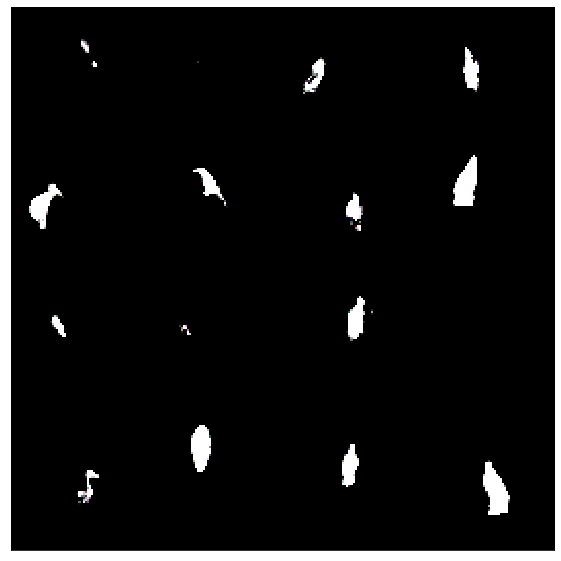

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


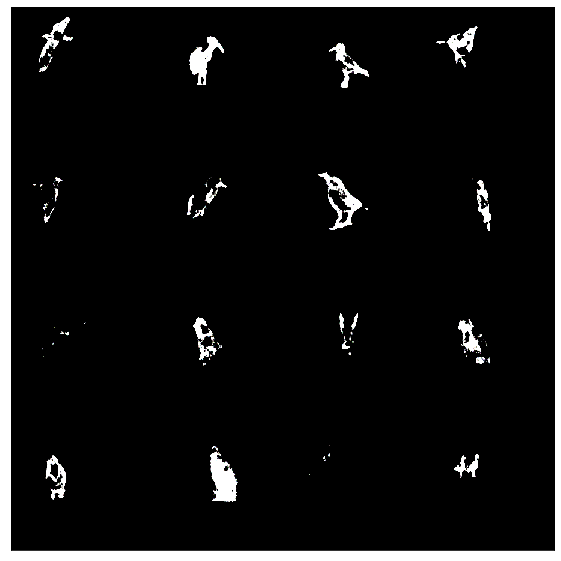

  0%|                                                                                        | 0/17500 [00:00<?, ?it/s]

EPOCH: 9


KeyboardInterrupt: 

In [10]:
from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss
loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    ts_out = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
                                        show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step()

# train_losses, train_acc = train_model.gettraindata()
# test_losses, test_acc = train_model.gettestdata()
# utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="savedmodels/finalmodelwithdata.pt",
#                       optimizer_state_dict=optimizer.state_dict
#                       , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
#                       test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [ ]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)